<a href="https://colab.research.google.com/github/CynicDog/TheJavaBook/blob/main/TheJavaBook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Environment Configuration

In [ ]:
%%sh
# Install java kernel
wget -q https://github.com/SpencerPark/IJava/releases/download/v1.3.0/ijava-1.3.0.zip
unzip -q ijava-1.3.0.zip
python3 install.py

# Install proxy for the java kernel
wget -qO- https://gist.github.com/SpencerPark/e2732061ad19c1afa4a33a58cb8f18a9/archive/b6cff2bf09b6832344e576ea1e4731f0fb3df10c.tar.gz | tar xvz --strip-components=1
python3 install_ipc_proxy_kernel.py --kernel=java --implementation=ipc_proxy_kernel.py

# Dependencies

In [ ]:
import java.lang.Class;
import java.lang.reflect.Field;
import java.lang.Runtime.*;

import java.util.*;

import java.util.function.*;

import java.util.stream.*;
import java.util.stream.Collectors;

import java.io.*;

import java.time.*;

In [ ]:
Runtime.getRuntime().availableProcessors();

2

# Algorithm Solution in Java

🧑🏼‍💻 LeetCode Clean Code Handbook: 50 Common Interview Questions - LeetCode admin

## Chapter 1. Array / String

### 🧑🏼‍💻 [Two Sum (L#1)]
: Given an array of integers nums and an integer target, return indices of the two numbers such that they add up to target.
___________________

In [ ]:
class Solution {
    public int[] twoSum(int[] numbers, int target) {

        Map<Integer, Integer> map = new HashMap<>();

        for (int i = 0; i < numbers.length; i++) {
            int cur = numbers[i];
            if (map.containsKey(target - cur)) {
                return new int[] { map.get(target - cur), i};
            }
            map.put(cur, i); // (key: cur , value: i)
        }
        throw new IllegalArgumentException("No two sum solution");
    }
}


### 🧑🏼‍💻 [Two Sum 2 - Input is Sorted (L#167)]
: Given a 1-indexed array of integers numbers that is already sorted in non-decreasing order, find two numbers such that they add up to a specific target number.
___________________

In [ ]:
class Solution {
    public int[] twoSum(int[] numbers, int target) {
        for (int i = 0; i < numbers.length; i++) {
            int j = binary_search(numbers, target - numbers[i], i + 1);

            if (j != -1) { return new int[] { i + 1, j + 1 }; }
        } throw new IllegalArgumentException("No solution");
    }

    private int binary_search(int[] arg, int complement, int start) {
        int left = start, right = arg.length - 1;

        while (left < right) {
            int mid = (left + right) / 2;

            if (arg[mid] < complement) {
                left = mid + 1;
            } else {
                right = mid;
            }
        }

        return (left == right && arg[left] == complement) ? left : -1;
    }
}

### 🧑🏼‍💻 [Two Sum 2 - Input is Sorted (L#167)] - two pointers
  ___________________

In [ ]:
class Solution {
    public int[] twoSum(int[] numbers, int target) {
        int left = 0, right = numbers.length - 1;

        while (left < right) {
            int sum = numbers[left] + numbers[right];

            if (sum < target) {
                left += 1;
            } else if (sum > target) {
                right -= 1;
            } else { return new int[] { left + 1, right + 1 }; }
        }
        throw new IllegalArgumentException("no solution");
    }
}

### 🧑🏼‍💻 [Valid Palindrome (L#125)] - two pointers
: Given a string s, return true if it is a palindrome, or false otherwise.
___________________

In [ ]:
class Solution {
    public boolean isPalindrome(String s) {
        int i = 0, j = s.length() - 1;

        while (i < j) {
            while (i < j && !Character.isLetterOrDigit(s.charAt(i))) i++;
            while (i < j && !Character.isLetterOrDigit(s.charAt(j))) j--;

            if (Character.toLowerCase(s.charAt(i)) != Character.toLowerCase(s.charAt(j))) {
                return false;
            }
            i++; j--;
        }
    return true;
    }
}

### 🧑🏼‍💻 [Find the Index of the First Occurence in a String (L#28)]
: Given two strings needle and haystack, return the index of the first occurrence of needle in haystack, or -1 if needle is not part of haystack.
___________________

In [ ]:
class Solution {
    public int strStr(String haystack, String needle) {
        for (int i = 0; ; i++) {
            for (int j = 0; ; j++) {
                if (j == needle.length()) { return i; }
                if (i + j == haystack.length()) { return -1; }
                if (needle.charAt(j) != haystack.charAt(i + j)) { break; }
            }
        }
    }
}

### 🧑🏼‍💻 [Reverse Words in a String (L#151)]
: Return a string of the words in reverse order concatenated by a single space.
___________________

In [ ]:
class Solution {
    public String reverseWords(String s) {
        StringBuilder reversed = new StringBuilder();

        int j = s.length();

        for (int i = s.length() - 1; i >= 0; i--) {
            if (s.charAt(i) == ' ') {
                j = i;
            } else if (i == 0 || s.charAt(i - 1) == ' ') {
                if (reversed.length() != 0) { reversed.append(' '); }

                reversed.append(s.substring(i, j));
            }
        }

        return reversed.toString();
    }
}

### 🧑🏼‍💻 [String to Integer(atoi) (L#8)]
: Convert digits into an integer (i.e. "123" -> 123, "0032" -> 32). If no digits were read, then the integer is 0. Change the sign as necessary (from step 2).
___________________

In [ ]:
class Solution {
    private static final int maxDiv10 = Integer.MAX_VALUE / 10;

    public int myAtoi(String s) {

        int i = 0, n = s.length();

        while (i < n && Character.isWhitespace(s.charAt(i))) i++;

        int sign = 1;

        if (i < n && s.charAt(i) == '+') { i++; }
        else if (i < n && s.charAt(i) == '-') { sign = -1; i++; }

        int num = 0;
        while (i < n && Character.isDigit(s.charAt(i))) {
            int digit = Character.getNumericValue(s.charAt(i));

            if (num > maxDiv10 || num == maxDiv10 && digit >= 8) {
                return sign == 1 ? Integer.MAX_VALUE : Integer.MIN_VALUE;
            }

            num = num * 10 + digit;
            i++;
        }

        return sign * num;
    }
}

### 🧑🏼‍💻 [Valid Number (L#65)]
: Given a string s, return true if s is a valid number.
___________________

In [ ]:
class Solution {
    public boolean isNumber(String s) {

        int i = 0, n = s.length();

        while (i < n && Character.isWhitespace(s.charAt(i))) i++;

        if (i < n && (s.charAt(i) == '+' || s.charAt(i) == '-')) i++;

        boolean isNumeric = false;

        while (i < n && Character.isDigit(s.charAt(i))) {
            i++;
            isNumeric = true;
        }

        if (i < n && s.charAt(i) == '.') {
            i++;

            while (i < n && Character.isDigit(s.charAt(i))) {
                i++;
                isNumeric = true;
            }
        }

        if (isNumeric && i < n && Character.toLowerCase(s.charAt(i)) == 'e') {
            i++;
            isNumeric = false;

            if (i < n && (s.charAt(i) == '+' || s.charAt(i) == '-')) i++;

            while (i < n && Character.isDigit(s.charAt(i))) {
                i++;
                isNumeric = true;
            }
        }

        while (i < n && Character.isWhitespace(s.charAt(i))) i++;

        return isNumeric && i == n;
    }
}

### 🧑🏼‍💻 [Longest Substring Without Repeating Characters (L#3)]
: Given a string s, find the length of the longest substring without repeating characters.
___________________

In [ ]:
class Solution {
    public int lengthOfLongestSubstring(String s) {

        int[] charMap = new int[256];
        Arrays.fill(charMap, -1);

        int i = 0, max_length = 0;
        for (int j = 0; j < s.length(); j++) {
            if (i <= charMap[s.charAt(j)]) { i = charMap[s.charAt(j)] + 1; }
            else { max_length = Math.max(max_length, j - i + 1); }

            charMap[s.charAt(j)] = j;
        }

        return max_length;
    }
}

### 🧑🏼‍💻 [Longest Substring with At Most Two Distinct Characters (L#159)]
: Given a string S, find the length of the longest substring T that contains at most two distinct characters.
___________________

In [ ]:
class Solution {
    public int lengthOfLongestSubstringTwoDistinct(String s) {

        int[] count = new int[256];
        int i = 0, maxLength = 0, numDistinct = 0;

        for (int j = 0; j < s.length(); j++) {
            if (count[s.charAt(j)] == 0) { numDistinct++; }
            count[s.charAt(j)]++;

            while (numDistinct > 2) {
                count[s.charAt(i)]--;
                if (count[s.charAt(i)] == 0) { numDistinct--; }
                i++;
            }

            maxLength = Math.max(maxLength, j - i + 1);
        }

        return maxLength;
    }
}

In [ ]:
Solution solution = new Solution();
solution.lengthOfLongestSubstringTwoDistinct("eceba");

3

### 🧑🏼‍💻 [MIssing Range (L#163)]
: Given a sorted integer array where the range of elements are [0, 99] inclusive, return its missing ranges.
For example, given [0, 1, 3, 50, 75], return [“2”, “4->49”, “51->74”, “76->99”]
___________________

In [ ]:
class Solution {

    public List<String> findMissingRanges(int[] vals, int start, int end) {

        List<String> ranges = new ArrayList<>();

        int prev = start - 1;

        for (int i = 0; i <= vals.length; i++) {
            int cur = (i == vals.length) ? end + 1: vals[i];

            if (cur - prev >= 2) {
                ranges.add(getRanges(prev + 1, cur - 1));
            }

            prev = cur;
        }

        return ranges;
    }

    private String getRanges(int from, int to) {
        return (from == to) ? String.valueOf(from) : from + "->" + to;
    }
}

In [ ]:
Solution solution = new Solution();
solution.findMissingRanges(new int[] {0, 1, 3, 50, 75}, 0, 99);

[2, 4->49, 51->74, 76->99]

### 🧑🏼‍💻 [Longest Palindromic Substring (L#5)]
: Given a string s, return the longest
palindromic substring in s.
___________________

In [ ]:
class Solution {
    public String longestPalindrome(String s) {

    int start = 0, end = 0;

    for (int i = 0; i < s.length(); i++) {

            int lenEven = expand(s, i, i);
            int lenOdd = expand(s, i, i + 1);

            int lenMax = Math.max(lenEven, lenOdd);

            if (lenMax > end - start) {
                start = i - (lenMax - 1) / 2;
                end = i + lenMax / 2;
            }
        }
        return s.substring(start, end + 1);
    }

    private int expand(String s, int left, int right) {
        int L = left, R = right;

        while (L >= 0 && R < s.length() && s.charAt(L) == s.charAt(R)) {
            L--;
            R++;
    }
    return R - L - 1;
    }
}

In [ ]:
Solution solution = new Solution();
solution.longestPalindrome("abasljqadnn121nndsd")

dnn121nnd

### 🧑🏼‍💻 [One Edit Distance(L#161)]
: Given two strings S and T, determine if they are both one edit distance apart.

Assume X represents the one-edit character. There are three one-edit distance operations that could be applied to S.

* i. Modify operation – Modify a character to X in S.
    * S = “abcde”, T = “abXde”

* ii. Insert operation – X was inserted before a character in S.
    * S = “abcde”, T = “abcXde”

* iii. Append operation – X was appended at the end of S.
    * S = “abcde”, T = “abcdeX”

In [ ]:
class Solution {
    public boolean isOneEditDistance(String S, String T) {

        int m = S.length(), n = T.length();

        if (m > n) { return isOneEditDistance(T, S); }

        if (n - m > 1) { return false; }

        int i = 0;
        while(i < m && S.charAt(i) == T.charAt(i)) { i++; }

        int permit = n - m;

        // catch append operation
        if (i == m) { return permit > 0; }

        // catch modify operation
        if (permit == 0) i++;

        // catch insert operation
        while (i < m && S.charAt(i) == T.charAt(i + permit)) { i++; }

        return i == m;
    }
}

In [ ]:
Solution solution = new Solution();

System.out.println(solution.isOneEditDistance("abcde", "abXde"));       // modify operation
System.out.println(solution.isOneEditDistance("abcde", "abcdeX"));      // insert operation
System.out.println(solution.isOneEditDistance("abcde", "abcXde"));      // append operation

System.out.println(solution.isOneEditDistance("abcde", "abcde"));
System.out.println(solution.isOneEditDistance("aaade", "abcde"));

true
true
true
false
false


## Chapter 2. Math

### 🧑🏼‍💻 [Reverse Integer (L#7)]
: Given a signed 32-bit integer `x`, return `x` with *its digits reversed*. If reversing `x` causes the value to go outside the signed 32-bit integer range `[-2^31, 2^31 - 1]`, then return `0`.

In [ ]:
class Solution {

    public int reverse(int x) {

        int reversed = 0;

        while (x != 0) {

            if (Math.abs(reversed) > 214748364) { return 0; }

            reversed = reversed * 10 + x % 10;
            x /= 10;
        }

        return reversed;
    }
}

In [ ]:
Solution solution = new Solution();

System.out.println(solution.reverse(123));
System.out.println(solution.reverse(-321));

System.out.println(solution.reverse((int)Math.pow(2, 32)));

321
-123
0


### 🧑🏼‍💻 [Plus One (L#66)]
: Given a number represented as an array of digits, plus one to the number.

In [ ]:
class Solution {
    public int[] plusOne(int[] digits) {

        for (int i = digits.length - 1; i >= 0; i--) {

            if (digits[i] <= 8) { digits[i] += 1; return digits; }
            else { digits[i] = 0;}
        }

        int[] result = new int[digits.length + 1];
        result[0] = 1;

        return result;

    }
}

In [ ]:
Solution solution = new Solution();

int[] output = solution.plusOne(new int[] {2,4,9,3,9});
for (int i = 0; i < output.length; i++) { System.out.print(output[i]); }

System.out.println();

int[] output = solution.plusOne(new int[] {9,8,9});
for (int i = 0; i < output.length; i++) { System.out.print(output[i]); }

System.out.println();

int[] output = solution.plusOne(new int[] {9,9});
for (int i = 0; i < output.length; i++) { System.out.print(output[i]); }

24940
990
100

### 🧑🏼‍💻 [Palindrome Number (L#19)]
: Determine whether an integer is a palindrome, without extra space

In [ ]:
class Solution {

    public boolean isPalindrome(int x) {

        if (x < 0) { return false; }

        int div = 1;

        while (x / div >= 10) { div *= 10; }

        while (x != 0) {
            int left = x / div;
            int right = x % 10;

            if (left != right) { return false; }

            x = (x % div) / 10;
            div /= 100;
        }

        return true;
    }
}

In [ ]:
Solution solution = new Solution();

System.out.println(solution.isPalindrome(123) == false);
System.out.println(solution.isPalindrome(12321) == true);

true
true


# Test Driven Development

## Dependency - JUnit

In [ ]:
%%loadFromPOM
<!-- https://mvnrepository.com/artifact/org.junit.jupiter/junit-jupiter-api -->
<dependency>
  <groupId>junit</groupId>
  <artifactId>junit</artifactId>
  <version>4.13.2</version>
</dependency>

In [ ]:
import org.junit.*;
import static org.junit.Assert.assertEquals;

## assertEquals()

In [ ]:
public int findMax(int arr[]) {

    int max = 0;
    for (int i = 1; i < arr.length; i++) {

        if (max < arr[i]) { max = arr[i]; }
    }

    return max;
}

@Test
public void testFindMax() {

    System.out.println("assertEquals()");
    assertEquals(4, findMax(new int[] {1, 3, 4, 2}));
}

testFindMax();

assertEquals()


# 📄 The Java™ Tutorials - ORACLE Java Documentation

## Generics
https://docs.oracle.com/javase/tutorial/java/generics/index.html


#### 🧑🏼‍💻 Why Use Generics?

 In any nontrivial software project, bugs are simply a fact of life. Careful planning, programming, and testing can help reduce their pervasiveness, but somehow, somewhere, they'll always find a way to creep into your code. This becomes especially apparent as new features are introduced and your code base grows in size and complexity.

 Fortunately, some bugs are easier to detect than others. **Compile-time bugs, for example, can be detected early on**; you can use the compiler's error messages to figure out what the problem is and fix it, right then and there. **Runtime bugs**, however, can be much more problematic; they don't always surface immediately, and when they do, it may be at a point in the program that is far removed from the actual cause of the problem.

 Generics add stability to your code by making more of your bugs detectable at compile time.

 In a nutshell, generics enable types (classes and interfaces) to be parameters when defining classes, interfaces and methods. Much like the more familiar formal parameters used in method declarations, type parameters provide a way for you to re-use the same code with different inputs. The difference is that the inputs to formal parameters are values, while the inputs to type parameters are types.

##### 👨🏻‍💻 **Stronger type checks at compile time**
: A Java compiler applies strong type checking to generic code and issues errors if the code violates type safety. Fixing compile-time errors is easier than fixing runtime errors, which can be difficult to find.

##### 👨🏻‍💻 **Elimination of casts**
: The following code snippet without generics requires casting:

In [ ]:
List list = new ArrayList();
list.add("hello");
String s = (String) list.get(0);

 When re-written to use generics, the code does not require casting:

In [ ]:
List<String> list = new ArrayList<String>();
list.add("hello");
String s = list.get(0);   // no cast

##### 👨🏻‍💻 **Enabling programmers to implement generic algorithms**
: By using generics, programmers can implement generic algorithms that work on collections of different types, can be customized, and are type safe and easier to read.

#### 🧑🏼‍💻 Generic Types

**A *generic types* is a generic class or interface that is parameterized over tpyes.**

The following `box` class will be modified to demonstrate the concept.

##### A Simple Box Class

 Begin by examining a non-generic Box class that operates on objects of any type. It needs only to provide two methods: `set`, which adds an object to the box, and get, which retrieves it.

  Since its methods accpet or return an `Object`, you are free to pass in whatever you want, provided that it is not one of the primitive types. **There is no way to verify, at compile time, how the class is used.** One of the code may place an `Integer` in the box and expect to get `Integer`s out of it, while another part of the code may mistakenly pass in a `String`, resulting in a runtime error.

In [ ]:
public class Box {
    private Object object;

    public void set(Object object) { this.object = object; }
    public Object get() { return object; }
}

##### A Generic Version of the Box Class

 A *generic* class is defined with the following format:

     class name<T1, T2, ..., Tn> { /* ... */ }

 The **type parameter section**, delimited by angle brackets, follows the class name. It specifies the *type parameters* T1, T2, ..., Tn.

 To update the `Box` class to use generics, you create a generic type declaration by changing the code `public class Box` to `public class Box<T>`. This introduces the type variable, `T`, that cna be used anywhere inside the class.

 With this change, the box class becomes as follows.  As you can see, all occurrences of `Object` are replaced by `T`. A type variable can be any `non-primitive` type you specify: **any class type, any interface type, any array type, or even another type variable.**

 This same technique can be applied to create generic interfaces.

In [ ]:
public class Box<T> {
    private T t;

    public void set(T t) {this.t = t; }
    public T get() { return t; }
}

##### Type Parameter Naming Conventions

 By convention, type parameter names are **single, uppercase letters.** This stands in sharp contrast to the variable naing conventions.

 The most commonly used type parameter names are:

 - E - Element (used extensively by Java Collections Framework)
 - K - Key
 - N - Number
 - T - Type
 - V - Value
 - S, U, V etc. - 2nd, 3rd, 4th types

##### Invoking and Instantiating a Generic Type
 To reference the generic `Box` class, you must perform a *generic type invocation*, which replaces `T` with some concrete value, such as `Integer`:

    Box<Integer> integerBox;

###### Type Parameter and Type Argument Terminology
 When coding, **one provides type arguments in order to create a parameterized type.** Therefore, the `T` in `Foo<T>` is a ***type parameter*** and the `String` in `Foo<String>` is a ***type argument***.

 To instantiate this class, use the new keyword, as usual, but place `Integer` between the class name and the parenthesis:

    Box<Integer> integerBox = new Box<Integer>();

##### The Diamond
 In Java SE 7 and later, you can replace the type arguments required to invoke the constructor of a generic class **with an empty set of type arguments(<>)** as long as the compiler can determine, or infer, the type arguments from the context. This pair of empty angle brakcets is informally called *the diamond*.

    Box<Integer> integerBox = new Box<>();

##### Multiple Type Parameters
 As mentioned previously, a generic class can have multiple type parameters.

In [ ]:
public interface Pair<K, V> {
    public K getKey();
    public V getValue();
}

class OrderedPair<K, V> implements Pair<K, V> {

    private K key;
    private V value;

    public OrderedPair(K key, V value) {
        this.key = key;
        this.value = value;
    }

    public K getKey() { return key; }
    public V getValue() { return value; }
}

OrderedPair<String, Integer> p1 = new OrderedPair<>("Java", 8);
OrderedPair<String, String> p2 = new OrderedPair<>("Hello", " World!");

##### Parameterized Types
 You can also substitute a **type parameter** with a **parameterized type**. For example:

    OrderedPair<String, Box<Integer>> p = new OrderedPair("Primes", new Box<Integer>(...));

##### Raw Types

 A *raw type* is the name of a generic class or interface without any type arguments.

 To create a parameterized `Box<T>`, you cana supply an actual type argument for the formal type parameter `T`:

    Box<Integer> intBox = new Box<>();

 If, however, the actual type argument is omitted, you create a raw type of `Box<T>`:

    Box rawBox = new Box();

 Therefore, `Box` is the raw tpye of the generic type `Box<T>`. However, a ***non-generic*** class or interfcae type is **not** a raw type.

 Raw types show up in legacy code because lots of API classes (such as the `Collections` classes) were not generic prior to JDK 5.0. For ***backward compatibility***, assigning a parameterized type to its raw type is allowed:

    Box<String> stringBox = new Box<>();
    Box rawBox = stringBox;   // ok

 But if you assign a raw type to a parameterized type, you get a **unchecked conversion** warning:

    Box rawBox = new Box() ;
    Box<String> stringBox = rawBox   // warning: unchecked conversion

 You also get a warning if you use a raw type to invoke generic methods defined in the corresponding generic type:

    Box<String> stringBox = new Box<>();
    Box rawBox = stringBox;

    rawBox.set(8);   // warning: unchecked invocation to set(T)

#### 🧑🏼‍💻 Generic Methods

 ***Generic methods* are methods that introduce their own type parameters.** This is similar to declaring a generic type, but the type parameters's scope is limited to the method where it is declared. **Static and non-static methods are allowed, as well as generic class constructors.**

  The syntax for a generic method includes a list of type parameters, inside angle brackets, which appears before the method's return type. The feature known as **type reference** allows you to invoke a generic method as an ordinary method, without specifiying a type.

In [ ]:
public class Util {
    public static <K, V> boolean compare(Pair<K, V> p1, Pair<K, V> p2) {
        return p1.getKey().equals(p2.getKey()) && p1.getValue().equals(p2.getValue());
    }
}

public class Pair<K, V> {

    private K key;
    private V value;

    public Pair(K key, V value) {
        this.key = key;
        this.value = value;
    }

    public void setKey(K key) { this.key = key; }
    public void setValue(V value) { this.value = value; }
    public K getKey()   { return key; }
    public V getValue() { return value; }
}

Pair<Integer, String> p1 = new Pair<>(1, "apple");
Pair<Integer, String> p2 = new Pair<>(2, "pear");

boolean same_1 = Util.<Integer, String>compare(p1, p2);
boolean same_2 = Util.compare(p1, p2);  // type can be left out

#### 🧑🏼‍💻 Bounded Type Parameters

 There may be times when you want to restrict the types **that can be used as type arguments in a parameterized type**. For example, a method that operates on numbers might only want to accept instances of `Number` or its subclasses. This is what bounded type parameters are for.

 To declare a bounded type parameter, list the type parameter's name, followed by the `extends` keyword, followed biy its *upper bound*, which in this example is `Number`.

In [ ]:
public class Box<T> {

    private T t;

    public void set(T t) { this.t = t; }
    public T get() { return t; }

    public <U extends Number> void inspect(U u) {
        System.out.println("T: " + t.getClass().getName());
        System.out.println("U: " + u.getClass().getName());
    }
}

##### Multiple Bounds

 A type parameter can have *multiple bounds*:

     <T extends B1 & B2 & B3>

 A type variable with multiple bounds is a subtype of all the types listed in the bound. **If one of the bounds is a class, it must be specified first**. For example:

    Class A { /* ... */ }
    interface B { /* ... */ }
    interface C { /* ... */ }

    class D <T extends A & B & C> { /* ... */ }

##### Generic Methods and Bounded Type Parameters

 **Bounded type parameters are key to the implementation of generic algorithms.**

 Consider the following method that counts the number of elements in an array `T[]` that are greater than a specified element `elem`.

     public static <T> int countGreaterThan(T[] anArray, T elem) {

         int count = 0;

         for (T e : anArray) {
             if (e > elem) // compiler error
                 ++count;
         }
         return count;
     }

  The implementation of the method is straightforward, but it does not compile because **the greater than operator (>) applies only to primitive types** such as `short`, `int`, `double`, `long`, `float`, `byte`, and `char`. To fix the problem, use a type parameter bounded by the **`Comparable<T>`** interface:

    public static <T extends Comparable<T>> int countGreaterThan(T[] anArray, T elem) {

        int count = 0;

        for (T e : anArray) {
            if (e.compareTo(elem) > 0) { ++count; }
        }
        return count;
    }

#### 🧑🏼‍💻 Generics, Inheritance, and Subtypes

 It is possible to assign an object of one type to an object of another type provided that the types are compatible. For example, you can assign an `Integer` to an `Object`, since `Object` is one of `Integer`'s supertypes.

 In object-oriented terminology, this is called an **"is a" relationship**. Since an Integer is a kind of `Object`, the assignment is allowed. But `Integer` is also a kind of `Number`, so the following code is valid as well:

    public void someMethod(Number n) { /* ... */ }

    someMethod(new Integer(10));   // OK
    someMethod(new Double(10.1));   // OK

 The same is also true with generics. You can perform a generic type invocation, passing `Number` as its type argument, and any subsequent invocation of add will be allowed if the argument is compatible with `Number`:

    Box<Number> box = new Box<Number>();
    box.add(new Integer(10));   // OK
    box.add(new Double(10.1));  // OK

##### Generic Classes and Subtyping

 You can subtype a generic class or interface by extending or implementing it. The relationship between the type parameters of one class or interface and the type parameters of another are determined by the `extends` and `implements` clauses.

 Using the Collections classes as an example, `ArrayList<E>`implements `List<E>`, and `List<E>` extends `Collection<E>`. So `ArrayList<String>` is a subtype of `List<String>`, which is a subtype of `Collection<String>`. **So long as you *do not vary* the type argument, the subtyping relationship is preserved between the types.**

#### 🧑🏼‍💻 Type Inference

 **Type inference is a Java compiler's ability to look at each method invocation and corresponding declaration to determine the type argument (or arguments) that make the invocation applicable.** The inference algorithm determines the types of the arguments and, if available, the type that the result is being assigned, or returned. Finally, the inference algorithm tries to find the most specific type that works with all of the arguments.

To illustrate this last point, in the following example, inference determines that the second argument being passed to the pick method is of type `Serializable`:

##### Type Inference and Generic Methods

 **Generic Methods introduced you to type inference**, which enables you to invoke a generic method as you would an ordinary method, without specifying a type between angle brackets. Consider the following example, `BoxDemo`, which requires the `Box` class:

    static <T> T pick(T a1, T a2) { return a2; }
    Serializable s = pick("d", new ArrayList<String>());

    public class BoxDemo {

        public static <U> void addBox(U u, List<Box<U>> boxes) {
            Box<U> box = new Box<>();
            box.set(u);
            boxes.add(box);
        }

        public static <U> void outputBoxes(java.util.List<Box<U>> boxes) {
            int counter = 0;
            for (Box<U> box: boxes) {
                U boxContents = box.get();
                System.out.println("Box #" + counter + " contains [" + boxContents.toString() + "]");
                counter++;
            }
        }

        public static void main(String[] args) {
             ArrayList<Box<Integer>> listOfIntegerBoxes = new ArrayList<>();

             BoxDemo.<Integer>addBox(Integer.valueOf(10), listOfIntegerBoxes); // type witness
             BoxDemo.addBox(integer.valueOf(20), listOfIntegerBoxes);
             BoxDemo.addBox(integer.valueOf(30), listOfIntegerBoxes);

             BoxDemo.outputBoxes(listOfIntegerBoxes);
         }
     }

 The generic method `addBox` defines one type parameter named `U`. **Generally, a Java compiler can infer the type parameters of a generic method call.** Consequently, in most cases, you do not have to specify them. For example, to invoke the generic method `addBox`, you can specify the type parameter with a **type witness**.

### Type Inference and Instantiation of Generic Classes

 You can replace the type arguments required to invoke the constructor of a generic class with an **empty set of type parameters (<>)** as long as the compiler can infer the type arguments from the context. This pair of angle brackets is informally called *the diamond*.

 For example, consider the following variable declaration:

    Map<String, List<String>> myMap = new HashMap<String, List<String>>();

 You can substitute the parameterized type of the constructor with an empty set of type parameters (<>):

    Map<String, List<String>> myMap = new HashMap<>();

 Note that, to take advantage of <u>**type inference during generic class instantiation, you must use the diamond.**</u>

    Map<String, List<String>> myMap = new HashMap(); // unchecked conversion warning

### Type Inference and Generic Constructors of Generic and Non-Generic Classes

 Note that constructors also can be generic in **both generic and non-generic classes.**

    class MyClass<X> {
        <T> MyClass(T t) { /*...*/ }
    }

    MyClass<Integer> my_class = new MyClass<Integer>(""); // OK

### Target Types

 The Java compiler takes advantage of target typing to infer the type parameters of a generic method invocation. The ***target type* of an expression is the data type that the Java compiler expects depending on where the expression appears.** Consider the method `Collections.emptyList`, which is declared as follows:

     static <T> List<T> emptyList();

 Consider the following assignment statement:

     List<String> listOne = Collections.emptyList();

 This statement is expecting an instance of `List<String>`; **this data type is the target type**. Because the method `emptyList` returns a value of type `List<T>`, the compiler infers that the type argument `T` must be the value `String`. Alternatively, you could use a type witness and specify the value of `T` as follows:

     List<String> listOne = Collections.<String>emptyList();

#### 🧑🏼‍💻 Wildcards

 In generic code, the question mark(`?`), called the *wildcard*, represents an unknown type. The wildcard can be used in a variety of situations: as the type of a parameter, field, or local variable; sometimes as a return type. The wildcaard is <u>**never used as a type argument for a generic method invocation, a generic class instance creation, or a supertype.**</u>

##### Upper Bounded Wildcards

 You can use an upper bounded wildcard to relax the restrictions on a variable. For example, say you want to write a method that works on `List<Integer>`, `List<Double>`, `List<Number>`; you can achieve this by using an upper bounded wildcard.

 To write the method that works on lists of `Number` and the subtypes of `Number`, such as `Integer`, `Double`, and `Float`, you would specify `List<? extends Number>`. The term `List<Number>` is more restrictive than `List<? extends Number>` because the former matches a list of type `Number` only, whereas the latter matches a list of type `Number` or any of its subclasses.

 Consider the following `process` method:

    public static void process(List<? extends Foo> list) { /* ... */}

In [ ]:
public static double sum


(List<? extends Number> list)  {

    double s = 0.0;

    for (Number n: list) { s += n.doubleValue(); }

    return s;
}

List<Number> nums = new ArrayList<Number>();
nums.add(1);
nums.add(new Integer(2));

nums.add(2.2);
nums.add(new Double(3.3));

// System.out.println(sumOfList(nums));
// System.out.println(sumOfList(Arrays.asList(1, 2, 3)));

true

##### Unbounded Wildcards

 The unbounded wildcard type is specified using the wildcard characte(`?`), for example, `List<?>`. This is called a *list of unknown type*. There are two scenarios where an unbounded wildcard is a useful approach:

* If you are writing a method that can be implemented using functionality provided in the `Object` class.
* When the code is using methods in the generic class that don't depend on the type parameter. In fact, `Class<?>` is so often used because most of the methods in `Class<T>` do not depend on `T`.


 Consider the method below, `printList1`. The goal of `printList1` is to print a list of any type, but it fails to achieve that goal — it prints only a list of `Object` instances; it cannot print `List<Integer>`, `List<String>`, `List<Double>`, and so on, because <u>**they are not subtypes**</u> of `List<Object>`. To write a generic `printList` method, use `List<?>` as in `printList2`.

In [ ]:
public static void printList1(List<Object> list) {
    for (Object elem: list) {
        System.out.println(elem + " ");
    }

    System.out.println();
}

In [ ]:
public static void printList2(List<?> list) {
    for (Object elem: list) {
        System.out.println(elem + " ");
    }

    System.out.println();
}

In [ ]:
List<String> str = Arrays.asList("one", "two");
List<Integer> ints = Arrays.asList(3, 4);
List<Double> dbls = Arrays.asList(5.0, 6.0);

List<Object> objs = Arrays.asList(str, ints, dbls);

printList1(objs); // ??
printList2(objs);

[one, two] 
[3, 4] 
[5.0, 6.0] 

[one, two] 
[3, 4] 
[5.0, 6.0] 



##### Lower Bounded Wildcards

 An upper bounded wildcard restricts the unknown type to be a specific type or a <u>subtype</u> of that type and is represented using the extends keyword. In a similar way, a **lower bounded wildcard restricts the unknown type to be a specific type or a <u>super</u> type of that type.**

 A lower bounded wildcard is expressed using the wildcard character (`?`), following by the `super` keyword, followed by its lower bound: `<? super A>`.

 Say you want to write a method that puts `Integer` objects into a list. To maximize <u>**flexibility**</u>, you would like the method to work on `List<Integer>`, `List<Number>`, and `List<Object>` — anything that can hold `Integer` values.

 To write the method that works on lists of `Integer` <u>**and**</u> the supertypes of `Integer`, such as `Integer`, `Number`, and `Object`, you would specify `List<? super Integer>`. The term `List<Integer>` is more restrictive than `List<? super Integer>` because the former matches a list of type `Integer` only, whereas the latter matches a list of any type that is a supertype of `Integer`.

In [ ]:
public static List addNumbers(List<? super Integer> list) {
    for (int i = 1; i <= 10; i++) {
        list.add(i);
    }

    return list;
}

List list_ = addNumbers(new ArrayList<>());

printList2(list_);

1 
2 
3 
4 
5 
6 
7 
8 
9 
10 



##### Wildcards and Subtyping

 Generic classes or interfaces are not related merely because there is a relationship between their types. <u>**However, you can use wildcards to create a relationship between generic classes or interfaces.**</u>

 Given the following two regular classes:

    class A {/* ... */}
    class B extends A {/* ... */}

 It would be reasonable to write the following code:

    B b = new B();
    A a = b;

 This example shows that <u>**inheritance of regular classes follows this rule of subtyping**</u>: class B is a subtype of class A if B extends A. This rule does not apply to generic types:

    List<B> list_b = new ArrayList<>();
    List<A> list_a = list_b; // 🙅🏻 compile-time error

 Although Integer is a subtype of Number, `List<Integer>` is <u>**not a subtype**</u> of `List<Number>` and, in fact, these two types are <u>**not related**</u>. The common parent of `List<Number>` and `List<Integer>` is `List<?>`.


 In order to create a relationship between these classes so that the code can access Number's methods through List<Integer>'s elements, use an upper bounded wildcard:

    List<? extends Integer> integer_list = new ArrayList<>();
    List<? extends Number> number_list = integer_list; // 🙆🏻 OK



##### Wildcard Capture and Helper Methods

 In some cases, the compiler <u>**infers the type of a wildcard**</u>. For example, a list may be defined as List<?> but, when evaluating an expression, the compiler infers a particular type from the code. This scenario is known as <u>**wildcard capture**</u>.

 The `WildcardError` example produces a capture error when compiled.

 In the `WildcardError` example, the compiler processes the `i` input parameter as being of type `Object`. When the `foo` method invokes `List.set(int, E) `, the compiler is <u>not able to confirm the type of object that is being inserted into the list</u>, and an error is produced. When this type of error occurs it typically means that <u>**the compiler believes that you are assigning the wrong type to a variable**</u>. Generics were added to the Java language for this reason - to enforce type saftey at compile time.

 You can fix it by writing a <u>*private helper method*</u> which captures the wildcard.

 By conveintion, helper methods are generally named

    originalMethodNameHelper


In [ ]:
public class WildcardError {

    void foo(List<?> i) {
        // i.set(0, i.get(0));
        // 🙅🏻 incompatible types
    }
}

In [ ]:
public class WildcardFixed {

    void foo(List<?> i) {
        fooHelper(i);
    }

    private <T> void fooHelper(List<T> j) {
        j.set(0, j.get(0));
    }
}

// 🙆🏻 OK

##### Guidelines for Wildcard Use

 - **An "In" Variable**:

: An "In"  variable serves up data to the code. Imagine a copy method with two arguments: `copy(src, deset)`. The `src` argument provides the data to be copied, so it is the "In" parameter.

 - **An "Out" Variable**:

: An "Out" variable holds data for use elsewhere. In the `copy` example, the `dest` argument accepts data, so it is the "Out" parameter.

- **Wildcard Guidelines**:

: An <u>**"in" variable**</u> is defined with <u>**an upper bounded wildcard, using the extends keyword.**</u>
An <u>**"out" variable**</u> is defined with <u>**a lower bounded wildcard, using the super keyword.**</u>
In the case where the "in" variable can be accessed using methods defined in the Object class, use an unbounded wildcard.
In the case where the code needs to access the variable as <u>**both an "in" and an "out" variable, do not use a wildcard.**</u>

 These guidelines do not apply to a method's return type. <u>Using a wildcard as a return type should be avoided</u> because it forces programmers using the code to deal with wildcards.

 <u>A list defined by `List<? extends ...>` can be informally thought of as **read-only**</u>, but that is not a strict guarantee. Suppose you have the following two classes:

In [ ]:
class NaturalNumber {

    private int i;

    public NaturalNumber(int i) { this.i = i; }
}

class EvenNumber extends NaturalNumber {

    public EvenNumber(int i) { super(i) ;}
}

List<EvenNumber> list_even = new ArrayList<>();

// list_ntrl.add(new NaturalNumber(35));
// 🙅🏻 compile-time error, since the method `add` puts a value into the list, which "In" variable cannot do.

In [ ]:
public double sum(Collection<? extends Number> nums) {
    double s = 0.0;

    for (Number num : nums) { s+= num.doubleValue(); }

    return s;
}

In [ ]:
List<Integer> ints = new ArrayList<Integer>();
ints.add(1);
ints.add(2);

List<? extends Number> nums = ints;

double result = sum(nums);  // 🙆🏻 OK

// nums.add(3);
// 🙅🏻 compile-time error, since the method `add` puts a value into the list, which "In" variable cannot do.

In [ ]:
List<Object> objs = new ArrayList<Object>();
objs.add(1);
objs.add("two");

List<? super Integer> ints = objs;

ints.add(3); // // 🙆🏻 OK

// double result = sum(ints);
// 🙅🏻 compile-time error, since the method `sum` gets a value out of the list, which "Out" variable cannot do.

true

#### 🧑🏼‍💻 Type Erasure

 Generics were introduced to the Java language to provide tighter type checks at compile time and to support generic programming. To implement generics, the Java compiler appiles type erasure to:

- <u>**Replace all type parameters in generic types with their bounds or `Object` if the type parameters are unbounded**</u>. The produced bytecode contains only ordinary classes, interfaces, and methods.
- Insert type casts if necessary to preserve type safety.
- Generate <u>bridge methods to preserve polymorphism in extended generic type</u>.

##### Erasure of Generic Types

 During the type erasure process, the Java compiler erases all type parameters and replaces each with its first bound if the type parameter is bounded, or `Object` if the type parameter is not bounded. Consider the first following generic class that represents a node in a singly linked list. Because the type parameter `T` is unbounded, the Java compiler replaces it with `Object`.

  In the second example, the generic `Node` class uses a bounded type parameter. The Java compiler replaces the bounded type parameter `T` with the first bound class, `Comparable`.

In [ ]:
public class Node<T> {

    private T val;
    private Node<T> next;

    public Node(T val, Node<T> next) {
        this.val = val;
        this.next = next;
    }

    public T getValue() { return val; }
}

Node<Integer> node = new Node(Integer.valueOf(1), null);
node.getValue();

1

In [ ]:
public class Node<T extends Comparable<T>> {

    private T val;
    private Node<T> next;

    public Node(T val, Node<T> next) {
        this.val = val;
        this.next = next;
    }

    public T getValue() { return val; }
}

##### Erasure of Generic Methods

 The Java compiler also erases type parameters in generic method arguments. Consider the first following method. Because `T` is unbounded, the Java compiler replaces with `Object`.


In [ ]:
public static <T> int count(T[] anArray, T elem) {
    int freq = 0;

    for (T e : anArray) {
        if (e.equals(elem)) { ++freq; }
    }

    return freq;
}

In [ ]:
public static int count(Object[] anArray, Object elem) {
    int cnt = 0;
    for (Object e : anArray)
        if (e.equals(elem))
            ++cnt;
        return cnt;
}

##### Effects of Type Erasure and Bridge Methods

 Somtimes type erasure causes a situation that you may not have anticipated. The following example shows how this can occur.

 The following example shows how a compiler sometimes creates a synthetic method, which is called a <u>*bridge method*</u>, as part of the type erasure process.

Given two follwoing classes.

After type erasure, the method signatures do not match.

The `Node.setData(T)` method becomes `Node.setData(Object)`. As a result, the `MyNode.setData(Integer)` method does not override the `Node.setData(Object)` method.

For the `MyNode` class, the compiler generates the following <u>*bridge method*</u> for `setData`.

In [ ]:
public class Node<T> {

    public T data;

    public Node(T data) { this.data = data; }

    public void setData(T data) {
        System.out.println("Node.setData");
        this.data = data;
    }
}

public class MyNode extends Node<Integer> {

    public MyNode(Integer data) { super(data); }

//  Bridge method generated by the compiler
//  public void setData(Object data) {
//      setData((Integer) data);
//  }

    public void setData(Integer data) {
        System.out.println("MyNode.setData");
        super.setData(data);
    }
}

In [ ]:
MyNode my_node = new MyNode(5);
Node node = my_node;

Integer x = my_node.data;

##### Non-Reifiable Types

: A <u>**reifiable** is a type whose type information is fully available at runtime</u>. This includes primitives, non-generic types, raw types and invocations of unbound wildcards.

<u>**Non-reifiable** types are types where information has been removed at compile-time by type erasure</u> - invocations of

## Interfaces and Inheritance

https://docs.oracle.com/javase/tutorial/java/IandI/index.html

## Annotations

https://docs.oracle.com/javase/tutorial/java/generics/index.html

# ☕️ Java SE API Specificatioin Document

## <font color="#BBA6A1"> java.lang.Class

In [ ]:
//#@title specification
public class Account {

    private int no;
    private int password;
    private String owner;
    private long balance;
    private double interestRate;
    private String status;
    private Date createdDate;
    private Date deleteDate;

    public Account() { }

    public Account(int no, int password, String owner, long balance, double interestRate, String status, Date createdDate) {
        this.no = no;
        this.password = password;
        this.owner = owner;
        this.balance = balance;
        this.interestRate = interestRate;
        this.status = status;
        this.createdDate = createdDate;
    }

    public int getNo() { return no; }

    public void setNo(int no) { this.no = no; }

    public int getPassword() { return password; }

    public void setPassword(int password) { this.password = password; }

    public String getOwner() { return owner; }

    public void setOwner(String owner) { this.owner = owner; }

    public long getBalance() { return balance; }

    public void setBalance(long balance) { this.balance = balance; }

    public double getInterestRate() { return interestRate; }

    public void setInterestRate(double interestRate) { this.interestRate = interestRate; }

    public String getStatus() { return status; }

    public void setStatus(String status) { this.status = status; }

    public Date getCreatedDate() { return createdDate; }

    public void setCreatedDate(Date createdDate) { this.createdDate = createdDate; }

    public Date getDeleteDate() { return deleteDate; }

    public void setDeleteDate(Date deleteDate) { this.deleteDate = deleteDate; }
}

Account account = new Account(100, 1234, "Simon", 1_000_000L, 3, "activated", new Date());

### ***forName (Module module, String name)***

: Returns the Class with the given binary name in the given module.
This method attempts to locate and load the class or interface. It does not link the class, and does not run the class initializer. If the class is not found, this method returns `null`.

If the class loader of the given module defines other modules and the given name is a class defined in a different module, this method returns `null` after the class is loaded.

### ***getFields()***

: Returns an array containing Field objects reflecting all the accessible public fields of the class or interface represented by this Class object.

 Returns only the public fields of the class and its superclasses that are accessible from the current context (i.e., that are not private, protected or package-private).

### ***getDeclaredFields()***

: Returns an array of `Field` objects reflecting all the fields declared by the class or interface represented by this `Class` object.

 This method returns all the fields of the class, regardless of their access modifier (i.e., public, private, protected, or package-private)

In [ ]:
Field[] fields = Account.class.getDeclaredFields();

Arrays.stream(fields)
        .forEach(System.out::println);

private int REPL.$JShell$103$Account.no
private int REPL.$JShell$103$Account.password
private java.lang.String REPL.$JShell$103$Account.owner
private long REPL.$JShell$103$Account.balance
private double REPL.$JShell$103$Account.interestRate
private java.lang.String REPL.$JShell$103$Account.status
private java.util.Date REPL.$JShell$103$Account.createdDate
private java.util.Date REPL.$JShell$103$Account.deleteDate


## <font color="#BBA6A1"> java.lang.reflect.Field

In [ ]:
//#@title specification
public class Account {

    private int no;
    private int password;
    private String owner;
    private long balance;
    private double interestRate;
    private String status;
    private Date createdDate;
    private Date deleteDate;

    public Account() { }

    public Account(int no, int password, String owner, long balance, double interestRate, String status, Date createdDate) {
        this.no = no;
        this.password = password;
        this.owner = owner;
        this.balance = balance;
        this.interestRate = interestRate;
        this.status = status;
        this.createdDate = createdDate;
    }

    public int getNo() { return no; }

    public void setNo(int no) { this.no = no; }

    public int getPassword() { return password; }

    public void setPassword(int password) { this.password = password; }

    public String getOwner() { return owner; }

    public void setOwner(String owner) { this.owner = owner; }

    public long getBalance() { return balance; }

    public void setBalance(long balance) { this.balance = balance; }

    public double getInterestRate() { return interestRate; }

    public void setInterestRate(double interestRate) { this.interestRate = interestRate; }

    public String getStatus() { return status; }

    public void setStatus(String status) { this.status = status; }

    public Date getCreatedDate() { return createdDate; }

    public void setCreatedDate(Date createdDate) { this.createdDate = createdDate; }

    public Date getDeleteDate() { return deleteDate; }

    public void setDeleteDate(Date deleteDate) { this.deleteDate = deleteDate; }
}

Account account = new Account(101, 4321, "Maria", 3_000_000L, 2.5, "activated", new Date());

public class Person {

    private String name;
    private int age;
    private long balance;
    private boolean speaksEspanol;

    public Person() { }

    public Person(String name, int age, long balance, boolean speaksEspanol) {
        this.name = name;
        this.age = age;
        this.balance = balance;
        this.speaksEspanol = speaksEspanol;
    }

    public String getName() {
        return name;
    }

    public void setName(String name) {
        this.name = name;
    }

    public int getAge() {
        return age;
    }

    public void setAge(int age) {
        this.age = age;
    }

    public long getBalance() {
        return balance;
    }

    public void setBalance(long balance) {
        this.balance = balance;
    }

    public boolean isSpeaksEspanol() {
        return speaksEspanol;
    }

    public void setSpeaksEspanol(boolean speaksEspanol) {
        this.speaksEspanol = speaksEspanol;
    }
}

Person person = new Person("maria", 24, 10_000L, true);

 A `Field` provides information about, and dynamic access to, a single field of a class or an interface. The reflected field may be a class (static) field or an instance field.

 A `Field` permits widening conversions to occur during a get or set access operation, but throws an `IllegalArgumentException` if a narrowing conversion would occur.

### ***getName()***

: Returns the name of the field represented by this `Field` object.

In [ ]:
Field[] fields = Account.class.getDeclaredFields();
Arrays.stream(fields).forEach(field -> {
    try {
        field.setAccessible(true);
        System.out.println(field.getName() + " = " + field.get(account));
    } catch (IllegalAccessException e) { e.printStackTrace(); }
});

no = 101
password = 4321
owner = Maria
balance = 3000000
interestRate = 2.5
status = activated
createdDate = Fri Apr 07 07:11:20 UTC 2023
deleteDate = null


### ***get(Object obj)***

: Returns the value of the field represented by this Field, on the specified object.

In [ ]:
StringJoiner stringJoiner = new StringJoiner(",");

Field[] fields = person.getClass().getDeclaredFields();

Arrays.stream(fields).forEach(field -> {
    try {
        field.setAccessible(true);
        stringJoiner.add((String) field.get(person).toString());
    }
    catch (IllegalAccessException ex) { ex.printStackTrace(); }
});

// Marshalling
System.out.println(stringJoiner.toString());

maria,24,10000,true


##  <font color="#BBA6A1">java.lang.Integer

### ***parseInt()***

: Parses the string argument as a signed decimal integer.

In [ ]:
Integer.parseInt("123");

123

In [ ]:
Integer.parseInt(" 1 2 3 ".replace(" ", ""));

123

### ***parseInt(String s, int radix)***

: Parses the string argument as a signed integer in the radix specified by the second argument. The term radix refers to the base of the number system used to represent the input elements.

In [ ]:
Integer.parseInt("1100110", 2);

102

In [ ]:
Integer.parseInt("a", 16);

10

### ***toBinaryString()***

: Returns a string representation of the integer argument as an unsigned integer in base 2.

In [ ]:
Integer.toBinaryString(72);

1001000

In [ ]:
Integer.toBinaryString(-3);

11111111111111111111111111111101

### ***toOctalString()***

: Returns a string representation of the integer argument as an unsigned integer in base 8.

In [ ]:
Integer.toOctalString(72);

110

## <font color="#BBA6A1"> java.lang.Math

### ***abs()***

: Returns the absolute value of a value.

In [ ]:
Math.abs(-1)

1

### ***cbrt()***

: Returns the cube root of a value.

In [ ]:
Math.cbrt(27)

3.0

 ### ***ceil()***

 : Returns the smallest (closest to negative infinity) double value that is greater than or equal to the argument and is equal to a mathematical integer.

In [ ]:
Math.ceil(2)

2.0

In [ ]:
Math.ceil(2.0001)

3.0

### ***floor()***

: Returns the largest (closest to positive infinity) double value that is less than or equal to the argument and is equal to a mathematical integer.

In [ ]:
Math.floor(2)

2.0

In [ ]:
Math.floor(2.0001)

2.0

### ***log()***

: Returns the natural logarithm (base e) of a double value.

In [ ]:
Math.log(15)

2.70805020110221

### ***log10()***

: Returns the base 10 logarithm of a double value.

In [ ]:
Math.log10(15)

1.1760912590556813

### ***max()***

: Returns the greater of two values.

In [ ]:
Arrays.asList(1, 2, 3, 4).stream()
                         .reduce(Math::max).get();

4

### ***min()***

: Returns the smaller of two values.

In [ ]:
Arrays.asList(1, 2, 3, 4).stream()
                         .reduce(Math::min).get();

1

### ***multiplyExact()***

: Returns the product of the arguments, throwing an exception if the result overflows an int.

In [ ]:
Arrays.asList(1, 2, 3, 4).stream()
                         .reduce(Math::multiplyExact).get();

24

### ***pow()***

: Returns the value of the first argument raised to the power of the second argument.

In [ ]:
Math.pow(2, 3);

8.0


### ***random()***

: Returns a double value with a positive sign, greater than or equal to 0.0 and less than 1.0.

In [ ]:
IntStream.range(0, 5)
         .boxed()
         .map(num -> num + Math.random())
         .map(Math::ceil)
         .reduce(Math::max)
         .get();

5.0

### ***round()***

: Returns the closest long to the argument, with ties rounding to positive infinity.

In [ ]:
Math.round(3.3);

3

In [ ]:
Math.round(3.5);

4

### ***sqrt()***

: Returns the correctly rounded positive square root of a double value.

In [ ]:
Math.sqrt(4);

2.0

In [ ]:
// TODO: CONSTRUCT A STREAM THAT GENERATES PYTHAGOREAN TRIPLES,
//       WHERE THE LEAST VALUE OF TUPLES REMAINS UNDER 10 AND THE SECOND LEAST VALUE OF TUPLES REMAINS UNDER 20.

IntStream.rangeClosed(1, 10)
            .boxed()
            .flatMap(a -> IntStream.rangeClosed(a, 20)
                                .filter(b -> Math.sqrt(a * a + b * b) % 1 == 0)
                                .mapToObj(b -> new int[]{a, b, (int)Math.sqrt(a * a + b * b)}))
            .forEach(t -> System.out.println(t[0] + ", " + t[1] + ", " + t[2]))

3, 4, 5
5, 12, 13
6, 8, 10
8, 15, 17
9, 12, 15


##  <font color="#BBA6A1">java.lang.String

### ***valueOf()***

: Returns the string representation of the Object argument.

In [ ]:
Arrays.asList(String.valueOf("element one"),
              String.valueOf("element two"),
              String.valueOf("element three")).forEach(System.out::println);

element one
element two
element three


In [ ]:
String pi = String.valueOf("3.14");
Double pi_double = Double.parseDouble(pi);

pi_double.getClass();

class java.lang.Double

### ***length()***

: Returns the length of this string. The length is equal to the number of Unicode code units in the string.

In [ ]:
String str1 = "Hello Java!";

int len1 = str1.length();

for (int i = 0; i <= len1 - 1; i++) {
    System.out.print(str1.charAt(i) + " ");
}

H e l l o   J a v a ! 

### ***toLowerCase()***

: Converts all of the characters in this String to lower case using the rules of the default locale. This method is equivalent to `toLowerCase(Locale.getDefault())`.

In [ ]:
List<String> text = Arrays.asList("apple", "Apple", "orange", "Orange");

Map<String, Integer> counter = new HashMap<String, Integer>();

for (String word : text) {
    String wordLowered = word.toLowerCase();

    if (!counter.containsKey(wordLowered)) {
        counter.put(wordLowered, 1);
    } else {
        counter.put(wordLowered, counter.get(wordLowered) + 1);
    }
}
counter.forEach((word, frequency) -> System.out.println(word + " : " + frequency));

orange : 2
apple : 2


### ***contains()***

: Returns true if and only if this string contains the specified sequence of char values.

In [ ]:
String text = "Hello Java!";

text.contains("Java");

true

### ***isEmpty()***

: Returns true if, and only if, length() is 0.

In [ ]:
System.out.println("".isEmpty()); // true
System.out.println("  ".isEmpty()); // false

true
false


### ***isBlank()***

: Returns true if the string is empty or contains only white space codepoints, otherwise false.

In [ ]:
System.out.println("".isBlank()); // true
System.out.println("  ".isBlank()); // true

true
true


### ***substring()***
: Returns a string that is a substring of this string. The substring begins a t the specified `beginIndex` and extends to the character at index `endIndex` - 1. Thus the length of the substring is `endIndex` - `beginIndex`.

In [ ]:
String str2 = "Returns the char balue at the specified index.";

String subs = str2.substring(str2.length() - 15, str2.length());

System.out.println(subs);
System.out.println(subs.length());

pecified index.
15


### ***indexOf(int ch)***

: Returns the index within this string of the first occurrence of the specified character. If a character with value `ch` occurs in the character sequence represented by this `String` object, then the index (in Unicode code units) of the first such occurrence is returned.

In [ ]:
String.valueOf("Hello Java, Hello World!").indexOf("l");

2

In [ ]:
String[] emails = { "John0328@gmail.com", "Doe0528@gmail.com", "JavaNerd_26@hanmail.net" };

// TODO: print out user ids
Stream.of(emails)
        .map(email -> email.substring(0, email.indexOf('@')))
        .forEach(System.out::println);

John0328
Doe0528
JavaNerd_26


In [ ]:
// TODO: print out domain addresses
Stream.of(emails)
        .map(email -> email.substring(email.indexOf('@') + 1))
        .forEach(System.out::println);

gmail.com
gmail.com
hanmail.net


In [ ]:
// TODO: print out counter of domain addresses
Map<String, Integer> counter = new HashMap<>();

Stream.of(emails)
        .map(email -> email.substring(email.indexOf('@') + 1))
        .forEach(domain -> {
            if (!counter.containsKey(domain)) { counter.put(domain.toLowerCase(), 1); }
            else { counter.put(domain.toLowerCase(), counter.get(domain.toLowerCase()) + 1); }
        });

counter.forEach((domain, frequency) -> System.out.println(domain + " : " + frequency));

gmail.com : 2
hanmail.net : 1


### ***indexOf(int ch, int fromIndex)***

: Returns the index within this string of the first occurrence of the specified character, starting the search at the specified index.

In [ ]:
String.valueOf("Hello Java, Hello World!").indexOf("l", 10);

14

### ***lastIndexOf(int ch)***

: Returns the index within this string of the last occurrence of the specified character.

In [ ]:
String.valueOf("Hello Java, Hello World!").lastIndexOf("l");

21

### ***lastIndexOf(int ch, int fromIndex)***

: Returns the index within this string of the last occurrence of the specified character, searching backward starting at the specified index.

In [ ]:
String.valueOf("Hello Java, Hello World!").lastIndexOf("l", 20);

15

### ***charAt()***

: Returns the char value at the specified index. An index ranges from 0 to length() - 1.

In [ ]:
String.valueOf("Hello Java, Hello World!").charAt(12);

H

### ***split()***

: Splits this string around matches of the given regular expression.

In [ ]:
Arrays.asList(String.valueOf("Hello, world, Java").split(", "))
      .forEach(System.out::println);

Hello
world
Java


In [ ]:
Arrays.asList(String.valueOf("Hello").split(""))
      .forEach(System.out::println)

H
e
l
l
o


### ***startsWith()***

: Tests if this string starts with the specified prefix.

In [ ]:
System.out.println(String.valueOf("Hello").startsWith("H"));
System.out.println(String.valueOf("Hello").endsWith("H"));

true
false


### ***trim()***

: Returns a string whose value is this string, with all leading and trailing space removed, where space is defined as any character whose codepoint is less than or equal to 'U+0020' (the space character).

In [ ]:
String.valueOf(" Hello world ").trim();

Hello world

### ***replace()***

: Replaces each substring of this string <u>that matches the literal target</u> sequence with the specified literal replacement sequence.

In [ ]:
String.valueOf("Hello world, wonderful world!").replace("world", "Java");

Hello Java, wonderful Java!

### ***replaceAll()***

: Replaces each substring of this string <u>that matches the given regular expression</u> with the given replacement.

In [ ]:
String.valueOf("010-1111-1111, 02-222-2222")
      .replaceAll("-\\d{3,4}", "-****");

010-****-****, 02-****-****

##  <font color="#BBA6A1">java.lang.StringBuilder

: A mutable sequence of characters. This class provides an API compatible with StringBuffer, but with no guarantee of synchronization

### ***append()***

: Appends the string representation of the argument to the sequence.

In [ ]:
StringBuilder builder = new StringBuilder();

builder.append("Hello").append(", ")
        .append(true).append(" ")

Hello, true 

In [ ]:
StringBuilder builder = new StringBuilder();

builder.append("Hello").append(", ")
        .append(true).append(" ")
        .append(Arrays.asList("Hello", "Java"))
        .toString();

Hello, true [Hello, Java]

In [ ]:
StringBuilder builder = new StringBuilder();

builder.append("Hello").append(", ")
        .append(true).append(" ")
        .append(Arrays.asList("Hello", "Java")).append(" ")
        .append(new StringBuffer("Hello"))
        .toString();

Hello, true [Hello, Java] Hello

### ***insert()***

: Inserts the string representation of the argument into this sequence.

In [ ]:
StringBuilder builder = new StringBuilder();

builder.append("Hello")
        .append(", ")
        .append("Hallo")
        .insert(0, "Hola, ");

Hola, Hello, Hallo

### ***delete()***

: Removes the characters in a substring of this sequence.

In [ ]:
StringBuilder builder = new StringBuilder();

builder.append("Hello")
        .append(", ")
        .append("Hallo")
        .delete(0, 7);

Hallo

### ***capacity()***

: Returns the current capacity. The capacity is the number of characters that can be stored (including already written characters), beyond which an allocation will occur.

In [ ]:
StringBuilder builder = new StringBuilder();

builder.capacity();

16

### ***trimToSize()***

: Attempts to reduce storage used for the character sequence.

In [ ]:
StringBuilder builder = new StringBuilder();

builder.append("Hello")
        .append(", ")
        .append("Hallo")
        .trimToSize();

##  <font color="#BBA6A1">java.lang.ThreadLocal

 This class provides thread-local variables. These variables differ from their normal counterparts in that each thread that accesses one (via its get or set method) has its own, independently initialized copy of the variable. `ThreadLocal` instances are typically <u>private static fields</u> in classes that wish to associate state with a thread (e.g., a user ID or Transaction ID).

    public class CurrentUser extends ThreadLocal<User> {

        public static CurrentUser INSTANCE = new CurrentUser();

        private CurrentUser() { }
    }

### ***get()***

: Returns the value in the current thread's copy of this thread-local variable.

### ***initialValue()***

: Returns the current thread's "initial value" for this thread-local variable.

### ***remove()***

: Removes the current thread's value for this thread-local variable.

### ***set (T value)***

: Sets the current thread's copy of this thread-local variable to the specified value.

### ***withInitial (Supplier<? extends S> supplier)***

: Creates a thread local variable.

##  <font color="#BBA6A1">java.util.StringJoiner

`StringJoiner` is used to construct a sequence of characters separated by a delimiter and optionally starting with a supplied prefix and ending with a supplied suffix.

### ***add()***

: Adds a copy of the given CharSequence value as the next element of the StringJoiner value.

In [ ]:
StringJoiner joiner = new StringJoiner(", ");

joiner.add("apple")
        .add("Apple")
        .add("orange")
        .add("Orange")
        .toString();

apple, Apple, orange, Orange

In [ ]:
// can be done in Stream API as follows:

List<String> words = Arrays.asList("apple", "Apple", "orange", "Orange");

words.stream()
    .map(word -> word.toString())
    .collect(Collectors.joining(", "));

apple, Apple, orange, Orange

##  <font color="#BBA6A1">java.util.StringTokenizer

: The string tokenizer class allows an application to break a string into tokens. The tokenizer uses the default delimiter set, which is " \t\n\r\f". <u>Delimiter characters themselves will not be treated as tokens</u>.

### ***hasMoreTokens()***

: Tests if there are more tokens available from this tokenizer's string.

In [ ]:
StringTokenizer tokenizer = new StringTokenizer("Vai minha, tristeza e diz a ela ",
                                                ", ");

tokenizer.hasMoreTokens();

true

### ***nextToken()***

: Returns the next token <u>from this string tokenizer</u>.

In [ ]:
StringTokenizer tokenizer = new StringTokenizer("Vai minha tristeza e diz a ela ");
                                                // default delimiter
while (tokenizer.hasMoreTokens()) {
    String token = tokenizer.nextToken();
    System.out.println(token);
}

Vai
minha
tristeza
e
diz
a
ela


In [ ]:
StringTokenizer tokenizer = new StringTokenizer("Vai minha, tristeza e diz a ela ",
                                                " ");

while (tokenizer.hasMoreTokens()) {
    String token = tokenizer.nextToken();
    System.out.println(token);
}

Vai
minha,
tristeza
e
diz
a
ela


In [ ]:
StringTokenizer tokenizer = new StringTokenizer("Vai minha, tristeza e diz a ela ",
                                                ",");

while (tokenizer.hasMoreTokens()) {
    String token = tokenizer.nextToken();
    System.out.println(token);
}

Vai minha
 tristeza e diz a ela 


### ***nextToken(String delim)***

: Returns the next token <u>in this string tokenizer's string</u>. It specifies a different delimiter to use for the token.

In [ ]:
StringTokenizer tokenizer = new StringTokenizer("Vai minha tristeza e diz a ela ");

while (tokenizer.hasMoreTokens()) {
    String token = tokenizer.nextToken("ia ");  // note the space at the end of the delimiter
    System.out.println(token);
}

V
m
nh
tr
stez
e
d
z
el


### ***countTokens()***

: Calculates the number of times that this tokenizer's nextToken method can be called before it generates an exception. The current position is not advanced.

In [ ]:
StringTokenizer tokenizer = new StringTokenizer("Vai minha tristeza e diz a ela ");

tokenizer.countTokens();

7

In [ ]:
// If we want to know how many tokens contain specific word or character, then ..
StringTokenizer tokenizer = new StringTokenizer("Vai minha tristeza e diz a ela ");

int count = 0;
while (tokenizer.hasMoreTokens()) {
    String token = tokenizer.nextToken();

    if (token.contains("a")) {
        count++;
    }
}

count;

5

##  <font color="#BBA6A1">java.util.Enumeration

: An object that implements the `Enumeration` interface generates a series of elements, one at a time. Successive calls to the `nextElement` method return successive elements of the series.

 The functionality of this interface is duplicated by the `Iterator` interface. In addition, Iterator adds an optional remove operation, and has shorter method names.

### ***asIterator()***

: Returns an `Iterator` that traverses the remaining elements covered by this enumeration.

In [ ]:
Vector<String> vector = new Vector<>(3);
vector.add("Hello");
vector.add(", ");
vector.add("World");

Enumeration<String> enums = vector.elements();
Iterator<String> iter = enums.asIterator();

while (iter.hasNext()) { System.out.print(iter.next());  }

Hello, World

### ***hasMoreElements()***

: Tests if this enumeration contains more elements.

In [ ]:
// private static EntityManagerFactory createEntityManagerFactory() {
//
//      Configuration configuration = new Configuration();
//      configuration.configure().addAnnotatedClass(Message.class);
//
//      Map<String, String> properties = new HashMap<>();
//
//      Enumeration<?> propertyNames = configuration.getProperties().propertyNames();
//
//      while (propertyNames.hasMoreElements()) {
//          String element = (String) propertyNames.nextElement();
//          properties.put(element, configuration.getProperties().getProperty(element));
//      }
//
//      return Persistence.createEntityManagerFactory("ch02", properties);
// }

### ***nextElement()***

: Returns the next element of this enumeration if this enumeration object has at least one more element to provide.

In [ ]:
Vector<String> vector = new Vector<>(3);
vector.add("Hello");
vector.add(", ");
vector.add("World");

Enumeration<String> enums = vector.elements();

while (enums.hasMoreElements()) {
    System.out.print(enums.nextElement());
}

Hello, World

## <font color="#BBA6A1"> java.util.Date

### ***Date()***

: Allocates a Date object and initializes it so that it represents the time at which it was allocated, measured to the nearest millisecond.

In [ ]:
Date now = new Date();
now

Thu Apr 06 00:15:05 UTC 2023

### ***Date(long date)***

: Allocates a Date object and initializes it to represent the specified number of milliseconds since the standard base time known as "the epoch", namely January 1, 1970, 00:00:00 GMT (Unix Time).

In [ ]:
Date now = new Date(System.currentTimeMillis());
now

Thu Apr 06 00:15:05 UTC 2023

### ***after()***

: Tests if this date is after the specified date.

### ***before()***

: Tests if this date is before the specified date.

### ***getTime()***

: Returns the number of milliseconds since January 1, 1970, 00:00:00 GMT represented by this Date object.

In [ ]:
Date now = new Date();

System.out.println(now);
System.out.println(now.getTime());

Thu Apr 06 00:15:06 UTC 2023
1680740106070


## <font color="#BBA6A1"> java.util.LocalDate

### ***parse (CharSequence text)***

: Obtains an instance of LocalDate from a text string such as 2007-12-03.

In [ ]:
String dateString = "2023-04-11";
LocalDate localDate = LocalDate.parse(dateString);
Date date = Date.from(localDate.atStartOfDay(ZoneId.systemDefault()).toInstant());

System.out.println(date);

Tue Apr 11 00:00:00 UTC 2023


### ***atStartOfDay()***

: Combines this date with the time of midnight to create a LocalDateTime at the start of this date.
This returns a LocalDateTime formed from this date at the time of midnight, 00:00, at the start of this date.

## <font color="#BBA6A1"> java.util.ChronoLocalDateTime

### ***toInstant (ZoneOffset offset)***

: Converts this date-time to an Instant.

## <font color="#BBA6A1"> java.util.Random

In [ ]:
import java.util.Random;

Random random = new Random();

### ***doubles()***

: Returns an effectively unlimited stream of pseudorandom double values, each between zero (inclusive) and one (exclusive).

In [ ]:
random.doubles()
        .limit(3)
        .forEach(System.out::println)

0.4208042547846892
0.7894522203016361
0.591579869570103


### ***doubles (double randomNumberOrigin, double randomNumberBound)***

In [ ]:
random.doubles(.4, .8)
        .limit(3)
        .sorted()
        .forEach(System.out::println);

0.52402001715644
0.6098284824614728
0.6203913628475771


### ***ints()***

: Returns an effectively unlimited stream of pseudorandom int values.

In [ ]:
random.ints()
        .limit(3)
        .sorted()
        .forEach(System.out::println);

279974568
1323681481
1893749916


### ***ints (int randomNumberOrigin, int randomNumberBound)***

: Returns an effectively unlimited stream of pseudorandom int values, each conforming to the given origin (inclusive) and bound (exclusive).

In [ ]:
random.ints(0, 100)
        .limit(3)
        .sorted()
        .forEach(System.out::println);

52
72
99


### ***next()***

: Returns the next pseudorandom, uniformly distributed values

In [ ]:
random.nextBoolean();

true

In [ ]:
random.nextDouble();

0.5375152612923549

In [ ]:
random.nextInt();

-2099231186

In [ ]:
random.nextInt(100);

40

## <font color="#BBA6A1"> java.util.ArrayList

 Resizable-array implementation of the `List` interface. Implements all optional list operations, and permits all elements, including null. In addition to implementing the `List` interface, this class provides methods to manipulate the size of the array that is used internally to store the list. (This class is roughly equivalent to `Vector`, except that it is unsynchronized.)

### ***add()***

: Inserts the specified element at the specified position in this list.

In [ ]:
List<Integer> nums = new ArrayList<>();

nums.add(1);

true

### ***addAll (int index, Collection<? extends E> c)***

: Inserts all of the elements in the specified collection into this list, starting at the specified position.

In [ ]:
nums.addAll(0, Arrays.asList(2, 3, 4));

true

### ***clear()***

: Removes all of the elements from this list.

In [ ]:
nums.clear();

### ***clone()***

: Returns a shallow copy of this ArrayList instance.

In [ ]:
ArrayList<Integer> nums = new ArrayList<>();
nums.add(1);
nums.add(2);
nums.add(3);
nums.add(4);

List<Integer> cloned = (List<Integer>) nums.clone();

cloned.forEach(num -> System.out.print(num + " "));

1 2 3 4 

### ***contains()***

: Returns true if this list contains the specified element.

In [ ]:
nums.contains(1);

true

### ***get()***

: Returns the element at the specified position in this list.

In [ ]:
nums.get(nums.size() - 1);

4

### ***indexOf()***

: Returns the index of the first occurrence of the specified element in this list, or -1 if this list does not contain the element.

In [ ]:
List<Integer> nums = new ArrayList<>();
nums.add(1);
nums.add(2);
nums.add(3);
nums.add(4);

nums.remove(nums.indexOf(4));

nums

[1, 2, 3]

### ***remove()***

: Removes the element at the specified position in this list.

In [ ]:
nums.remove(nums.indexOf(3));

nums

[1, 2]

### ***removeIf (Predicate<? super E> filter)***

: Removes all of the elements of this collection that satisfy the given predicate.

In [ ]:
List<Integer> nums = new ArrayList<>();
nums.add(1);
nums.add(2);
nums.add(3);
nums.add(4);

Predicate isOdd = num -> (int) num % 2 == 1;

nums.removeIf(isOdd);

nums;

[2, 4]

### ***retainAll (Collection<?> c)***

: Retains only the elements in this list that are contained in the specified collection.

In [ ]:
List<Integer> nums1 = new ArrayList<>();
nums1.add(1);
nums1.add(2);
nums1.add(5);

List<Integer> nums2 = new ArrayList<>();
nums2.add(2);
nums2.add(4);
nums2.add(6);

nums1.retainAll(nums2);

nums1

[2]

### ***set (int index, E element)***

: Replaces the element at the specified position in this list with the specified element.

In [ ]:
List<Integer> nums = new ArrayList<>();
nums.add(1);
nums.add(2);
nums.add(3);

nums.set(nums.indexOf(2), 4);

nums;

[1, 4, 3]

## <font color="#BBA6A1"> java.util.HashSet

 This class implements the `Set` interface, backed by a hash table (actually a `HashMap` instance). It makes no guarantees as to the iteration order of the set; in particular, it does not guarantee that the order will remain constant over time.

### ***add (E e)***

: Adds the specified element to this set if it is not already present.

In [ ]:
Set<String> hashSet = new HashSet<>();

hashSet.add("anything");
hashSet.add("anything");

false

### ***clear()***

: Removes all of the elements from this set.

In [ ]:
hashSet.clear();

### ***contains()***

: Returns true if this set contains the specified element.

In [ ]:
hashSet.add("anything");
hashSet.contains("anything");

true

### ***isEmpty()***

: Returns true if this set contains no elements.

In [ ]:
hashSet.clear();
hashSet.isEmpty();

true

### ***iterator()***

: Returns an iterator over the elements in this set.

In [ ]:
Set<String> hashSet = new HashSet<>(Set.of("apple", "banana", "orange"));

Iterator iter = hashSet.iterator();

while(iter.hasNext()) {
    System.out.print(iter.next() + " ");
}

banana orange apple 

### ***remove()***

: Removes the specified element from this set if it is present.

In [ ]:
hashSet.remove("apple");

true

### ***size()***

: Returns the number of elements in this set (its cardinality).

In [ ]:
hashSet.size();

2

### ***toArray()***

: Returns an array containing all of the elements in this collection.

In [ ]:
hashSet.toArray()[0];

banana

## <font color="#BBA6A1"> java.util.HashMap

 Hash table based implementation of the `Map` interface. This implementation provides all of the optional map operations, and permits null values and the null key. (The `HashMap` class is roughly equivalent to `Hashtable`, except that it is unsynchronized and permits nulls.) This class makes no guarantees as to the order of the map; in particular, it does not guarantee that the order will remain constant over time.


### ***Map.of()***

: Returns an unmodifiable map containing zero mappings. See Unmodifiable Maps for details.

### ***put (K key, V value)***

In [ ]:
HashMap<String, Integer> friends = new HashMap<>();

friends.put("maria", 23);
friends.put("estiven", 24);
friends.put("mateo", 28);
friends.put("raquel", 21);
friends.put("sebastian", 28);
friends.put("andres", 28);

### ***clone()***

: Returns a shallow copy of this HashMap instance: the keys and values themselves are not cloned.

In [ ]:
HashMap<String, Integer> friendsCloned =
                    (HashMap<String, Integer>)friends.clone();

friendsCloned

{mateo=28, estiven=24, andres=28, maria=23, sebastian=28, raquel=21}

### ***compute (K key, BiFunction<? super K, ? super V, ? extends V> remappingFunction)***

: Attempts to compute a mapping for the specified key and its current mapped value (or null if there is no current mapping).

In [ ]:
friends.compute("maria", (k, v) -> (v == null) ? 99 : v + k.length());

28

In [ ]:
friends.compute("simon", (k, v) -> (v == null) ? 99 : v + k.length());

99

### ***computeIfAbsent (K key, Function<? super K, ? extends V> mappingFunction)***

: If the specified key is not already associated with a value (or is mapped to null), attempts to compute its value using the given mapping function and enters it into this map unless null.

In [ ]:
friends.computeIfAbsent("claudia", k -> k.length());

7

### ***computeIfPresent (K key, BiFunction<? super K, ? super V, ? extends V> remappingFunction)***

: If the value for the specified key is present and non-null, attempts to compute a new mapping given the key and its current mapped value.

In [ ]:
friends.computeIfPresent("estiven", (k, v) -> (v == null) ? 99 : v + k.length());

31

### ***containsKey()***

: Returns `true` if this map contains a mapping for the specified key.

In [ ]:
friends.containsKey("antonia");

false

### ***containsValue()***

: Returns `true` if this map mpas one or more keys to the specified value.

In [ ]:
friends.containsValue(99);

true

### ***entrySet()***

: Returns a `Set` view of the mappings contained in this map. Interface `Map` doesn't provide Stream API, so it's necessary to convert the `Map` object into `Set` of entries for each key and value, if we want to use Stream API over `Map` object.  <u>Note that the `Map` interface does provide `forEach()` method</u>.

In [ ]:
friends.entrySet()
       .stream()
       .sorted(Map.Entry.comparingByKey())
       .forEach(System.out::println);

andres=28
claudia=7
estiven=31
maria=28
mateo=28
raquel=21
sebastian=28
simon=99


### ***get()***

: Returns the value to which the specified key is mapped, or `null` if this map contains no mapping for the key.

In [ ]:
friends.get("simon");

99

### ***merge (K key, V value, <u>BiFunction<? super V, ? super V, ? extends V></u> remappingFunction)***

: If the specified key is not already associated with a value or is associated with `null`, associates it with the given non-null value. As we can infer from the signature of `BiFunction` argument of the method, <u>we can't change the type of values of remapped map</u>.

#### Case 1: BiFunction<String, String, String>

In [ ]:
BiFunction<String, String, String> mergeValuesFunc =
                            (value_1, value_2) -> value_1 + " & " + value_2;

In [ ]:
Map<String, String> mapOne = new HashMap<>();
mapOne.put("Estiven", "Apple");
mapOne.put("Mateo", "Grape");
mapOne.put("Maria", "Maracuya");

Map<String, String> mapTwo = new HashMap<>();
mapTwo.put("Mateo", "Orange");
mapTwo.put("Claire", "Lemon");

In [ ]:
Map<String, String> merged = new HashMap<>(mapOne);

mapTwo.forEach((key, value) -> {
    merged.merge(key, value, mergeValuesFunc);
});

System.out.println(merged);

{Claire=Lemon, Mateo=Grape & Orange, Estiven=Apple, Maria=Maracuya}


#### Case 2: BiFunction<Integer, Integer, Integer>

In [ ]:
BiFunction<Integer, Integer, Integer> mergeValuesFunc2 =
                        (value_1, value_2) -> value_1 + value_2;

In [ ]:
Map<String, Integer> mapOne = new HashMap<>();
mapOne.put("Estiven", 1);
mapOne.put("Maria", 2);
mapOne.put("Mateo", 3);

Map<String, Integer> mapTwo = new HashMap<>();
mapTwo.put("Claire", 4);
mapTwo.put("Mateo", 5);

In [ ]:
Map<String, Integer> merged = new HashMap<>(mapOne);

mapTwo.forEach((key, value) -> {
    merged.merge(key, value, mergeValuesFunc2);
});

System.out.println(merged);

{Claire=4, Mateo=8, Estiven=1, Maria=2}


### ***values()***

: Returns a Collection view of the values contained in this map.

In [ ]:
friends.values()

[99, 28, 31, 28, 28, 28, 7, 21]

## <font color="#BBA6A1"> java.util.Map.Entry

In [ ]:
//#@title specification
Map<String, Integer> friends = Map.ofEntries(
    Map.entry("Estiven", 24),
    Map.entry("Rachel", 22),
    Map.entry("Maria", 24),
    Map.entry("Mateo", 28),
    Map.entry("Andres", 28)
);
/menuRegFormPage.jsp

public class Account {

    private int no;
    private int password;
    private String owner;
    private long balance;
    private double interestRate;
    private String status;

    public Account(int no, int password, String owner, long balance) {
        this.no = no;
        this.password = password;
        this.owner = owner;
        this.balance = balance;
        this.interestRate = .04;
        this.status = "activated";
        this.createdDate = new Date();
    }

    private Date createdDate;

    private Date deleteDate;

    public Account() { }

    public Account(int no, int password, String owner, long balance, double interestRate, String status, Date createdDate) {
        this.no = no;
        this.password = password;
        this.owner = owner;
        this.balance = balance;
        this.interestRate = interestRate;
        this.status = status;
        this.createdDate = createdDate;
    }

    public int getNo() { return no; }

    public void setNo(int no) { this.no = no; }

    public int getPassword() { return password; }

    public void setPassword(int password) { this.password = password; }

    public String getOwner() { return owner; }

    public void setOwner(String owner) { this.owner = owner; }

    public long getBalance() { return balance; }

    public void setBalance(long balance) { this.balance = balance; }

    public double getInterestRate() { return interestRate; }

    public void setInterestRate(double interestRate) { this.interestRate = interestRate; }

    public String getStatus() { return status; }

    public void setStatus(String status) { this.status = status; }

    public Date getCreatedDate() { return createdDate; }

    public void setCreatedDate(Date createdDate) { this.createdDate = createdDate; }

    public Date getDeleteDate() { return deleteDate; }

    public void setDeleteDate(Date deleteDate) { this.deleteDate = deleteDate; }

    @Override
    public String toString() {
        return  owner + "'s account" + "(" + no + ")";
    }
}

Account account1 = new Account(101, 4321, "Maria", 3_000_000L, 2.5, "activated", new Date());
Account account2 = new Account(102, 4321, "Maria", 1_000_000L, 3, "activated", new Date());
Account account3 = new Account(103, 3421, "Simon", 4_000_000L, 2.5, "activated", new Date());

Map<Integer, Account> db = new HashMap<>();
db.put(101, account1);
db.put(102, account2);
db.put(103, account3);

### ***comparingByKey()***

: Returns a comparator that compares `Map.Entry` by key using the given `Comparator`.

In [ ]:
friends.entrySet()
        .stream()
        .sorted(Map.Entry.comparingByKey())
        .forEach(System.out::println);

Andres=28
Estiven=24
Maria=24
Mateo=28
Rachel=22


### ***comparingByValue()***

: Returns a comparator that compares Map.Entry in <u>natural order on value.</u>

In [ ]:
friends.entrySet()
        .stream()
        .sorted(Map.Entry.comparingByValue())
        .forEach(System.out::println);

Rachel=22
Estiven=24
Maria=24
Andres=28
Mateo=28


### ***getKey()***

: Returns the key corresponding to this entry.

In [ ]:
friends.entrySet()
        .stream()
        .forEach(entry -> System.out.println(entry.getKey()));

Andres
Rachel
Estiven
Mateo
Maria


### ***getValue()***

:
Returns the value corresponding to this entry.

In [ ]:
friends.entrySet()
        .stream()
        .forEach(entry -> System.out.println(entry.getValue()));

28
22
24
28
24


In [ ]:
public List<Account> getAccountsByOwner(String owner) {
    return db.entrySet()
            .stream()
            .filter(entry -> entry.getValue().getOwner().equals(owner))
            .map(Map.Entry::getValue)
            .collect(Collectors.toList());
}

getAccountsByOwner("Maria");

[Maria's account(101), Maria's account(102)]

## <font color="#BBA6A1"> java.util.Comparator

 A comparison function, which imposes a total ordering on some collection of objects. Comparators can be passed to a sort method (such as Collections.sort or Arrays.sort) to allow precise control over the sort order. Comparators can also be used to control the order of certain data structures (such as sorted sets or sorted maps), or to provide an ordering for collections of objects that don't have a natural ordering.

In [ ]:
//#@title specification
class Book {
    private int id;
    private String title;
    private int price;

    public Book(int id, String title, int price) {
        this.id = id;
        this.title = title;
        this.price = price;
    }

    public int getId() {
        return id;
    }

    public String getTitle() {
        return title;
    }

    public int getPrice() {
        return price;
    }
}

List<Book> books = new ArrayList<>();
books.add(new Book(1, "Cloud Native Go Building Web Application", 35));
books.add(new Book(4, "Algorithm - Mathematics & Computer Science", 35));
books.add(new Book(2, "Algorithm - Mathematics & Computer Science", 25));
books.add(new Book(3, "Elixir in Action", 30));

true

### ***compare (T o1, T o2)***

: Compares its two arguments for order. Returns a negative integer (-1), zero(0), or a positive integer (1) as the first argument is less than, equal to, or greater than the second.

In [ ]:
// sort in an ascending order over `Book.title`

books.stream()
        .sorted((b1, b2) -> b1.getTitle().compareTo(b2.getTitle()))
        .forEach(b -> System.out.println(b.getId() + " " + b.getTitle() + " " + b.getPrice() + "$"));

4 Algorithm - Mathematics & Computer Science 35$
2 Algorithm - Mathematics & Computer Science 25$
1 Cloud Native Go Building Web Application 35$
3 Elixir in Action 30$


In [ ]:
// sort in ascending order over `Book.title` and then over `Book.price`

books.stream()
        .sorted((b1, b2) -> {
            return (b1.getTitle() == b2.getTitle()) ?
                            b1.getPrice() - b2.getPrice():
                            b1.getTitle().compareTo(b2.getTitle());
        })
        .forEach(b -> System.out.println(b.getId() + " " + b.getTitle() + " " + b.getPrice() + "$"));

2 Algorithm - Mathematics & Computer Science 25$
4 Algorithm - Mathematics & Computer Science 35$
1 Cloud Native Go Building Web Application 35$
3 Elixir in Action 30$


In [ ]:
// if you simply chain `sorted()` method, it would end up in totally different result
// since the first sorting logic is denied by the next one

books.stream()
        .sorted((b1, b2) -> b1.getTitle().compareTo(b2.getTitle()))
        .sorted((b1, b2) -> b1.getPrice() - b2.getPrice())
        .forEach(b -> System.out.println(b.getId() + " " + b.getTitle() + " " + b.getPrice() + "$"));

2 Algorithm - Mathematics & Computer Science 25$
3 Elixir in Action 30$
4 Algorithm - Mathematics & Computer Science 35$
1 Cloud Native Go Building Web Application 35$


### ***comparing (Function<? super T,? extends U> keyExtractor)***

: Accepts a function that extracts a `Comparable` <u>sort key</u> from a type T, and <u>returns a `Comparator<T>`</u> that compares by that sort key.

In [ ]:
Function<Book, Integer> bookPriceExtractor = book -> book.getPrice();

books.stream()
        .sorted(Comparator.comparing(bookPriceExtractor))
        .forEach(b -> System.out.println(b.getId() + " " + b.getTitle() + " " + b.getPrice() + "$"));

2 Algorithm - Mathematics & Computer Science 25$
3 Elixir in Action 30$
1 Cloud Native Go Building Web Application 35$
4 Algorithm - Mathematics & Computer Science 35$


In [ ]:
// sort in an ascending order over `Book.title`

books.stream()
        .sorted(Comparator.comparing(Book::getTitle))
        .forEach(b -> System.out.println(b.getId() + " " + b.getTitle() + " " + b.getPrice() + "$"));

4 Algorithm - Mathematics & Computer Science 35$
2 Algorithm - Mathematics & Computer Science 25$
1 Cloud Native Go Building Web Application 35$
3 Elixir in Action 30$


### ***thenComparing (Comparator<? super T> other)***

: Returns a lexicographic-order comparator with another comparator. If this Comparator considers two elements equal, i.e. compare(a, b) == 0, other is used to determine the order.

In [ ]:
// sort in an ascending order over `Book.title` then over `Book.price`

books.stream()
        .sorted(Comparator.comparing(Book::getTitle)
                          .thenComparing(Book::getPrice))
        .forEach(b -> System.out.println(b.getId() + " " + b.getTitle() + " " + b.getPrice() + "$"));

2 Algorithm - Mathematics & Computer Science 25$
4 Algorithm - Mathematics & Computer Science 35$
1 Cloud Native Go Building Web Application 35$
3 Elixir in Action 30$


In [ ]:
// if you simply chain `sorted()` method, it would end up in totally different result
// since the first sorting logic is denied by the next one

books.stream()
        .sorted(Comparator.comparing(Book::getTitle))
        .sorted(Comparator.comparing(Book::getPrice))
        .forEach(b -> System.out.println(b.getId() + " " + b.getTitle() + " " + b.getPrice() + "$"));

2 Algorithm - Mathematics & Computer Science 25$
3 Elixir in Action 30$
4 Algorithm - Mathematics & Computer Science 35$
1 Cloud Native Go Building Web Application 35$


## <font color="#BBA6A1"> java.util.Properties

In [ ]:
//#@title specification
try {
    File f = new File("demo.properties");
    f.createNewFile();

    BufferedWriter bw = new BufferedWriter(new FileWriter("demo.properties"));

    bw.write("propertyKey_First=propertyValue_First");
    bw.newLine();

    bw.write("propertyKey_Second=propertyValue_Second");
    bw.newLine();

    bw.write("propertyKey_Third=propertyValue_Third");

    bw.close();
} catch (IOException e) { System.out.print(e); }


try {
    File f = new File("demo.xml");
    f.createNewFile();

    BufferedWriter bw = new BufferedWriter(new FileWriter("demo.xml"));

    bw.write("<?xml version=\"1.0\" encoding=\"UTF-8\"?>");
    bw.newLine();

    bw.write("<!DOCTYPE properties SYSTEM \"http://java.sun.com/dtd/properties.dtd\">");
    bw.newLine();

    bw.write("<properties>");
    bw.newLine();

    bw.write("	<entry key=\"propertyKey_First\">propertyValue_First</entry>");
    bw.newLine();

    bw.write("	<entry key=\"propertyKey_Second\">propertyValue_Second</entry>");
    bw.newLine();

    bw.write("	<entry key=\"propertyKey_Third\">propertyValue_Third</entry>");
    bw.newLine();

    bw.write("</properties>");
    bw.newLine();

    bw.close();
} catch (IOException e) { System.out.print(e); }

### ***load (InputStream inStream)***

:
Reads a property list (key and element pairs) from the input byte stream.

In [ ]:
Properties orgnProp = new Properties();

orgnProp.load(new FileInputStream("/content/demo.properties"));

orgnProp

{propertyKey_Second=propertyValue_Second, propertyKey_First=propertyValue_First, propertyKey_Third=propertyValue_Third}

### ***propertyNames()***

: Returns an enumeration of all the keys in this property list, including distinct keys in the default property list if a key of the same name has not already been found from the main properties list.

In [ ]:
Map<String, String> newProp = new HashMap<>();

Enumeration<?> propertyNames = orgnProp.propertyNames();

propertyNames.hasMoreElements()

true

### ***getProperty()***

: Searches for the property with the specified key in this property list.

In [ ]:
while (propertyNames.hasMoreElements()) {
    String element = (String) propertyNames.nextElement();
    newProp.put(element, orgnProp.getProperty(element));
}

System.out.println(newProp);

{propertyKey_Second=propertyValue_Second, propertyKey_First=propertyValue_First, propertyKey_Third=propertyValue_Third}


### ***loadFromXML (InputStream in)***

: Loads all of the properties represented by the XML document on the specified input stream into this properties table.

In [ ]:
Properties xmlProp = new Properties();

xmlProp.loadFromXML(new FileInputStream("/content/demo.xml"));

Enumeration<?> xmlPropNames = xmlProp.propertyNames();

while (xmlPropNames.hasMoreElements()) {
    String xmlPropName = (String) xmlPropNames.nextElement();

    System.out.println(xmlPropName + " = " + xmlProp.getProperty(xmlPropName));
}

propertyKey_First = propertyValue_First
propertyKey_Second = propertyValue_Second
propertyKey_Third = propertyValue_Third


### ***storeToXML (OutputStream os, String comment, String encoding)***

: Emits an XML document representing all of the properties contained in this table, using the specified encoding.

In [ ]:
orgnProp.storeToXML(new FileOutputStream("/content/demo2.xml"), null, "UTF-8");

## <font color="#BBA6A1"> java.util.function.*

### <font color="#BBA6A1"> java.util.function.Function



#### *.apply()*

In [ ]:
public Function<Integer, Integer> func_1 = number -> number + 1;

Integer result = func_1.apply(1);

result;

2

#### *.andThen()*

In [ ]:
public Function<Integer, Integer> func_2 = number -> number * 10;

Function<Integer, Integer> func_1_andThen_func_2 = func_1.andThen(func_2);

func_1_andThen_func_2.apply(1);

20

### <font color="#BBA6A1"> java.util.function.BiFunction

In [ ]:
BiFunction<Integer, Integer, Integer> func_bi = (num1, num2) -> (num1 + 1) * (num2);

func_bi.apply(4, 100);

500

### <font color="#BBA6A1"> java.util.function.Consumer

In [ ]:
public class Student {
    public final String name;
    public final String number;

    Student(String name, String number) {
        this.name = name;
        this.number = number;
    }
}

Student maria = new Student("Maria", "1234");

Consumer<Student> greetingStudent = student ->
    System.out.println("Hello " + student.name + ", your number is " + student.number + ".");

greetingStudent.accept(maria);

Hello Maria, your number is 1234.


### <font color="#BBA6A1"> java.util.function.BiConsumer

In [ ]:
public class FavSubject {
    public final String subject;

    FavSubject(String subject) { this.subject = subject; }
}

FavSubject favSubject = new FavSubject("Linear Algebra");

BiConsumer<Student, FavSubject> stateFavSubject = (student, favSubject) ->
    System.out.println(student.name + "'s favorite subject is " + favSubject.subject + ".");

stateFavSubject.accept(maria, favSubject);

Maria's favorite subject is Linear Algebra.


### <font color="#BBA6A1"> java.util.function.Predicate

#### *.test()*

In [ ]:
public Predicate<String> isValid_BrooklynZipCode = zipCode ->
        zipCode.length() == 5 &&
        zipCode.compareTo("11201") >= 0 &&
        zipCode.compareTo("11256") <= 0;

System.out.println(isValid_BrooklynZipCode.test("11200"));
System.out.println(isValid_BrooklynZipCode.test("11247"));

false
true


#### *.and()*

In [ ]:
public Predicate<String> isEven = zipCode ->
        Integer.parseInt(String.valueOf(zipCode.charAt(zipCode.length() - 1))) % 2 == 0;

System.out.println(isValid_BrooklynZipCode.and(isEven).test("11202"));
System.out.println(isValid_BrooklynZipCode.and(isEven).test("11203"));

true
false


### <font color="#BBA6A1"> java.util.function.Supplier

In [ ]:
public Supplier<String> greetSupplier_1 = () -> "Wie geht's?";

System.out.println(greetSupplier_1.get());

Wie geht's?


In [ ]:
public Supplier<List<String>> greetSupplier_2 = () -> List.of("Wie geht's?", "Hola, Cómo estás?");

System.out.println(greetSupplier_2.get());

[Wie geht's?, Hola, Cómo estás?]


## <font color="#BBA6A1">java.util.stream

#### *.filter()*

: Returns a stream consisting of the elements of this stream that match the given predicate.

In [ ]:
enum Gender { MALE, FEMALE, THIRDGENDER }

class Person {
    public final String name;
    public final Gender gender;

    Person(String name, Gender gender) {
        this.name = name;
        this.gender = gender;
    }

    @Override
    public String toString() {
        return "Person{" + "name='" + name + '\'' + ", gender=" + gender + '}';
    }
}

List<Person> people = List.of(
    new Person("John", Gender.MALE),
    new Person("MARIA", Gender.FEMALE),
    new Person("Asha", Gender.MALE),
    new Person("Alice", Gender.FEMALE)
);

In [ ]:
people.stream()
        .filter(person -> person.gender.equals(Gender.FEMALE))
        .collect(Collectors.toList())
        .forEach(System.out::println);

people.stream()
        .filter(person -> person.gender.equals(Gender.MALE))
        .collect(Collectors.toList())
        .forEach(System.out::println);

Person{name='MARIA', gender=FEMALE}
Person{name='Alice', gender=FEMALE}
Person{name='John', gender=MALE}
Person{name='Asha', gender=MALE}


#### *.map()*

: Returns a stream consisting of the results of applying the given function to the elements of this stream.

In [ ]:
people.stream()
        .map(person -> person.gender)
        .collect(Collectors.toSet())
        .forEach(System.out::println);

people.stream()
        .map(person -> person.name)
        .collect(Collectors.toSet())
        .forEach(System.out::println);

people.stream()
        .map(person -> person.name)
        .mapToInt(String::length)
        .forEach(System.out::print);

FEMALE
MALE
Asha
Alice
John
MARIA
4545

#### *flatMap()*

: Returns a stream consisting of the results of replacing each element of this stream with the contents of a mapped stream produced by applying the provided mapping function to each element. Each mapped stream is closed after its contents have been placed into this stream. (If a mapped stream is null an empty stream is used, instead.)

In [ ]:
class Product {

    public final String name;
    public final Integer price;

    Product(String name, Integer price) {
        this.name = name;
        this.price = price;
    }
}

class Order {

    public final List<Product> items;

    Order(List<Product> items) { this.items = items; }

    public List<Product> getItems() { return this.items; }
}

List<Product> products_fruits = List.of(
    new Product("Maracuya", 2),
    new Product("Naranja", 3),
    new Product("Maduro", 5)
);

List<Product> products_stationery = List.of(
    new Product("Pencil", 1),
    new Product("Note", 4)
);

List<Order> orders = List.of(

    new Order(products_fruits),
    new Order(products_stationery)
);

In [ ]:
orders.stream()
        .flatMap(order -> order.getItems().stream())
        .map(item -> item.name)
        .collect(Collectors.toList())
        .forEach(item -> System.out.print(item + " "));

Maracuya Naranja Maduro Pencil Note 

In [ ]:
orders.stream()
        .flatMap(order -> order.getItems().stream())
        .map(item -> item.price)
        .reduce(0, Integer::sum);

15

#### *.mapMulti()*

: Returns a stream consisting of the results of replacing each element of this stream with multiple elements, specifically zero or more elements. Replacement is performed by applying the provided mapping function to each element in conjunction with a consumer argument that accepts replacement elements. The mapping function calls the consumer zero or more times to provide the replacement elements.

In [ ]:
// Java Version under JDK 16

// List<Number> nums = Arrays.asList(1, 2.0, 3, 4.0, 5);
// nums.stream().<Integer>mapMulti((number, consumer) -> {

//     if (number instanceof Integer) { consumer.accept(numbers); }
// }).collect(Collectors.toList())
// .forEach(System.out::print);

#### *.allMatch()*

: Returns whether all elements of this stream match the provided predicate. May not evaluate the predicate on all elements if not necessary for determining the result. If the stream is empty then true is returned and the predicate is not evaluated.

In [ ]:
people.stream()
        .allMatch(person -> person.gender.equals(Gender.FEMALE));

false

In [ ]:
people.stream()
        .map(person -> person.name)
        .allMatch(person_name -> person_name.length() < 10);

true

#### *.anyMatch()*

: Returns whether any elements of this stream match the provided predicate. May not evaluate the predicate on all elements if not necessary for determining the result. If the stream is empty then false is returned and the predicate is not evaluated.

In [ ]:
Predicate<Person> anyFemale = person -> person.gender.equals(Gender.FEMALE);

people.stream()
        .anyMatch(anyFemale);

true

#### *.noneMatch()*

: Returns whether no elements of this stream match the provided predicate. May not evaluate the predicate on all elements if not necessary for determining the result. If the stream is empty then true is returned and the predicate is not evaluated.

In [ ]:
Predicate<Person> thirdGender = person -> Gender.THIRDGENDER.equals(person.gender);

people.stream()
        .noneMatch(thirdGender);

true

## <font color="#BBA6A1">java.util.concurrent.Executors

Factory and utility methods for `Executor`, `ExecutorService`, `ScheduledExecutorService`, `ThreadFactory`, and `Callable` classes defined in this package.

### ExecutorService ***newCachedThreadPool()***

: Creates a thread pool that creates new threads as needed, but will reuse previously constructed threads when they are available.

### ExecutorService ***newFixedThreadPool (int nThreads)***

: Creates a thread pool that reuses a fixed number of threads operating off a shared unbounded queue.

### ScheduledExecutorService ***newScheduledThreadPool (int corePoolSize)***

: Creates a thread pool that can schedule commands to run after a given delay, or to execute periodically.

### ExecutorService ***newSingleThreadExecutor()***

: Creates an `Executor` that uses a single worker thread operating off an unbounded queue. (Note however that if this single thread terminates due to a failure during execution prior to shutdown, a new one will take its place if needed to execute subsequent tasks.) Tasks are guaranteed to execute sequentially, and no more than one task will be active at any given time. Unlike the otherwise equivalent `newFixedThreadPool(1)` the returned executor is guaranteed not to be reconfigurable to use additional threads.

## <font color="#BBA6A1">java.util.concurrent.ExecutorService

An `Executor` that provides methods to manage termination and methods that can produce a `Future` for tracking progress of one or more asynchronous tasks.

### void ***close()***

: Initiates an orderly shutdown in which previously submitted tasks are executed, but no new tasks will be accepted.

### <T> List<Future<T>> ***invokeAll (Collection<? extends Callable<T>> tasks)***

: Executes the given tasks, returning a list of Futures holding their status and results when all complete.

### <T> T ***invokeAny (Collection<? extends Callable<T>> tasks)***

: Executes the given tasks, returning the result of one that has completed successfully (i.e., without throwing an exception), if any do.

### void ***shutdown()***

: Initiates an orderly shutdown in which previously submitted tasks are executed, but no new tasks will be accepted.

### Future<?> ***submit (Runnable task)***

: Submits a `Runnable` task for execution and returns a `Future` representing that task. The `Future`'s get method will return `null` upon successful completion.

    Executors.newSingleThreadExecutor().submit(() -> {
        EntityManager em1 = emf.createEntityManager();
        try {
            em1.getTransaction().begin();

            Session session = em1.unwrap(Session.class);
            session.doWork(con -> {
                Item item1 = em1.find(Item.class, ITEM_ID);
                item1.setName("Concurrent Update Name");
                em1.persist(item1);
            });

            em1.getTransaction().commit();
            em1.close();

        } catch (Exception ex) {
            throw new RuntimeException("Concurrent operation failure: " + ex, ex);
        }
        return null;
    }).get();

## <font color="#BBA6A1">java.text.SimpleDateFormat

In [ ]:
import java.text.SimpleDateFormat;
import java.text.ParseException;

### ***SimpleDateFormat()***

: Constructs a `SimpleDateFormat` using the default pattern and date format symbols for the default `FORMAT` locale.

In [ ]:
SimpleDateFormat dateFormat_0 = new SimpleDateFormat("yy-MM-dd, ka m-s");
SimpleDateFormat dateFormat_1 = new SimpleDateFormat("ww-DD");
SimpleDateFormat dateFormat_2 = new SimpleDateFormat("E");
SimpleDateFormat dateFormat_3 = new SimpleDateFormat("EEEE");

Date now = new Date();

### ***format (Date date, StringBuffer toAppendTo, FieldPosition pos)***

: Formats the given Date into a date/time string and appends the result to the given StringBuffer.

In [ ]:
dateFormat_0.format(now);

23-04-06, 24AM 15-10

In [ ]:
dateFormat_1.format(now);

18-122

In [ ]:
dateFormat_2.format(now);

Thu

In [ ]:
dateFormat_3.format(now);

Thursday

### ***parse (String text, ParsePosition pos)***

: Parses text from a string to produce a `Date`. The method attempts to parse text starting at the index given by pos.

In [ ]:
String dateString = "2022-04-01 10:30:00";

SimpleDateFormat formatter = new SimpleDateFormat("yyyy-MM-dd HH:mm:ss");

try {
    Date date = formatter.parse(dateString);
    System.out.println(date);
} catch (ParseException e) {
    e.printStackTrace();
}

Fri Apr 01 10:30:00 UTC 2022


In [ ]:
SimpleDateFormat formatter = new SimpleDateFormat("yyyy-MM-dd");

Date now = new Date();
Date then = formatter.parse("1997-05-28");

long duration = (now.getTime() - then.getTime()) / (60 * 60 * 24 * 1000);

duration;

9444

### ***toPattern()***

: Returns a pattern string describing this date format.

In [ ]:
SimpleDateFormat dateFormat = new SimpleDateFormat();

System.out.println(dateFormat.format(now));
System.out.println(dateFormat.toPattern());

4/6/23, 12:15 AM
M/d/yy, h:mm a


## <font color="#BBA6A1"> java.io.BufferedOutputStream

 The class implements a buffered output stream. By setting up such an output stream, an application can write bytes to the underlying output stream without necessarily causing a call to the underlying system for each byte written.

### ***BufferedOutputStream (OutputStream out, int size)***

: Creates a new buffered output stream to write data to the specified underlying output stream with the specified buffer size.

In [ ]:
String fileName = "BufferedOutputStreamDemo.txt";

BufferedOutputStream bos = new BufferedOutputStream(
                                    new FileOutputStream(fileName),
                                    10);

### ***flush()***

: Flushes this buffered output stream.

In [ ]:
String fileName = "BufferedOutputStreamDemo.txt";
String content = "This is some text that will be written to the file.";

try (BufferedOutputStream bos = new BufferedOutputStream(new FileOutputStream(fileName))) {

    byte[] bytes = content.getBytes();

    bos.write(bytes);
    bos.flush();

} catch (IOException e) { e.printStackTrace(); }

### ***write (int b)***

: Writes the specified byte to this buffered output stream.

### ***write (byte[] b, int off, int len)***

: Writes len bytes from the specified byte array starting at offset off to this buffered output stream.

In [ ]:
String fileName = "BufferedOutputStreamDemo.txt";
String content = "At its core, Spring offers a container, often referred to as Spring application context, that creates and manages application components. These components, or beans, are wired together inside the Spring application context to make a complete application. The act of wiring beans togeher is based on a pattern known as dependency injection. ";

try (BufferedOutputStream bos = new BufferedOutputStream(new FileOutputStream(fileName))) {

    byte[] bytes = content.getBytes();
                            // convert String to bytes

    bos.write(bytes);

} catch (IOException e) { e.printStackTrace(); }

## <font color="#BBA6A1"> java.io.BufferedInputStream

 A `BufferedInputStream` adds functionality to another input stream-namely, the ability to buffer the input and to support the mark and reset methods. When the `BufferedInputStream` is created, an internal buffer array is created. As bytes from the stream are read or skipped, the internal buffer is refilled as necessary from the contained input stream, many bytes at a time. The mark operation remembers a point in the input stream and the reset operation causes all the bytes read since the most recent mark operation to be reread before new bytes are taken from the contained input stream.

### ***BufferedInputStream (InputStream in, int size)***

: Creates a BufferedInputStream with the specified buffer size, and saves its argument, the input stream in, for later use.

In [ ]:
BufferedInputStream bis = new BufferedInputStream(
                            new FileInputStream(fileName),
                            256);

### ***mark (int readlimit)***

: Marks the current position in this input stream.

### ***close()***

: Closes this input stream and releases any system resources associated with the stream.

### ***reset()***

: Repositions this stream to the position at the time the mark method was last called on this input stream.

In [ ]:
try (BufferedInputStream bis = new BufferedInputStream(new FileInputStream(fileName))) {

    if (bis.markSupported()) {

        byte[] buffer = new byte[64];
        int read_length = 0;

        // read the first 64 bytes of the file
        read_length = bis.read(buffer);
        System.out.println(new String(buffer, 0, read_length));

        bis.mark(read_length);  // mark the current position in the input stream

        // read the second 64 bytes of the file
        read_length = bis.read(buffer);
        System.out.println(new String(buffer, 0, read_length));

        bis.reset();           // resset the input stream to the previous marked position

        // read the second 64 bytes of the file, not the third 64 bytes of the file
        read_length = bis.read(buffer);
        System.out.println(new String(buffer, 0, read_length));
    }
} catch (IOException e) { e.printStackTrace(); }

At its core, Spring offers a container, often referred to as Spr
ing application context, that creates and manages application co
ing application context, that creates and manages application co


### ***read()***

: See the general contract of the read method of InputStream.

### ***read (byte[] b, int off, int len)***

: Reads bytes from this byte-input stream into the specified byte array, starting at the given offset.

In [ ]:
String fileName = "BufferedOutputStreamDemo.txt";
try (BufferedInputStream bis = new BufferedInputStream(new FileInputStream(fileName), 2048)) {

    byte[] buffer = new byte[64];

    int read_length;
    while ((read_length = bis.read(buffer)) != -1) {
        System.out.println(new String(buffer, 0, read_length) + " (" + read_length + ")");
                        // convert bytes to String,
                        // using String(byte[] bytes, int offset, int length) constructor.

                        // [ public String(byte[] bytes, int offset, int length) ]
                        //      - bytes : The bytes to be decoded into characters
                        //      - offset : The index of the first byte to decode
                        //      - length : The number of bytes to decode
    }

} catch (IOException ex) { ex.printStackTrace(); }

At its core, Spring offers a container, often referred to as Spr (64)
ing application context, that creates and manages application co (64)
mponents. These components, or beans, are wired together inside  (64)
the Spring application context to make a complete application. T (64)
he act of wiring beans together is based on a pattern known as d (64)
ependency injection.  (21)


## <font color="#BBA6A1"> java.io.DataOutputStream

 A data output stream lets an application write <u>primitive Java data types</u> to an output stream in a portable way. An application can then use a data input stream to read the data back in.

 A `DataOutputStream` is not safe for use by multiple concurrent threads. If a `DataOutputStream` is to be used by more than one thread then access to the data output stream should be controlled by appropriate synchronization.

### ***DataOutputStream (OutputStream out)***

: Creates a new data output stream to write data to the specified underlying output stream.

In [ ]:
DataOutputStream dos = new DataOutputStream(new FileOutputStream("dataOutputStreamDemo.txt"));

### ***writeUTF (String str)***

: Writes a string to the underlying output stream using modified UTF-8 encoding in a machine-independent manner.

In [ ]:
String name = "maria";
dos.writeUTF(name);

### ***writeInt (int v)***
Writes an int to the underlying output stream as four bytes, high byte first.

In [ ]:
int age = 23;
dos.writeInt(age);

### ***writeLong (long v)***

: Writes a long to the underlying output stream as eight bytes, high byte first.

In [ ]:
long balance = 10_000_000L;
dos.writeLong(balance);

### ***writeBoolean (boolean v)***

: Writes a boolean to the underlying output stream as a 1-byte value.

In [ ]:
boolean speaksEspanol = true;
dos.writeBoolean(speaksEspanol);

## <font color="#BBA6A1"> java.io.DataInputStream

 A data input stream lets an application read primitive Java data types from an underlying input stream in a machine-independent way. An application uses a data output stream to write data that can later be read by a data input stream.

 A `DataInputStream` is not safe for use by multiple concurrent threads. If a `DataInputStream` is to be used by more than one thread then access to the data input stream should be controlled by appropriate synchronization.

### ***DataInputStream (InputStream in)***

: Creates a DataInputStream that uses the specified underlying InputStream.

In [ ]:
DataInputStream dis = new DataInputStream(new FileInputStream("dataOutputStreamDemo.txt"));

### ***readUTF()***

: Reads in a string that has been encoded using a modified UTF-8 format.

In [ ]:
String name = dis.readUTF();

System.out.println(name);

maria


### ***readInt()***

: Reads four input bytes and returns an int value. Let a-d be the first through fourth bytes read.

In [ ]:
int age = dis.readInt();

System.out.println(age);

23


### ***readLong()***

: Reads eight input bytes and returns a long value. Let a-h be the first through eighth bytes read.

In [ ]:
long balance = dis.readLong();

System.out.println(balance);

10000000


### ***readBoolean()***

: Reads one input byte and returns true if that byte is nonzero, false if that byte is zero. This method is suitable for reading the byte written by the `writeBoolean` method of interface `DataOutput`.

In [ ]:
boolean speaksEspanol = dis.readBoolean();

System.out.println(speaksEspanol);

true


## <font color="#BBA6A1"> java.io.ObjectOutputStream

 An `ObjectOutputStream` writes primitive data types and graphs of Java objects to an `OutputStream`. The objects can be read (reconstituted) using an `ObjectInputStream`. <u>Persistent storage of objects can be accomplished by using a file for the stream</u>. If the stream is a network socket stream, the objects can be reconstituted on another host or in another process.

 Only objects that support the `java.io.Serializable` interface can be written to streams. The class of each serializable object is encoded including the class name and signature of the class, the values of the object's fields and arrays, and the closure of any other objects referenced from the initial objects.

### ***ObjectOutputStream (OutputStream out)***

: Creates an ObjectOutputStream that writes to the specified OutputStream.

### ***defaultWriteObject()***

: Write the non-static and non-transient fields of the current class to this stream.

### ***putFields()***

: Retrieve the object used to buffer persistent fields to be written to the stream.

### ***write (byte[] buf)***

: Writes an array of bytes.

### ***writeObject (Object obj)***

: Write the specified object to the ObjectOutputStream.

In [ ]:
class Person implements Serializable {
    private static final long serialVersionUID = 1L;

    private String name;
    private int age;
    private transient String password; // exclude from serialization

    public Person(String name, int age) {
        this.name = name;
        this.age = age;
    }

    public String getName() {
        return name;
    }

    public int getAge() {
        return age;
    }

    public void setName(String name) {
        this.name = name;
    }

    public void setAge(int age) {
        this.age = age;
    }

     public String getPassword() {
        return password;
    }

    public void setPassword(String password) {
        this.password = password;
    }

    public void writeObject(ObjectOutputStream oos) throws IOException {
        oos.writeObject(this); // Write the Person object directly
    }
}

In [ ]:
Person person  = new Person("Alejandro", 22);

try (ObjectOutputStream oos = new ObjectOutputStream(new FileOutputStream("ObjectOutputStreamDemo.txt"))) {

    person.writeObject(oos);

} catch (IOException e) {
    e.printStackTrace();
}

##  <font color="#BBA6A1">java.io.ObjectInputStream

 An `ObjectInputStream` deserializes primitive data and objects previously written using an `ObjectOutputStream`.

### ***ObjectInputStream (InputStream in)***

: Creates an ObjectInputStream that reads from the specified InputStream.

### ***available()***

: Returns the number of bytes that can be read without blocking.

### ***read (byte[] buf, int off, int len)***

: Reads into an array of bytes.

### ***readObject()***
Read an object from the ObjectInputStream.

In [ ]:
try (ObjectInputStream ois = new ObjectInputStream(new FileInputStream("ObjectOutputStreamDemo.txt"))) {

    Person person = (Person) ois.readObject();

    System.out.println("Name: " + person.getName());
    System.out.println("Age: " + person.getAge());
    System.out.println("Password: " + person.getPassword()); // null (transient value)

} catch (IOException | ClassNotFoundException e) {
    e.printStackTrace();
}

Name: Alejandro
Age: 22
Password: null


##  <font color="#BBA6A1">java.io.BufferedWriter

 Writes text to a character-output stream, buffering characters so as to provide for the efficient writing of single characters, arrays, and strings.

 The buffer size may be specified, or the default size may be accepted. The default is large enough for most purposes.

### ***write (String s, int off, int len)***

: Writes a portion of a String.

### ***newLine()***

: Writes a line separator.

In [ ]:
try {
    File f = new File("demo.txt");
    f.createNewFile();

    BufferedWriter bw = new BufferedWriter(new FileWriter("demo.txt"));

    bw.write("Vai minha tristeza e diz a ela ");
    bw.newLine();

    bw.write("Que sem ela não pode ser ");
    bw.newLine();

    bw.write("Diz-lhe numa prece");

    bw.close();
} catch (IOException e) { System.out.print(e); }

##  <font color="#BBA6A1">java.io.BufferedReader

 Reads text from a character-input stream, buffering characters so as to provide for the efficient reading of characters, arrays, and lines.
The buffer size may be specified, or the default size may be used. The default is large enough for most purposes.

### ***readLine()***

: Reads a line of text. A line is considered to be terminated by any one of a line feed ('\n'), a carriage return ('\r'), a carriage return followed immediately by a line feed, or by reaching the end-of-file (EOF).

In [ ]:
BufferedReader br = new BufferedReader(new FileReader("demo.txt"));

String content = null;
while ((content = br.readLine()) != null) {
    System.out.println(content);
}
br.close()

Vai minha tristeza e diz a ela 
Que sem ela não pode ser 
Diz-lhe numa prece


##  <font color="#BBA6A1">java.io.PrintWriter

 Prints formatted representations of objects to a text-output stream. This class implements all of the print methods found in `PrintStream`. It does not contain methods for writing raw bytes, for which a program should use unencoded byte streams.

 If automatic flushing is enabled it will be done only when one of the println, printf, or format methods is invoked, rather than whenever a newline character happens to be output. These methods use the platform's own notion of line separator rather than the newline character.

### ***PrintWriter (String fileName)***

: Creates a new PrintWriter, without automatic line flushing, with the specified file name.

In [ ]:
PrintWriter writer = new PrintWriter(new FileWriter("PrintWriterDemo.txt"));

### ***PrintWriter (File file)***

: Creates a new PrintWriter, without automatic line flushing, with the specified file.

### ***PrintWriter (OutputStream out)***

: Creates a new PrintWriter, without automatic line flushing, from an existing OutputStream.

### ***println (String x)***

: Prints a String and then terminates the line.

 This method is used to output data to a stream in a human-readable format. It takes any Java primitive type, String, Object, and arrays as arguments and outputs their string representation to the stream.

In [ ]:
try {
    PrintWriter writer = new PrintWriter(new FileWriter("PrintWriterDemo.txt"));

    writer.println("Some text from PrintWriter ...");
    writer.close();

} catch (IOException e) {e.printStackTrace(); }

### ***write (String s)***

: Writes a string.

In [ ]:
try {
    PrintWriter writer = new PrintWriter(new FileWriter("PrintWriterDemo.txt"));

    writer.write("Some text from PrintWriter ...");
    writer.close();

} catch (IOException e) {e.printStackTrace(); }

##  <font color="#BBA6A1"> java.io.OutputStreamWriter

 An `OutputStreamWriter` is a bridge from character streams to byte streams: Characters written to it are encoded into bytes using a specified `charset`. The charset that it uses may be specified by name or may be given explicitly, or the default charset may be accepted.

### ***OutputStreamWriter (OutputStream out)***

: Creates an OutputStreamWriter that uses the default character encoding, or where out is a PrintStream, the charset used by the print stream.

In [ ]:
PrintWriter pw = new PrintWriter(
                    new OutputStreamWriter(
                        new FileOutputStream("OutputStreamWriterDemo.txt")))

### ***write (String str, int off, int len)***

: Writes a portion of a string.

In [ ]:
OutputStreamWriter osw = new OutputStreamWriter(new FileOutputStream("OutputStreamWriterDemo.txt"));

osw.write("Hello, OutputStreamWriter!");
osw.flush();
osw.close();

##  <font color="#BBA6A1"> java.io.InputStreamReader

 An `InputStreamReader` is a bridge from byte streams to character streams: It reads bytes and decodes them into characters using a specified `charset`.

### ***InputStreamReader (InputStream in)***

: Creates an InputStreamReader that uses the default charset.

In [ ]:
InputStreamReader isr = new InputStreamReader(
                            new FileInputStream("OutputStreamWriterDemo.txt"));

### ***read()***

: Reads a single character.

In [ ]:
isr.read();

72

##  <font color="#BBA6A1"> java.net.URL

### ***openStream()***

: Opens a connection to this URL and returns an `InputStream` for reading from that connection.

In [ ]:
String path = "https://colab.research.google.com/assets/colab-badge.svg";
String dest = "fetched.svg";

URL url = new URL(path);

InputStream in = url.openStream();
FileOutputStream out = new FileOutputStream(dest);

byte[] buffer = new byte[1024];
int read_length = 0;

while ((read_length = in.read(buffer)) != -1) {

    out.write(buffer, 0, read_length);
}

in.close();
out.close();

## <font color="#BBA6A1"> java.sql.Connection

A connection (session) with a specific database. SQL statements are executed and results are returned within the context of a connection.

A `Connection` object's database is able to provide information describing its tables, its supported SQL grammar, its stored procedures, the capabilities of this connection, and so on. This information is obtained with the getMetaData method.

### ***createStatement()***

: Creates a `Statement` object for sending SQL statements to the database.

### ***prepareStatement (String sql)***

: Creates a `PreparedStatement` object for sending parameterized SQL statements to the database.

		String sql = "insert into sample_scores"
				+ "(student_no, student_name, kor_score, eng_score, math_score)"
				+ "values"
				+ "(increment_by_one_seq.nextval, ?, ?, ?, ?)"; // prepared statement

		PreparedStatement statement = conn.prepareStatement(sql);

### ***commit()***

: Makes all changes made since the previous commit/rollback permanent and releases any database locks currently held by this Connection object.

### ***rollback()***

: Undoes all changes made in the current transaction and releases any database locks currently held by this Connection object.

### ***close()***

: Releases this Connection object's database and JDBC resources immediately instead of waiting for them to be automatically released.

## <font color="#BBA6A1"> java.sql.PreparedStatement

 An object that represents a precompiled SQL statement.
A SQL statement is precompiled and stored in a `PreparedStatement` object. This object can then be used to efficiently execute this statement multiple times.

Note: The setter methods (`setShort`, `setString`, and so on) for setting IN parameter values must specify types that are compatible with the defined SQL type of the input parameter. For instance, if the IN parameter has SQL type `INTEGER`, then the method `setInt` should be used.

### ***addBatch()***

: Adds a set of parameters to this `PreparedStatement` object's batch of commands.

### ***clearParameters()***

: Clears the current parameter values immediately.

### ***execute()***

: Executes the SQL statement in this `PreparedStatement` object, which may be any kind of SQL statement.

### ***executeUpdate()***

: Executes the SQL statement in this `PreparedStatement` object, which must be an SQL Data Manipulation Language (DML) statement, such as INSERT, UPDATE or DELETE; or an SQL statement that returns nothing, such as a DDL statement.

### ***executeQuery()***

: Executes the SQL query in this `PreparedStatement` object and returns the `ResultSet` object generated by the query.

### ***setObject (int parameterIndex, Object x)***

: Sets the value of the designated parameter using the given object.

    public class MonetaryAmountUserType implements CompositeUserType, DynamicParameterizedType {
        // (...)
        @Override
        public void nullSafeSet(PreparedStatement statement,
                                Object value,
                                int index,
                                SharedSessionContractImplementor session) throws SQLException {

            if (value == null) {
                statement.setNull(index, StandardBasicTypes.BIG_DECIMAL.sqlType());
                statement.setNull(index + 1, StandardBasicTypes.CURRENCY.sqlType());
            } else {
                MonetaryAmount amount = (MonetaryAmount) value;
                // When saving, convert to target currency
                MonetaryAmount dbAmount = convert(amount, convertTo);
                statement.setBigDecimal(index, dbAmount.getValue());
                statement.setString(index + 1, convertTo.getCurrencyCode());
            }
        }

        // (...)
    }

		Connection conn = DriverManager.getConnection(url, username, password);

		String sql = "insert into sample_scores"
				+ "(student_no, student_name, kor_score, eng_score, math_score)"
				+ "values"
				+ "(increment_by_one_seq.nextval, ?, ?, ?, ?)"; // prepared statement

		PreparedStatement statement = conn.prepareStatement(sql);

		statement.setString(1, "simon");
		statement.setInt(2,  80);
		statement.setInt(3, 95);
		statement.setInt(4, 90);

### ***setObject (int parameterIndex, Object x, int targetSqlType)***

: Sets the value of the designated parameter with the given object.

## <font color="#BBA6A1"> java.sql.ResultSet

 A table of data representing a database result set, which is usually generated by executing a statement that queries the database.

 A `ResultSet` object maintains a cursor pointing to its current row of data. Initially the cursor is positioned before the first row. The next method moves the cursor to the next row, and because it returns false when there are no more rows in the `ResultSet` object, it can be used in a while loop to iterate through the result set.

### ***boolean wasNull() throws SQLException***

: Reports whether the last column read had a value of SQL NULL. Note that <u>**you must first call one of the getter methods on a column to try to read its value**</u> and then call the method `wasNull` to see if the value read was SQL NULL.

    public class MonetaryAmountUserType implements CompositeUserType, DynamicParameterizedType {
        // (...)
        @Override
        public Object nullSafeGet(ResultSet resultSet,
                                String[] names,
                                SharedSessionContractImplementor session,
                                Object owner) throws SQLException {

            BigDecimal amount = resultSet.getBigDecimal(names[0]);
            if (resultSet.wasNull()) { return null; }

            Currency currency = Currency.getInstance(resultSet.getString(names[1]));

            return new MonetaryAmount(amount, currency);
        }
        // (...)
    }

## <font color="#BBA6A1"> java.sql.DriverManager

The basic service for managing a set of JDBC drivers.

NOTE: The `DataSource` interface, provides another way to connect to a data source. The use of a `DataSource` object is the preferred means of connecting to a data source.

### ***getConnection (String url, Properties info)***

: Attempts to establish a connection to the given database URL. The `DriverManager` attempts to select an appropriate driver from the set of registered JDBC drivers.

 Note: If a property is specified as part of the url and is also specified in the `Properties` object, it is implementation-defined as to which value will take precedence. For maximum portability, an application should only specify a property once.

- url - a database url of the form `jdbc:subprotocol:subname`
- info - a list of arbitrary string tag/value pairs as connection arguments; normally at least a "user" and "password" property should be included

		// url takes a form of `jdbc:subprotocol:subname`, in this case we're using Oracle with SID (Sysyem Identifier) as "xe"
		String url = "jdbc:oracle:thin:@localhost:1521:xe";
		String username = "myUser";
		String password = "myPassword";

		Connection conn = DriverManager.getConnection(url, username, password);

## <font color="#BBA6A1"> javax.sql.DataSource

 A factory for connections to the physical data source that this `DataSource` object represents. An alternative to the `DriverManager` facility, a `DataSource` object is the preferred means of getting a connection.

    public class SpringDataConfiguration {
        @Bean
        public DataSource dataSource() {

            DriverManagerDataSource dataSource = new DriverManagerDataSource();
            dataSource.setDriverClassName("com.mysql.cj.jdbc.Driver");
            dataSource.setUrl("jdbc:mysql://localhost:3306/");
            dataSource.setUsername("root");
            dataSource.setPassword("");

            return dataSource;
        }

## <font color="#BBA6A1"> java.security.SecureRandom

This class provides a cryptographically strong random number generator (RNG).

Many `SecureRandom` implementations are in the form of a pseudo-random number generator (PRNG, also known as deterministic random bits generator or DRBG), which means they use a deterministic algorithm to produce a pseudo-random sequence from a random seed. Other implementations may produce true random numbers, and yet others may use a combination of both techniques.

A caller obtains a `SecureRandom` instance via the no-argument constructor or one of the getInstance methods. For example:

    SecureRandom r1 = new SecureRandom();
    SecureRandom r2 = SecureRandom.getInstance("NativePRNG");
    SecureRandom r3 = SecureRandom.getInstance("DRBG", DrbgParameters.instantiation(128, RESEED_ONLY, null));

## <font color="#BBA6A1"> java.util.concurrent.Flow

Interrelated interfaces and static methods for establishing flow-controlled components in which `Publishers` produce items consumed by one or more `Subscribers`, each managed by a `Subscription`.

These interfaces correspond to the reactive-streams specification. They apply in both concurrent and distributed asynchronous settings: All (seven) methods are defined in void "one-way" message style. Communication relies on a simple form of flow control (method `Flow.Subscription.request(long)`) that can be used to avoid resource management problems that may otherwise occur in "push" based systems.

## <font color="#BBA6A1"> java.util.concurrent.Flow.Subscription

Message control linking a `Flow.Publisher` and `Flow.Subscriber`. `Subscriber`s receive items only when requested, and may cancel at any time. The methods in this interface are intended to be invoked only by their `Subscriber`s; usages in other contexts have undefined effects.

### void ***cancel()***

: Causes the `Subscriber` to (eventually) stop receiving messages.

### void ***request (long n)***
: Adds the given number n of items to the current unfulfilled demand for this `subscription`.

## <font color="#BBA6A1"> java.util.concurrent.Flow.Publisher

A producer of items (and related control messages) received by `Subscribers`. Each current `Flow.Subscriber` receives the same items (via method `onNext`) in the same order, unless drops or errors are encountered. If a `Publisher` encounters an error that does not allow items to be issued to a `Subscriber`, that `Subscriber` receives `onError`, and then receives no further messages. Otherwise, when it is known that no further messages will be issued to it, a subscriber receives `onComplete`. `Publisher`s ensure that `Subscriber` method invocations for each subscription are strictly ordered in <u>happens-before</u> order.

`Publisher`s may vary in policy about whether drops (failures to issue an item because of resource limitations) are treated as unrecoverable errors. `Publisher`s may also vary about whether `Subscriber`s receive items that were produced or available before they subscribed.

### void ***subscribe (Flow.Subscriber<? super T> subscriber)***
Adds the given `Subscriber` if possible.

## <font color="#BBA6A1"> java.util.concurrent.Flow.Subscriber

A receiver of messages. The methods in this interface are invoked in strict sequential order for each `Flow.Subscription`.

### void ***onComplete()***
: Method invoked when it is known that no additional Subscriber method invocations will occur for a `Subscription` that is not already terminated by error, after which no other Subscriber methods are invoked by the Subscription.

### void ***onError (Throwable throwable)***
: Method invoked upon an unrecoverable error encountered by a `Publisher` or `Subscription`, after which no other `Subscriber` methods are invoked by the `Subscription`.

### void ***onNext (T item)***
: Method invoked with a `Subscription`'s next item.

### void ***onSubscribe (Flow.Subscription subscription)***
: Method invoked prior to invoking any other `Subscriber` methods for the given `Subscription`.

## <font color="#BBA6A1"> java.util.concurrent.Flow.Processor

A component that acts as both a `Subscriber` and `Publisher`.

 # ☕️ Java EE API Specification Document

## <font color="#BBA6A1"> javax.persistence.Access

 Used to specify an access type to be applied to an entity class, mapped superclass, or embeddable class or to a specific attribute of such a class.

### ***value***

: (Required) Specification of field- or property-based access.

- AccessType.FIELD
- AccessType.PROPERTY

## <font color="#BBA6A1"> javax.persistence.Basic

 The simplest type of mapping to a database column. The use of the `Basic` annotation is optional for persistent fields and properties of these types. If the `Basic` annotation is not specified for such a field or property, the default values of the `Basic` annotation will apply.

### ***fetch***

: (Optional) Defines whether the value of the field or property should be lazily loaded or must be eagerly fetched.

### ***optional***

: (Optional) Defines whether the value of the field or property may be null.

## <font color="#BBA6A1"> javax.persistence.Table

 Specifies the primary table for the annotated entity. If no `Table` annotation is specified for an entity class, the default values apply.

### ***catalog***

: (Optional) The catalog of the table.

### ***indexes***
(Optional) Indexes for the table.

### ***name***
: (Optional) The name of the table.

### ***schema***

: (Optional) The schema of the table.

### ***uniqueConstraints***

: (Optional) Unique constraints that are to be placed on the table.

 Annotating `Table` on the class level with `uniqueConstraints` specifies a <u>set of columns that should have unique constraints</u>. This applies to the table as a whole, and not just to individual columns. If you specify more than one `@UniqueConstraint` in `uniqueConstraints`, then the combination of columns in each `@UniqueConstraint` should be unique.

    @Entity
    @Table(name = "USERS", uniqueConstraints = @UniqueConstraint(columnNames = "USERNAME"))
    public class User {

        @Id
        @GeneratedValue(generator = Constants.ID_GENERATOR)
        private Long id;

        private String username;

        private Address homeAddress;

        // (...)
    }

## <font color="#BBA6A1"> javax.persistence.Column

 Specifies the mapped column for a persistent property or field. If no `Column` annotation is specified, the default values apply.

### ***columnDefinition***

: (Optional) The SQL fragment that is used when generating the DDL for the column.

### ***insertable***
(Optional) Whether the column is included in SQL INSERT statements generated by the persistence provider.

    @Column(insertable = false)
    @Generated(org.hibernate.annotations.GenerationTime.INSERT)
    private BigDecimal initialPrice;

### ***length***

: (Optional) The column length.

### ***name***

: (Optional) The name of the column.

### ***nullable***

: (Optional) Whether the database column is nullable.

### ***precision***

: (Optional) The precision for a decimal column

### ***scale***

: (Optional) The scale for a decimal (exact numeric) column.

### ***table***

: (Optional) The name of the table that contains the column.

### ***unique***

: (Optional) Whether the column is a unique key.

### ***updatable***

: (Optional) Whether the column is included in SQL UPDATE statements generated by the persistence provider.

## <font color="#BBA6A1"> javax.persistence.Enumerated

 Specifies that a persistent property or field should be persisted as a enumerated type.

### ***value***

: (Optional) The type used in mapping an enum type.

    @Enumerated(EnumType.STRING) // Defaults to ORDINAL
    private AuctionType auctionType = AuctionType.HIGHEST_BID;

## <font color="#BBA6A1"> javax.persistence.Entity

 Specifies that the class is an entity. This annotation is <u>applied to the entity class</u>.

### ***name***

: (Optional) The entity name.

    @Entity
    public class Item {
        // (...)
    }

## <font color="#BBA6A1"> javax.persistence.Embeddable

 Specifies a class whose instances are stored as <u>**an intrinsic part of an owning entity and share the identity of the entity**</u>. Each of the persistent properties or fields of the embedded object is mapped to the database table for the entity.

 You should annotate a value-type class with `@Embeddable` when you want to embed the fields of the value-type class <u>**in the same table as the owning entity class**</u>.

 And if the user-defined value-type class is going to be converted into primitive type, such as `Address` to `String`, it doesn't require for you to annotate the class as `@Embeddable` or the value-type property as `@Embedded`, since it is anyway not possible for the converted primitive type to stand out as an independent table. It'd be naturally incorporated into the owning entity class.

## <font color="#BBA6A1"> javax.persistence.AttributeConverter

### ***public interface AttributeConverter <X,Y>***

: A class that implements this interface can be used to convert entity attribute state into database column representation and back again. Note that the X and Y types may be the same Java type.

    @Converter
    public class MonetaryAmountConverter
            implements AttributeConverter<MonetaryAmount, String> {

        @Override
        public String convertToDatabaseColumn(MonetaryAmount monetaryAmount) {
            return monetaryAmount.toString();
        }

        @Override
        public MonetaryAmount convertToEntityAttribute(String s) {
            return MonetaryAmount.fromString(s);
        }
    }

### ***convertToDatabaseColumn (X attribute)***

: Converts the value stored in the entity attribute into the data representation to be stored in the database.

### ***convertToEntityAttribute (Y dbData)***

: Converts the data stored in the database column into the value to be stored in the entity attribute.

## <font color="#BBA6A1"> javax.persistence.Converter

 Specifies that the annotated class is a converter and defines its scope. A converter class must be annotated with the `Converter` annotation or defined in the object/relational mapping descriptor as a converter.

 Note that `Id` attributes, version attributes, relationship attributes, and attributes explicitly annotated as `Enumerated` or `Temporal` (or designated as such via XML) <u>**will not be converted**</u>.

 Note that if autoApply is `true`, the `Convert` annotation may be used to override or disable auto-apply conversion on a per-attribute basis.

 If autoApply is `false`, only those attributes of the target type for which the `Convert` annotation (or corresponding XML element) has been specified will be converted.

### ***autoApply***

    @Converter(autoApply = false) // default
    public class MonetaryAmountConverter implements AttributeConverter<MonetaryAmount, String> {

        @Override
        public String convertToDatabaseColumn(MonetaryAmount monetaryAmount) {
            return monetaryAmount.toString();
        }

        @Override
        public MonetaryAmount convertToEntityAttribute(String s) {
            return MonetaryAmount.fromString(s);
        }
    }

## <font color="#BBA6A1"> javax.persistence.Convert

 Specifies the conversion of a Basic field or property. It is not necessary to use the Basic annotation or corresponding XML element to specify the Basic type.

 The Convert annotation <u>**should not be used**</u> to specify conversion of the following: Id attributes, version attributes, relationship attributes, and attributes explicitly denoted as Enumerated or Temporal. Applications that specify such conversions will not be portable.

### ***converter***

: Specifies the converter to be applied.

    @NotNull
    @Convert(converter = MonetaryAmountConverter.class)
    @Column(name = "PRICE", length = 63)
    private MonetaryAmount buyNowPrice;

### ***attributeName***

: The attributeName element must be specified unless the `Convert` annotation is on an attribute of basic type or on an element collection of basic type.

## <font color="#BBA6A1"> javax.persistence.UniqueConstraint

Specifies that a unique constraint is to be included in the generated DDL for a primary or secondary table.

    @Entity
    @Table(
            name = "ACADEMY_COURSE_REGISTRATIONS",
            uniqueConstraints = @UniqueConstraint(columnNames = {"student_id", "course_id"})
    )
    public class Registration {

        @Id @GeneratedValue
        private Long id;

        @ManyToOne
        @JoinColumn(name = "student_id")
        private Student student;

        @ManyToOne
        @JoinColumn(name = "course_id")
        private Course course;

        private String cancelled = "N";

        @CreationTimestamp
        private Date date;
    }

## <font color="#BBA6A1"> javax.persistence.ManyToOne

 Specifies a single-valued association to another entity class that has many-to-one multiplicity. The `ManyToOne` annotation may be used <u>within an
  class</u> to specify a relationship from the embeddable class to an entity class.

### ***cascade***
: (Optional) The operations that must be cascaded to the target of the association.

### ***fetch***
(Optional) Whether the association should be lazily loaded or must be eagerly fetched. Default to `javax.persistence.FetchType.EAGER`.

### ***optional***
: (Optional) Whether the association is optional.

    @ManyToOne(optional = false, fetch = FetchType.LAZY)

### ***targetEntity***
(Optional) The entity class that is the target of the association.

## <font color="#BBA6A1"> javax.persistence.OneToMany

Specifies a many-valued association with one-to-many multiplicity.

 If the collection is defined using generics to specify the element type, the associated target entity type need not be specified; otherwise the target entity class must be specified.

  If the relationship is bidirectional, the `mappedBy` element <u>must be used to specify the relationship field</u> or property of the entity that is the owner of the relationship.

  The primary benefit of one-to-many mappings is <u>**navigational access to data and optional cascading**</u>

### ***mappedBy***
: (Optional)(Required) The field that owns the relationship.

### ***fetch***
: (Optional) Whether the association should be lazily loaded or must be eagerly fetched. Default to `javax.persistence.FetchType.LAZY`.

### ***cascade***

: (Optional) The operations that must be cascaded to the target of the association.

### orphanRemoval

: (Optional) Whether to apply the remove operation to entities that have been removed from the relationship and to cascade the remove operation to those entities.

 Orphan removable data is data that has become disconnected from its parent entity, and is no longer reachable through any associations or references from other entities.

    @Entity
    public class Item {

        // (...)

        @OneToMany(mappedBy = "item",
                cascade = CascadeType.PERSIST, orphanRemoval = true)
        private Set<Bid> bids = new HashSet<>();

        // (...)
        public void removeBid(Bid bid) {
            bids.remove(bid);
        }
    }

    void storeLoadEntities() {

        // (...)

        item1.removeBid(firstBid);

        // Hibernate will monitor the collection, and on transaction commit
        // will notice that we removed an element from the collection, then
        // recognized the ruled-out item as orphaned, thereby deletes it.
    }

## <font color="#BBA6A1"> javax.persistence.OneToOne

 Specifies a single-valued association to another entity that has one-to-one multiplicity. It is not normally necessary to specify the associated target entity explicitly since it can usually be inferred from the type of the object being referenced.

 If the relationship is <u>bidirectional, the non-owning side must use the `mappedBy` element of the `OneToOne` annotation</u> to specify the relationship field or property of the owning side.

### ***cascade***

: (Optional) The operations that must be cascaded to the target of the association.

### ***fetch***

: (Optional) Whether the association should be lazily loaded or must be eagerly fetched. Default to `javax.persistence.FetchType.EAGER`.

### ***mappedBy***
: (Optional) The field that owns the relationship.

### ***optional***

: (Optional) Whether the association is optional.

### ***orphanRemoval***

: (Optional) Whether to apply the remove operation to entities that have been removed from the relationship and to cascade the remove operation to those entities.

### ***targetEntity***

: (Optional) The entity class that is the target of the association.

## <font color="#BBA6A1"> javax.persistence.CascadeType

### ***ALL***
: Cascade all operations

### ***DETACH***

: Cascade detach operation.

 When an entity instance is evicted from the persistence context with `EntityManager.detach()`, any associated entity instances are also detached.

### ***MERGE***
: Cascade merge operation.

 When a transient or detached entity instance is merged into a persistence context with `EntityManager.merge()`, any associated transient or detached entity instances are also merged.

### ***PERSIST***

: Cascade persist operation.

 When an entity instance is stored with `EntityManager.persist()`, at flush time any associated entity instances are also made persistent.

    @Entity
    public class Item {

        @Id
        @GeneratedValue(generator = Constants.ID_GENERATOR)
        private Long id;

        private String name;

        @OneToMany(mappedBy = "item", cascade = CascadeType.PERSIST)
        private Set<Bid> bids = new HashSet<>();

        // (...)
    }

    @Entity
    public class Bid {

        @Id
        @GeneratedValue(generator = Constants.ID_GENERATOR)
        private Long id;

        @ManyToOne(optional = false, fetch = FetchType.LAZY)
        private Item item;

        @NotNull
        private BigDecimal amount;

        // (...)
    }

    void storeLoadEntities() {

        Item item = new Item("Foo");

        Bid bid = new Bid(BigDecimal.valueOf(100), item);
        Bid bid2 = new Bid(BigDecimal.valueOf(200), item);
        item.addBid(bid);
        item.addBid(bid2);

        // no longer needed as the persist operations are transitively cascaded over `Bid` class
        // bidRepository.save(bid);
        // bidRepository.save(bid2);

        itemRepository.save(item);
    }

### ***REFRESH***

: Cascade refresh operation.

When a persistent entity instance is refreshed with `EntityManager.refresh()`, any associated persistent entity instances are also refreshed.

### ***REMOVE***

: Cascade remove operation.

 When an entity instance is deleted with `EntityManager.remove()`, at flush time any associated entity instances are also removed.

    @Entity
    public class Item {

        // (...)

        private String name;

        @OneToMany(mappedBy = "item", cascade = {CascadeType.PERSIST, CascadeType.REMOVE})
        private Set<Bid> bids = new HashSet<>();

        // (...)
    }

    @Entity
    public class Bid {

        // (...)

        @ManyToOne(optional = false, fetch = FetchType.LAZY)
        private Item item;

        // (...)
    }

    void storeLoadEntities() {
        // no longer needed as the persist operations are transitively cascaded over `Bid` class
        // for (Bid someBid : bidRepository.findByItem(retrievedItem)) {
        //     bidRepository.delete(someBid);
        // }

        itemRepository.delete(item);

        // (...)
    }


## <font color="#BBA6A1"> javax.persistence.JoinColumn

 Specifies a column for joining an entity association or element collection. If the `JoinColumn` annotation itself is defaulted, a single join column is assumed and the default values apply.

### ***name***

: (Optional) The name of the foreign key column.

    @Entity
    public class Item {

        // (...)

        @ElementCollection
        @CollectionTable(
                name = "IMAGE",
                joinColumns = @JoinColumn(name = "ITEM_ID"))
        @Column(name = "FILENAME")
        private Set<String> images = new HashSet<>();

        public Item(String name) {
            this.name = name;
        }

        // (...)
    }

    @Entity
    public class Item {

        // (...)
        @OneToMany
        @JoinColumn(
                name = "ITEM_ID",
                nullable = false
        )
        @OrderColumn(
                name = "BID_POSITION",
                nullable = false
        )
        private List<Bid> bids = new ArrayList<>();
        // (...)
    }

    @Entity
    public class Bid {

        @Id
        @GeneratedValue(generator = Constants.ID_GENERATOR)
        private Long id;

        @ManyToOne
        @JoinColumn( // annotation here for indices of `Bid` recognition.
                name = "ITEM_ID",
                updatable = false, insertable = false
        )
        @NotNull
        private Item item;
        // (...)
    }

### ***nullable***
: (Optional) Whether the foreign key column is nullable.

### ***unique***

: (Optional) Whether the property is a unique key.

    @Entity
    @Table(name = "USERS")
    public class User {

        @Id
        @GeneratedValue(generator = Constants.ID_GENERATOR)
        private Long id;

        private String username;

        @OneToOne(
                fetch = FetchType.LAZY,
                optional = false,
                cascade = CascadeType.PERSIST
        )
        @JoinColumn(unique = true)
        private Address shippingAddress;
        // (...)
    }

    @Entity
    public class Address {

        @Id
        @GeneratedValue(generator = Constants.ID_GENERATOR)
        private Long id;
        // (...)
    }

### ***updatable***

: (Optional) Whether the column is included in SQL UPDATE statements generated by the persistence provider.

### ***insertable***
: (Optional) Whether the column is included in SQL INSERT statements generated by the persistence provider.

### ***foreignKey***

: (Optional) Used to specify or control the generation of a foreign key constraint when table generation is in effect.

## <font color="#BBA6A1"> javax.persitence.JoinTable

 Specifies the mapping of associations. It is applied to the owning side of an association. Gives a better solution for optional values is to use an intermediate table, which contains a row if a link is present and doesn’t if it’s not.

 A join table is typically used in the mapping of <u>**many-to-many**</u> and <u>**unidirectional one-to-many**</u> associations. It may also be used to map <u>**bidirectional many-to-one/one-to-many**</u> associations, <u>**unidirectional many-to-one**</u> relationships, and <u>**one-to-one associations**</u> (both bidirectional and unidirectional).

### ***foreignKey***

: (Optional) Used to specify or control the generation of a foreign key constraint for the columns corresponding to the joinColumns element when table generation is in effect.

### ***inverseForeignKey***

: (Optional) Used to specify or control the generation of a foreign key constraint for the columns corresponding to the inverseJoinColumns element when table generation is in effect.

### ***joinColumns***
(Optional) The foreign key columns of the join table which reference the primary table of the entity owning the association.

### ***inverseJoinColumns***

: (Optional) The foreign key columns of the join table which reference the primary table of the entity that does not own the association.

    @Entity
    public class Shipment {

        @Id
        @GeneratedValue(generator = Constants.ID_GENERATOR)
        private Long id;

        // (...)

        @OneToOne(fetch = FetchType.LAZY)
        @JoinTable(
                name = "ITEM_SHIPMENT", // Required!
                joinColumns =
                @JoinColumn(name = "SHIPMENT_ID"),
                inverseJoinColumns =
                @JoinColumn(name = "ITEM_ID",
                        nullable = false,
                        unique = true)
        )
        private Item auction;

        // (...)
    }

### ***schema***
: (Optional) The schema of the table.

## <font color="#BBA6A1"> javax.persitence.EmbeddedId

Applied to a persistent field or property of an entity class or mapped superclass to denote a composite primary key that is an embeddable class. The embeddable class must be annotated as `Embeddable`.

There must be only one `EmbeddedId` annotation and no `Id` annotation when the `EmbeddedId` annotation is used.

    @Entity
    @Table(name = "CATEGORY_ITEM")
    @org.hibernate.annotations.Immutable
    public class CategorizedItem {

        @Embeddable
        public static class Id implements Serializable {

            @Column(name = "CATEGORY_ID")
            private Long categoryId;

            @Column(name = "ITEM_ID")
            private Long itemId;

            public Id() {
            }

            public Id(Long categoryId, Long itemId) {
                this.categoryId = categoryId;
                this.itemId = itemId;
            }

            @Override
            public boolean equals(Object o) {
                if (this == o) return true;
                if (o == null || getClass() != o.getClass()) return false;
                Id id = (Id) o;
                return Objects.equals(categoryId, id.categoryId) &&
                        Objects.equals(itemId, id.itemId);
            }

            @Override
            public int hashCode() {
                return Objects.hash(categoryId, itemId);
            }
        }

        @EmbeddedId
        private Id id = new Id();
    }

## <font color="#BBA6A1"> javax.persitence.MapKey

 Specifies the map key for associations of type `java.util.Map` when the map key is itself the primary key or a persistent field or property of the entity that is the value of the map.

 If a persistent field or property other than the primary key is used as a map key then it is expected to have a uniqueness constraint associated with it.

 Map keys and values can be references to other entities, providing another strategy for mapping many-to-many and ternary relationships.

    @Entity
    public class Item {

        @Id
        @GeneratedValue(generator = Constants.ID_GENERATOR)
        private Long id;

        @NotNull
        private String name;

        @MapKey(name = "id")
        @OneToMany(mappedBy = "item")
        private Map<Long, Bid> bids = new HashMap<>();

        // (...)
    }

    @Entity
    public class Bid {

        @Id
        @GeneratedValue(generator = Constants.ID_GENERATOR)
        private Long id;

        @ManyToOne(fetch = FetchType.LAZY)
        @NotNull
        private Item item;

        @NotNull
        private BigDecimal amount;

        // (...)
    }

## <font color="#BBA6A1"> javax.persitence.Transient

 Specifies that <u>**the property or field**</u> is not persistent. It is used to annotate a property or field of an entity class, mapped superclass, or embeddable class.

    @Entity
    public class Bid {
        @ManyToOne
        @JoinColumn(name = "ITEM_ID")
        private Item item;

        public Bid(Item item) {
        this.item = item;
        item.addBid(this); // Bidirectional
        }

        // (...)
    }

    @Entity
    public class Item {

        @Transient
        // If the bids field was marked as persistent without any additional configuration,
        // it would cause JPA to try to persist the bidirectional relationship twice,
        // which can lead to errors or unexpected behavior. Additionally, if the
        // bids field was marked as persistent, it would cause unnecessary database
        // operations to be performed to persist the bids collection, even though the
        // relationship is already being managed by the item field in the Bid entity class.

        private Set<Bid> bids = new HashSet<>();

    }

## <font color="#BBA6A1"> javax.persistence.GeneratedValue

 The `GeneratedValue` annotation may be applied to a primary key property or field of an entity or mapped superclass in conjunction with the `Id` annotation. The use of the `GeneratedValue` annotation is only required to be supported for simple primary keys. Use of the `GeneratedValue` annotation is not supported for derived primary keys.

### ***generator***

: (Optional) The name of the primary key generator to use as specified in the `SequenceGenerator` or `TableGenerator` annotation.

### ***strategy***

: (Optional) The primary key generation strategy that the persistence provider must use to generate the annotated entity primary key.

    @Id
    @GeneratedValue(strategy = GenerationType.IDENTITY)
    private Long id;

## <font color="#BBA6A1"> javax.persistence.GenerationType

### ***AUTO***

: Indicates that the persistence provider should pick an appropriate strategy for the particular database.

### ***IDENTITY***

: Indicates that the persistence provider must assign primary keys for the entity using a database identity column. (e.g. MySQL, SQL Server, Sybase)

### ***SEQUENCE***

: Indicates that the persistence provider must assign primary keys for the entity using a database sequence. (e.g. Oracle, PostgreSQL)

### ***TABLE***

: Indicates that the persistence provider must assign primary keys for the entity using an underlying database table to ensure uniqueness.

## <font color="#BBA6A1">javax.persistence.Persistence

### ***createEntityManagerFactory (String persistenceUnitName)***

: Create and return an EntityManagerFactory for the named persistence unit.

```
EntityManagerFactory emf =
                Persistence.createEntityManagerFactory("myPersistenceUnit");
```
where the name of persistence unit is configured in `persistence.xml` file, as below:

```
<persistence xmlns="http://java.sun.com/xml/ns/persistence"
             xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance"
             xsi:schemaLocation="http://java.sun.com/xml/ns/persistence http://java.sun.com/xml/ns/persistence/persistence_2_0.xsd"
             version="2.0">

    <persistence-unit name="myPersistenceUnit">
        <provider>org.hibernate.jpa.HibernatePersistenceProvider</provider>

        <properties>
            <property name="javax.persistence.jdbc.driver" value="com.mysql.cj.jdbc.Driver"/>
            <property name="javax.persistence.jdbc.url" value="jdbc:mysql://localhost:3306/CH05_GENERATOR?serverTimezone=UTC"/>
            <property name="javax.persistence.jdbc.user" value="root"/>
            <property name="javax.persistence.jdbc.password" value=""/>

            <property name="hibernate.dialect" value="org.hibernate.dialect.MySQL8Dialect"/>

            <property name="hibernate.show_sql" value="true"/>
            <property name="hibernate.format_sql" value="true"/>

            <property name="hibernate.hbm2ddl.auto" value="create"/>
        </properties>
    </persistence-unit>

</persistence>
```

## <font color="#BBA6A1">javax.persistence.EntityManagerFactory

 An interface used to interact with the entity manager factory for the persistence unit.
 When the application has finished using the entity manager factory, and/or at application shutdown, the application should close the entity manager factory. Once an `EntityManagerFactory` has been closed, all its entity managers are considered to be in the closed state.

### createEntityManager()

: Create a new application-managed EntityManager.

```
EntityManager em = emf.createEntityManager();
```

## <font color="#BBA6A1">javax.persistence.EntityManager

 An `EntityManager` instance is associated with a persistence context. A persistence context is a set of entity instances in which for any persistent entity identity there is a unique entity instance. Within the persistence context, the entity instances and their lifecycle are managed. The `EntityManager` API is used to create and remove persistent entity instances, to find entities by their primary key, and to query over entities.

### ***getTransaction()***

: Return the resource-level `EntityTransaction` object.

### ***createQuery (String qlString)***

: Create an instance of Query for executing a Java Persistence query language statement.

```
List<Item> items =
        em.createQuery("select i from Item i", Item.class).getResultList();
```

    assertEquals(
            "Original Name",
            em.createQuery("select i.name from Item i where i.id = :id", String.class)
                    .setParameter("id", ITEM_ID).getSingleResult()
    );

### ***persist (Object entity)***

: Make an instance managed and persistent.

### ***refresh (Object entity)***

: Refresh the state of the instance from the database, overwriting changes made to the entity, if any.  It is typically used when the application needs to ensure that it has the most up-to-date state of an entity in the database.

    // ... some processing on instances of `user` and `item`

    em.persist(item);
    em.persist(user);

    em.getTransaction().commit();
    em.refresh(user);
    em.refresh(item);

    @Test
    public void refresh() throws ExecutionException, InterruptedException {
        EntityManager em = emf.createEntityManager();

        em.getTransaction().begin();

        Item someItem = new Item();
        someItem.setName("Some Item");

        em.persist(someItem);
        em.getTransaction().commit();

        em.close();

        Long ITEM_ID = someItem.getId();

        em = emf.createEntityManager();
        em.getTransaction().begin();

        Item item = em.find(Item.class, ITEM_ID);
        item.setName("Some Name");

        // Someone updates this row in the database!
        Executors.newSingleThreadExecutor().submit(() -> {
            EntityManager em1 = emf.createEntityManager();
            try {
                em1.getTransaction().begin();

                Session session = em1.unwrap(Session.class);
                session.doWork(con -> {
                    Item item1 = em1.find(Item.class, ITEM_ID);
                    item1.setName("Concurrent Update Name");
                    em1.persist(item1);
                });

                em1.getTransaction().commit();
                em1.close();

            } catch (Exception ex) {
                throw new RuntimeException("Concurrent operation failure: " + ex, ex);
            }
            return null;
        }).get();

        em.refresh(item);
        assertEquals("Some Item", item.getName());

        em.getTransaction().commit(); // Flush: Dirty check and SQL UPDATE
        assertEquals("Some Item", item.getName());

        em.refresh(item);
        assertEquals("Concurrent Update Name", item.getName());
        em.close();
    }

### ***flush()***

: Synchronize the <u>**persistence context**</u> to the underlying database.

### ***contains (Object entity)***

: Check if the instance is <u>a managed entity instance **belonging to the current persistence context**</u>. Note that it's not about its existence in database at the moment, but on the current persistence context.

 An entity instance is in persistent state if `contains(e)` returns `true`.

### ***find (Class<T> entityClass, Object primaryKey)***

: Find by primary key. Search for an entity of the specified class and primary key. If the entity instance is contained in the persistence context, it is returned from there.

### ***getReference (Class<T> entityClass, Object primaryKey)***

: Get an instance, whose state may be lazily fetched. If the requested instance does not exist in the database, the `EntityNotFoundException` is thrown when the instance state is first accessed.

If the persistence context already contains an entity with the given identifier, that entity instance is returned by `getReference()` without hitting the database. Furthermore, if no persistent instance with that identifier is currently managed, Hibernate produces the <u>hollow placeholder: the proxy</u>. This means `getReference()` won’t access the database, and it doesn’t return `null`, unlike `find()`.

### ***remove(Object entity)***

: Remove the entity instance.

 We can call `persist()` on a removed instance to cancel the deletion before the persistence context is flushed.

### ***clear()***

: Clear the persistence context, causing all managed entities to become detached. Changes made to entities that have not been flushed to the database will not be persisted.

### ***detach (Object entity)***

: Remove the given entity from the persistence context, causing a managed entity to become detached. Unflushed changes made to the entity if any (including removal of the entity), will not be synchronized to the database. Entities which previously referenced the detached entity will continue to reference it.

### ***unwrap (Class<T> cls)***

: Return an object of the specified type to allow access to the provider-specific API. If the provider's `EntityManager` implementation does not support the specified class, the `PersistenceException` is thrown.

    EntityManager emA = getDatabaseA().createEntityManager();
    emA.getTransaction().begin();

    Item item = emA.find(Item.class, ITEM_ID);
    emA.getTransaction().commit();

    EntityManager emB = getDatabaseB().createEntityManager();
    emB.getTransaction().begin();

    emB.unwrap(Session.class)
            .replicate(item, org.hibernate.ReplicationMode.LATEST_VERSION);

    Item item1 = emB.find(Item.class, ITEM_ID);

    assertEquals("Some Item", item1.getName());

### ***setFlushMode (FlushModeType flushMode)***

: Set the flush mode that applies to all objects contained in the persistence context.

* **AUTO**: (Default) Flushing to occur at query execution.
* **COMMIT**: Flushing to occur at transaction commit.

### ***merge (T entity)***

: Merge the state of the given entity into the current persistence context.

### ***joinTransaction()***

: Indicate to the entity manager that a JTA transaction is active and join the persistence context to it.

    em = emf.createEntityManager();

    // non-transactional, unsynchronized operation since it's not wrapped in a transaction boundary.
    Item newItem = new Item("New Item");

    em.persist(newItem);
    assertNotNull(newItem.getId());

    em.getTransaction().begin();

    if (!em.isJoinedToTransaction()) { em.joinTransaction(); }

    em.getTransaction().commit();
    em.close();

## <font color="#BBA6A1">javax.persistence.EntityTransaction

 Interface used to control transactions on resource-local entity managers. The `EntityManager.getTransaction()` method returns the `EntityTransaction` interface.

### ***begin()***

: Start a resource transaction.

```
EnttityManager em = emf.createEntityManager();

try {
    em.getTransaction().begin();

    (...) // processings

    em.getTransaction().commit();
    em.getTransaction().begin();

    (...) // processings

} finally {
    em.close();
    emf.close();
}


```

### ***commit()***

: Commit the current resource transaction, writing any unflushed changes to the database.

### ***getRollbackOnly()***

: Determine whether the current resource transaction has been marked for rollback.

### ***isActive()***

: Indicate whether a resource transaction is in progress.

### ***rollback()***

: Roll back the current resource transaction.

### ***setRollbackOnly()***
: Mark the current resource transaction so that the only possible outcome of the transaction is for the transaction to be rolled back.

## <font color="#BBA6A1">javax.persistence.PersistenceUnitUtil

 Utility interface between the application and the persistence provider managing the persistence unit.

 The methods of this interface should only be invoked on entity instances obtained from or managed by entity managers for this persistence unit or on new entity instances.

### ***getIdentifier (Object entity)***

: Return the id of the entity. An entity object is in transient state if `getIdentifier(e)` returns `null`.

An entity object is in the detached state if it’s not persistent, and `getIdentifier(e)` returns the value of the entity’s identifier property.

### ***isLoaded (Object entity)***

: Determine the load state of an entity belonging to the persistence unit. Can be used to detect if you are working with an uninitialized proxy.

    Item item = em.getReference(Item.class, ITEM_ID);

    PersistenceUnitUtil persistenceUtil = emf.getPersistenceUnitUtil();
    assertFalse(persistenceUtil.isLoaded(item));

    assertEquals("Some Item", item.getName()); // basically any method such as `getName()`, SELECT operation fully initializes the proxy
    assertTrue(persistenceUtil.isLoaded(item));

### ***isLoaded (Object entity, String attributeName)***

: Determine the load state of a given persistent attribute of an entity belonging to the persistence unit.

## <font color="#BBA6A1">javax.persistence.Query

Interface used to control query execution.

### ***setParameter (String name, Object value)***
: Bind an argument value to a named parameter.

### ***setLockMode (LockModeType lockMode)***

: Set the lock mode type to be used for the query execution.

### ***setMaxResults (int maxResult)***

: Set the maximum number of results to retrieve.

    try {
        return (Bid) em.createQuery("select b from Bid b where b.item = :itm order by b.amount desc")
                .setParameter("itm", item)
                .setMaxResults(1)
                .getSingleResult();
    } catch (NoResultException ex) { return null; }

### ***setHint (String hintName, Object value)***

: Set a query property or hint.

    List<Item> items =
            em.createQuery("select i from Item i where i.category.id = :catId", Item.class)
                .setLockMode(LockModeType.PESSIMISTIC_READ)
                .setHint("javax.persistence.lock.timeout", 5000) // Only works on Oracle
                .setParameter("catId", categoryId)
                .getResultList();

### ***getResultList()***

: Execute a SELECT query and return the query results as an untyped List.

### ***getSingleResult()***

: Execute a SELECT query that returns a single untyped result.

## <font color="#BBA6A1">javax.persistence.TypedQuery

### ***setParameter (String name, Object value)***

: Bind an argument value to a named parameter.

### ***getResultList()***

: <u>Execute a SELECT query</u> and return the query results as a typed List.

    List<Item> items =
                    em.createQuery("select i from Item i where i.metricWeight = :w", Item.class)
                        .setParameter("w", 2.0)
                        .getResultList();

## <font color="#BBA6A1">javax.persistence.MappedSuperclass

 Designates a class whose mapping information is applied to the entities that inherit from it. A mapped superclass <u>has no separate table defined for it.</u>

 A class designated with the `MappedSuperclass` annotation can be mapped in the same way as an entity except that the mappings will apply only to its subclasses since no table exists for the mapped superclass itself.

    @MappedSuperclass
    public abstract class BillingDetails {

        @Id
        @GeneratedValue(generator = "ID_GENERATOR")
        private Long id;

        @NotNull
        private String owner;

        // (...)
    }


    @Entity
    public class BankAccount extends BillingDetails {
        @NotNull
        private String account;

        @NotNull
        private String bankname;

        @NotNull
        private String swift;

        // (...)
    }

## <font color="#BBA6A1">javax.persistence.Inheritance

 Specifies the inheritance strategy to be used for an entity class hierarchy. It is specified on the entity class that is the root of the entity class hierarchy. If the `Inheritance` annotation is not specified or if no inheritance type is specified for an entity class hierarchy, the `SINGLE_TABLE` mapping strategy is used.

### ***strategy***

: (Optional) The strategy to be used for the entity inheritance hierarchy.

## <font color="#BBA6A1">javax.persistence.InheritanceType

### ***JOINED***

: A strategy in which fields that are specific to a subclass are mapped to a separate table than the fields that are common to the parent class, and a join is performed to instantiate the subclass.

### ***SINGLE_TABLE***

: A single table per class hierarchy.

    @Entity
    @Inheritance(strategy = InheritanceType.SINGLE_TABLE)
    @DiscriminatorColumn(name = "BD_TYPE")
    public abstract class BillingDetails {

        @Id
        @GeneratedValue(generator = "ID_GENERATOR")
        private Long id;

        @NotNull
        @Column(nullable = false)
        private String owner;
    }

### ***TABLE_PER_CLASS***

: A table per concrete entity class.

    @Entity
    @Inheritance(strategy = InheritanceType.TABLE_PER_CLASS)
    public abstract class BillingDetails {

        @Id
        @GeneratedValue(generator = "ID_GENERATOR")
        private Long id;

        @NotNull
        private String owner;

        // (...)
    }

## <font color="#BBA6A1">javax.persistence.DiscriminatorColumn

 Specifies the discriminator column for the `SINGLE_TABLE` and `JOINED` Inheritance mapping strategies.

 The strategy and the discriminator column are only specified in the root of an entity class hierarchy or subhierarchy in which a different inheritance strategy is applied.

    @Entity
    @Inheritance(strategy = InheritanceType.SINGLE_TABLE)
    @DiscriminatorColumn(name = "BD_TYPE")
    public abstract class BillingDetails {

        @Id
        @GeneratedValue(generator = "ID_GENERATOR")
        private Long id;

        // (...)
    }

## <font color="#BBA6A1">javax.persistence.DiscriminatorValue

Specifies the value of the discriminator column for entities of the given type.
The `DiscriminatorValue` annotation can only be specified on a concrete entity class.

    @Entity
    @DiscriminatorValue("BA")
    public class BankAccount extends BillingDetails {
        @NotNull
        private String account;

        // (...)
    }

    @Entity
    @DiscriminatorValue("CC")
    public class CreditCard extends BillingDetails {

        @NotNull
        private String cardNumber;

        // (...)
    }

## <font color="#BBA6A1">javax.persistence.PrimaryKeyJoinColumn

 Specifies <u>**a primary key column that is used as a foreign key**</u> to join to another table. In other words, it specifies that <u>**an entity class is mapped to a table that has a primary key that is also used as a foreign key to another table**</u>.

  In subclasses, we don’t need to specify the join column if the primary key column of the subclass table has (or is supposed to have) the same name as the primary key column of the superclass table.

- It is used to join the primary table of an entity subclass in the `JOINED` mapping strategy to the primary table of its superclass
- it is used within a `SecondaryTable` annotation to join a secondary table to a primary table
- and it may be used in a `OneToOne` mapping in which the primary key of the referencing entity is used as a foreign key to the referenced entity.

    @Entity
    @PrimaryKeyJoinColumn(name = "CREDITCARD_ID")
    public class CreditCard extends BillingDetails {

        @NotNull
        private String cardNumber;

    // (...)
    }

## <font color="#BBA6A1">javax.persistence.SecondaryTable

 Specifies a secondary table for the annotated entity class. Specifying one or more secondary tables indicates that the data for the entity class is stored across multiple tables.

### ***name***

: (Required) The name of the table.

### ***catalog***

: (Optional) The catalog of the table.

### ***foreignKey***

: (Optional) Used to specify or control the generation of a foreign key constraint for the columns corresponding to the pkJoinColumns element when table generation is in effect.

### ***pkJoinColumns***

: (Optional) The columns that are used to join with the primary table.

    @Entity
    @Inheritance(strategy = InheritanceType.SINGLE_TABLE)
    @DiscriminatorColumn(name = "BD_TYPE")
    public abstract class BillingDetails {

        @Id
        @GeneratedValue(generator = "ID_GENERATOR")
        private Long id;
        // (...)
    }

    @Entity
    @DiscriminatorValue("CC")
    @SecondaryTable(name = "CREDITCARD",
                    pkJoinColumns = @PrimaryKeyJoinColumn(name = "CREDITCARD_ID"))
    public class CreditCard extends BillingDetails {
        @NotNull
        @Column(table = "CREDITCARD", nullable = false) // Override the primary table
        private String cardNumber;
        // (...)
    }

## <font color="#BBA6A1">javax.persistence.ElementCollection

 Specifies a collection of instances of a basic type or embeddable class. <u>**Must be specified**</u> if the collection is to be mapped by means of a collection table.

## <font color="#BBA6A1">javax.persistence.CollectionTable

Specifies the table that is used for the mapping of collections of basic or embeddable types. Applied to the collection-valued field or property.

By default, the columns of the collection table that correspond to the embeddable class or basic type are derived from the attributes of the embeddable class or from the basic type according to the default values of the `Column` annotation.

- To override the default properties of the column used for a basic type, the `Column` annotation is used on the collection-valued attribute in addition to the `ElementCollection` annotation.

- To override these defaults for an embeddable class, the `AttributeOverride` and/or `AttributeOverrides` annotations can be used in addition to the `ElementCollection` annotation. If the embeddable class contains references to other entities, the default values for the columns corresponding to those references may be overridden by means of the `AssociationOverride` and/or `AssociationOverrides` annotations.

### ***name***

: (Optional) The name of the collection table.

    @Entity
    public class Item {

        // (...)

        @ElementCollection
        @CollectionTable(
                name = "IMAGE", // Defaults to ITEM_IMAGES
                joinColumns = @JoinColumn(name = "ITEM_ID")) // Default, actually
        @Column(name = "FILENAME") // Defaults to IMAGES
        private Set<String> images = new HashSet<>();
    }

### ***joinColumns***

: (Optional) The foreign key columns of the collection table which reference the primary table of the entity.

### ***foreignKey***
(Optional) Used to specify or control the generation of a foreign key constraint for the columns corresponding to the joinColumns element when table generation is in effect.

## <font color="#BBA6A1">javax.persistence.OrderColumn

Specifies a column that is used to maintain the persistent order of a list. The persistence provider is responsible for maintaining the order upon retrieval and in the database. The persistence provider is responsible for updating the ordering upon flushing to the database to reflect any insertion, deletion, or reordering affecting the list.

### ***name***

: (Optional) The name of the ordering column.

    @ElementCollection
    @CollectionTable(name = "IMAGE")
    @OrderColumn
    @Column(name = "FILENAME")
    private List<String> images = new ArrayList<>();

### ***nullable***

: (Optional) Whether the database column is nullable.

### ***updatable***

: (Optional) Whether the column is included in SQL UPDATE statements generated by the persistence provider.

## <font color="#BBA6A1">javax.persistence.MapKeyColumn

 Specifies the mapping for the key column of a map <u>**whose map key is a basic type**</u>. If the name element is not specified, it defaults to the concatenation of the following: the name of the referencing relationship field or property; "_"; "KEY".

### ***name***

: (Optional) The name of the map key column.

    @ElementCollection
    @CollectionTable(name = "IMAGE")
    @MapKeyColumn(name = "FILENAME") // finds keys of a Map
    @Column(name = "IMAGENAME")      // finds values of a Map
    private Map<String, String> images = new HashMap<>();

    // (...)
                  // (key: FILENAME, value: IMAGENAME)
    item.putImage("Background", "background.jpg");
    item.putImage("Foreground", "foreground.jpg");
    item.putImage("Landscape", "landscape.jpg");
    item.putImage("Portrait", "portrait.jpg");

    mysql> select * from image;
    +---------+----------------+------------+
    | Item_id | IMAGENAME      | FILENAME   |
    +---------+----------------+------------+
    |       1 | background.jpg | Background |
    |       1 | foreground.jpg | Foreground |
    |       1 | landscape.jpg  | Landscape  |
    |       1 | portrait.jpg   | Portrait   |
    +---------+----------------+------------+

    mysql> show fields from image;
    +-----------+--------------+------+-----+---------+-------+
    | Field     | Type         | Null | Key | Default | Extra |
    +-----------+--------------+------+-----+---------+-------+
    | Item_id   | bigint       | NO   | PRI | NULL    |       |
    | IMAGENAME | varchar(255) | YES  |     | NULL    |       |
    | FILENAME  | varchar(255) | NO   | PRI | NULL    |       |
    +-----------+--------------+------+-----+---------+-------+


## <font color="#BBA6A1">javax.persistence.OrderBy

Specifies the ordering of the elements of a collection valued association or element collection at the point when the association or collection is retrieved.

The syntax of the value ordering element is an `orderby_list`, as follows:

    orderby_item::= [property_or_field_name] [ASC | DESC]

### ***value***

: (Optional) An orderby_list. If ASC or DESC is not specified, ASC (ascending order) is assumed.



    @Entity
    public class Item {
        // (...)
        @ElementCollection
        @CollectionTable(name = "IMAGE")
        @OrderBy("filename DESC, width DESC")
        private Set<Image> images = new LinkedHashSet<>();
        // (...)
    }

    @Embeddable
    public class Image {
        @Column(nullable = false)
        private String filename;

        private int width;

        private int height;

        @org.hibernate.annotations.Parent
        private Item item;
    }


## <font color="#BBA6A1">javax.persistence.Version

 Specifies the version field or property of an entity class that serves as its <u>**optimistic lock value**</u>. The version is used to ensure integrity when performing the <u>merge operation</u> and for <u>**optimistic concurrency control**</u>.

<u>Only a single `Version` property or field should be used per class</u>; applications that use more than one `Version` property or field will not be portable.

The Version property should be mapped to the primary table for the entity class; applications that map the `Version` property to a table other than the primary table will not be portable.

    @Entity
    public class Item {

        @Id
        @GeneratedValue(generator = Constants.ID_GENERATOR)
        private Long id;

        @Version
        private long version;
    // (...)
    }

## <font color="#BBA6A1">javax.persistence.LockModeType

Lock modes can be specified by means of passing a `LockModeType` argument to one of the `EntityManager` methods that take locks (lock, find, or refresh) or to the `Query.setLockMode()` or `TypedQuery.setLockMode()` method.
Lock modes can be used to specify either optimistic or pessimistic locks.

Optimistic locks are specified using `LockModeType.OPTIMISTIC` and `LockModeType.OPTIMISTIC_FORCE_INCREMENT`. The lock mode type values `LockModeType.READ` and `LockModeType.WRITE` are synonyms of `OPTIMISTIC` and `OPTIMISTIC_FORCE_INCREMENT` respectively. The latter are to be preferred for new applications.

The semantics of requesting locks of type `LockModeType.OPTIMISTIC` and `LockModeType.OPTIMISTIC_FORCE_INCREMENT` are the following.

If transaction `T1` calls for a lock of type `LockModeType.OPTIMISTIC` on a versioned object, the entity manager must ensure that <u>neither of the following phenomena can occur</u>:

- P1 (<u>**Dirty read**</u>): Transaction `T1` modifies a row. Another transaction `T2` then reads that row and obtains the modified value, before `T1` has committed or rolled back. Transaction `T2` eventually commits successfully; it does not matter whether `T1` commits or rolls back and whether it does so before or after `T2` commits.

- P2 (<u>**Non-repeatable read**</u>): Transaction `T1` reads a row. Another transaction `T2` then modifies or deletes that row, before `T1` has committed. Both transactions eventually commit successfully.

Lock modes must always prevent the phenomena P1 and P2.

In addition, calling a lock of type `LockModeType.OPTIMISTIC_FORCE_INCREMENT` on a versioned object, will also force an update (increment) to the entity's version column.

The lock modes `LockModeType.PESSIMISTIC_READ`, `LockModeType.PESSIMISTIC_WRITE`, and `LockModeType.PESSIMISTIC_FORCE_INCREMENT` are used to immediately obtain long-term database locks.

The semantics of requesting locks of type `LockModeType.PESSIMISTIC_READ`, `LockModeType.PESSIMISTIC_WRITE`, and `LockModeType.PESSIMISTIC_FORCE_INCREMENT` are the following.

If transaction `T1` calls for a lock of type `LockModeType.PESSIMISTIC_READ` or `LockModeType.PESSIMISTIC_WRITE` on an object, the entity manager must ensure that neither of the following phenomena can occur:

- P1 (<u>**Dirty read**</u>): Transaction `T1` modifies a row. Another transaction `T2` then reads that row and obtains the modified value, before `T1` has committed or rolled back.
- P2 (<u>**Non-repeatable read**</u>): Transaction `T1` reads a row. Another transaction `T2` then modifies or deletes that row, before `T1` has committed or rolled back.

A lock with `LockModeType.PESSIMISTIC_WRITE` can be obtained on an entity instance to force serialization among transactions attempting to update the entity data.

A lock with `LockModeType.PESSIMISTIC_READ` can be used to query data using repeatable-read semantics without the need to reread the data at the end of the transaction to obtain a lock, and without blocking other transactions reading the data.

 A lock with `LockModeType.PESSIMISTIC_WRITE` can be used when querying data and there is a high likelihood of deadlock or update failure among concurrent updating transactions.

### ***OPTIMISTIC***

    @Test
    void manualVersionChecking() throws ExecutionException, InterruptedException {
        final ConcurrencyTestData testData = storeCategoriesAndItems();
        Long[] CATEGORIES = testData.categories.identifiers;

        EntityManager em = emf.createEntityManager();
        em.getTransaction().begin();

        BigDecimal totalPrice = BigDecimal.ZERO;
        for (Long categoryId : CATEGORIES) {

            List<Item> items =
                    em.createQuery("select i from Item i where i.category.id = :catId", Item.class)
                            .setLockMode(LockModeType.OPTIMISTIC) // manual version checking
                            .setParameter("catId", categoryId)
                            .getResultList();

            for (Item item : items)
                totalPrice = totalPrice.add(item.getBuyNowPrice());

            // Now a concurrent transaction will move an item to another category
            if (categoryId.equals(testData.categories.getFirstId())) {
                Executors.newSingleThreadExecutor().submit(() -> {
                    try {
                        EntityManager em1 = emf.createEntityManager();
                        em1.getTransaction().begin();

                        List<Item> items1 =
                                em1.createQuery("select i from Item i where i.category.id = :catId", Item.class)
                                        .setParameter("catId", testData.categories.getFirstId())
                                        .getResultList();

                        Category lastCategory = em1.getReference(Category.class, testData.categories.getLastId());

                        items1.iterator().next().setCategory(lastCategory);

                        em1.getTransaction().commit();

                        List<Item> item2 =
                                em1.createQuery("select i from Item i where i.category.id = :catId", Item.class)
                                        .setParameter("catId", testData.categories.getLastId())
                                        .getResultList();

                        assertEquals(1, item2.get(0).getVersion()); // version increment reflected in database

                        em1.close();
                    } catch (Exception ex) {
                        throw new RuntimeException("Concurrent operation failure: " + ex, ex);
                    }
                    return null;
                }).get();
            }
        }
        assertDoesNotThrow(() -> em.flush());

        em.getTransaction().commit();
        em.close();
    }


### ***OPTIMISTIC_FORCE_INCREMENT***

    @Test
    void forceIncrement() throws Throwable {
        TestData testData = storeItemAndBids();
        Long ITEM_ID = testData.getFirstId();

        EntityManager em = emf.createEntityManager();
        em.getTransaction().begin();

        Item item = em.find(
                Item.class,
                ITEM_ID,
                LockModeType.OPTIMISTIC_FORCE_INCREMENT
        );

        Bid highestBid = queryHighestBid(em, item); // at this point, the highest bid for the item would be 13.

        Executors.newSingleThreadExecutor().submit(() -> {
            try {
                EntityManager em1 = emf.createEntityManager();
                em1.getTransaction().begin();

                Item item1 = em1.find(
                        Item.class,
                        testData.getFirstId(),
                        LockModeType.OPTIMISTIC_FORCE_INCREMENT
                );
                Bid highestBid1 = queryHighestBid(em1, item1);

                Bid newBid = new Bid(
                        new BigDecimal("44.44"),
                        item1,
                        highestBid1
                );
                em1.persist(newBid);

                em1.getTransaction().commit();
                em1.close();
            } catch (Exception ex) {
                throw new RuntimeException("Concurrent operation failure: " + ex, ex);
            }
            return null;
        }).get();

        Bid newBid = new Bid(
                new BigDecimal("45.45"),
                item,
                highestBid
        );
        em.persist(newBid);

        /*
            When flushing the persistence context, Hibernate will execute an
            <code>INSERT</code> for the new <code>Bid</code> and force an
            <code>UPDATE</code> of the <code>Item</code> with a version check.
            If someone modified the <code>Item</code> concurrently, or placed a
            <code>Bid</code> concurrently with this procedure, Hibernate throws
            an exception.
        */
        assertThrows(RollbackException.class, () -> em.getTransaction().commit());
        em.close();
    }

### ***PESSIMISTIC_READ***

    List<Item> items =
            em.createQuery("select i from Item i where i.category.id = :catId", Item.class)
                    .setLockMode(LockModeType.PESSIMISTIC_READ)
                    .setHint("javax.persistence.lock.timeout", 5000)
                    .setParameter("catId", categoryId)
                    .getResultList();

## <font color="#BBA6A1">javax.persistence.PostLoad

Specifies a callback method for the corresponding lifecycle event. This annotation may be applied to methods of an entity class, a mapped superclass, or a callback listener class.

Triggered after an entity instance is loaded into the persistence context, either by identifier lookup, through navigation and proxy/collection initialization, or with a query. Also called after refreshing an already-persistent instance.

## <font color="#BBA6A1">javax.persistence.PrePersist

Specifies a callback method for the corresponding lifecycle event. This annotation may be applied to methods of an entity class, a mapped superclass, or a callback listener class.

Called immediately when `EntityManager.persist()` is called on an entity instance. Also called for `EntityManager.merge()` when an entity is discovered as transient, after the transient state is copied into a persistent instance. Also called for associated entities if we enable `CascadeType.PERSIST`.

## <font color="#BBA6A1">javax.persistence.PostPersist

 Specifies a callback method for the corresponding lifecycle event. This annotation may be applied to methods of an entity class, a mapped superclass, or a callback listener class.

 Called after the database operation for making an entity instance persistent is executed and an identifier value is assigned. This may be when `EntityManager.persist()` or `EntityManager.merge()` is invoked, or later when the persistence context is flushed if the identifier generator is pre-insert. Also called for associated entities if we enable `CascadeType.PERSIST`.

    @Entity
    @Table(name = "USERS")
    @ExcludeDefaultListeners
    public class User {
        @Id
        @GeneratedValue
        private Long id;

        @NotNull
        private String username;

        // getters, setters and constructor

        @PostPersist
        public void logMessage() {
            User currentUser = CurrentUser.INSTANCE.get();
            Log log = Log.INSTANCE;
            log.save(
                    "Entity instance persisted by "
                            + currentUser.getUsername()
                            + ": "
                            + this
            );
        }
    }

## <font color="#BBA6A1">javax.persistence.EntityListeners

Specifies the callback listener classes to be used for an entity or mapped superclass. This annotation may be applied to an entity class or mapped superclass.

    @Entity
    @EntityListeners(PersistEntityListener.class)
    @ExcludeDefaultListeners
    public class Item {

        @Id
        @GeneratedValue(generator = Constants.ID_GENERATOR)
        private Long id;

        @NotNull
        private String name;

        // (getters and setters...)
    }

    public class MyEntityListener {

        @PostPersist
        public void logMessage(Object entityInstance) {

            // save log message...

        }
    }

## <font color="#BBA6A1">javax.persistence.PersistenceContext

Expresses a dependency on a container-managed `EntityManager` and its associated persistence context.

An `EntityManager` is not thread-safe by itself. `PersistenceContext` helps the container inject a proxy object that is thread-safe.

 Besides injecting the dependency on a container-managed entity manager, it has parameters. Setting the persistence type to `EXTENDED` keeps the persistence context for the whole lifecycle of a bean.

### ***type***

: (Optional) Specifies whether a transaction-scoped persistence context or an extended persistence context is to be used.

### ***unitName***

: (Optional) The name of the persistence unit as defined in the persistence.xml file.

### ***synchronization***

: (Optional) Specifies whether the persistence context is always automatically synchronized with the current transaction or whether the persistence context must be explicitly joined to the current transaction by means of the EntityManager joinTransaction method.

### ***properties***

: (Optional) Properties for the container or persistence provider.

### ***name***

: (Optional) The name by which the entity manager is to be accessed in the environment referencing context; not needed when dependency injection is used.

## <font color="#BBA6A1">javax.persistence.PersistenceContextType

Specifies whether a transaction-scoped or extended persistence context is to be used in `PersistenceContext`. If not specified, a transaction-scoped persistence context is used.

### ***EXTENDED***

: Extended persistence context

### ***TRANSACTION***

: Transaction-scoped persistence context

## <font color="#BBA6A1">javax.servlet.Filter

A filter is an object that performs filtering tasks on either the request to a resource (a servlet or static content), or on the response from a resource, or both.

Filters perform filtering in the `doFilter` method. Every `Filter` has access to a `FilterConfig` object from which it can obtain its initialization parameters, and a reference to the `ServletContext` which it can use, for example, to load resources needed for filtering tasks.

Filters are configured in the deployment descriptor of a web application.

Examples that have been identified for this design are:

- Authentication Filters
- Logging and Auditing Filters
- Image conversion Filters
- Data compression Filters
- Encryption Filters
- Tokenizing Filters
- Filters that trigger resource access events
- XSL/T filters
- Mime-type chain Filter

### void ***destroy()***

: Called by the web container to indicate to a filter that it is being taken out of service.

### void ***doFilter (ServletRequest request, ServletResponse response, FilterChain chain)***

: The `doFilter` method of the `Filter` is called by the container each time a request/response pair is passed through the chain due to a client request for a resource at the end of the chain.

    public class RequestValidationFilter implements Filter {

        @Override
        public void doFilter(ServletRequest request, ServletResponse response, FilterChain filterChain) throws IOException, ServletException {
            var httpRequest = (HttpServletRequest) request;
            var httpResponse = (HttpServletResponse) response;
            String requestId = httpRequest.getHeader("Request-Id");
            if (requestId == null || requestId.isBlank()) {
                httpResponse.setStatus(HttpServletResponse.SC_BAD_REQUEST);
                return;
            }

            filterChain.doFilter(request, response);
        }
    }

    public class AuthenticationLoggingFilter implements Filter {

        private final Logger logger =
                Logger.getLogger(AuthenticationLoggingFilter.class.getName());

        @Override
        public void doFilter(ServletRequest request, ServletResponse response, FilterChain filterChain) throws IOException, ServletException {
            var httpRequest = (HttpServletRequest) request;
            String requestId = httpRequest.getHeader("Request-Id");
            logger.info("Successfully authenticated request with id " +  requestId);

            filterChain.doFilter(request, response);
        }
    }


### void ***init (FilterConfig filterConfig)***

: Called by the web container to indicate to a filter that it is being placed into service.

## <font color="#BBA6A1">javax.servlet.FilterChain

A `FilterChain` is an object provided by the servlet container to the developer giving a view into the invocation chain of a filtered request for a resource. Filters use the `FilterChain` to invoke the next filter in the chain, or if the calling filter is the last filter in the chain, to invoke the resource at the end of the chain.

### void ***doFilter (ServletRequest request, ServletResponse response)***

: Causes the next filter in the chain to be invoked, or if the calling filter is the last filter in the chain, causes the resource at the end of the chain to be invoked.

## <font color="#BBA6A1"> javax.servlet.http.HttpServletRequest

### Object ***getAttribute​ (String name)***

: Returns the value of the named attribute as an Object, or null if no attribute of the given name exists.

### String ***getMethod()***

: Returns the name of the HTTP method with which this request was made, for example, GET, POST, or PUT.

### String ***getRequestURI()***

: Returns the part of this request's URL from the protocol name up to the query string in the first line of the HTTP request.

### String ***getHeader ​(String name)***

: Returns the value of the specified request header as a String. If the request did not include a header of the specified name, this method returns null. If there are multiple headers with the same name, this method returns the first head in the request. The header name is case insensitive. You can use this method with any request header.

		request.getHeader("accept");
		request.getHeader("accept-language");
		request.getHeader("accept-encoding");
		request.getHeader("cache-control");
		request.getHeader("connection");
		request.getHeader("host");
        // ...

### String ***getParameter ​(String name)***

: Returns the value of a request parameter as a String, or null if the parameter does not exist. Request parameters are extra information sent with the request. For HTTP servlets, parameters are contained in the query string or posted form data.

### String[] ***getParameterValues ​(String name)***

: Returns an array of String objects containing all of the values the given request parameter has, or null if the parameter does not exist.

### Part ***getPart ​(String name)*** throws IOException, ServletException

: Gets the `Part` with the given name.

### HttpSession	***getSession()***

: Returns the current session associated with this request, or if the request does not have a session, creates one.

## <font color="#BBA6A1"> javax.servlet.http.HttpServletResponse

### Fields

| Status Code                      | Description                                                                                                       |
|---------------------------------|-------------------------------------------------------------------------------------------------------------------|
| `SC_ACCEPTED`                   | Status code (202) indicating that a request was accepted for processing, but was not completed.                   |
| `SC_BAD_GATEWAY`                | Status code (502) indicating that the HTTP server received an invalid response from a server acting as a gateway. |
| `SC_BAD_REQUEST`                | Status code (400) indicating that the client's request was syntactically incorrect.                               |
| `SC_CONFLICT`                   | Status code (409) indicating that the request could not be completed due to a conflict with the resource's state. |
| `SC_CONTINUE`                   | Status code (100) indicating that the client can continue with its request.                                       |
| `SC_CREATED`                    | Status code (201) indicating that the request succeeded and created a new resource on the server.                |
| `SC_EXPECTATION_FAILED`         | Status code (417) indicating that the server could not meet the expectation given in the `Expect` header.        |
| `SC_FORBIDDEN`                  | Status code (403) indicating that the server understood the request but refused to fulfill it.                   |
| `SC_FOUND`                      | Status code (302) indicating that the resource temporarily resides under a different URI.                         |
| `SC_GATEWAY_TIMEOUT`            | Status code (504) indicating that the server did not receive a timely response from an upstream server.          |
| `SC_GONE`                       | Status code (410) indicating that the resource is no longer available at the server.                             |
| `SC_HTTP_VERSION_NOT_SUPPORTED` | Status code (505) indicating that the server does not support the HTTP protocol version used in the request.     |
| `SC_INTERNAL_SERVER_ERROR`      | Status code (500) indicating an error inside the HTTP server that prevented it from fulfilling the request.      |
| `SC_LENGTH_REQUIRED`            | Status code (411) indicating that the request cannot be handled without a defined `Content-Length` header.        |
| `SC_METHOD_NOT_ALLOWED`         | Status code (405) indicating that the method specified in the request is not allowed for the requested resource. |
| `SC_MOVED_PERMANENTLY`          | Status code (301) indicating that the resource has permanently moved to a new location.                          |
| `SC_MOVED_TEMPORARILY`          | Status code (302) indicating that the resource has temporarily moved to another location.                        |
| `SC_MULTIPLE_CHOICES`           | Status code (300) indicating that the requested resource corresponds to any one of several locations.             |
| `SC_NO_CONTENT`                 | Status code (204) indicating that the request succeeded, but there is no new information to return.              |
| `SC_NON_AUTHORITATIVE_INFORMATION` | Status code (203) indicating that the meta information presented by the client did not originate from the server. |
| `SC_NOT_ACCEPTABLE`             | Status code (406) indicating that the resource can generate response entities with content not acceptable by the client. |
| `SC_NOT_FOUND`                  | Status code (404) indicating that the requested resource is not available.                                         |
| `SC_NOT_IMPLEMENTED`            | Status code (501) indicating that the server does not support the functionality needed to fulfill the request.    |
| `SC_NOT_MODIFIED`               | Status code (304) indicating that a conditional GET operation found that the resource was available and not modified. |
| `SC_OK`                         | Status code (200) indicating that the request succeeded normally


### void ***sendRedirect​ (String location)***

: Sends a temporary redirect response to the client using the specified redirect location URL and clears the buffer.

### void ***setContentType​ (String type)***

: Sets the content type of the response being sent to the client, if the response has not been committed yet. The given content type may include a character encoding specification.

### void ***setContentLength​ (int len)***

: Sets the length of the content body in the response In HTTP servlets, this method sets the HTTP Content-Length header.

### void ***addCookie​(Cookie cookie)***

: Adds the specified cookie to the response. This method can be called multiple times to set more than one cookie.

### PrintWriter ***getWriter()*** throws IOException

: Returns a `PrintWriter` object that can send character text to the client. The `PrintWriter` uses the character encoding returned by `getCharacterEncoding()`.

### ServletOutputStream ***getOutputStream()*** throws IOException

: Returns a `ServletOutputStream` suitable for writing binary data in the response. The servlet container does not encode the binary data.

### void ***sendRedirect (String location)***
: Sends a temporary redirect response to the client using the specified redirect location URL and clears the buffer.

## <font color="#BBA6A1">javax.util.concurrent.Executor

An object that executes submitted `Runnable` tasks. This interface provides a way of decoupling task submission from the mechanics of how each task will be run, including details of thread use, scheduling, etc. An `Executor` is normally used instead of explicitly creating threads.

### ***execute (Runnable command)***

: Executes the given command at some time in the future.

## <font color="#BBA6A1">javax.crypto.SecretKey

A secret (symmetric) key. The purpose of this interface is to group (and provide type safety for) all secret key interfaces.

Provider implementations of this interface must overwrite the `equals` and `hashCode` methods inherited from `Object`, so that secret keys are compared based on their underlying key material and not based on reference.

Implementations should override the default `destroy` and `isDestroyed` methods from the `Destroyable` interface to enable sensitive key information to be destroyed, cleared, or in the case where such information is immutable, unreferenced.

# 🍃 Spring Framework

## <font color="#757c66"> BeanFactory

The root interface for accessing a Spring bean container.
This is the basic client view of a bean container; further interfaces such as `ListableBeanFactory` and `ConfigurableBeanFactory` are available for specific purposes.

This interface is implemented by objects that hold <u>a number of bean definitions, each uniquely identified by a `String` name</u>. Depending on the bean definition, the factory will return either an independent instance of a contained object (the Prototype design pattern), or a single shared instance (a superior alternative to the Singleton design pattern, in which the instance is a singleton in the scope of the factory). Which type of instance will be returned depends on the bean factory configuration: the API is the same. Since Spring 2.0, further scopes are available depending on the concrete application context (e.g. "request" and "session" scopes in a web environment).

The point of this approach is that the `BeanFactory` is <u>a **central registry of application components**, and **centralizes configuration of application components**</u> (no more do individual objects need to read properties files, for example).

Note that it is <u>generally better to rely on **Dependency Injection** ("push" configuration) to configure application objects **through setters or constructors**</u>, rather than use any form of "pull" configuration like a `BeanFactory` lookup. Spring's Dependency Injection functionality is implemented using this `BeanFactory` interface and its subinterfaces.

Normally a `BeanFactory` will load bean definitions stored in a configuration source (such as an XML document), and use the `org.springframework.beans` package to configure the beans. However, an implementation could simply return Java objects it creates as necessary directly in Java code. <u>There are no constraints on how the definitions could be stored: LDAP, RDBMS, XML, properties file, etc</u>. Implementations are encouraged to support references amongst beans (Dependency Injection).

In contrast to the methods in `ListableBeanFactory`, all of the operations in this interface will also check parent factories if this is a `HierarchicalBeanFactory`. If a bean is not found in this factory instance, the immediate parent factory will be asked. Beans in this factory instance are supposed to override beans of the same name in any parent factory.

<u>Bean factory implementations should support the standard bean lifecycle interfaces as far as possible</u>. The full set of initialization methods and their standard order is:

1. `BeanNameAware`'s `setBeanName`
2. `BeanClassLoaderAware`'s `setBeanClassLoader`
3. `BeanFactoryAware`'s `setBeanFactory`
4. `EnvironmentAware`'s `setEnvironment`
5. `EmbeddedValueResolverAware`'s `setEmbeddedValueResolver`
6. `ResourceLoaderAware`'s `setResourceLoader` (only applicable when running in an application context)
7. `ApplicationEventPublisherAware`'s `setApplicationEventPublisher` (only applicable when running in an application context)
8. `MessageSourceAware`'s `setMessageSource` (only applicable when running in an application context)
9. `ApplicationContextAware`'s `setApplicationContext` (only applicable when running in an application context)
10. `ServletContextAware`'s `setServletContext` (only applicable when running in a web application context)
11. `postProcessBeforeInitialization` methods of `BeanPostProcessors`
12. `InitializingBean`'s `afterPropertiesSet`
13. a custom init-method definition
14. `postProcessAfterInitialization` methods of `BeanPostProcessors`

On shutdown of a bean factory, the following lifecycle methods apply:

1. `postProcessBeforeDestruction` methods of `DestructionAwareBeanPostProcessors`
2. `DisposableBean`'s `destroy`
3. a custom destroy-method definition

## <font color="#757c66"> ApplicationContext

Central interface to provide configuration for an application. This is read-only while the application is running, but may be reloaded if the implementation supports this.

An `ApplicationContext` provides:

- Bean factory methods for accessing application components. Inherited from `ListableBeanFactory`.
- The ability to load file resources in a generic fashion. Inherited from the `ResourceLoader` interface.
- The ability to publish events to registered listeners. Inherited from the `ApplicationEventPublisher` interface.
- The ability to resolve messages, supporting internationalization. Inherited from the `MessageSource` interface.
- Inheritance from a parent context. Definitions in a descendant context will always take priority. This means, for example, that a single parent context can be used by an entire web application, while each servlet has its own child context that is independent of that of any other servlet.

In addition to standard `BeanFactory` lifecycle capabilities, `ApplicationContext` implementations detect and invoke `ApplicationContextAware` beans as well as `ResourceLoaderAware`, `ApplicationEventPublisherAware` and `MessageSourceAware` beans.

## <font color="#757c66"> FactoryBean

Interface to be implemented by objects used within a `BeanFactory` which are themselves factories for individual objects. If a bean implements this interface, it is used as a factory for an object to expose, not directly as a bean instance that will be exposed itself.

A bean that implements this interface cannot be used as a normal bean. A `FactoryBean` is defined in a bean style, but the object exposed for bean references (`getObject()`) is always the object that it creates.

`FactoryBeans` can support singletons and prototypes, and can either create objects lazily on demand or eagerly on startup. The `SmartFactoryBean` interface allows for exposing more fine-grained behavioral metadata.

This interface is heavily used within the framework itself, for example for the AOP `ProxyFactoryBean` or the `JndiObjectFactoryBean`. It can be used for custom components as well; however, this is only common for infrastructure code.

### T ***getObject()***
: Return an instance (possibly shared or independent) of the object managed by this factory.

### Class<?> ***getObjectType()***
: Return the type of object that this `FactoryBean` creates, or null if not known in advance.

### default boolean ***isSingleton()***
Is the object managed by this factory a singleton? That is, will `getObject()` always return the same object (a reference that can be cached)?

## <font color="#757c66"> Bean

Indicates that a method produces a bean to be managed by the Spring container.

The `@Bean` annotation instructs Spring to add the instance returned by the method to the Spring context.

## <font color="#757c66"> Component

Indicates that an annotated class is a "component". Such classes are considered as candidates for auto-detection when using annotation-based configuration and classpath scanning.

## <font color="#757c66"> Controller

Indicates that an annotated class is a "Controller" (e.g. a web controller).

This annotation serves as a specialization of `@Component`, allowing for implementation classes to be autodetected through classpath scanning. It is typically used in combination with annotated handler methods based on the `@RequestMapping` annotation.

## <font color="#757c66"> ControllerAdvice

Specialization of `@Component` for classes that declare `@ExceptionHandler`, `@InitBinder`, or `@ModelAttribute` methods to be shared across multiple `@Controller` classes.

By default, the methods in an `@ControllerAdvice` apply globally to all controllers.

## <font color="#757c66"> Repository

Indicates that an annotated class is a "Repository", originally defined by Domain-Driven Design (Evans, 2003) as "a <u>mechanism for encapsulating storage, retrieval, and search behavior which emulates a collection of objects"</u>.

Teams implementing traditional Jakarta EE patterns such as "Data Access Object" may also apply this stereotype to DAO classes, though care should be taken to understand the distinction between Data Access Object and DDD-style repositories before doing so. This annotation is a general-purpose stereotype and individual teams may narrow their semantics and use as appropriate.

 A marker annotation indicating that the component represents a DAO. Besides marking the annotated class as a Spring component, it will catch the persistence-specific exceptions and will translate them to Spring unchecked exceptions.

## <font color="#757c66"> Service

Indicates that an annotated class is a "Service", originally defined by Domain-Driven Design (Evans, 2003) as "an operation offered as an interface that stands alone in the model, with no encapsulated state."

May also indicate that a class is a "Business Service Facade" (in the Core J2EE patterns sense), or something similar. This annotation is a general-purpose stereotype and individual teams may narrow their semantics and use as appropriate.

This annotation serves as a specialization of `@Component`, allowing for implementation classes to be autodetected through classpath scanning.

## <font color="#757c66"> Configuration

Indicates that a class declares one or more `@Bean` methods and may be processed by the Spring container to generate bean definitions and service requests for those beans at runtime.

`@Configuration` is meta-annotated with `@Component`, therefore `@Configuration` classes are candidates for component scanning (typically using Spring XML's `<context:component-scan/>` element) and therefore may also take advantage of `@Autowired`/`@Inject` like any regular `@Component`. In particular, if a single constructor is present autowiring semantics will be applied transparently for that constructor:

    @Configuration
    public class AppConfig {

        private final SomeBean someBean;

        public AppConfig(SomeBean someBean) {
            this.someBean = someBean;
        }
        
        // @Bean definition using "SomeBean" ...
    }

### ***enforceUniqueMethods***
: Specify whether `@Bean` methods need to have unique method names, raising an exception otherwise in order to prevent accidental overloading.

### ***proxyBeanMethods***
: Specify whether `@Bean` methods should get proxied in order to enforce <u>**bean lifecycle behavior, e.g. to return shared singleton bean instances**</u> even in case of direct `@Bean` method calls in user code. This feature requires <u>**method interception**</u>, implemented through a runtime-generated CGLIB subclass which comes with limitations such as the configuration class and its methods not being allowed to declare `final`.

The default is `true`, allowing for '<u>inter-bean references</u>' via direct method calls within the configuration class as well as for external calls to this configuration's `@Bean` methods, e.g. from another configuration class. If this is not needed since each of this particular configuration's `@Bean` methods is self-contained and designed as a plain factory method for <u>**container use**</u>, switch this flag to `false` in order to avoid CGLIB subclass processing.

### ***value***
: Explicitly specify the name of the Spring bean definition associated with the `@Configuration` class.

## <font color="#757c66"> Order

Defines the sort order for an annotated component.

## <font color="#757c66"> Validated

Variant of JSR-303's `Valid`, supporting the specification of validation groups. Designed for convenient use with Spring's JSR-303 support but not JSR-303 specific.

Can be used e.g. with Spring MVC handler methods arguments. Supported through `SmartValidator`'s validation hint concept, with validation group classes acting as hint objects.

Can also be used with method level validation, indicating that a specific class is supposed to be validated at the method level (acting as a pointcut for the corresponding validation interceptor), but also optionally specifying the validation groups for method-level validation in the annotated class.

## <font color="#757c66"> Profile

Indicates that a component is eligible for registration when one or more specified profiles are active.

A profile is a named logical grouping that may be activated programmatically via `ConfigurableEnvironment.setActiveProfiles(java.lang.String...)` or declaratively by setting the `spring.profiles.active` property as a JVM system property, as an environment variable, or as a `Servlet` context parameter in web.xml for web applications. Profiles may also be activated declaratively in integration tests via the `@ActiveProfiles` annotation.

If a `@Configuration` class is marked with @Profile, all of the `@Bean` methods and `@Import` annotations associated with that class will be bypassed unless one or more of the specified profiles are active. A profile string may contain a simple profile name (for example "p1") or a profile expression.

    ---
    spring:
    profiles: prod

    datasource:
        url: jdbc:mysql://localhost/tacocloud
        username: tacouser
        password: tacopassword

    logging:
    level:
        tacos: WARN

    @Profile("!prod")
    @Configuration
    public class DevelopmentConfig {

        @Bean
        public CommandLineRunner dataLoader(IngredientRepository repo, UserRepository userRepo, PasswordEncoder encoder) {
            
            return new CommandLineRunner() {
                
                @Override
                public void run(String... args) throws Exception {
                    repo.deleteAll();
                    userRepo.deleteAll();
                    // ...        
                }
            }
        }                

## <font color="#757c66"> RestController

Tells Spring that all handler methods in the controller should have their return value written directly to the body of the response, rather than being carried in the model to a view for rendering.

A convenience annotation that is itself annotated with `@Controller` and `@ResponseBody`.

Types that carry this annotation are treated as controllers where
`@RequestMapping` methods assume `@ResponseBody` semantics by default.

Annotation that indicates a method return value should be bound to the web response body. Supported for annotated handler methods.

As of version 4.0 this annotation can also be added on the type level in which case it is inherited and does not need to be added on the method level.

## <font color="#757c66"> RequestMapping

Annotation for mapping web requests onto methods in request-handling classes with flexible method signatures.

The class-level `@RequestMapping` specification may be refined with the `@GetMapping` annotation that adorns the according method.

### ***consumes***
: Narrows the primary mapping by media types that can be consumed by the mapped handler.

### ***headers***
: The headers of the mapped request, narrowing the primary mapping.

### ***method***
: The HTTP request methods to map to, narrowing the primary mapping: GET, POST, HEAD, OPTIONS, PUT, PATCH, DELETE, TRACE.

### ***name***
: Assign a name to this mapping.

### ***params***
: The parameters of the mapped request, narrowing the primary mapping.

    @RestController
    @RequestMapping(path = "/api/tacos", produces = "application/json")
    @CrossOrigin(origins = "http://tacocloud:8080")       
    public class TacoController {
        private final TacoRepository tacoRepo;

        public TacoController(TacoRepository tacoRepo) {
            this.tacoRepo = tacoRepo;
        }

        @GetMapping(params = "recent")
        public Iterable<Taco> recentTacos() {
            PageRequest page = PageRequest.of(
                    0, 12, Sort.by("createdAt").descending());
            return tacoRepo.findAll(page).getContent();
        }
        
        // (...)
    }        


### ***path***
: The path mapping URIs (e.g. "/profile").
Ant-style path patterns are also supported (e.g. "/profile/**"). At the method level, relative paths (e.g. "edit") are supported within the primary mapping expressed at the type level. Path mapping URIs may contain placeholders (e.g. "/${profile_path}").

### ***produces***
: Narrows the primary mapping by media types that can be produced by the mapped handler.

### ***value***
: The primary mapping expressed by this annotation.

## <font color="#757c66"> GetMapping

Annotation for mapping HTTP GET requests onto specific handler methods.

Specifically, `@GetMapping` is a composed annotation that acts as a shortcut for `@RequestMapping(method = RequestMethod.GET)`.

## <font color="#757c66"> PostMapping

Annotation for mapping HTTP POST requests onto specific handler methods.
Specifically, `@PostMapping` is a composed annotation that acts as a shortcut for `@RequestMapping(method = RequestMethod.POST)`.

## <font color="#757c66"> PutMapping

Annotation for mapping HTTP PUT requests onto specific handler methods.
Specifically, `@PutMapping` is a composed annotation that acts as a shortcut for `@RequestMapping(method = RequestMethod.PUT)`.

    @PutMapping(path="/{orderId}", consumes="application/json")
    public TacoOrder putOrder(
                        @PathVariable("orderId") Long orderId,
                        @RequestBody TacoOrder order) {

        order.setId(orderId);
        return repo.save(order);
    }

## <font color="#757c66"> PatchMapping

Annotation for mapping HTTP PATCH requests onto specific handler methods.
Specifically, `@PatchMapping` is a composed annotation that acts as a shortcut for `@RequestMapping(method = RequestMethod.PATCH)`.

    @PatchMapping(path="/{orderId}", consumes="application/json")
    public TacoOrder patchOrder(
                            @PathVariable("orderId") Long orderId,
                            @RequestBody TacoOrder patch) {
    
        TacoOrder order = repo.findById(orderId).get();

        if (patch.getDeliveryName() != null) { order.setDeliveryName(patch.getDeliveryName()); }

        if (patch.getDeliveryStreet() != null) { order.setDeliveryStreet(patch.getDeliveryStreet()); }

        if (patch.getDeliveryCity() != null) { order.setDeliveryCity(patch.getDeliveryCity());}

        if (patch.getDeliveryState() != null) { order.setDeliveryState(patch.getDeliveryState()); }

        if (patch.getDeliveryZip() != null) { order.setDeliveryZip(patch.getDeliveryZip()); }

        if (patch.getCcNumber() != null) { order.setCcNumber(patch.getCcNumber()); }

        if (patch.getCcExpiration() != null) { order.setCcExpiration(patch.getCcExpiration()); }

        if (patch.getCcCVV() != null) { order.setCcCVV(patch.getCcCVV()); }
        
        return repo.save(order);
    }

## <font color="#757c66"> DeleteMapping

Annotation for mapping HTTP DELETE requests onto specific handler methods.
Specifically, `@DeleteMapping` is a composed annotation that acts as a shortcut for `@RequestMapping(method = RequestMethod.DELETE)`.



## <font color="#757c66"> ResponseEntity

Extension of `HttpEntity` that adds an `HttpStatusCode` status code. Used in `RestTemplate` as well as in `@Controller` methods.
In `RestTemplate`, this class is returned by `getForEntity()` and `exchange()`:

    ResponseEntity<String> entity = template.getForEntity("https://example.com", String.class);
    String body = entity.getBody();
    MediaType contentType = entity.getHeaders().getContentType();
    HttpStatus statusCode = entity.getStatusCode();

This can also be used in Spring MVC as the return value from an `@Controller` method:

    @RequestMapping("/handle")
    public ResponseEntity<String> handle() {
    URI location = ...;
    HttpHeaders responseHeaders = new HttpHeaders();
    responseHeaders.setLocation(location);
    responseHeaders.set("MyResponseHeader", "MyValue");
    return new ResponseEntity<String>("Hello World", responseHeaders, HttpStatus.CREATED);
    }

Or, by using a builder accessible via static methods:

    @RequestMapping("/handle")
    public ResponseEntity<String> handle() {
    URI location = ...;
    return ResponseEntity.created(location).header("MyResponseHeader", "MyValue").body("Hello World");
    }

### static ResponseEntity.HeadersBuilder<`?`> ***notFound()***
: Create a builder with a NOT_FOUND status.

### static <`T`> ResponseEntity<`T`> ***ok (T body)***

: A shortcut for creating a `ResponseEntity` with the given body and the status set to OK.

## <font color="#757c66"> ResponseEntity.HeadersBuilder

Defines a builder that adds headers to the response entity.

### <`T`> ResponseEntity<`T`> ***build()***
: Build the response entity with no body.

## <font color="#757c66"> ResponseEntity.BodyBuilder

Defines a builder that adds a body to the response entity.

### <`T`> ResponseEntity<`T`> ***build()***
: Build the response entity with no body.

## <font color="#757c66"> PathVariable

Annotation which indicates that a method parameter should be bound to a URI template variable. Supported for `RequestMapping` annotated handler methods.

If the method parameter is `Map<String, String>` then the map is populated with all path variable names and values.

    @GetMapping("/optional/{id}")
    public Optional<Taco> tacoByIdOptional(@PathVariable("id") Long id) {
        return tacoRepo.findById(id);
    }

## <font color="#757c66"> RequestBody

Annotation indicating a method parameter should be bound to the body of the web request. The body of the request is passed through an `HttpMessageConverter` to resolve the method argument depending on the content type of the request. Optionally, automatic validation can be applied by annotating the argument with `@Valid`.

    @PostMapping(consumes = "application/json")
    @ResponseStatus(HttpStatus.CREATED)
    public Taco postTaco(@RequestBody Taco taco) {
        return tacoRepo.save(taco);
    }

## <font color="#757c66"> ResponseStatus

Marks a method or exception class with the status `code()` and `reason()` that should be returned.

The status code is applied to the HTTP response when the handler method is invoked, but does not override status information set by other means, such as ResponseEntity or "redirect:".



## <font color="#757c66"> DriverManagerDataSource

 Simple implementation of the standard JDBC `DataSource` interface, configuring the plain old JDBC `DriverManager` via bean properties, and returning a new `Connection` from every `getConnection()` call.

 NOTE: This class is not an actual connection pool; it does not actually pool `Connections`. It just serves as simple replacement for a full-blown connection pool, implementing the same standard interface, but creating new `Connections` on every call.

### ***setDriverClassName (String driverClassName)***

: Set the JDBC driver class name.

    DriverManagerDataSource dataSource = new DriverManagerDataSource();
    dataSource.setDriverClassName("com.mysql.cj.jdbc.Driver");

### ***setUrl (@Nullable String url)***

: Set the JDBC URL to use for connecting through the Driver.

    dataSource.setUrl("jdbc:mysql://localhost:3306/CH05_GENERATOR?serverTimezone=UTC");

### ***setUsername (@Nullable String username)***

: Set the JDBC username to use for connecting through the Driver.

    dataSource.setUsername("myUser");

### ***setPassword (@Nullable String password)***

: Set the JDBC password to use for connecting through the Driver.

    dataSource.setPassword("myPassword");

## <font color="#757c66"> HibernateJpaVendorAdapter

 `JpaVendorAdaptor` is an SPI interface that allows to plug in vendor-specific behavior into Spring's `EntityManagerFactory` creators. Serves as single configuration point for all vendor-specific properties.

 `HibernateJpaVendorAdapter` is `JpaVendorAdapter` implementation for Hibernate. Compatible with Hibernate ORM 5.5/5.6 as well as 6.0/6.1.

### ***setDatabase (Database database)***

: Specify the target database to operate on, as a value of the Database enum: `DB2`, `DERBY`, `H2`, `HANA`, `HSQL`, `INFORMIX`, `MYSQL`, `ORACLE`, `POSTGRESQL`, `SQL_SERVER`, `SYBASE`

    HibernateJpaVendorAdapter jpaVendorAdapter = new HibernateJpaVendorAdapter();
    jpaVendorAdapter.setDatabase(Database.MYSQL);

### ***setShowSql(boolean showSql)***

: Set whether to show SQL in the log (or in the console).

## <font color="#757c66"> LocalContainerEntityManagerFactoryBean

`FactoryBean` that creates a JPA `EntityManagerFactory` according to JPA's standard container bootstrap contract. This is the most powerful way to set up a shared JPA `EntityManagerFactory` in a Spring application context; the `EntityManagerFactory` can then be passed to JPA-based DAOs via dependency injection.

### ***setDataSource(DataSource dataSource)***

: Specify the JDBC DataSource that the JPA persistence provider is supposed to use for accessing the database.

    LocalContainerEntityManagerFactoryBean localContainerEntityManagerFactoryBean =
                new LocalContainerEntityManagerFactoryBean();

    localContainerEntityManagerFactoryBean.setDataSource(dataSource());

### ***setJpaProperties (Properties jpaProperties)***
: Specify JPA properties, to be passed into `Persistence.createEntityManagerFactory` (if any).

    Properties properties = new Properties();

    properties.put("hibernate.hbm2ddl.auto", "create");
    localContainerEntityManagerFactoryBean.setJpaProperties(properties);

### ***setJpaVendorAdapter (@Nullable JpaVendorAdapter jpaVendorAdapter)***

: Specify the `JpaVendorAdapter` implementation for the desired JPA provider, if any. This will initialize appropriate defaults for the given provider, such as persistence provider class and `JpaDialect`, unless locally overridden in this `FactoryBean`.

    localContainerEntityManagerFactoryBean.setJpaVendorAdapter(jpaVendorAdapter());

### ***setPackagesToScan (String... packagesToScan)***

: Specify packages to search for autodetection of your entity classes in the classpath.

    localContainerEntityManagerFactoryBean.setPackagesToScan("com.mycompanny.demo");

## <font color="#757c66"> PlatformTransactionManager

This is the central interface in Spring's imperative transaction infrastructure. Applications can use this directly, but it is not primarily meant as an API: Typically, applications will work with either `TransactionTemplate` or declarative transaction demarcation through AOP.

The default implementations of this strategy interface are `JtaTransactionManager` and `DataSourceTransactionManager`, which can serve as an implementation guide for other transaction strategies.

## <font color="#757c66"> Propagation

### ***MANDATORY***

: Support a current transaction, throw an exception if none exists.

If a transaction is in progress, the execution will continue within that transaction. Otherwise, a `TransactionRequiredException` exception will be thrown.

### ***NESTED***

: Execute within a nested transaction if a current transaction exists, behave like `REQUIRED` otherwise.

If a transaction is in progress, a subtransaction of this one will be created, and at the same time a savepoint will be created. If the subtransaction fails, the execution will roll back to this savepoint. If no transaction was originally in progress, a new transaction will be created.

### ***NEVER***

: Execute non-transactionally, throw an exception if a transaction exists.

 If a transaction is in progress, an `IllegalTransactionStateException` will be thrown. Otherwise, the execution will simply continue.

### ***NOT_SUPPORTED***

: Execute non-transactionally, suspend the current transaction if one exists.

 If a transaction is in progress, it will be suspended and a non-transactional execution will continue. Otherwise, the execution will simply continue.

### ***REQUIRED***

: Support a current transaction, create a new one if none exists.

 If a transaction is in progress, the execution will continue within that transaction. Otherwise, a new transaction will be created. `REQUIRED` is the default propagation for transactions in Spring.

### ***REQUIRES_NEW***

: Create a new transaction, and suspend the current transaction if one exists.

If a transaction is in progress, it will be suspended and a new transaction will be started. Otherwise, a new transaction will be created anyway.

### ***SUPPORTS***

: Support a current transaction, execute non-transactionally if none exists.

 If a transaction is in progress, the execution will continue within that transaction. Otherwise, no transaction will be created.

## <font color="#757c66"> Transactional

 Describes a transaction attribute on an individual method or on a class.

 When this annotation is declared at the class level, it applies as a default to all methods of the declaring class and its subclasses. Note that it does not apply to ancestor classes up the class hierarchy; inherited methods need to be locally redeclared in order to participate in a subclass-level annotation.

 Rollback rules determine if a transaction should be rolled back when a given exception is thrown, and the rules are based on types or patterns.

 When a rollback rule is defined with an exception type, that type will be used to match against the type of a thrown exception and its super types, providing type safety and avoiding any unintentional matches that may occur when using a pattern.

 This annotation commonly works with thread-bound transactions managed by a `PlatformTransactionManager`, exposing a transaction to all data access operations within the current execution thread

### ***rollbackFor***

: Defines exception classes that must cause rollback

### ***rollbackForClassName***

: Defines exception class names that must cause rollback

### ***noRollbackFor***

: Defines exception classes that must not cause rollback

### ***noRollbackForClassName***

: Defines exception class names that must not cause rollback

### ***isolation***

: The transaction isolation level. Declares the isolation levels, following the ANSI standard.

### ***propagation***

: The transaction propagation type.

### ***timeout***

: Timeout after which the transaction will automatically roll back.

### ***readOnly***

: Declares if the transaction is read-only or read-write. Read-only transactions allow optimizations that can make them faster.

## <font color="#757c66"> CrossOrigin

Annotation for permitting cross-origin requests on specific handler classes and/or handler methods. Processed if an appropriate `HandlerMapping` is configured.

Both Spring Web MVC and Spring WebFlux support this annotation through the `RequestMappingHandlerMapping` in their respective modules. The values from each type and method level pair of annotations are added to a `CorsConfiguration` and then default values are applied via `CorsConfiguration.applyPermitDefaultValues()`.

The rules for combining global and local configuration are generally additive -- e.g. all global and all local origins. For those attributes where only a single value can be accepted such as `allowCredentials` and `maxAge`, the local overrides the global value. See `CorsConfiguration.combine(CorsConfiguration)` for more details.

## <font color="#757c66"> CorsConfiguration

A container for CORS configuration along with methods to check against the actual origin, HTTP methods, and headers of a given request.

By default a newly created `CorsConfiguration` does not permit any cross-origin requests and must be configured explicitly to indicate what should be allowed. Use `applyPermitDefaultValues()` to flip the initialization model to start with open defaults that permit all cross-origin requests for GET, HEAD, and POST requests.

### void ***addAllowedHeader (String allowedHeader)***

: Add an actual request header to allow.

### void ***addAllowedOrigin (String origin)***

: Variant of `setAllowedOrigins(List<java.lang.String>)` for adding one origin at a time.

### void ***setAllowedHeaders (List<`String`> allowedHeaders)***

: Set the list of headers that a pre-flight request can list as allowed for use during an actual request.

### void ***setAllowedOrigins (List<`String`> origins)***

: A list of origins for which cross-origin requests are allowed where each value may be one of the following: a specific domain, e.g.

## <font color="#757c66"> CorsConfigurationSource

 Interface to be implemented by classes (usually HTTP request handlers) that provides a `CorsConfiguration` instance based on the provided request.

### CorsConfiguration ***getCorsConfiguration (HttpServletRequest request)***

: Return a `CorsConfiguration` based on the incoming request.

## <font color="#757c66"> EnableTransactionManagement

Enables Spring's annotation-driven transaction management capability. To be used on `@Configuration` classes to configure traditional, imperative transaction management or reactive transaction management.

## <font color="#757c66"> InitializingBean

Interface to be implemented by beans that need to react once all their properties have been set by a `BeanFactory`: e.g. to perform custom initialization, or merely to check that all mandatory properties have been set.

### void afterPropertiesSet()

: Invoked by the containing `BeanFactory` after it has set all bean properties and satisfied `BeanFactoryAware`, `ApplicationContextAware` etc.

## <font color="#757c66"> GenericFilterBean

Simple base implementation of `Filter` which treats its config parameters (init-param entries within the filter tag in web.xml) as bean properties.
A handy superclass for any type of filter. Type conversion of config parameters is automatic, with the corresponding setter method getting invoked with the converted value. It is also possible for subclasses to specify required properties. Parameters without matching bean property setter will simply be ignored.

### void ***doFilter (ServletRequest request, ServletResponse response, FilterChain filterChain)***

: This `doFilter` implementation stores a request attribute for "already filtered", proceeding without filtering again if the attribute is already there.

### void ***doFilterNestedErrorDispatch (HttpServletRequest request, HttpServletResponse response, FilterChain filterChain)***

: Typically an ERROR dispatch happens after the `REQUEST` dispatch completes, and the filter chain starts anew.

### String ***getAlreadyFilteredAttributeName()***

: Return the name of the request attribute that identifies that a request is already filtered.

### boolean ***isAsyncDispatch (HttpServletRequest request)***

: The dispatcher type `jakarta.servlet.DispatcherType.ASYNC` means a filter can be invoked in more than one thread over the course of a single request.

### boolean ***isAsyncStarted (HttpServletRequest request)***

: Whether request processing is in asynchronous mode meaning that the response will not be committed after the current thread is exited.

### boolean ***shouldNotFilter (HttpServletRequest request)***

: Can be overridden in subclasses for custom filtering control, returning true to avoid filtering of the given request.

### boolean ***shouldNotFilterAsyncDispatch()***

: The dispatcher type `jakarta.servlet.DispatcherType.ASYNC` means a filter can be invoked in more than one thread over the course of a single request.

### boolean ***shouldNotFilterErrorDispatch()***

: Whether to filter error dispatches such as when the servlet container processes and error mapped in web.xml.

## <font color="#757c66"> OncePerRequestFilter

Filter base class that aims to guarantee a single execution per request dispatch, on any servlet container. It provides a `doFilterInternal(HttpServletRequest, HttpServletResponse, FilterChain)` method with `HttpServletRequest` and `HttpServletResponse` arguments.

A filter may be invoked as part of a `REQUEST` or `ASYNC` dispatches that occur in separate threads. A filter can be configured in `web.xml` whether it should be involved in async dispatches. However, in some cases servlet containers assume different default configuration. Therefore, subclasses can override the method `shouldNotFilterAsyncDispatch()` to declare statically if they should indeed be invoked, once, during both types of dispatches in order to provide thread initialization, logging, security, and so on. This mechanism complements and does not replace the need to configure a filter in web.xml with dispatcher types.

### void ***doFilterInternal (HttpServletRequest request, HttpServletResponse response, FilterChain filterChain)***

: Same contract as for `doFilter`, but guaranteed to be just invoked once per request within a single request thread.

### boolean ***shouldNotFilter (HttpServletRequest request)***

: Can be overridden in subclasses for custom filtering control, returning `true` to avoid filtering of the given request.

## <font color="#757c66"> RestTemplate

Synchronous client to perform HTTP requests, exposing a simple, template method API over underlying HTTP client libraries such as the JDK HttpURLConnection, Apache HttpComponents, and others. `RestTemplate` offers templates for common scenarios by HTTP method, in addition to the generalized `exchange` and `execute` methods that support less frequent cases.

`RestTemplate` is typically used as a shared component. However, its configuration does not support concurrent modification, and as such its configuration is typically prepared on startup. If necessary, you can create multiple, differently configured `RestTemplate` instances on startup. Such instances may use the same underlying `ClientHttpRequestFactory` if they need to share HTTP client resources.

### <`T`> RequestCallback ***acceptHeaderRequestCallback (Class<`T`> responseType)***

: Return a `RequestCallback` that sets the request `Accept` header based on the given response type, cross-checked against the configured message converters.

### void ***delete (String url, Object... uriVariables)***

: Delete the resources at the specified URI.

    public void deleteIngredient(Ingredient ingredient) {
        rest.delete("http://localhost:8080/ingredients/{id}",
                    ingredient.getId()
        );
    }

### protected <`T`> T ***doExecute (URI url, String uriTemplate, HttpMethod method, RequestCallback requestCallback, ResponseExtractor<`T`> responseExtractor)***
: Execute the given method on the provided URI.

### <`T`> ResponseEntity<`T`> ***exchange (URI url, HttpMethod method, HttpEntity<`?`> requestEntity, Class<`T`> responseType)***
: Execute the HTTP method to the given URI template, writing the given request entity to the request, and returns the response as `ResponseEntity`.

- url - the URL
- method - the HTTP method (GET, POST, etc)
- requestEntity - the entity (headers and/or body) to write to the request may be `null`)
- responseType - the type to convert the response to, or `Void.class` for no body
- uriVariables - the variables to expand in the template

    public List<Ingredient> getAllIngredients() {
        return rest.exchange(
                    "http://localhost:8080/ingredients",
                    HttpMethod.GET,
                    null,
                    new ParameterizedTypeReference<List<Ingredient>>(){}
                ).getBody();
    }

### <`T`> ResponseEntity<`T`> ***exchange (RequestEntity<`?`> entity, Class<`T`> responseType)***
: Execute the request specified in the given `RequestEntity` and return the response as `ResponseEntity`.

### <`T`> T ***execute (String uriTemplate, HttpMethod method, RequestCallback requestCallback, ResponseExtractor<`T`> responseExtractor, Object... uriVariables)***
: Execute the HTTP method to the given URI template, preparing the request with the `RequestCallback`, and reading the response with a `ResponseExtractor`.

### ResponseErrorHandler ***getErrorHandler()***
: Return the error handler.

### <`T`> ResponseEntity<`T`> ***getForEntity (String url, Class<`T`> responseType, Object... uriVariables)***

: Retrieve an entity by doing a GET on the specified URL.

    public Ingredient getIngredientById(String ingredientId) {
        ResponseEntity<Ingredient> responseEntity =
            rest.getForEntity(
                        "http://localhost:8080/ingredients/{id}",
                        Ingredient.class,
                    ingredientId
            );

        log.info("Fetched time: {}", responseEntity.getHeaders().getDate());
        
        return responseEntity.getBody();
    }

### <`T`> T ***getForObject (String url, Class<`T`> responseType, Object... uriVariables)***
: Retrieve a representation by doing a GET on the specified URL.

    RestTemplate rest;

    public Ingredient getIngredientById(String ingredientId) {
        return rest.getForObject(
                    "http://localhost:8080/ingredients/{id}",
                    Ingredient.class,
                    ingredientId
                );
    }

### <`T`> T ***getForObject (String url, Class<`T`> responseType, Map<`String,?`> uriVariables)***
: Retrieve a representation by doing a GET on the URI template.

    public Ingredient getIngredientById(String ingredientId) {
        Map<String, String> urlVariables = new HashMap<>();
        urlVariables.put("id", ingredientId);
        
        return rest.getForObject(
                        "http://localhost:8080/ingredients/{id}",
                        Ingredient.class,
                        urlVariables
                    );
    }

### <`T`> T ***getForObject (URI url, Class<`T`> responseType)***
: Retrieve a representation by doing a GET on the URL.

    public Ingredient getIngredientById(String ingredientId) {
        Map<String, String> urlVariables = new HashMap<>();
        urlVariables.put("id", ingredientId);

        URI url = UriComponentsBuilder
                    .fromHttpUrl("http://localhost:8080/ingredients/{id}")
                    .build(urlVariables);
                    
        return rest.getForObject(url, Ingredient.class);
    }

### List<HttpMessageConverter<`?`>> ***getMessageConverters()***
: Return the list of message body converters.

### UriTemplateHandler ***getUriTemplateHandler()***
: Return the configured URI template handler.

### void ***handleResponse (URI url, HttpMethod method, ClientHttpResponse response)***
: Handle the given response, performing appropriate logging and invoking the `ResponseErrorHandler` if necessary.

### ResponseExtractor<`HttpHeaders`> ***headersExtractor()***
: Return a response extractor for `HttpHeaders`.

### HttpHeaders ***headForHeaders (String url, Object... uriVariables)***
: Retrieve all headers of the resource specified by the URI template.

### <`T`> RequestCallback ***httpEntityCallback (Object requestBody, Type responseType)***

: Return a `RequestCallback` implementation that: Sets the request `Accept` header based on the given response type, cross-checked against the configured message converters.

### Set<`HttpMethod`> ***optionsForAllow (String url, Object... uriVariables)***

: Return the value of the `Allow` header for the given URI.

### <`T`> T ***patchForObject (String url, Object request, Class<`T`> responseType, Object... uriVariables)***

: Update a resource by PATCHing the given object to the URI template, and return the representation found in the response.

### <`T`> ResponseEntity<`T`> ***postForEntity (String url, Object request, Class<`T`> responseType, Object... uriVariables)***

: Create a new resource by POSTing the given object to the URI template, and returns the response as `ResponseEntity`.

### URI ***postForLocation (String url, Object request, Object... uriVariables)***

: Create a new resource by POSTing the given object to the URI template, and returns the value of the `Location` header.

### <`T`> T ***postForObject (String url, Object request, Class<`T`> responseType, Object... uriVariables)***

: Create a new resource by POSTing the given object to the URI template, and returns the representation found in the response.

    public Ingredient createIngredient(Ingredient ingredient) {
        return rest.postForObject(
                        "http://localhost:8080/ingredients",
                        ingredient,
                        Ingredient.class
        );
    }

### void ***put (String url, Object request, Object... uriVariables)***
: Create or update a resource by PUTting the given object to the URI.

    public void updateIngredient(Ingredient ingredient) {
        rest.put("http://localhost:8080/ingredients/{id}",
                ingredient,
                ingredient.getId()
        );
    }

### <`T`> ResponseExtractor<ResponseEntity<`T`>> ***responseEntityExtractor (Type responseType)***
: Return a `ResponseExtractor` that prepares a `ResponseEntity`.

### void ***setDefaultUriVariables (Map<`String,?`> uriVars)***
: Configure default URI variable values.

### void ***setErrorHandler (ResponseErrorHandler errorHandler)***
: Set the error handler.

### void ***setMessageConverters (List<HttpMessageConverter<`?`>> messageConverters)***
: Set the message body converters to use.

### void ***setObservationConvention (ClientRequestObservationConvention observationConvention)***

: Configure an `ObservationConvention` that sets the name of the observation as well as its KeyValues extracted from the `ClientRequestObservationContext`.

### void ***setObservationRegistry (io.micrometer.observation.ObservationRegistry observationRegistry)***
: Configure an `ObservationRegistry` for collecting spans and metrics for request execution.

### void ***setUriTemplateHandler (UriTemplateHandler handler)***
: Configure a strategy for expanding URI templates.

## <font color="#757c66"> UriComponentsBuilder

Builder for `UriComponents`.
Typical usage involves:

1. Create a UriComponentsBuilder with one of the static factory methods (such as `fromPath(String)` or `fromUri(URI))`
2. Set the various URI components through the respective methods (`scheme(String)`, `userInfo(String)`, `host(String)`, `port(int)`, `path(String)`, `pathSegment(String...)`, `queryParam(String, Object...)`, and `fragment(String)`.
3. Build the UriComponents instance with the `build()` method.

## <font color="#757c66"> HttpEntity

Represents an HTTP request or response entity, consisting of headers and body.

Often used in combination with the RestTemplate, like so:

    HttpHeaders headers = new HttpHeaders();
    headers.setContentType(MediaType.TEXT_PLAIN);
    HttpEntity<String> entity = new HttpEntity<>("Hello World", headers);
    URI location = template.postForLocation("https://example.com", entity);

or

    HttpEntity<String> entity = template.getForEntity("https://example.com", String.class);
    String body = entity.getBody();
    MediaType contentType = entity.getHeaders().getContentType();

Can also be used in Spring MVC, as a return value from a @Controller method:

    @GetMapping("/handle")
    public HttpEntity<String> handle() {
    HttpHeaders responseHeaders = new HttpHeaders();
    responseHeaders.set("MyResponseHeader", "MyValue");
    return new HttpEntity<>("Hello World", responseHeaders);
    }


### ***HttpEntity()***
: Create a new, empty `HttpEntity`.

### ***HttpEntity (MultiValueMap<`String,String`> headers)***

: Create a new `HttpEntity` with the given headers and no body.

### ***HttpEntity (T body)***
: Create a new `HttpEntity` with the given body and no headers.

### ***HttpEntity (T body, MultiValueMap<`String, String`> headers)***

: Create a new `HttpEntity` with the given body and headers.

### T ***getBody()***
: Returns the body of this entity.

### HttpHeaders ***getHeaders()***
: Returns the headers of this entity.

### boolean ***hasBody()***

: Indicates whether this entity has a body.

## <font color="#757c66"> HttpHeaders

A data structure representing HTTP request or response headers, mapping String header names to a list of String values, also offering accessors for common application-level data types.

In addition to the regular methods defined by `Map`, this class offers many common convenience methods, for example:

- `getFirst(String)`: returns the first value associated with a given header name
- `add(String, String)`: adds a header value to the list of values for a header name
- `set(String, String)`: sets the header value to a single string value


## <font color="#757c66"> View

MVC View for a web interaction. Implementations are responsible for rendering content, and exposing the model. A single view exposes multiple model attributes.

`View` implementations may differ widely. An obvious implementation would be JSP-based. Other implementations might be XSLT-based, or use an HTML generation library. This interface is designed to avoid restricting the range of possible implementations.

`View`s should be beans. They are likely to be instantiated as beans by a `ViewResolver`. As this interface is stateless, view implementations should be thread-safe.

## <font color="#757c66"> ModelAndView

Holder for both `Model` and `View` in the web MVC framework. Note that these are entirely distinct. This class merely holds both to make it possible for a controller to return both model and view in a single return value.

Represents a model and view returned by a handler, to be resolved by a `DispatcherServlet`. The view can take the form of a `String` view name which will need to be resolved by a `ViewResolver` object; alternatively a `View` object can be specified directly. The model is a `Map`, allowing the use of multiple objects keyed by name.

## <font color="#757c66"> Model

Interface that defines a holder for model attributes. Primarily designed for adding attributes to the model. Allows for accessing the overall model as a `java.util.Map.`

`Model` is an object that ferries data between a controller and whatever view is charged with rendering that data.

### Model ***addAllAttributes (Collection<?> attributeValues)***
: Copy all attributes in the supplied `Collection` into this `Map`, using attribute name generation for each element.

### Model ***addAllAttributes (Map<String,?> attributes)***

: Copy all attributes in the supplied Map into this `Map`.

### Model ***addAttribute (Object attributeValue)***
: Add the supplied attribute to this `Map` using a generated name.

    Type[] types = Ingredient.Type.values();
        for (Type type : types) {
        model.addAttribute(type.toString().toLowerCase(),
            filterByType(ingredients, type));
        }

    private Iterable<Ingredient> filterByType(List<Ingredient> ingredients, Type type) {
        return ingredients
              .stream()
              .filter(x -> x.getType().equals(type))
              .collect(Collectors.toList());
    }

### Model ***addAttribute (String attributeName, Object attributeValue)***

: Add the supplied attribute under the supplied name.

### Map<String,Object> ***asMap()***
Return the current set of model attributes as a Map.

### boolean ***containsAttribute (String attributeName)***

: Does this model contain an attribute of the given name?

### Object ***getAttribute (String attributeName)***
: Return the attribute value for the given name, if any.

### Model ***mergeAttributes (Map<String,?> attributes)***
: Copy all attributes in the supplied `Map` into this `Map`, with existing objects of the same name taking precedence (i.e. not getting replaced).

## <font color="#757c66"> ModelAttribute

Annotation that binds <u>**a method parameter or method return value**</u> to <u>**a named model attribute**</u>, exposed to a web view. Supported for controller classes with `@RequestMapping` methods.

`@ModelAttribute` can be used to expose <u>**command objects**</u> to a web view, using specific attribute names, by annotating corresponding parameters of an `@RequestMapping` method.

`@ModelAttribute` can also be used to expose <u>**reference data**</u> to a web view by annotating accessor methods in a controller class with `@RequestMapping` methods. Such accessor methods are allowed to have any arguments that `@RequestMapping` methods support, returning the model attribute value to expose.

Note however that reference data and all other model content are not available to web views when request processing results in an Exception since the exception could be raised at any time making the content of the model unreliable. For this reason `@ExceptionHandler` methods do not provide access to a `Model` argument.

## <font color="#757c66"> SessionAttributes

 Lists the names of model attributes which should be transparently stored in the session or some conversational storage, serving as form-backing beans. Declared at the type level, applying to the model attributes that the annotated handler class operates on.

 Session attributes as indicated using this annotation correspond to a specific handler's model attributes, getting transparently stored in a conversational session. Those attributes will be removed once the handler indicates completion of its conversational session. Therefore, use this facility for such conversational attributes which are supposed to be stored in the session <u>**temporarily**</u> during the course of a specific handler's conversation.

 For permanent session attributes, e.g. a user authentication object, use the traditional `session.setAttribute` method instead.

## <font color="#757c66"> Converter

A converter converts a source object of type `S` to a target of type `T`.
Implementations of this interface are thread-safe and can be shared.

A converter is any class that implements Spring’s `Converter` interface and implements its `convert()` method to take one value and convert it to another

### default <`U`> Converter<`S,U`> ***andThen (Converter<? super T,? extends U> after)***
Construct a composed Converter that first applies this Converter to its input, and then applies the after Converter to the result.

### T ***convert (S source)***
Convert the source object of type S to target type T.

## <font color="#757c66"> Errors

Stores and exposes information about data-binding and validation errors for a specific object.

Field names can be properties of the target object (e.g. "name" when binding to a customer object), or nested fields in case of subobjects (e.g. "address.street").

### void ***addAllErrors (Errors errors)***
: Add all errors from the given Errors instance to this `Errors` instance.

### List<ObjectError> ***getAllErrors()***
: Get all errors, both global and field ones.

### int ***getErrorCount()***
: Return the total number of errors.

### FieldError ***getFieldError()***
: Get the first error associated with a field, if any.

### FieldError ***getFieldError (String field)***
: Get the first error associated with the given field, if any.

### int ***getFieldErrorCount()***
: Return the number of errors associated with a field.

### int ***getFieldErrorCount (String field)***
: Return the number of errors associated with the given field.

### List<FieldError> ***getFieldErrors()***
: Get all errors associated with a field.

### List<FieldError> ***getFieldErrors (String field)***
: Get all errors associated with the given field.

### Class<?> ***getFieldType (String field)***
: Return the type of a given field.

### Object ***getFieldValue (String field)***
: Return the current value of the given field, either the current bean property value or a rejected update from the last binding.

### ObjectError ***getGlobalError()***
: Get the first global error, if any.

### int ***getGlobalErrorCount()***
: Return the number of global errors.

### List<ObjectError> ***getGlobalErrors()***
: Get all global errors.

### String ***getNestedPath()***
: Return the current nested path of this Errors object.

### String ***getObjectName()***
: Return the name of the bound root object.

### boolean ***hasErrors()***
: Return if there were any errors.

### boolean ***hasFieldErrors()***
: Are there any field errors?

### boolean ***hasGlobalErrors()***
: Are there any global errors?

### void ***popNestedPath()***
: Pop the former nested path from the nested path stack.

### void ***pushNestedPath (String subPath)***
: Push the given sub path onto the nested path stack.

### void ***reject (String errorCode)***
: Register a global error for the entire target object, using the given error description.

### void ***reject (String errorCode, Object[] errorArgs, String defaultMessage)***
: Register a global error for the entire target object, using the given error description.

### void ***reject (String errorCode, String defaultMessage)***
: Register a global error for the entire target object, using the given error description.

### void ***rejectValue (String field, String errorCode)***
: Register a field error for the specified field of the current object (respecting the current nested path, if any), using the given error description.

### void ***rejectValue (String field, String errorCode, Object[] errorArgs, String defaultMessage)***
: Register a field error for the specified field of the current object (respecting the current nested path, if any), using the given error description.

### void ***setNestedPath (String nestedPath)***
: Allow context to be changed so that standard validators can validate subtrees.

## <font color="#757c66"> ParameterizedTypeReference

The purpose of this class is to enable capturing and passing a generic `Type`. In order to capture the generic type and retain it at runtime, you need to create a subclass (ideally as anonymous inline class) as follows:

    ParameterizedTypeReference<List<String>> typeRef = new ParameterizedTypeReference<List<String>>() {};

The resulting `typeRef` instance can then be used to obtain a `Type` instance that carries the captured parameterized type information at runtime.

## <font color="#757c66"> WebMvcConfigurer

Defines callback methods to customize the Java-based configuration for Spring MVC enabled via `@EnableWebMvc`.
`@EnableWebMvc`-annotated configuration classes may implement this interface to be called back and given a chance to customize the default configuration.

### default void ***addArgumentResolvers (List<`HandlerMethodArgumentResolver`> resolvers)***
: Add resolvers to support custom controller method argument types.

### default void ***addCorsMappings (CorsRegistry registry)***
: Configure "global" cross-origin request processing.

### default void ***addFormatters (FormatterRegistry registry)***
: Add `Converters` and `Formatters` in addition to the ones registered by default.

### default void ***addInterceptors (InterceptorRegistry registry)***
: Add Spring MVC lifecycle interceptors for pre- and post-processing of controller method invocations and resource handler requests.

### default void ***addResourceHandlers (ResourceHandlerRegistry registry)***
: Add handlers to serve static resources such as images, js, and, css files from specific locations under web application root, the classpath, and others.

### default void ***addReturnValueHandlers (List<`HandlerMethodReturnValueHandler`> handlers)***
: Add handlers to support custom controller method return value types.

### default void ***addViewControllers (ViewControllerRegistry registry)***
: Configure simple automated controllers pre-configured with the response status code and/or a view to render the response body.

### default void ***configureAsyncSupport (AsyncSupportConfigurer configurer)***
: Configure asynchronous request handling options.

### default void ***configureContentNegotiation (ContentNegotiationConfigurer configurer)***
: Configure content negotiation options.

### default void ***configureDefaultServletHandling (DefaultServletHandlerConfigurer configurer)***
: Configure a handler to delegate unhandled requests by forwarding to the Servlet container's "default" servlet.

### default void ***configureHandlerExceptionResolvers (List<`HandlerExceptionResolver`> resolvers)***
: Configure exception resolvers.

### default void ***configureMessageConverters (List<`HttpMessageConverter`<?>> converters)***
: Configure the `HttpMessageConverters` for reading from the request body and for writing to the response body.

### default void ***configurePathMatch (PathMatchConfigurer configurer)***
: Help with configuring `HandlerMapping` path matching options such as whether to use parsed `PathPatterns` or String pattern matching with `PathMatcher`, whether to match trailing slashes, and more.

### default void ***configureViewResolvers (ViewResolverRegistry registry)***
: Configure view resolvers to translate String-based view names returned from controllers into concrete `View` implementations to perform rendering with.

### default void ***extendHandlerExceptionResolvers (List<`HandlerExceptionResolver`> resolvers)***
: Extending or modify the list of exception resolvers configured by default.

### default void ***extendMessageConverters (List<`HttpMessageConverter`<?>> converters)***
: Extend or modify the list of converters after it has been, either `configured` or initialized with a default list.

### default MessageCodesResolver ***getMessageCodesResolver()***
: Provide a custom `MessageCodesResolver` for building message codes from data binding and validation error codes.

### default Validator ***getValidator()***
: Provide a custom `Validator` instead of the one created by default.

## <font color="#757c66"> PreparedStatementCreatorFactory

Helper class that efficiently creates multiple `PreparedStatementCreator` objects with different parameters based on an SQL statement and a single set of parameter declarations.

### ***PreparedStatementCreatorFactory (String sql)***
: Create a new factory.

### ***PreparedStatementCreatorFactory (String sql, int... types)***
: Create a new factory with the given SQL and JDBC types.

### ***PreparedStatementCreatorFactory (String sql, List<SqlParameter> declaredParameters)***
: Create a new factory with the given SQL and parameters.

### PreparedStatementCreator ***newPreparedStatementCreator (List<?> params)***
Return a new PreparedStatementCreator for the given parameters.

### void ***setReturnGeneratedKeys (boolean returnGeneratedKeys)***
: Set whether prepared statements should be capable of returning auto-generated keys.

## <font color="#757c66"> JdbcOperations

Interface specifying a basic set of JDBC operations. Implemented by `JdbcTemplate`. Not often used directly, but a useful option to enhance testability, as it can easily be mocked or stubbed.

Alternatively, the standard JDBC infrastructure can be mocked. However, mocking this interface constitutes significantly less work. As an alternative to a mock objects approach to testing data access code, consider the powerful integration testing support provided via the Spring `TestContext` Framework, in the spring-test artifact.

### <`T`> T ***queryForObject (String sql, RowMapper<`T`> rowMapper, Object... args)***
Query given SQL to create a prepared statement from SQL and a list of arguments to bind to the query, mapping a single result row to a result object via a `RowMapper`.

    public Optional<TacoOrder> findById(Long id) {
        try {
            TacoOrder order = jdbcOperations.queryForObject(
                    "select id, delivery_name, delivery_street, delivery_city, "
                            + "delivery_state, delivery_zip, cc_number, cc_expiration, "
                            + "cc_cvv, placed_at from Taco_Order where id=?",
                    (row, rowNum) -> {
                        TacoOrder tacoOrder = new TacoOrder();
                        tacoOrder.setId(row.getLong("id"));
                        tacoOrder.setDeliveryName(row.getString("delivery_name"));
                        tacoOrder.setDeliveryStreet(row.getString("delivery_street"));
                        tacoOrder.setDeliveryCity(row.getString("delivery_city"));
                        tacoOrder.setDeliveryState(row.getString("delivery_state"));
                        tacoOrder.setDeliveryZip(row.getString("delivery_zip"));
                        tacoOrder.setCcNumber(row.getString("cc_number"));
                        tacoOrder.setCcExpiration(row.getString("cc_expiration"));
                        tacoOrder.setCcCVV(row.getString("cc_cvv"));
                        tacoOrder.setPlacedAt(new Date(row.getTimestamp("placed_at").getTime()));
                        tacoOrder.setTacos(findTacosByOrderId(row.getLong("id")));
                        return tacoOrder;
                    }, id);
            return Optional.of(order);
        } catch (IncorrectResultSizeDataAccessException e) {
            return Optional.empty();
        }
    }

### int ***update (PreparedStatementCreator psc, KeyHolder generatedKeyHolder)***

: Issue an update statement using a `PreparedStatementCreator` to provide SQL and any required parameters.

    @Transactional
    public TacoOrder save(TacoOrder order) {
        PreparedStatementCreatorFactory pscf =
                new PreparedStatementCreatorFactory(
                        "insert into Taco_Order "
                                + "(delivery_name, delivery_street, delivery_city, "
                                + "delivery_state, delivery_zip, cc_number, "
                                + "cc_expiration, cc_cvv, placed_at) "
                                + "values (?,?,?,?,?,?,?,?,?)",
                        Types.VARCHAR, Types.VARCHAR, Types.VARCHAR,
                        Types.VARCHAR, Types.VARCHAR, Types.VARCHAR,
                        Types.VARCHAR, Types.VARCHAR, Types.TIMESTAMP
                );
        pscf.setReturnGeneratedKeys(true);

        order.setPlacedAt(new Date());

        PreparedStatementCreator psc = pscf.newPreparedStatementCreator(
                Arrays.asList(
                        order.getDeliveryName(),
                        order.getDeliveryStreet(),
                        order.getDeliveryCity(),
                        order.getDeliveryState(),
                        order.getDeliveryZip(),
                        order.getCcNumber(),
                        order.getCcExpiration(),
                        order.getCcCVV(),
                        order.getPlacedAt()));

        GeneratedKeyHolder keyHolder = new GeneratedKeyHolder();
        jdbcOperations.update(psc, keyHolder);

        long orderId = keyHolder.getKey().longValue();
        order.setId(orderId);

        List<Taco> tacos = order.getTacos();
        int i = 0;
        for (Taco taco : tacos) {
            saveTaco(orderId, i++, taco);
        }

        return order;
    }

## <font color="#757c66"> JdbcTemplate

This is the central class in the JDBC core package. It simplifies the use of JDBC and helps to avoid common errors. It executes core JDBC workflow, leaving application code to provide SQL and extract results. This class executes SQL queries or updates, initiating iteration over `ResultSets` and catching JDBC exceptions and translating them to the generic, more informative exception hierarchy defined in the `org.springframework.dao` package.

Code using this class need only implement callback interfaces, giving them a clearly defined contract. The `PreparedStatementCreator` callback interface creates a prepared statement given a `Connection`, providing SQL and any necessary parameters. The `ResultSetExtractor` interface extracts values from a `ResultSet`. See also `PreparedStatementSetter` and `RowMapper` for two popular alternative callback interfaces.

Can be used within a service implementation via direct instantiation with a `DataSource` reference, or get prepared in an application context and given to services as bean reference.

Note: The `DataSource` should always be configured as a bean in the application context, in the first case given to the service directly, in the second case to the prepared template.

### <`T`> List<`T`> ***query (String sql, RowMapper<`T`> rowMapper)***
: Execute a query given static SQL, mapping each row to a result object via a `RowMapper`.

    private Ingredient mapRowToIngredient(ResultSet row, int rowNum) throws SQLException {
        return new Ingredient(
                row.getString("id"),
                row.getString("name"),
                Ingredient.Type.valueOf(row.getString("type")));
    }

    // ...
    public Iterable<Ingredient> findAll() {
    return jdbcTemplate.query(
        "select id, name, type from Ingredient",
        this::mapRowToIngredient);
    }

### <`T`> List<`T`> ***query (String sql, RowMapper<`T`> rowMapper, Object... args)***
: Query given SQL to create a prepared statement from SQL and a list of arguments to bind to the query, mapping each row to a result object via a RowMapper.

    private Ingredient mapRowToIngredient(ResultSet row, int rowNum) throws SQLException {
        return new Ingredient(
                row.getString("id"),
                row.getString("name"),
                Ingredient.Type.valueOf(row.getString("type")));
    }

    // ...
    public Optional<Ingredient> findById(String id) {
        List<Ingredient> results =
            jdbcTemplate.query("select id, name, type from Ingredient where id=?", this::mapRowToIngredient, id);

        return results.size() == 0 ?
                    Optional.empty() :
                    Optional.of(results.get(0));
    }

### int ***update (String sql, Object... args)***
: Issue a single SQL update operation (such as an insert, update or delete statement) via a prepared statement, binding the given arguments.

## <font color="#757c66"> MultiPartFile

A representation of an uploaded file received in a multipart request.

The file contents are either stored in memory or temporarily on disk. In either case, the user is responsible for copying file contents to a session-level or persistent store as and if desired. The temporary storage will be cleared at the end of request processing.

### byte[] ***getBytes()***
: Return the contents of the file as an array of bytes.

### String ***getContentType()***
: Return the content type of the file.

### InputStream ***getInputStream()***
: Return an `InputStream` to read the contents of the file from.

### String ***getName()***
: Return the name of the parameter in the multipart form.

### String ***getOriginalFilename()***
: Return the original filename in the client's filesystem.

### Resource ***getResource()***
: Return a Resource representation of this `MultipartFile`.

### long ***getSize()***
: Return the size of the file in bytes.

### boolean ***isEmpty()***
: Return whether the uploaded file is empty, that is, either no file has been chosen in the multipart form or the chosen file has no content.

### void ***transferTo (File dest)***
Transfer the received file to the given destination file.

# 🍃 Spring Boot (3.1.0)

## <font color="#757c66"> CommandLineRunner

 Interface used to indicate that a bean should run when it is contained within a `SpringApplication`.

 Multiple `CommandLineRunner` beans can be defined within the same application context and can be ordered using the `Ordered` interface or `@Order` annotation.

### void ***run (String... args)***
: Callback used to run the bean.

## <font color="#757c66"> ConfigurationProperties

Annotation for externalized configuration. Add this to a class definition or a `@Bean` method in a `@Configuration` class if you want to bind and validate some external `Properties` (e.g. from a .properties file).

Binding is either performed by calling setters on the annotated class or, if `@ConstructorBinding` is in use, by binding to the constructor parameters.

    @Component
    @Validated
    @ConfigurationProperties(prefix = "taco.orders")
    public class OrderProps {  
        // such beans are called 'holder bean'

        @Min(value = 5, message = "must be between 5 and 25")
        @Max(value = 25, message = "must be between 5 and 25")
        private int pageSize = 20;
    }

    @Controller
    @RequestMapping("/orders")
    @SessionAttributes("order")
    public class OrderController {

        private final OrderRepository orderRepo;
        private final OrderProps props;

        public OrderController(OrderRepository orderRepo, OrderProps props) {
            this.orderRepo = orderRepo;
            this.props = props;
        }

        // ...

        @GetMapping
        public String ordersForUser(@AuthenticationPrincipal User user, Model model) {

            Pageable pageable = PageRequest.of(0, props.getPageSize());
            
            model.addAttribute(
                "orders",
                orderRepo.findByUserOrderByPlacedAtDesc(user, pageable)
            );

            return "orderList";
        }

# 🍃 Spring Data

## <font color="#757c66"> EnableJpaRepositories

 Annotation to enable JPA repositories. Will scan the package of the annotated configuration class for Spring Data repositories by default.

### ***basePackageClasses***

: *Type*-safe alternative to `basePackages()` for specifying the packages to scan for annotated components.

### ***basePackages***
: Base packages to scan for annotated components.

    @EnableJpaRepositories("com.mycompany.demo.repositories")

## <font color="#757c66">ExampleMatcher</font>

 Specification for property path matching to use in query by example (QBE).

### ***matching()***

: Create a new `ExampleMatcher` including all non-null properties by default matching all predicates derived from the example.

    User user = new User();
    user.setEmail("@someotherdomain.com");

    ExampleMatcher matcher = ExampleMatcher.matching()
            // Any null reference property will be ignored by the matcher.
            // However, we need to explicitly ignore the level and active properties,
            // which are primitives.
            .withIgnorePaths("level", "active")
            .withMatcher("email", match -> match.endsWith());

    Example<User> example = Example.of(user, matcher);

    List<User> users = userRepository.findAll(example);

    assertEquals(4, users.size());

### ***withIgnorePaths (String... ignoredPaths)***

: Returns a copy of this `ExampleMatcher` with the specified `propertyPaths`.

### ***withMatcher (String propertyPath, ExampleMatcher.GenericPropertyMatcher genericPropertyMatcher)***

: Returns a copy of this `ExampleMatcher` with the specified `GenericPropertyMatcher` for the `propertyPath`.

### ***withStringMatcher (ExampleMatcher.StringMatcher defaultStringMatcher)***

: Returns a copy of this `ExampleMatcher` with the specified string matching of `defaultStringMatcher`.

    User user = new User();
    user.setUsername("J");

    ExampleMatcher matcher = ExampleMatcher.matching()
            .withIgnorePaths("level", "active")
            .withStringMatcher(ExampleMatcher.StringMatcher.STARTING)
            .withIgnoreCase();

    Example<User> example = Example.of(user, matcher);
    List<User> users = userRepository.findAll(example);


## <font color="#757c66">ExampleMatcher.GenericPropertyMatcher</font>

 A generic property matcher that specifies string matching and case sensitivity.

### ***endsWith ()***

: Sets string matcher to ExampleMatcher.StringMatcher.ENDING.

    ExampleMatcher matcher = ExampleMatcher.matching()
            .withIgnorePaths("level", "active")
            .withMatcher("email", match -> match.endsWith());

## <font color="#757c66"> NoRepositoryBean

 Annotation to exclude repository interfaces from being picked up and thus in consequence getting an instance being created.

 This will typically be used when providing an extended base interface for all repositories in combination with a custom repository base class to implement methods declared in that intermediate interface. In this case you typically derive your concrete repository interfaces from the intermediate one but don't want to create a Spring bean for the intermediate interface.

## <font color="#757c66"> PagingAndSortingRepository

Repository fragment to provide methods to retrieve entities using the pagination and sorting abstraction. In many cases this will be combined with `CrudRepository` or similar or with manually added methods to provide CRUD functionality.

### Page<`T`> ***findAll (Pageable pageable)***

: Returns a `Page` of entities meeting the paging restriction provided in the `Pageable` object.

### Iterable<`T`> ***findAll (Sort sort)***
: Returns all entities sorted by the given options.

## <font color="#757c66"> Pageable

Abstract interface for pagination information.

## <font color="#757c66"> PageRequest

Basic Java Bean implementation of `Pageable`.

### static PageRequest ***of (int page, int size)***
: Creates a new unsorted `PageRequest`.

    Pageable pageable = PageRequest.of(0, props.getPageSize());
    model.addAttribute(
        "orders",
        orderRepo.findByUserOrderByPlacedAtDesc(user, pageable)
    );

### static PageRequest ***of (int page, int size, Sort sort)***
: Creates a new `PageRequest` with sort parameters applied.

    PageRequest page = PageRequest.of(0, 12, Sort.by("createdAt").descending());

### static PageRequest ***of (int page, int size, Sort.Direction direction, String... properties)***
: Creates a new `PageRequest` with sort direction and properties applied.

### static PageRequest ***ofSize (int pageSize)***
: Creates a new `PageRequest` for the first page (page number 0) given `pageSize`.

## <font color="#757c66"> Streamable

Simple interface to ease streamability of `Iterable`s.

### Streamable<`T`> ***and (Streamable<`? extends T`> streamable)***

: Convenience method to allow adding a `Streamable` directly as otherwise the invocation is ambiguous between and(`Iterable`) and and(`Supplier`).

    Streamable<User> findByEmailContaining(String text);
    Streamable<User> findByLevel(int level);

    Stream<User> result = userRepository
                             .findByEmailContaining("someother")
                             .and(
                                userRepository.findByLevel(2)
                             )
                             .stream()
                             .distinct()

# 🍃 Spring Data Rest

## <font color="#757c66"> RestResource

Annotate a `Repository` with this to influence how it is exported and what the value of the rel attribute will be in links.

As of Spring Data REST 2.0, prefer using `RepositoryRestResource` to also be able to customize the relation type and description for the item resources exposed by the repository.

### ***description***

: The description of the collection resource.

### ***exported***
: Flag indicating whether this resource is exported at all.

### ***path***
: The path segment under which this resource is to be exported.

### ***rel***
: The rel value to use when generating links to this resource.

# 🍃 Spring Security

## <font color="#757c66"> SecurityFilterChain

Defines a filter chain which is capable of being matched against an HttpServletRequest. in order to decide whether it applies to that request.
Used to configure a FilterChainProxy.

## <font color="#757c66"> UserDetails

Provides core user information.

Implementations are not used directly by Spring Security for security purposes. They simply store user information which is later encapsulated into `Authentication` objects. This allows non-security related user information (such as email addresses, telephone numbers etc) to be stored in a convenient location.

Concrete implementations must take particular care to ensure the non-null contract detailed for each method is enforced.

### Collection<? extends GrantedAuthority> ***getAuthorities()***

: Returns the authorities granted to the user.

### String ***getPassword()***

: Returns the password used to authenticate the user.

### String ***getUsername()***

: Returns the username used to authenticate the user.

### boolean ***isAccountNonExpired()***

: Indicates whether the user's account has expired.

### boolean ***isAccountNonLocked()***

: Indicates whether the user is locked or unlocked.

### boolean ***isCredentialsNonExpired()***

: Indicates whether the user's credentials (password) has expired.

### boolean ***isEnabled()***
: Indicates whether the user is enabled or disabled.

## <font color="#757c66"> UserDetailsService

### UserDetails ***loadUserByUsername (String username)*** throws UsernameNotFoundException

: Locates the user based on the username. In the actual implementation, the search may possibly be case sensitive, or case insensitive depending on how the implementation instance is configured. In this case, the `UserDetails` object that comes back may have a username that is of a different case than what was actually requested..

## <font color="#757c66"> UserDetailsManager

### void ***changePassword (String oldPassword, String newPassword)***

: Modify the current user's password.

### void ***createUser (UserDetails user)***

: Create a new user with the supplied details.

### void ***deleteUser (String username)***

: Remove the user with the given login name from the system.

### void ***updateUser (UserDetails user)***

: Update the specified user.

### boolean ***userExists (String username)***

: Check if a user with the supplied login name exists in the system.

### <font color="#757c66"> JdbcUserDetailsManager

#### void ***addGroupAuthority (String groupName, GrantedAuthority authority)***

: Assigns a new authority to a group.

#### void ***addUserToGroup (String username, String groupName)***

: Makes a user a member of a particular group.

#### void ***changePassword (String oldPassword, String newPassword)***

: Modify the current user's password.

#### void ***createGroup (String groupName, List<GrantedAuthority> authorities)***

: Creates a new group with the specified list of authorities.

#### void ***createUser (UserDetails user)***

: Create a new user with the supplied details.

#### void ***deleteGroup (String groupName)***

: Removes a group, including all members and authorities.

#### void ***deleteUser (String username)***

: Remove the user with the given login name from the system.

#### List<String> ***findAllGroups()***

: Returns the names of all groups that this group manager controls.

#### List<GrantedAuthority> ***findGroupAuthorities (String groupName)***
: Obtains the list of authorities which are assigned to a group.

#### List<String> ***findUsersInGroup (String groupName)***

: Locates the users who are members of a group

#### void ***removeGroupAuthority (String groupName, GrantedAuthority authority)***
: Deletes an authority from those assigned to a group

#### void ***removeUserFromGroup (String username, String groupName)***

: Deletes a user's membership of a group.

#### void ***renameGroup (String oldName, String newName)***

: Changes the name of a group without altering the assigned authorities or members.

### <font color="#757c66"> InMemoryUserDetailsManager

#### void ***changePassword (String oldPassword, String newPassword)***
: Modify the current user's password.

#### void ***createUser(UserDetails user)***

: Create a new user with the supplied details.

    @Bean
    public UserDetailsService userDetailsService() {

        var userDetailsService = new InMemoryUserDetailsManager();

        var user = User.withUsername("john")
                .password("12345")
                .authorities("read")
                .build();

        userDetailsService.createUser(user);

        return userDetailsService;
    }

#### void ***deleteUser(String username)***

: Remove the user with the given login name from the system.

#### UserDetails ***loadUserByUsername (String username)***
: Locates the user based on the username.

#### void ***setSecurityContextHolderStrategy (SecurityContextHolderStrategy securityContextHolderStrategy)***

: Sets the `SecurityContextHolderStrategy` to use. The default action is to use the `SecurityContextHolderStrategy` stored in `SecurityContextHolder`.

#### void ***setAuthenticationManager (AuthenticationManager authenticationManager)***

#### UserDetails ***updatePassword (UserDetails user, String newPassword)***

: Modify the specified user's password.

#### void ***updateUser (UserDetails user)***
: Update the specified user.

#### boolean ***userExists (String username)***
: Check if a user with the supplied login name exists in the system.

## <font color="#757c66"> PasswordEncoder

Service interface for encoding passwords. The preferred implementation is `BCryptPasswordEncoder`.

### String ***encode (CharSequence rawPassword)***

: Encode the raw password.

### boolean ***matches (CharSequence rawPassword, String encodedPassword)***

: Verify the encoded password obtained from storage matches the submitted raw password after it too is encoded.

### boolean ***upgradeEncoding (String encodedPassword)***
Returns true if the encoded password should be encoded again for better security, else false.

### <font color="#757c66"> StandardPasswordEncoder

 This `PasswordEncoder` is provided for legacy purposes only and is not considered secure. A standard `PasswordEncoder` implementation that uses SHA-256 hashing with 1024 iterations and a random 8-byte random salt value. It uses an additional system-wide secret value to provide additional protection.

 The digest algorithm is invoked on the concatenated bytes of the salt, secret and password.

If you are developing a new system, `BCryptPasswordEncoder` is a better choice both in terms of security and interoperability with other languages.

#### ***StandardPasswordEncoder()***

#### ***StandardPasswordEncoder (CharSequence secret)***

### <font color="#757c66"> Pbkdf2PasswordEncoder

A PasswordEncoder implementation that uses PBKDF2 with :
- a configurable random salt value length (default is 16 bytes)
- a configurable number of iterations (default is 310000)
- a configurable key derivation function
- a configurable secret appended to the random salt (default is empty)


 The algorithm is invoked on the concatenated bytes of the salt, secret and password.

#### ***Pbkdf2PasswordEncoder (CharSequence secret, int saltLength, int iterations, int hashWidth)***

#### static Pbkdf2PasswordEncoder ***defaultsForSpringSecurity_v5_8()***

: Constructs a PBKDF2 password encoder with no additional secret value.

#### void ***setAlgorithm (Pbkdf2PasswordEncoder.SecretKeyFactoryAlgorithm secretKeyFactoryAlgorithm)***

: Sets the algorithm to use.

#### void ***setEncodeHashAsBase64 (boolean encodeHashAsBase64)***

: Sets if the resulting hash should be encoded as Base64.

### <font color="#757c66"> BCryptPasswordEncoder

Implementation of `PasswordEncoder` that uses the BCrypt strong hashing function. Clients can optionally supply a "version" (`$2a`, `$2b`, `$2y`) and a "strength" (a.k.a. log rounds in `BCrypt`) and a `SecureRandom` instance. The larger the strength parameter the more work will have to be done (exponentially) to hash the passwords. The default value is 10.

#### ***BCryptPasswordEncoder (int strength)***

#### ***BCryptPasswordEncoder (BCryptPasswordEncoder.BCryptVersion version, int strength)***

### <font color="#757c66"> DelegatingPasswordEncoder

A password encoder that delegates to another PasswordEncoder based upon a prefixed identifier.

You can easily construct an instance using PasswordEncoderFactories. Alternatively, you may create your own custom instance. For example:

    @Configuration
    public class ProjectConfig {

    // Omitted code

    @Bean
    public PasswordEncoder passwordEncoder() {
        Map<String, PasswordEncoder> encoders = new HashMap<>();

        encoders.put("noop", NoOpPasswordEncoder.getInstance());
        encoders.put("bcrypt", new BCryptPasswordEncoder());
        encoders.put("scrypt", new SCryptPasswordEncoder());

        return new DelegatingPasswordEncoder("bcrypt", encoders);
    }
    }

## <font color="#757c66"> KeyGenerators

Factory for commonly used key generators. Public API for constructing a `BytesKeyGenerator` or `StringKeyGenerator`.

### <font color="#757c66"> BytesKeyGenerator

A generator for unique byte array-based keys.

#### byte[] ***generateKey()***

: Generate a new key.

#### int ***getKeyLength()***

: Get the length, in bytes, of keys created by this generator.

### <font color="#757c66"> StringKeyGenerator

A generator for unique string keys.

#### String ***generateKey()***

## <font color="#757c66"> TextEncryptor

Service interface for symmetric encryption of text strings.

### String ***encrypt (String text)***
: Encrypt the raw text string.

### String ***decrypt (String encryptedText)***
: Decrypt the encrypted text string.

## <font color="#757c66"> Encryptors

Factory for commonly used encryptors. Defines the public API for constructing `BytesEncryptor` and `TextEncryptor` implementations.

### static BytesEncryptor ***standard (CharSequence password, CharSequence salt)***

: Creates a standard password-based bytes encryptor using 256 bit AES encryption.

    String salt = KeyGenerators.string().generateKey();
    String password = "secret";
    String valueToEncrypt = "HELLO";

    BytesEncryptor e = Encryptors.standard(password, salt);
    byte [] encrypted = e.encrypt(valueToEncrypt.getBytes());
    byte [] decrypted = e.decrypt(encrypted);

### static BytesEncryptor ***stronger (CharSequence password, CharSequence salt)***

: Creates a standard password-based bytes encryptor using 256 bit AES encryption with Galois Counter Mode (GCM).

    String salt = KeyGenerators.string().generateKey();
    String password = "secret";
    String valueToEncrypt = "HELLO";

    BytesEncryptor e = Encryptors.stronger(password, salt);
    byte [] encrypted = e.encrypt(valueToEncrypt.getBytes());
    byte [] decrypted = e.decrypt(encrypted);

## <font color="#757c66"> Authentication

Represents the token for an authentication request or for an authenticated principal once the request has been processed by the `AuthenticationManager.authenticate(Authentication)` method.

Once the request has been authenticated, the `Authentication` will usually be stored in a thread-local `SecurityContext` managed by the `SecurityContextHolder` by the authentication mechanism which is being used. An explicit authentication can be achieved, without using one of Spring Security's authentication mechanisms, by creating an `Authentication` instance and using the code.

### Collection<? extends GrantedAuthority> ***getAuthorities()***

: Set by an `AuthenticationManager` to indicate the authorities that the principal has been granted.

### Object ***getCredentials()***

: The credentials that prove the principal is correct.

### Object ***getDetails()***

: Stores additional details about the authentication request.

### Object ***getPrincipal()***

: The identity of the principal being authenticated.

### boolean ***isAuthenticated()***

: Used to indicate to `AbstractSecurityInterceptor` whether it should present the authentication token to the `AuthenticationManager`.

### void ***setAuthenticated (boolean isAuthenticated)***

### String ***getName()***

: Returns the name of this principal.

### boolean ***implies (Subject subject)***

: Returns true if the specified subject is implied by this principal.

## <font color="#757c66"> UsernamePasswordAuthenticationToken

An `Authentication` implementation that is designed for simple presentation of a username and password.

The principal and credentials should be set with an `Object` that provides the respective property via its `Object.toString()` method. The simplest such Object to use is `String`.

### ***UsernamePasswordAuthenticationToken (Object principal, Object credentials)***

: This constructor can be safely used by any code that wishes to create a `UsernamePasswordAuthenticationToken`, as the `AbstractAuthenticationToken.isAuthenticated()` will return `false`.

### ***UsernamePasswordAuthenticationToken (Object principal, Object credentials, Collection<? extends GrantedAuthority> authorities)***
This constructor should only be used by `AuthenticationManager` or `AuthenticationProvider` implementations that are satisfied with producing a trusted (i.e. `AbstractAuthenticationToken.isAuthenticated() = true`) authentication token.

## <font color="#757c66"> AuthenticationProvider

### Authentication ***authenticate (Authentication authentication)*** throws AuthenticationException

: Performs authentication with the same contract as `AuthenticationManager`.`authenticate(Authentication)`.

    public Authentication authenticate(Authentication authentication) {
        String username = authentication.getName();
        String password = authentication.getCredentials().toString();

        UserDetails u = userDetailsService.loadUserByUsername(username);
        if (passwordEncoder.matches(password, u.getPassword())) {
            return new UsernamePasswordAuthenticationToken(username, password, u.getAuthorities());
        } else {
            throw new BadCredentialsException("Something went wrong!");
        }
    }

### boolean ***supports (Class<?> authentication)***

: Returns `true` if this `AuthenticationProvider` supports the indicated `Authentication` object.

Returning `true` does not guarantee an `AuthenticationProvider` will be able to authenticate the presented instance of the `Authentication` class. It simply indicates it can support closer evaluation of it. An `AuthenticationProvider` can still return `null` from the `authenticate(Authentication)` method to indicate another `AuthenticationProvider` should be tried.

Selection of an `AuthenticationProvider` capable of performing authentication is conducted at runtime the `ProviderManager`.

## <font color="#757c66"> AuthenticationManager

### Authentication ***authenticate (Authentication authentication)*** throws AuthenticationException

: Attempts to authenticate the passed `Authentication` object, returning a fully populated `Authentication` object (including granted authorities) if successful.

An `AuthenticationManager` must honour the following contract concerning exceptions:

- A `DisabledException` must be thrown if an account is disabled and the `AuthenticationManager` can test for this state.

- A `LockedException` must be thrown if an account is locked and the `AuthenticationManager` can test for account locking.

- A `BadCredentialsException` must be thrown if incorrect credentials are presented. Whilst the above exceptions are optional, an `AuthenticationManager` must always test credentials.

Exceptions should be tested for and if applicable thrown in the order expressed above (i.e. if an account is disabled or locked, the authentication request is immediately rejected and the credentials testing process is not performed). This prevents credentials being tested against disabled or locked accounts.

## <font color="#757c66"> SecurityContext

 Interface defining the minimum security information associated with the current thread of execution.

### Authentication ***getAuthentication()***

: Obtains the currently authenticated principal, or an authentication request token.

### void ***setAuthentication (Authentication authentication)***

: Changes the currently authenticated principal, or removes the authentication information.

## <font color="#757c66"> SecurityContextHolder

Associates a given `SecurityContext` with the current execution thread.

This class provides a series of static methods that delegate to an instance of `SecurityContextHolderStrategy`. The purpose of the class is to provide a convenient way to specify the strategy that should be used for a given JVM. This is a JVM-wide setting, since everything in this class is static to facilitate ease of use in calling code.

To specify which strategy should be used, you must provide a mode setting. A mode setting is one of the three valid `MODE_` settings defined as static final fields, or a fully qualified classname to a concrete implementation of `SecurityContextHolderStrategy` that provides a public no-argument constructor.

There are two ways to specify the desired strategy mode `String`. The first is to specify it via the system property keyed on `SYSTEM_PROPERTY`. The second is to call `setStrategyName(String)` before using the class. If neither approach is used, the class will default to using `MODE_THREADLOCAL`, which is backwards compatible, has fewer JVM incompatibilities and is appropriate on servers (whereas `MODE_GLOBAL` is definitely inappropriate for server use).

### static final String ***MODE_THREADLOCAL***

: Allows each thread to store its own details in the security context. In a thread-per-request web application, this is a common approach as each request has an individual thread.

### static final String ***MODE_INHERITABLETHREADLOCAL***

: Similar to `MODE_THREADLOCAL` but also instructs Spring Security to copy the security context to the next thread in case of an asynchronous method. This way, we can say that the new thread running the `@Async` method inherits the security context.

### static final String ***MODE_GLOBAL***

: Makes all the threads of the application see the same security context instance.

### static void ***clearContext()***
: Explicitly clears the context value from the current thread.

### static SecurityContext ***createEmptyContext()***

: Delegates the creation of a new, empty context to the configured strategy.

### static SecurityContext ***getContext()***

: Obtain the current `SecurityContext`.

### static SecurityContextHolderStrategy ***getContextHolderStrategy()***
Allows retrieval of the context strategy.

### static void ***setContext (SecurityContext context)***

: Associates a new `SecurityContext` with the current thread of execution.

### static void ***setContextHolderStrategy (SecurityContextHolderStrategy strategy)***

: Use this `SecurityContextHolderStrategy`.

### static void ***setStrategyName (String strategyName)***

: Changes the preferred strategy.

## <font color="#757c66"> DelegatingSecurityContextRunnable

Wraps a delegate `Runnable` with logic for setting up a `SecurityContext` before invoking the delegate `Runnable` and then removing the `SecurityContext` after the delegate has completed.

If there is a `SecurityContext` that already exists, it will be restored after the `run()` method is invoked.

### ***DelegatingSecurityContextRunnable (Runnable delegate)***

: Creates a new `DelegatingSecurityContextRunnable` with the `SecurityContext` from the `SecurityContextHolder`.

### Runnable ***create (Runnable delegate, SecurityContext securityContext)***

: Factory method for creating a `DelegatingSecurityContextRunnable`.

### void ***run()***

## <font color="#757c66"> DelegatingSecurityContextCallable

 Wraps a delegate `Callable` with logic for setting up a `SecurityContext` before invoking the delegate `Callable` and then removing the `SecurityContext` after the delegate has completed.

If there is a `SecurityContext` that already exists, it will be restored after the `call()` method is invoked.

### ***DelegatingSecurityContextCallable (Callable<V> delegate)***

: Creates a new `DelegatingSecurityContextCallable` with the `SecurityContext` from the `SecurityContextHolder`.

    @GetMapping("/hello")
    public String hello() throws Exception {
        Callable<String> task = () -> {
            SecurityContext context = SecurityContextHolder.getContext();
            return context.getAuthentication().getName();
        };

        ExecutorService e = Executors.newCachedThreadPool();
        try {
            var contextTask = new DelegatingSecurityContextCallable<>(task);
            return "Hello, " + e.submit(contextTask).get() + "!";
        } finally {
            e.shutdown();
        }
    }

### Callable<V> ***create (Callable<V> delegate, SecurityContext securityContext)***

: Creates a `DelegatingSecurityContextCallable` and with the given `Callable` and `SecurityContext`, but if the securityContext is null will defaults to the current `SecurityContext` on the `SecurityContextHolder`

### V ***call()***

: call in interface `Callable <V>`

## <font color="#757c66"> DelegatingSecurityContextExecutorService

An `ExecutorService` which wraps each `Runnable` in a `DelegatingSecurityContextRunnable` and each `Callable` in a `DelegatingSecurityContextCallable`.

### ***DelegatingSecurityContextExecutorService (ExecutorService delegate)***

: Creates a new `DelegatingSecurityContextExecutorService` that uses the current `SecurityContext` from the `SecurityContextHolder`.

    @GetMapping("/hello")
    public String hello() throws Exception {
        Callable<String> task = () -> {
            SecurityContext context = SecurityContextHolder.getContext();
            return context.getAuthentication().getName();
        };

        ExecutorService e = Executors.newCachedThreadPool();
        e = new DelegatingSecurityContextExecutorService(e);
        try {
            return "Hello, " + e.submit(task).get() + "!";
        } finally {
            e.shutdown();
        }
    }

### boolean ***awaitTermination (long timeout, TimeUnit unit)***

### List ***invokeAll (Collection tasks)***

### void ***shutdown()***

### Future`<?>` ***submit (Runnable task)***

### Future`<T>` ***submit (Runnable task, T result)***

### Future`<T>` ***submit (Callable`<T>` task)***

### Runnable ***wrap (Runnable delegate)***

### Callable`<T>` ***wrap(Callable`<T>` delegate)***

## <font color="#757c66"> Customizer

 Callback interface that accepts a single input argument and returns no result.

### void ***customize (T t)***
Performs the customizations on the input argument.

## <font color="#757c66"> HttpSecurity

A `HttpSecurity` is similar to Spring Security's XML `<http>` element in the namespace configuration. It allows configuring web based security for specific http requests. By default it will be applied to all requests, but can be restricted using `requestMatcher(RequestMatcher)` or other similar methods.

### HttpSecurity ***addFilter (Filter filter)***

: Adds a Filter that must be an instance of or extend one of the `Filter`s provided within the Security framework.

### HttpSecurity ***addFilterBefore (Filter filter, Class<? extends Filter> beforeFilter)***

: Allows adding a `Filter` before one of the known `Filter` classes.

### HttpSecurity ***addFilterAfter (Filter filter, Class<? extends Filter> afterFilter)***

: Allows adding a `Filter` after one of the known `Filter` classes.

### HttpSecurity ***addFilterAt (Filter filter, Class<? extends Filter> atFilter)***

: Adds the `Filter` at the location of the specified `Filter` class.

### HttpSecurity ***anonymous (Customizer<AnonymousConfigurer<`HttpSecurity`>> anonymousCustomizer)***

: Allows configuring how an anonymous user is represented.

### HttpSecurity ***authenticationManager (AuthenticationManager authenticationManager)***

: Configure the default `AuthenticationManager`.

### HttpSecurity ***authenticationProvider (AuthenticationProvider authenticationProvider)***

: Allows adding an additional `AuthenticationProvider` to be used

### HttpSecurity ***authorizeHttpRequests(Customizer<AuthorizeHttpRequestsConfigurer<`HttpSecurity`>.AuthorizationManagerRequestMatcherRegistry> authorizeHttpRequestsCustomizer)***

: Allows restricting access based upon the `HttpServletRequest` using `RequestMatcher` implementations (i.e. via URL patterns).

    @Configuration
    @EnableWebSecurity
    public class AuthorizeUrlsSecurityConfig {

        @Bean
        public SecurityFilterChain securityFilterChain(HttpSecurity http) throws Exception {
                http
                        .authorizeHttpRequests(
                            (authorizeHttpRequests) -> authorizeHttpRequests
                                                .requestMatchers("/**")
                                                .hasRole("USER")
                        )
                        .formLogin(withDefaults());
                return http.build();
        }
    }

### HttpSecurity ***cors (Customizer<CorsConfigurer<`HttpSecurity`>> corsCustomizer)***

: Adds a `CorsFilter` to be used.

### HttpSecurity ***csrf (Customizer<CsrfConfigurer<`HttpSecurity`>> csrfCustomizer)***

: Enables CSRF protection.

### HttpSecurity ***exceptionHandling (Customizer<ExceptionHandlingConfigurer<`HttpSecurity`>> exceptionHandlingCustomizer)***

: Allows configuring exception handling.

    @Bean
    public SecurityFilterChain filterChain(HttpSecurity http) throws Exception {

        return http
        
                    // ...

                    .exceptionHandling(
                        exceptionHandlingConfigurer -> {

                            exceptionHandlingConfigurer.authenticationEntryPoint(((request, response, authException) -> {
                                response.sendRedirect("/emp/login?error=denied");
                            }));

                            exceptionHandlingConfigurer.accessDeniedHandler(((request, response, accessDeniedException) -> {
                                response.sendRedirect("/emp/login?error=forbidden");
                            }));
                        }
                    )
                    .build();
                }

### HttpSecurity ***formLogin (Customizer<FormLoginConfigurer<`HttpSecurity`>> formLoginCustomizer)***

: Specifies to support form based authentication.

    @Configuration
    @EnableWebSecurity
    public class FormLoginSecurityConfig {

        @Bean
        public SecurityFilterChain securityFilterChain(HttpSecurity http) throws Exception {
                http
                        .authorizeRequests((authorizeRequests) ->
                                authorizeRequests
                                        .requestMatchers("/**").hasRole("USER")
                        )
                        .formLogin((formLogin) ->
                                formLogin
                                        .usernameParameter("username")
                                        .passwordParameter("password")
                                        .loginPage("/authentication/login")
                                        .failureUrl("/authentication/login?failed")
                                        .loginProcessingUrl("/authentication/login/process")
                        );
                return http.build();
        }

        @Bean
        public UserDetailsService userDetailsService() {
                UserDetails user = User.withDefaultPasswordEncoder()
                        .username("user")
                        .password("password")
                        .roles("USER")
                        .build();
                return new InMemoryUserDetailsManager(user);
        }
    }

### HttpSecurity ***headers (Customizer<HeadersConfigurer<`HttpSecurity`>> headersCustomizer)***

: Adds the Security headers to the response.

### HttpSecurity ***httpBasic (Customizer<HttpBasicConfigurer<`HttpSecurity`>> httpBasicCustomizer)***

: Configures HTTP Basic authentication.

### HttpSecurity ***logout (Customizer<LogoutConfigurer<`HttpSecurity`>> logoutCustomizer)***

: Provides logout support.

    @Configuration
    @EnableWebSecurity
    public class LogoutSecurityConfig {

            @Bean
            public SecurityFilterChain securityFilterChain(HttpSecurity http) throws Exception {
                    http
                            .authorizeRequests((authorizeRequests) ->
                                    authorizeRequests
                                            .requestMatchers("/**").hasRole("USER")
                            )
                            .formLogin(withDefaults())
                            // sample logout customization
                            .logout((logout) ->
                                    logout.deleteCookies("remove")
                                            .invalidateHttpSession(false)
                                            .logoutUrl("/custom-logout")
                                            .logoutSuccessUrl("/logout-success")
                            );
                    return http.build();
            }
    }

### HttpSecurity ***oauth2Client (Customizer<OAuth2ClientConfigurer<`HttpSecurity`>> oauth2ClientCustomizer)***

: Configures OAuth 2.0 Client support.

### HttpSecurity ***oauth2Login (Customizer<OAuth2LoginConfigurer<`HttpSecurity`>> oauth2LoginCustomizer)***

: Configures authentication support using an OAuth 2.0 and/or OpenID Connect 1.0 Provider.

### HttpSecurity ***oauth2ResourceServer (Customizer<OAuth2ResourceServerConfigurer<`HttpSecurity`>> oauth2ResourceServerCustomizer)***

: Configures OAuth 2.0 Resource Server support.

### HttpSecurity ***passwordManagement (Customizer<PasswordManagementConfigurer<`HttpSecurity`>> passwordManagementCustomizer)***

: Adds support for the password management.

### DefaultSecurityFilterChain ***performBuild()***

: Subclasses must implement this method to build the object that is being returned.

### HttpSecurity ***rememberMe (Customizer<RememberMeConfigurer<`HttpSecurity`>> rememberMeCustomizer)***

: Allows configuring of Remember Me authentication.

### HttpSecurity ***requestCache (Customizer<RequestCacheConfigurer<`HttpSecurity`>> requestCacheCustomizer)***

: Allows configuring the Request Cache.

### HttpSecurity ***requiresChannel (Customizer<ChannelSecurityConfigurer<`HttpSecurity`>.ChannelRequestMatcherRegistry> requiresChannelCustomizer)***

: Configures channel security.

### HttpSecurity ***securityContext (Customizer<SecurityContextConfigurer<`HttpSecurity`>> securityContextCustomizer)***

: Sets up management of the `SecurityContext` on the `SecurityContextHolder` between `HttpServletRequest`'s.

### HttpSecurity ***securityMatcher (String... patterns)***

: Allows configuring the `HttpSecurity` to only be invoked when matching the provided pattern.

### HttpSecurity ***securityMatcher (RequestMatcher requestMatcher)***

: Allows configuring the `HttpSecurity` to only be invoked when matching the provided `RequestMatcher`.

### HttpSecurity ***sessionManagement (Customizer<SessionManagementConfigurer<`HttpSecurity`>> sessionManagementCustomizer)***

: Allows configuring of Session Management.

### HttpSecurity ***userDetailsService (UserDetailsService userDetailsService)***

: Allows adding an additional `UserDetailsService` to be used

## <font color="#757c66"> AbstractAuthenticationFilterConfigurer

Base class for configuring `AbstractAuthenticationFilterConfigurer`. This is intended for internal use only.

### T ***permitAll (boolean permitAll)***

: Ensures the urls for `failureUrl(String)` as well as for the `HttpSecurityBuilder`, the `getLoginPage()` and `getLoginProcessingUrl()` are granted access to any user.

### T ***loginProcessingUrl (String loginProcessingUrl)***

: Specifies the URL to validate the credentials.

### final T ***defaultSuccessUrl (String defaultSuccessUrl)***

: Specifies where users will be redirected after authenticating successfully if they have not visited a secured page prior to authenticating.

### T ***failureHandler (AuthenticationFailureHandler failureHandler)***

: Specifies the `AuthenticationFailureHandler` to use when authentication fails.

### T ***successHandler (AuthenticationSuccessHandler successHandler)***
: Specifies the `AuthenticationSuccessHandler` to be used.

## <font color="#757c66"> AuthenticationEntryPoint

Used by `ExceptionTranslationFilter` to commence an authentication scheme.

### void ***commence (HttpServletRequest request, HttpServletResponse response, AuthenticationException authException)***

: Commences an authentication scheme.

Implementations should modify the headers on the `ServletResponse` as necessary to commence the authentication process.

    @Override
    public void commence(HttpServletRequest httpServletRequest, HttpServletResponse httpServletResponse, AuthenticationException e) throws IOException {

        httpServletResponse.addHeader("authentication-exception-message", e.getMessage());
        httpServletResponse.sendError(HttpStatus.UNAUTHORIZED.value());
    }

## <font color="#757c66"> AuthenticationFailureHandler

: Strategy used to handle a failed authentication attempt.

Typical behaviour might be to redirect the user to the authentication page (in the case of a form login) to allow them to try again. More sophisticated logic might be implemented depending on the type of the exception.

 For example, a `CredentialsExpiredException` might cause a redirect to a web controller which allowed the user to change their password.

### void ***onAuthenticationFailure (HttpServletRequest request, HttpServletResponse response, AuthenticationException exception)***

: Called when an authentication attempt fails.

    @Override
    public void onAuthenticationFailure(HttpServletRequest httpServletRequest, HttpServletResponse httpServletResponse, AuthenticationException e) {
        httpServletResponse.setHeader("failed", LocalDateTime.now().toString());
    }

## <font color="#757c66"> AuthenticationSuccessHandler

 Strategy used to handle a successful user authentication.

 Implementations can do whatever they want but typical behaviour would be to control the navigation to the subsequent destination (using a redirect or a forward).

 For example, after a user has logged in by submitting a login form, the application needs to decide where they should be redirected to afterwards (see AbstractAuthenticationProcessingFilter and subclasses). Other logic may also be included if required.

### void ***onAuthenticationSuccess (HttpServletRequest request, HttpServletResponse response, Authentication authentication)***

: Called when a user has been successfully authenticated.

    @Override
    public void onAuthenticationSuccess(HttpServletRequest httpServletRequest, HttpServletResponse httpServletResponse, Authentication authentication) throws IOException {
        var authorities = authentication.getAuthorities();

        var auth = authorities.stream()
                    .filter(a -> a.getAuthority().equals("read"))
                    .findFirst();

        if (auth.isPresent()) {
            httpServletResponse.sendRedirect("/home");
        } else {
            httpServletResponse.sendRedirect("/error");
        }
    }

## <font color="#757c66"> CsrfConfigurer

### void ***configure (H http)***

: Configure the `SecurityBuilder` by setting the necessary properties on the `SecurityBuilder`.

### CsrfConfigurer<`H`> ***csrfTokenRepository (CsrfTokenRepository csrfTokenRepository)***

: Specify the `CsrfTokenRepository` to use.

### CsrfConfigurer`H`> ***csrfTokenRequestHandler (CsrfTokenRequestHandler requestHandler)***

: Specify a `CsrfTokenRequestHandler` to use for making the `CsrfToken` available as a request attribute.

### CsrfConfigurer<`H`> ***ignoringRequestMatchers (String... patterns)***
: Allows specifying `HttpServletRequest` that should not use CSRF Protection even if they match the `requireCsrfProtectionMatcher(RequestMatcher)`.

### CsrfConfigurer<`H`> ***ignoringRequestMatchers (RequestMatcher... requestMatchers)***
Allows specifying `HttpServletRequests` that should not use CSRF Protection even if they match the `requireCsrfProtectionMatcher(RequestMatcher)`.

### CsrfConfigurer<`H`> ***requireCsrfProtectionMatcher (RequestMatcher requireCsrfProtectionMatcher)***
: Specify the `RequestMatcher` to use for determining when CSRF should be applied.

### CsrfConfigurer<`H`> ***sessionAuthenticationStrategy (SessionAuthenticationStrategy sessionAuthenticationStrategy)***

: Specify the `SessionAuthenticationStrategy` to use.


## <font color="#757c66"> CsrfToken

Provides the information about an expected CSRF token.

### String ***getHeaderName()***

: Gets the HTTP header that the CSRF is populated on the response and can be placed on requests instead of the parameter.

### String ***getParameterName()***
: Gets the HTTP parameter name that should contain the token.

### String ***getToken()***
: Gets the token value.

## <font color="#757c66"> CsrfTokenRepository

An API to allow changing the method in which the expected `CsrfToken` is associated to the `HttpServletRequest`. For example, it may be stored in `HttpSession`.

### CsrfToken ***generateToken (HttpServletRequest request)***

: Generates a `CsrfToken`

### DeferredCsrfToken ***loadDeferredToken (HttpServletRequest request, HttpServletResponse response)***

: Defers loading the `CsrfToken` using the `HttpServletRequest` and `HttpServletResponse` until it is needed by the application.

### CsrfToken ***loadToken (HttpServletRequest request)***

: Loads the expected `CsrfToken` from the `HttpServletRequest`.

### void ***saveToken (CsrfToken token, HttpServletRequest request, HttpServletResponse response)***

: Saves the `CsrfToken` using the `HttpServletRequest` and `HttpServletResponse`.

## <font color="#757c66"> CorsConfigurer

### CorsConfigurer<`H`> ***configurationSource (CorsConfigurationSource configurationSource)***

### void ***configure (H http)***

: Configure the `SecurityBuilder` by setting the necessary properties on the `SecurityBuilder`.

    @Override
    protected void configure(HttpSecurity http) throws Exception {
        http.cors(c -> {
            CorsConfigurationSource source = request -> {
                CorsConfiguration config = new CorsConfiguration();
                config.setAllowedOrigins(List.of("*"));
                config.setAllowedMethods(List.of("*"));
                return config;
            };
            c.configurationSource(source);
        });
    }

## <font color="#757c66"> ExceptionHandlingConfigurer

Adds exception handling for Spring Security related exceptions to an application. All properties have reasonable defaults, so no additional configuration is required other than applying this `SecurityConfigurer`.

### ExceptionHandlingConfigurer<`H`> ***accessDeniedHandler (AccessDeniedHandler accessDeniedHandler)***

: Specifies the `AccessDeniedHandler` to be used

### ExceptionHandlingConfigurer<`H`> ***accessDeniedPage (String accessDeniedUrl)***

: Shortcut to specify the `AccessDeniedHandler` to be used is a specific error page

### ExceptionHandlingConfigurer<`H`> ***authenticationEntryPoint (AuthenticationEntryPoint authenticationEntryPoint)***

: Sets the `AuthenticationEntryPoint` to be used.

### void ***configure (H http)***
: Configure the `SecurityBuilder` by setting the necessary properties on the `SecurityBuilder`.

### ExceptionHandlingConfigurer<`H`> ***defaultAccessDeniedHandlerFor (AccessDeniedHandler deniedHandler, RequestMatcher preferredMatcher)***

: Sets a default `AccessDeniedHandler` to be used which prefers being invoked for the provided `RequestMatcher`.


### ExceptionHandlingConfigurer<`H`> ***defaultAuthenticationEntryPointFor (AuthenticationEntryPoint entryPoint, RequestMatcher preferredMatcher)***

: Sets a default `AuthenticationEntryPoint` to be used which prefers being invoked for the provided `RequestMatcher`.

## <font color="#757c66"> GrantedAuthority

Represents an authority granted to an Authentication object.

A `GrantedAuthority` must either represent itself as a `String` or be specifically supported by an `AccessDecisionManager`.

### String ***getAuthority()***

: If the `GrantedAuthority` can be represented as a `String` and that `String` is sufficient in precision to be relied upon for an access control decision by an `AccessDecisionManager` (or delegate), this method should return such a `String`.

## <font color="#757c66"> WebSecurityConfigurerAdapter (4.2.8)

Provides a convenient base class for creating a `WebSecurityConfigurer` instance. The implementation allows customization by overriding methods.

Will automatically apply the result of looking up `AbstractHttpConfigurer` from `SpringFactoriesLoader` to allow developers to extend the defaults.

### AuthenticationManager ***authenticationManager()***

: Gets the `AuthenticationManager` to use.

### AuthenticationManager ***authenticationManagerBean***()

: Override this method to expose the `AuthenticationManager` from configure(`AuthenticationManagerBuilder`) to be exposed as a Bean.

### void ***configure (AuthenticationManagerBuilder auth)***

: Used by the default implementation of `authenticationManager()` to attempt to obtain an `AuthenticationManager`.

    @Configuration
    public class ProjectConfig extends WebSecurityConfigurerAdapter {

        @Override
        protected void configure(AuthenticationManagerBuilder auth) throws Exception {
            var userDetailsService = new InMemoryUserDetailsManager();

            var user = User.withUsername("john")
                    .password("12345")
                    .authorities("read")
                    .build();

            userDetailsService.createUser(user);

            auth.userDetailsService(userDetailsService)
                .passwordEncoder(NoOpPasswordEncoder.getInstance());
        }

        @Override
        protected void configure(HttpSecurity http) throws Exception {
            http.httpBasic();
            http.authorizeRequests().anyRequest().authenticated();
        }
    }


### void ***configure (HttpSecurity http)***
: Override this method to configure the `HttpSecurity`.

    @Configuration
    public class ProjectConfig extends WebSecurityConfigurerAdapter {

        @Bean
        @Override
        public UserDetailsService userDetailsService() {

            var userDetailsService = new InMemoryUserDetailsManager();

            var user = User.withUsername("john")
                    .password("12345")
                    .authorities("read")
                    .build();

            userDetailsService.createUser(user);

            return userDetailsService;
        }

        @Bean
        public PasswordEncoder passwordEncoder() {

            return NoOpPasswordEncoder.getInstance();
        }

        @Override
        protected void configure(HttpSecurity http) throws Exception {

            http.httpBasic();
            http.authorizeRequests()
                    .anyRequest()
                    .authenticated();
        }
    }

### void ***configure (WebSecurity web)***

: Override this method to configure WebSecurity.

### ApplicationContext	***getApplicationContext()***
: Gets the ApplicationContext.

### HttpSecurity ***getHttp()***

: Creates the `HttpSecurity` or returns the current instance.

### void ***init (WebSecurity web)***

: Initialize the `SecurityBuilder`.

### void ***setApplicationContext (ApplicationContext context)***

### void ***setAuthenticationConfiguration (AuthenticationConfiguration authenticationConfiguration)***

### void ***setContentNegotationStrategy (ContentNegotiationStrategy contentNegotiationStrategy)***

### void ***setObjectPostProcessor (ObjectPostProcessor<java.lang.Object> objectPostProcessor)***

### void ***setTrustResolver (AuthenticationTrustResolver trustResolver)***

### UserDetailsService	***userDetailsService()***

: Allows modifying and accessing the `UserDetailsService` from `userDetailsServiceBean()` without interacting with the `ApplicationContext`.

### UserDetailsService	***userDetailsServiceBean()***

: Override this method to expose a `UserDetailsService` created from configure(`AuthenticationManagerBuilder`) as a bean.

## <font color="#757c66"> ClientRegistration

A representation of a client registration with an OAuth 2.0 or OpenID Connect 1.0 Provider.

## <font color="#757c66"> CommonOAuth2Provider

Common OAuth2 Providers that can be used to create builders pre-configured with sensible defaults for the HttpSecurity.oauth2Login() flow.

### ***FACEBOOK***

### ***GITHUB***

    private ClientRegistration clientRegistration() {
        return CommonOAuth2Provider.GITHUB.getBuilder("github")
                .clientId("...")
                .clientSecret("...")
                .build();
    }

### ***GOOGLE***

### ***OKTA***

## <font color="#757c66"> AbstractRequestMatcherRegistry

A base class for registering `RequestMatcher`s. For example, it might allow for specifying which `RequestMatcher` require a certain level of authorization.

### C ***anyRequest()***

: Maps any request.

### C ***chainRequestMatchers (List<RequestMatcher> requestMatchers)***

: Subclasses should implement this method for returning the object that is chained to the creation of the `RequestMatcher` instances.

### List<MvcRequestMatcher> ***createMvcMatchers (HttpMethod method, String... mvcPatterns)***

: Creates `MvcRequestMatcher` instances for the method and patterns passed in.

### C ***mvcMatchers​ (HttpMethod method, ... mvcPatterns)***

: <u>**Deprecated**</u>. use requestMatchers(HttpMethod, String...) instead.

 Maps an `MvcRequestMatcher` that also specifies a specific HttpMethod to match on. This matcher will use the same rules that Spring MVC uses for matching. For example, often times a mapping of the path "/path" will match on "/path", "/path/", "/path.html", etc.

 If the current request will not be processed by Spring MVC, a reasonable default using the pattern as a ant pattern will be used.

    @Configuration
    public class ProjectConfig extends WebSecurityConfigurerAdapter {

        @Override
        protected void configure(HttpSecurity http) throws Exception {
            http.httpBasic();

            http.authorizeRequests()
                    .mvcMatchers( "/a/b/**/c/*/d").permitAll()
                    .anyRequest().denyAll();
        }
    }

    @Configuration
    public class ProjectConfig extends WebSecurityConfigurerAdapter {

        @Override
        protected void configure(HttpSecurity http) throws Exception {
            http.httpBasic();

            http.authorizeRequests()
                    .mvcMatchers( "/product/{code:^[0-9]*$}").permitAll()
                    .anyRequest().denyAll();
        }
    }

 The asterisk `(*)` in the regular expression is a quantifier that specifies that the preceding element (in this case, the character class `[0-9]`) can occur zero or more times. So, `^[0-9]*$` matches any string that consists of zero or more digits.

 You can modify the regular expression accordingly. For example, `^[0-9]{1,5}$` would match any numeric value between 1 and 5 digits long.

### C ***dispatcherTypeMatchers (DispatcherType... dispatcherTypes)***
: Create a List of `DispatcherTypeRequestMatcher` instances that do not specify an `HttpMethod`.

### ApplicationContext ***getApplicationContext()***
: Gets the `ApplicationContext`.

### C ***requestMatchers (String... patterns)***

: If the `HandlerMappingIntrospector` is available in the classpath, maps to an `MvcRequestMatcher` that does not care which `HttpMethod` is used.

### C ***requestMatchers (HttpMethod method)***

: If the `HandlerMappingIntrospector` is available in the classpath, maps to an `MvcRequestMatcher` that matches on a specific `HttpMethod`.

### void ***setApplicationContext (ApplicationContext context)***

## <font color="#757c66"> RegexRequestMatcher

Uses a regular expression to decide whether a supplied the URL of a supplied `HttpServletRequest`. Can also be configured to match a specific HTTP method. The match is performed against the `servletPath` + `pathInfo` + `queryString` of the request and is case-sensitive by default. Case-insensitive matching can be used by using the constructor which takes the `caseInsensitive` argument.

### *static* RegexRequestMatcher ***regexMatcher (String pattern)***

: Creates a case-sensitive Pattern instance to match against the request.

    protected void configure(HttpSecurity http) throws Exception {
        http.httpBasic();

        http.authorizeRequests()
            .mvcMatchers("/email/{email:.*(.+@.+\\.com)}").permitAll()
            .anyRequest().denyAll();
    }

    protected void configure(HttpSecurity http) throws Exception {
        http.httpBasic();

        http.authorizeRequests()
                .regexMatchers(".*/(us|uk|ca)+/(en|fr).*")
                    .authenticated()
            .anyRequest().hasAuthority("premium");
    }

### *static* RegexRequestMatcher ***regexMatcher (HttpMethod method)***

: Creates an instance that matches to all requests with the same `HttpMethod`.

### *static* RegexRequestMatcher ***regexMatcher (HttpMethod method, String pattern)***

:Creates a case-sensitive Pattern instance to match against the request.

## <font color="#757c66"> AuthorizedUrl

### ***access (String attribute)***

: Allows specifying that URLs are secured by an arbitrary expression

    @Configuration
    public class ProjectConfig extends WebSecurityConfigurerAdapter {

        @Override
        @Bean
        public UserDetailsService userDetailsService() {
            // ...
        }

        @Bean
        public PasswordEncoder passwordEncoder() {
            // ...
        }

        @Override
        protected void configure(HttpSecurity http) throws Exception {
            http.httpBasic();

            String expression = "hasAuthority('read') and !hasAuthority('delete')";
            http.authorizeRequests()
                    .anyRequest().access(expression);
        }
    }

    @Configuration
    public class ProjectConfig extends WebSecurityConfigurerAdapter {

        @Override
        @Bean
        public UserDetailsService userDetailsService() {
            // ...
        }

        @Bean
        public PasswordEncoder passwordEncoder() {
            // ...
        }

        @Override
        protected void configure(HttpSecurity http) throws Exception {
            http.httpBasic();

            http.authorizeRequests()
                    .anyRequest().access("T(java.time.LocalTime).now().isAfter(T(java.time.LocalTime).of(12, 0))");
        }
    }

### ***anonymous()***

: Specify that URLs are allowed by anonymous users.

### ***authenticated()***

: Specify that URLs are allowed by any authenticated user.

### ***denyAll()***

: Specify that URLs are not allowed by anyone.

### ***fullyAuthenticated()***

: Specify that URLs are allowed by users who have authenticated and were not "remembered".

### ***hasAnyAuthority (String... authorities)***
: Specify that URLs requires any of a number authorities.

### ***hasAnyRole (String... roles)***
: Shortcut for specifying URLs require any of a number of roles.

### ***hasAuthority (String authority)***

: Specify that URLs require a particular authority.

### ***hasIpAddress (String ipaddressExpression)***

: Specify that URLs requires a specific IP Address or subnet.

### ***hasRole (String role)***

: Shortcut for specifying URLs require a particular role.

### ***not()***

: Negates the following expression

### ***permitAll()***
: Specify that URLs are allowed by anyone.

### ***rememberMe()***

: Specify that URLs are allowed by users that have been remembered.

## <font color="#757c66"> PreAuthorize

Annotation for specifying a method access-control expression which will be evaluated to decide whether a method invocation is allowed or not.

For `@PreAuthorize` to work, you’ll need to enable global method security. For that, you’ll need to annotate the security configuration class with `@EnableGlobalMethodSecurity`.

    @Controller
    @RequestMapping("/admin")
    public class AdminController {

        private final OrderAdminService adminService;

        public AdminController(OrderAdminService adminService) {
            this.adminService = adminService;
        }

        @GetMapping
        public String showAdminPage() {
            return "admin";
        }

        @PostMapping("/deleteOrders")
        public String deleteAllOrders() {
            adminService.deleteAllOrders();
            return "redirect:/admin";
        }
    }

    @Service
    public class OrderAdminService {

        private final OrderRepository orderRepository;

        public OrderAdminService(OrderRepository orderRepository) {
            this.orderRepository = orderRepository;
        }

        @PreAuthorize("hasRole('ADMIN')")
        public void deleteAllOrders() {
            orderRepository.deleteAll();
        }
    }

## <font color="#757c66"> PostAuthorize

Annotation for specifying a method access-control expression which will be evaluated after a method has been invoked.

    @PostAuthorize("hasRole('ADMIN') || returnObject.user.username == authentication.name")
    public TacoOrder getOrder(long id) {
    ...
    }

## <font color="#757c66"> AuthenticationPrincipal

Annotation that is used to resolve `Authentication.getPrincipal()` to a method argument.

    @PostMapping
    public String processOrder(@Valid TacoOrder order, Errors errors,
                               SessionStatus sessionStatus,
                               @AuthenticationPrincipal User user) {

        if (errors.hasErrors()) {
            return "orderForm";
        }

        order.setUser(user);

        orderRepo.save(order);
        sessionStatus.setComplete();

        return "redirect:/";
    }

# 🍃 Spring HATEOS

## <font color="#757c66"> Link

Value object for links.

## <font color="#757c66"> EntityModel

A simple `EntityModel` wrapping a domain object and adding links to it.

### boolean ***equals (Object obj)***

### T ***getContent()***
: Returns the underlying entity.

### int ***hashCode()***

### static <`T`> EntityModel<`T`> ***of (T content)***
: Creates a new `EntityModel` with the given content.

    @RestController
    public class IngredientController {

        private final IngredientRepository ingredientRepository;

        public IngredientController(IngredientRepository ingredientRepository) {
            this.ingredientRepository = ingredientRepository;
        }

        @GetMapping(path="/ingredients/{id}", produces="application/json")
        public EntityModel<Ingredient> getIngredientById(@PathVariable("id") Long id) {

            Optional<Ingredient> optionalIngredient = ingredientRepository.findById(id);

            if (optionalIngredient.isPresent()) {

                Ingredient ingredient = optionalIngredient.get();
                return EntityModel.of(ingredient);
            } else {
                throw new IngredientNotFoundException(id);
            }
        }
    }


### static <`T`> EntityModel<`T`> ***of (T content, Iterable<Link> links)***
: Creates a new `EntityModel` with the given content and `Link`s.

### static <`T`> EntityModel<`T`> ***of (T content, Link... links)***
: Creates a new `EntityModel` with the given content and `Link`s (optional).

    import static org.springframework.hateoas.server.mvc.ControllerLinkBuilder.linkTo;
    import static org.springframework.hateoas.server.mvc.ControllerLinkBuilder.methodOn;

    @RestController
    public class IngredientController {

        private final IngredientRepository ingredientRepository;

        public IngredientController(IngredientRepository ingredientRepository) {
            this.ingredientRepository = ingredientRepository;
        }

        @GetMapping(path="/ingredients/{id}", produces="application/json")
        public EntityModel<Ingredient> getIngredientById(@PathVariable("id") Long id) {

            Optional<Ingredient> optionalIngredient = ingredientRepository.findById(id);

            if (optionalIngredient.isPresent()) {

                Ingredient ingredient = optionalIngredient.get();
                Link selfLink = linkTo(methodOn(IngredientController.class).getIngredientById(id)).withSelfRel();

                return EntityModel.of(ingredient, selfLink);
            } else {
                throw new IngredientNotFoundException(id);
            }
        }
    }


### String ***toString()***

## <font color="#757c66"> WebMvcLinkBuilder

Builder to ease building `Link` instances pointing to Spring MVC controllers.

# 🐻 Hibernate JavaDoc (6.2)

## <font color="#BBA6A1"> org.hibernate.Session

### ***replicate​ (Object object, ReplicationMode replicationMode)***

: Persist the state of the given detached instance, reusing the current identifier value. This operation cascades to associated instances if the association is mapped with `CascadeType.REPLICATE`.

    EntityManager emA = getDatabaseA().createEntityManager();
    emA.getTransaction().begin();

    Item item = emA.find(Item.class, ITEM_ID);
    emA.getTransaction().commit();

    EntityManager emB = getDatabaseB().createEntityManager();
    emB.getTransaction().begin();

    emB.unwrap(Session.class)
            .replicate(item, org.hibernate.ReplicationMode.LATEST_VERSION);

    Item item1 = emB.find(Item.class, ITEM_ID);

    assertEquals("Some Item", item1.getName());

    // When we want to roll back an entity instance to an older version
    User user = auditReader.find(User.class, USER_ID, revisionCreate);

    em.unwrap(Session.class)
            .replicate(user, ReplicationMode.OVERWRITE);

    em.flush();

### ***setDefaultReadOnly​ (boolean readOnly)***

: Change the default for entities and proxies loaded into this session from modifiable to read-only mode, or from modifiable to read-only mode.
Read-only entities are not dirty-checked and snapshots of persistent state are not maintained. Read-only entities can be modified, but changes are not persisted.

When a proxy is initialized, the loaded entity will have the same read-only/modifiable setting as the uninitialized proxy has, regardless of the session's current setting.

    em.unwrap(Session.class).setDefaultReadOnly(true);

### ***setReadOnly​ (Object entityOrProxy, boolean readOnly)***

: Set an unmodified persistent object to read-only mode, or a read-only object to modifiable mode. In read-only mode, no snapshot is maintained, the instance is never dirty checked, and changes are not persisted.
If the entity or proxy already has the specified read-only/modifiable setting, then this method does nothing.

To set the default read-only/modifiable setting used for all entities and proxies that are loaded into the session use `setDefaultReadOnly(boolean)`.

## <font color="#BBA6A1"> org.hibernate.annotations.Generated

 Specifies that the value of the annotated property is generated by the database. The generated value will be <u>automatically retrieved using a SQL select</u> after it is generated, <u>without having to refresh those values.</u>

 In Hibernate, <u>**database-generated**</u> values are values that are automatically generated by the database during insertion or update of an entity. These values are typically used to represent <u>unique identifiers, version numbers, timestamps, or other metadata</u> that is maintained by the database.

 Typically, Hibernate (or Spring Data JPA using Hibernate) <u>applications need to refresh instances</u> that contain properties for which the database generates values after saving. This means the application would have to make <u>another round trip to the database</u> to read the value after inserting or updating a row. Marking properties as generated, however, lets the application <u>delegate this responsibility to Hibernate or Spring Data JPA using Hibernate</u>.

 For temporal properties, we use the `@CreationTimestamp` and `@UpdateTimestamp` annotations

    // @Generated(org.hibernate.generator.EventType.INSERT) in Hibernate 6.2
    @Generated(org.hibernate.annotations.GenerationTime.INSERT)
    private BigDecimal initalPrice;

## <font color="#BBA6A1"> org.hibernate.annotations.ColumnTransformer

 Specifies custom SQL expressions used to read and write to the column mapped by the annotated persistent attribute in all generated SQL involving the annotated persistent attribute.

- A write() expression must contain exactly one JDBC-style `?` placeholder.
- A read() expression may not contain JDBC-style placeholders.

    @Column(name = "IMPERIALWEIGHT")
    @ColumnTransformer(
            read = "IMPERIALWEIGHT / 2.20462",
            write = "? * 2.20462"
    )
    private double metricWeight;

## <font color="#BBA6A1"> org.hibernate.annotations.ColumnDefault

 Specifies that a column has a default value specified in DDL.

### ***value***

: (Required) The default value to use in generated DDL.

    @Column(insertable = false)
    @ColumnDefault("1.00")
    @Generated(org.hibernate.annotations.GenerationTime.INSERT)
    private BigDecimal initialPrice;

## <font color="#BBA6A1"> org.hibernate.annotations.Formula

 Specifies an expression written in native SQL that is used <u>**to read**</u> the value of an attribute <u>**instead of storing the value in a `Column`**</u>.
 A `Formula` mapping defines a "derived" attribute, whose state is determined from other columns and functions when an entity is read from the database.

    @Entity
    public class Item {

        @NotNull
        private String description;

        @Formula("CONCAT(SUBSTR(DESCRIPTION, 1, 12), '...')")
        private String shortDescription;

        @Formula("(SELECT AVG(B.AMOUNT) FROM BID B WHERE B.ITEM_ID = ID)")
        private BigDecimal averageBidAmount;
    }

## <font color="#BBA6A1"> org.hibernate.annotations.GenericGenerator

 Defines a named identifier generator, usually an instance of the interface `IdentifierGenerator`. This allows the use of custom identifier generation strategies beyond those provided by the four basic JPA-defined generation types.


    @org.hibernate.annotations.GenericGenerator(
    name = "ID_GENERATOR",
    strategy = "org.hibernate.id.enhanced.SequenceStyleGenerator",
    parameters = {
        @org.hibernate.annotations.Parameter(
            name = "sequence_name",
            value = "SOME_SEQUENCE"
        ),
        @org.hibernate.annotations.Parameter(
            name = "initial_value",
            value = "100"
        )
    })

    @Entity
    public class Address {

        // (...)

        @Id
        @GeneratedValue(generator = "addressKeyGenerator")
        @org.hibernate.annotations.GenericGenerator(
                name = "addressKeyGenerator",
                strategy = "foreign",
                parameters =
                @org.hibernate.annotations.Parameter(
                        name = "property", value = "user"
                )
        )
        private Long id;

        @OneToOne(optional = false) // Create FK constraint on PK column
        @PrimaryKeyJoinColumn
        private User user;

        // (...)

    }

## <font color="#BBA6A1"> org.hibernate.annotations.Subselect

: Maps an immutable and read-only entity to a given SQL select expression.

### ***value***

: the query

    @org.hibernate.annotations.Subselect(
        value = "select i.ID as ITEMID, i.NAME as NAME, " +
                "count(b.ID) as NUMBEROFBIDS " +
                "from ITEM i left outer join BID b on i.ID = b.ITEM_ID " +
                "group by i.ID, i.NAME"
    )
    @org.hibernate.annotations.Synchronize({"ITEM", "BID"})
    public class ItemBidSummary { // (...)
    }

## <font color="#BBA6A1"> org.hibernate.annotations.Synchronize

: Specifies a table or tables that hold state mapped by the annotated entity or collection.

### ***value***

: Names of tables that hold state mapped by the annotated entity. Updates to these tables must be flushed to the database before execution of any query which refers to the annotated entity.

    @org.hibernate.annotations.Subselect(
        value = "select i.ID as ITEMID, i.NAME as NAME, " +
                "count(b.ID) as NUMBEROFBIDS " +
                "from ITEM i left outer join BID b on i.ID = b.ITEM_ID " +
                "group by i.ID, i.NAME"
    )
    @org.hibernate.annotations.Synchronize({"ITEM", "BID"})
    public class ItemBidSummary { // (...)
    }

## <font color="#BBA6A1"> org.hibernate.annotations.Type

 Specifies a custom `UserType` for the annotated attribute mapping. This annotation may be applied:

- directly to a property or field of an entity to specify the custom type of the property or field,
- indirectly, as a meta-annotation of an annotation type that is then applied to various properties and fields, or
- by default, via a registration.

### ***type*** (Hibernate 5.6.9)
: The Hibernate type name.

    @Entity
    public class Item {
        @org.hibernate.annotations.Type(type = "yes_no")
        private boolean verified = false;
    }

    @ElementCollection
    @CollectionTable(name = "IMAGE")
    @Column(name = "FILENAME")
    @GenericGenerator(name = "sequence_gen", strategy = "sequence")
    @org.hibernate.annotations.CollectionId(
            columns = @Column(name = "IMAGE_ID"),
            type = @org.hibernate.annotations.Type(type = "long"),
            generator = "sequence_gen")
    private Collection<String> images = new ArrayList<>();

### ***value***

: The class which implements `UserType`.

## <font color="#BBA6A1"> org.hibernate.annotations.TypeDef (5.2)

 A type definition. Much like `Type`, but here we can centralize the definition under a name and refer to that name elsewhere. The plural form is TypeDefs.

### ***typeClass***

: (Required) The type implementation class.

### ***defaultForType***

: (Optional) Name a java type for which this defined type should be the default mapping.

### ***name***

: (Optional) The type name.

### ***parameters***

: (Optional) Any configuration parameters for this type definition.

    @org.hibernate.annotations.TypeDefs({
        @org.hibernate.annotations.TypeDef(
            name = "monetary_amount_usd",
            typeClass = MonetaryAmountUserType.class,
            parameters = {@Parameter(name = "convertTo", value = "USD")}
        ),
        @org.hibernate.annotations.TypeDef(
            name = "monetary_amount_eur",
            typeClass = MonetaryAmountUserType.class,
            parameters = {@Parameter(name = "convertTo", value = "EUR")}
        )
    })

## <font color="#BBA6A1"> org.hibernate.annotations.CollectionId

 Describe an identifier column for a bag.

### ***column***

: (Optional) The column containing the collection id.

### ***generator***

: (Optional) The generator name.

    @ElementCollection
    @CollectionTable(name = "IMAGE")
    @Column(name = "FILENAME")
    @GenericGenerator(name = "sequence_gen", strategy = "sequence")
    @org.hibernate.annotations.CollectionId(
            columns = @Column(name = "IMAGE_ID"),
            type = @org.hibernate.annotations.Type(type = "long"),
            generator = "sequence_gen")
    private Collection<String> images = new ArrayList<>();

### ***generatorImplementation***
: (Optional) Implementation for generating values.

## <font color="#BBA6A1"> org.hibernate.annotations.SortComparator

 Sort a `Set` or `Map` using the given Comparator.

 Sorting is performed in memory, by Java's `TreeSet` or `TreeMap`, and is maintained by any operation that mutates the collection.

### ***value***

: (Required) Specifies the comparator class to use.

    @Entity
    public class Item {

        // (...)

        @ElementCollection
        @CollectionTable(name = "IMAGE")
        @MapKeyColumn(name = "FILENAME")
        @Column(name = "IMAGENAME")
        @org.hibernate.annotations.SortComparator(ReverseStringComparator.class)
        private SortedMap<String, String> images = new TreeMap<>();

        // (...)

        public static class ReverseStringComparator implements Comparator<String> {
        @Override
        public int compare(String a, String b) {
            return b.compareTo(a); // Inverse sorting
        }
    }

## <font color="#BBA6A1"> org.hibernate.annotations.SortNatural

Sort a `Set` or `Map` in its natural order

Sorting is performed in memory, by Java's `TreeSet` or `TreeMap`, and is maintained by any operation that mutates the collection.

    @ElementCollection
    @CollectionTable(name = "IMAGE")
    @Column(name = "FILENAME")
    @org.hibernate.annotations.SortNatural
    private SortedSet<String> images = new TreeSet<>();

## <font color="#BBA6A1"> org.hibernate.annotations.OrderBy

Order a collection using an expression written in native SQL.

The order is applied by the database when the collection is fetched, but is not maintained by operations that mutate the collection in memory.

### clause
: (Required) The native SQL expression used to sort the collection elements.

    @ElementCollection
    @CollectionTable(name = "IMAGE")
    @Column(name = "FILENAME")
    // @javax.persistence.OrderBy // One possible order: "FILENAME asc"
    @org.hibernate.annotations.OrderBy(clause = "FILENAME desc")
    private Set<String> images = new LinkedHashSet<>();

## <font color="#BBA6A1"> org.hibernate.annotations.Parent

Reference the property as a pointer back to the owner (generally the owning entity).

    @Entity
    public class Item {

        // (...)

        @ElementCollection
        @CollectionTable(name = "IMAGE")
        @AttributeOverride(
                name = "filename",
                column = @Column(name = "FNAME", nullable = false)
        )
        private Set<Image> images = new HashSet<>();

        // (...)
    }

    @Embeddable
    public class Image {

        @Column(nullable = false)
        private String filename;

        private int width;

        private int height;

        @org.hibernate.annotations.Parent
        private Item item;

        // (...)
    }

## <font color="#BBA6A1"> org.hibernate.annotations.OnDelete

 Specifies an on delete action for a foreign key constraint. The most common usage is `@OnDelete(action = CASCADE)`. Note that this results in an on delete cascade clause in the DDL definition of the foreign key. It's completely different to `CascadeType.REMOVE`.

 You should check whether this option works with your DBMS and if Hibernate or Spring Data JPA using Hibernate generates a foreign key with the `ON DELETE CASCADE` option. This does not work with MySQL.

    @Entity
    public class Item {

        // (...)

        @OneToMany(mappedBy = "item", cascade = CascadeType.PERSIST)
        @org.hibernate.annotations.OnDelete(
            action = org.hibernate.annotations.OnDeleteAction.CASCADE
        )
        private Set<Bid> bids = new HashSet<>();

        // (...)

    }

## <font color="#BBA6A1"> org.hibernate.annotations.Immutable

Marks an entity, collection, or attribute of an entity as immutable. The absence of this annotation means the element is mutable.

Changes made in memory to the state of an immutable entity are never synchronized to the database. The changes are ignored, with no exception thrown.

An immutable entity need not be dirty-checked, and so Hibernate does not need to maintain a snapshot of its state. This may help reduce memory allocation. Note that it's also possible to obtain an entity in read-only mode in a given session, and this has similar benefits.

## <font color="#BBA6A1"> org.hibernate.annotations.OptimisticLocking

 Specifies how optimistic lock checking works for the annotated entity.

 Optimistic lock checking may detect that an optimistic lock has failed, and that the transaction should be aborted, by comparing either:

- the version or timestamp,
- the dirty fields of the entity instance, or
- all fields of the entity.


 If the database reports that zero rows were updated, it is inferred that another transaction has already updated or deleted the row, and the failure of the optimistic lock is reported via an `OptimisticLockException`.

## <font color="#BBA6A1"> org.hibernate.annotations.DynamicUpdate

Specifies that SQL update statements for the annotated entity are generated dynamically, and only include columns which are actually being updated.

This might result in improved performance if it is common to change only some of the attributes of the entity. However, there is a cost associated with generating the SQL at runtime.

    @Entity
    @org.hibernate.annotations.OptimisticLocking(
            type = org.hibernate.annotations.OptimisticLockType.ALL)
    @org.hibernate.annotations.DynamicUpdate
    public class Item {

        @Id
        @GeneratedValue(generator = Constants.ID_GENERATOR)
        private Long id;

        @NotNull
        private String name;
        // (...)
    }

    update ITEM set NAME = 'New Name'
    where ID = 123
        and NAME = 'Old Name'
        and PRICE = '9.99'
        and DESCRIPTION = 'Some item for auction'
        and ...
        and SELLER_ID = 45

## <font color="#BBA6A1"> org.hibernate.annotations.LazyCollectionOption

### ***EXTRA***

: The underlying Java collection is proxied by an instance of `PersistentCollection` and its state is fetched lazily from the database as needed, when methods of the proxy are called.

  When reasonable, the proxy will avoid fetching all elements of the collection at once.

 For example, the `size()` operation from `Set` collection triggers a `SELECT COUNT()` SQL query but doesn’t load the bids into memory. On all extra-lazy collections, similar queries are executed for the `isEmpty()` and `contains()`, `add()`, `List.get(index)`, and `Map.containsKey()`, `Map.containsValue()` operations.

    @Entity
    public class Item {

        // (...)

        private Set<Bid> bids = new HashSet<>();

        // (...)

        @OneToMany(mappedBy = "item")
        @org.hibernate.annotations.LazyCollection(
                org.hibernate.annotations.LazyCollectionOption.EXTRA
        )
        public Set<Bid> getBids() {
            return bids;
        }

        public void addBid(Bid bid) {
            bids.add(bid);
        }

        public void setBids(Set<Bid> bids) {
            this.bids = bids;
        }
    }

    // Won't fetch all the elements
    assertEquals(3, item.getBids().size());


### ***TRUE***

: The underlying Java collection is proxied by an instance of `PersistentCollection` and lazily fetched when a method of the proxy is called. All elements of the collection are retrieved at once.

### ***FALSE***

: The collection is always loaded eagerly, and all its elements are available immediately. However, access to the collection is still mediated by an instance of `PersistentCollection`, which tracks modifications to the collection.

## <font color="#BBA6A1"> org.hibernate.annotations.BatchSize

Specifies a maximum batch size for batch fetching of the annotated entity or collection.

 When batch fetching is enabled, Hibernate is able to fetch multiple instances of an entity or collection in a single round-trip to the database. Instead of a SQL select with just one primary key value in the where clause, the where clause contains a list of primary keys inside a SQL in condition. The primary key values to batch fetch are chosen from among the identifiers of unfetched entity proxies or collection roles associated with the session.

### ***size***

: The maximum batch size, a strictly positive integer.

    @Entity
    @org.hibernate.annotations.BatchSize(size = 10)
    @Table(name = "USERS")
    public class User {

        @Id
        @GeneratedValue(generator = Constants.ID_GENERATOR)
        protected Long id;

        @NotNull
        protected String username;

        // (...)
    }

    @Entity
    public class Bid {

        @Id
        @GeneratedValue(generator = Constants.ID_GENERATOR)
        protected Long id;

        @NotNull
        @ManyToOne(fetch = FetchType.LAZY)
        protected Item item;

        @NotNull
        @ManyToOne(fetch = FetchType.LAZY)
        protected User bidder;

        @NotNull
        protected BigDecimal amount;

        // (...)
    }

    @Entity
    public class Item {

        @Id
        @GeneratedValue(generator = Constants.ID_GENERATOR)
        protected Long id;

        @NotNull
        protected String name;

        @NotNull
        protected LocalDate auctionEnd;

        @NotNull
        @ManyToOne(fetch = FetchType.LAZY)
        protected User seller;

        @OneToMany(mappedBy = "item")
        @org.hibernate.annotations.BatchSize(size = 5)
        protected Set<Bid> bids = new HashSet<>();

        // (...)
    }

## <font color="#BBA6A1"> org.hibernate.annotations.Fetch

Specifies the default fetching strategy for the annotated association.
When this annotation is not explicitly specified, then:

- select fetching is used for lazy fetching, and
- join fetching is used for eager fetching.

The default fetching strategy specified by this annotation may be overridden in a given fetch profile.

### ***value***

: (Required) The method that should be used to fetch the association.

## <font color="#BBA6A1"> org.hibernate.annotations.FetchMode

### ***SELECT***
: Use a secondary select to load a single associated entity or collection, <u>**at some point after an initial query is executed**</u> (lazy loading). This is the default fetching strategy for any association or collection in Hibernate, unless the association or collection is explicitly marked for eager fetching.

This fetching strategy is vulnerable to the "N+1 selects" bugbear, though the impact may be alleviated somewhat via:

- enabling batch fetching using `BatchSize`, or
- ensuring that the associated entity or collection may be retrieved from the second-level cache.

This fetching strategy is, in principle, compatible with both eager and lazy fetching. On the other hand, performance considerations dictate that it should only be used in combination wih `EAGER` fetching when it is almost certain that the associated data will be available in the second-level cache.

    @Entity
    public class Item {

        @Id
        @GeneratedValue(generator = Constants.ID_GENERATOR)
        private Long id;

        @NotNull
        private String name;

        @NotNull
        private LocalDate auctionEnd;

        @NotNull
        @ManyToOne(fetch = FetchType.EAGER)
        @org.hibernate.annotations.Fetch(
        org.hibernate.annotations.FetchMode.SELECT // Defaults to JOIN
        )
        private User seller;

        @OneToMany(mappedBy = "item", fetch = FetchType.EAGER)
        @org.hibernate.annotations.Fetch(
        org.hibernate.annotations.FetchMode.SELECT // Defaults to JOIN
        )
        private Set<Bid> bids = new HashSet<>();

        // (...)
    }

### ***JOIN***

: Use an outer join to load all instances of the related entity or collection at once, <u>**as part of the execution of a query**</u> (eager fetching). No subsequent queries are executed. This is the default fetching strategy for an association or collection that is explicitly marked for eager fetching.

This fetching strategy is incompatible with lazy fetching since the associated data is retrieved as part of the initial query.

### ***SUBSELECT***
: Use a secondary select with a subselect that re-executes an initial query to load all instances of the related entity or collection at once, at some point after the initial query is executed. This fetching strategy is currently only available for collections and many-valued associations.

This advanced fetching strategy is compatible with both eager and lazy fetching.

Subselect fetching may be contrasted with batch fetching:

- In batch fetching, a list of primary key values is sent to the database, bound within a SQL in condition.
- In subselect fetching, the primary keys are determined by re-execution of the initial query within a SQL subselect.

    @Entity
    public class Item {

        @Id
        @GeneratedValue(generator = Constants.ID_GENERATOR)
        private Long id;

        @NotNull
        private String name;

        @NotNull
        private LocalDate auctionEnd;

        @NotNull
        @ManyToOne(fetch = FetchType.LAZY)
        private User seller;

        @OneToMany(mappedBy = "item")
        @org.hibernate.annotations.Fetch(
                org.hibernate.annotations.FetchMode.SUBSELECT
        )
        private Set<Bid> bids = new HashSet<>();

        // (...)
    }

## <font color="#BBA6A1"> org.hibernate.annotations.Filter

Specifies that an entity or collection is affected by a named filter declared using `FilterDef`, and allows the default filter condition to be overridden for the annotated entity or collection role.

    @org.hibernate.annotations.FilterDef(
        name = "limitByUserRanking",
        parameters = {
            @org.hibernate.annotations.ParamDef(
                name = "currentUserRanking", type = "int"
            )
        }
    )

    @Entity
    @org.hibernate.annotations.Filter(
        name = "limitByUserRanking",
        condition = """
            :currentUserRanking >= (
                    select u.RANKING from USERS u
                    where u.ID = SELLER_ID
                )"""
    )
    public class Item {

        @Id
        @GeneratedValue(generator = Constants.ID_GENERATOR)
        private Long id;

        @NotNull
        private String name;

        @NotNull
        @ManyToOne(fetch = FetchType.LAZY)
        private Category category;

        @NotNull
        @ManyToOne(fetch = FetchType.LAZY)
        private User seller;

        // getters and setters ...
    }

    @Entity
    @Table(name = "USERS")
    public class User {

        @Id
        @GeneratedValue(generator = Constants.ID_GENERATOR)
        private Long id;

        @NotNull
        private String username;

        @NotNull
        private int ranking = 0;

        // getters and setters
    }

    EntityManager em = emf.createEntityManager();
    em.getTransaction().begin();
    {

        org.hibernate.Filter filter = em.unwrap(Session.class)
                .enableFilter("limitByUserRanking");

        filter.setParameter("currentUserRanking", 0);

        {
            List<Item> items = em
                    .createQuery("select i from Item i", Item.class)
                    .getResultList();

                    // ...
        }
    }

## <font color="#BBA6A1"> org.hibernate.usertype.UserType

 This interface should be implemented by user-defined custom types that extend the set of types defined in `org.hibernate.type.`

 A custom type is not an actual persistent attribute type, rather it is <u>a class responsible for serializing instances of some other class to and from JDBC</u>. This other class should have "value" semantics, since its identity is lost as part of this serialization process.

### ***J nullSafeGet​ (ResultSet rs, int position, SharedSessionContractImplementor session, Object owner)***

: Read an instance of the Java class mapped by this custom type from the given JDBC `ResultSet`. Implementors must handle null column values.

### ***void nullSafeSet​ (PreparedStatement st, J value, int index, SharedSessionContractImplementor session)***

: Write an instance of the Java class mapped by this custom type to the given JDBC `PreparedStatement`. Implementors must handle null values of the Java class. A multi-column type should be written to parameters starting from index.

## <font color="#BBA6A1"> org.hibernate.usertype.CompositeUserType (5.4)

 This interface should be implemented by user-defined custom types that have persistent attributes and can be thought of as something more like an embeddable object. However, these persistent "attributes" need not necessarily correspond directly to Java fields or properties.

 A value type managed by a `CompositeUserType` may be used in almost every way that a regular embeddable type may be used. It may even contain many to one associations.

### ***returnedClass()***

: The class returned by instantiate(). This method returns the class that the custom type maps to.

    @Override
    public Class returnedClass() {
        return MonetaryAmount.class;
    }

### ***deepCopy​ (J value)***

: Return a deep copy of the persistent state, stopping at entities and at collections. This method creates a deep copy of an instance of your custom type.

 It is not necessary to copy immutable objects, or null values, in which case it is safe to simply return the argument.

 Hibernate may need to make a deep copy of a value in some cases, such as when the entity object is detached from the persistence context and is no longer associated with a Hibernate session. In this case, changes made to the object will not be automatically synchronized with the database when the session is flushed or closed.

 To ensure that the detached object can be safely modified without affecting the original object in the persistence context, Hibernate makes a deep copy of the object.

    @Override
    public Object deepCopy(Object value) {
        return value;
    }

### ***disassemble​ (J value, SharedSessionContractImplementor session)***

: Transform the object into its cacheable representation. At the very least this method should perform a deep copy if the type is mutable.

    @Override
    public Serializable disassemble(Object value, SharedSessionContractImplementor session) {
        return value.toString();
    }

### ***assemble​ (Serializable cached, SharedSessionContractImplementor session, Object owner)***

: Reconstruct an object from the cacheable representation. At the very least this method should perform a deep copy if the type is mutable. (optional operation)

    @Override
    public Object assemble(Serializable cached, SharedSessionContractImplementor session, Object owner) {
        return MonetaryAmount.fromString((String) cached);
    }

### ***​replace (Object original, Object target, SharedSessionContractImplementor session, Object owner)***

: During merge, replace the existing (target) value in the entity we are merging to with a new (original) value from the detached entity we are merging.

 This method is responsible for creating a copy of an instance of your custom type to be used for dirty checking.

 For immutable objects, or null values, it is safe to simply return the first parameter. For mutable objects, it is safe to return a copy of the first parameter. For objects with component values, it might make sense to recursively replace component values.

    @Override
    public Object replace(Object original, Object target, SharedSessionContractImplementor session, Object owner) {
        return original;
    }


### ***Object nullSafeGet (ResultSet rs, String[] names, SharedSessionContractImplementor session, Object owner)***

: Read an instance of the Java class mapped by this custom type from the given JDBC `ResultSet`. Implementors must handle null column values.

    @Override
    public Object nullSafeGet(ResultSet resultSet,
                              String[] names,
                              SharedSessionContractImplementor session,
                              Object owner) throws SQLException {

        BigDecimal amount = resultSet.getBigDecimal(names[0]);

        if (resultSet.wasNull()) { return null; }

        // Note that you must first call one of the getter methods on a column to try to read its value and then call the method
        // `wasNull()` to see if the value read was SQL NULL.

        Currency currency = Currency.getInstance(resultSet.getString(names[1]));

        return new MonetaryAmount(amount, currency);
    }

### ***void nullSafeSet (PreparedStatement st, Object value, int index, SharedSessionContractImplementor session)***

: Write an instance of the Java class mapped by this custom type to the given JDBC `PreparedStatement`. Implementors must handle null values of the Java class. A multi-column type should be written to parameters starting from index.

    @Override
    public void nullSafeSet(PreparedStatement statement,
                            Object value,
                            int index,
                            SharedSessionContractImplementor session) throws SQLException {

        if (value == null) {
            statement.setNull(index, StandardBasicTypes.BIG_DECIMAL.sqlType());
            statement.setNull(index + 1, StandardBasicTypes.CURRENCY.sqlType());
        } else {
            MonetaryAmount amount = (MonetaryAmount) value;
            // When saving, convert to target currency
            MonetaryAmount dbAmount = convert(amount, convertTo);
            statement.setBigDecimal(index, dbAmount.getValue());
            statement.setString(index + 1, convertTo.getCurrencyCode());
        }
    }

### ***String[] getPropertyNames()***

: Get the "property names" that may be used in a query.

    @Override
    public String[] getPropertyNames() {
        return new String[]{"value", "currency"};
    }

### ***Type[] getPropertyTypes()***

: Get the corresponding "property types".

    @Override
    public Type[] getPropertyTypes() {
        return new Type[]{
                StandardBasicTypes.BIG_DECIMAL,
                StandardBasicTypes.CURRENCY
        };
    }

### ***Object getPropertyValue (Object component, int property)***

: Get the value of a property.

    @Override
    public Object getPropertyValue(Object component,
                                    int property) {
        MonetaryAmount monetaryAmount = (MonetaryAmount) component;
        if (property == 0) { return monetaryAmount.getValue(); }
        else { return monetaryAmount.getCurrency(); }
    }

### ***boolean equals (Object x, Object y)***

: Compare two instances of the class mapped by this type for persistence "equality".

### ***int	hashCode (Object x)***

: Get a hashcode for the instance, consistent with persistence "equality"

### ***void setPropertyValue (Object component, int property, Object value)***

: Set the value of a property. This method sets the value of a specific property on an instance of your custom type.

 This method should throw an exception if the custom type is immutable, which is usually the case.

    @Override
    public void setPropertyValue(Object component, int property, Object value) {
        throw new UnsupportedOperationException(
                "MonetaryAmount is immutable"
        );
    }

## <font color="#BBA6A1"> org.hibernate.usertype.ParameterizedType

### ***setParameterValues​ (Properties parameters)***

: Gets called by Hibernate to pass the configured type parameters to the implementation.

 Support for parameterizable types. A `UserType` or `UserCollectionType` may be made parameterizable by implementing this interface. Parameters for a type may be set by using a nested type element for the property element in the mapping file, or by defining a typedef.

## <font color="#BBA6A1"> org.hibernate.usertype.DynamicParameterizedType

 This more powerful settings API gives access to dynamic information in the adapter, such as the mapped column and table names.

## <font color="#BBA6A1"> org.hibernate.cfg.AvailableSettings

### ***HBM2DDL_AUTO***

: Setting to perform `SchemaManagementTool` actions automatically as part of the `SessionFactory` lifecycle. Valid options are enumerated by `Action`.

 It is used to automatically generate or update database schema based on the mapping metadata (hbm.xml or annotations) and the current state of the entities in the persistence context. The value of the `hbm2ddl.auto` property specifies the action to be taken when the Hibernate `SessionFactory` is created or the application is started.

    <property name="hibernate.hbm2ddl.auto" value="create"/>

## <font color="#BBA6A1"> org.hibernate.generator.EventType

 Enumerates event types that can result in generation of a new value. A `Generator` must specify which events it responds to, by implementing `Generator.getEventTypes()`.

### ***INSERT***

: An event that occurs when any insert statements needed to persist a new entity instance are executed.

### ***UPDATE***

: An event that occurs when any update statements needed to persist changes to a dirty entity instance are executed.

## <font color="#BBA6A1"> org.hibernate.id.uuid.*

### ***UuidGenerator***

: Generates a `UUID` in the application laye. This is useful when you need globally unique identifiers across databases, such as if you merge from data from several distinct production databases in batch runs every night into an archive. The `UUID` can be encoded either as a `java.lang.String`, a `byte[16]` or a `java.util.UUID` type

## <font color="#BBA6A1"> org.hibernate.id.enhanced.*

### ***Optimizer***

: Performs optimization on an optimizable identifier generator.

### ***SequenceStyleGenerator***

: Generates identifier values based on a sequence-style database structure. Variations range from actually using a sequence to using a table to mimic a sequence. These variations are encapsulated by the DatabaseStructure interface internally.

### ***TableGenerator***

: An enhanced version of table-based id generation.

## <font color="#BBA6A1"> org.hibernate.usertype.SharedSessionContractImplementor

 Defines the internal contract shared between Session and StatelessSession as used by other parts of Hibernate, including implementors of Type, `EntityPersister`, and `CollectionPersister`.

 Represents a shared contract for Hibernate sessions and provides additional methods for managing shared caches, transaction coordination, and other shared resources.

## <font color="#BBA6A1"> org.hibernate.ReplicationMode

### ***EXCEPTION***

: Throw an exception when a row already exists.

### ***IGNORE***

: Ignore replicated entities when a row already exists.

### ***LATEST_VERSION***

: When a row already exists, choose the latest version.

### ***OVERWRITE***

: Overwrite existing rows when a row already exists.

## <font color="#BBA6A1"> org.hibernate.internal.Interceptor

Allows user code to inspect and/or change entity property values before they are written to the database, or after they are read from the database.

The `Session` may not be invoked from a callback (nor may a callback cause a collection or proxy to be lazily initialized).

There might be a single instance of `Interceptor` for a `SessionFactory`, or a new instance might be created for each Session.

> Use:

- `AvailableSettings.INTERCEPTOR` to specify an interceptor shared between sessions, or
- `AvailableSettings.SESSION_SCOPED_INTERCEPTOR` to specify that there is a dedicated instance of the interceptor for each session.


 Whichever approach is used, the interceptor must be serializable for the `Session` to be serializable. This means that `SessionFactory`-scoped interceptors should implement `readResolve().`

### ***postFlush​ (Iterator <`Object`> entities)***

: Called after a flush that actually ends in execution of the SQL statements required to synchronize in-memory state with the database.


    public class AuditLogInterceptor extends EmptyInterceptor {

        private Session currentSession;
        private Long currentUserId;
        private Set<Auditable> inserts = new HashSet<>();
        private Set<Auditable> updates = new HashSet<>();

        public void setCurrentSession(Session session) { this.currentSession = session; }
        public void setCurrentUserId(Long currentUserId) {} { this.currentUserId = currentUserId; }

        @Override
        public boolean onSave(Object entity, Serializable id, Object[] state, String[] propertyNames, Type[] types) throws CallbackException {

            if (entity instanceof Auditable aud) { inserts.add(aud); }

            return false; // for we didn't change the `state`
        }

        @Override
        public boolean onFlushDirty(Object entity, Serializable id, Object[] currentState, Object[] previousState, String[] propertyNames, Type[] types) throws CallbackException {

            if (entity instanceof Auditable aud) { updates.add(aud); }

            return false; // for we didn't change the `currentState`
        }

        @Override
        public void postFlush(Iterator iterator) throws CallbackException {

            Session tempSession =
                    currentSession.sessionWithOptions().connection().openSession();

            try {

                for (Auditable entity : inserts) {

                    tempSession.persist(new AuditLogRecord("insert", entity, currentUserId));
                }

                for (Auditable entity : updates) {

                    tempSession.persist(new AuditLogRecord("update", entity, currentUserId));
                }

                tempSession.flush();
            } finally {
                tempSession.close();
                inserts.clear();
                updates.clear();
            }
        }
    }

    public interface Auditable {
        Long getId();
    }

    @Entity
    public class AuditLogRecord {

        @Id
        @GeneratedValue(generator = Constants.ID_GENERATOR)
        private Long id;

        @NotNull
        private String message;

        @NotNull
        private Long entityId;

        @NotNull
        private Class<? extends Auditable> entityClass;

        @NotNull
        private Long userId;

        @NotNull
        private LocalDateTime createdOn = LocalDateTime.now();

        public AuditLogRecord() {
        }

        public AuditLogRecord(String message,
                            Auditable entityInstance,
                            Long userId) {
            this.message = message;
            this.entityId = entityInstance.getId();
            this.entityClass = entityInstance.getClass();
            this.userId = userId;
        }

        // getters, setters and constructors

    }

## <font color="#BBA6A1"> org.hibernate.internal.EmptyInterceptor

An interceptor that does nothing. May be used as a base class for application-defined custom interceptors.

### ***findDirty​ (Object entity, Object id, Object[] currentState, Object[] previousState, String[] propertyNames, Type[] types)***

: Called from flush().

### ***getEntity​ (String entityName, Object id)***

: Get a fully loaded entity instance that is cached externally.

### ***onDelete​ (Object entity, Object id, Object[] state, String[] propertyNames, Type[] types)***

: Called before an object is deleted.

### ***onFlushDirty​ (Object entity, Object id, Object[] currentState, Object[] previousState, String[] propertyNames, Type[] types)***

: Called when an object is detected to be dirty, during a flush.

### ***onLoad​ (Object entity, Object id, Object[] state, String[] propertyNames, Type[] types)***

: Called just before an object is initialized.

### ***onSave​ (Object entity, Object id, Object[] state, String[] propertyNames, Type[] types)***

: Called before an object is saved.

## <font color="#BBA6A1"> org.hibernate.Envers

 When applied to a class, indicates that all of its properties should be audited. When applied to a field, indicates that this field should be audited.

## <font color="#BBA6A1"> org.hibernate.AuditReader

### ***createQuery()***

: Creates an audit query

### ***find​ (Class<T> cls, Object primaryKey, Number revision)***

: Find an entity by primary key at the given revision.

    {   // Create
        EntityManager em = emf.createEntityManager();
        em.getTransaction().begin();

        User user = new User("johndoe");
        em.persist(user);

        Item item = new Item("Foo", user);
        em.persist(item);

        em.getTransaction().commit();
        em.close();

        ITEM_ID = item.getId();
        USER_ID = user.getId();
    }

    Date TIMESTAMP_CREATE = new Date();

    // revision number searched on the timestamp for persisting the entity
    Number revisionCreate = auditReader.getRevisionNumberForDate(TIMESTAMP_CREATE);

    Item item = auditReader.find(Item.class, ITEM_ID, revisionCreate);
    assertEquals("Foo", item.getName());
    assertEquals("johndoe", item.getSeller().getUsername());

### ***find​ (Class<T> cls, Object primaryKey, Date date)***

: Find an entity by primary key on the given date.

### ***find​(Class <T> cls, String entityName, Object primaryKey, Number revision)***

: Find an entity by primary key at the given revision with the specified entityName.

### ***find​ (Class<T> cls, String entityName, Object primaryKey, Number revision, boolean includeDeletions)***
Find an entity by primary key at the given revision with the specified entityName, possibly including deleted entities in the search.

### ***findRevision​ (Class<T> revisionEntityClass, Number revision)***

: A helper method; should be used only if a custom revision entity is used.

### ***findRevisions​ (Class<T> revisionEntityClass, Set<Number> revisions)***

: Find a map of revisions using the revision numbers specified.

### ***getEntityName​ (Object primaryKey, Number revision, Object entity)***

: Get the entity name of an instance of an entity returned by this AuditReader.

### ***getRevisionDate​ (Number revision)***

: Get the date, at which a revision was created.

### ***getRevisionNumberForDate​ (LocalDateTime date)***

: Gets the revision number, that corresponds to the given date.

### ***getRevisionNumberForDate​ (Date date)***

: Gets the revision number, that corresponds to the given date.

### ***getRevisions​ (Class<?> cls, Object primaryKey)***

: Get a list of revision numbers, at which an entity was modified.

    List<Number> itemRevisions = auditReader.getRevisions(Item.class, ITEM_ID);

### ***getRevisions​ (Class<?> cls, String entityName, Object primaryKey)***

: Get a list of revision numbers, at which an entity was modified, looking by entityName.

### ***isEntityClassAudited​ (Class<?> entityClass)***

: Checks if the entityClass was configured to be audited.

### ***isEntityNameAudited​ (String entityName)***

: Checks if the entityName was configured to be audited.

## <font color="#BBA6A1"> org.hibernate.envers.query.AuditQueryCreator

### ***forEntitiesAtRevision​ (Class<?> c, Number revision)***

: Creates a query, which will return entities satisfying some conditions (specified later), at a given revision.

    {   // Update
        EntityManager em = emf.createEntityManager();
        em.getTransaction().begin();

        Item item = em.find(Item.class, ITEM_ID);
        item.setName("Bar");
        item.getSeller().setUsername("doejohn");

        em.getTransaction().commit();
        em.close();
    }
    Date TIMESTAMP_UPDATE = new Date();
    Number revisionUpdate = auditReader.getRevisionNumberForDate(TIMESTAMP_UPDATE);

    AuditQuery query = auditReader.createQuery().forEntitiesAtRevision(Item.class, revisionUpdate);

    query.add(AuditEntity.property("name").like("Ba", MatchMode.START));
    query.add(AuditEntity.relatedId("seller").eq(USER_ID));
    query.addOrder(AuditEntity.property("name").desc());
    query.setFirstResult(0);
    query.setMaxResults(10);

    Item result = (Item) query.getResultList().get(0);
    assertEquals("doejohn", result.getSeller().getUsername());

### ***forEntitiesAtRevision​ (Class<?> c, String entityName, Number revision)***

: Creates a query, which will return entities satisfying some conditions (specified later), at a given revision and a given entityName.

### ***forEntitiesAtRevision​(Class<?> c, String entityName, Number revision, boolean includeDeletions)***

: Creates a query, which will return entities satisfying some conditions (specified later), at a given revision and a given entityName.

### ***forEntitiesModifiedAtRevision​ (Class<?> c, Number revision)***

: Creates a query, which will return entities modified at the specified revision.

### ***forEntitiesModifiedAtRevision​ (Class<?> c, String entityName, Number revision)***

: Creates a query, which will return entities modified at the specified revision.

### ***forRevisionsOfEntity​ (Class<?> clazz, boolean selectDeletedEntities)***

: Creates a query that selects the revision entities associated with the specified entity.

### ***forRevisionsOfEntity​ (Class<?> c, boolean selectEntitiesOnly, boolean selectDeletedEntities)***
Creates a query, which selects the revisions, at which the given entity was modified.

### ***forRevisionsOfEntity​ (Class<?> clazz, String entityName, boolean selectDeletedEntities)***

: Creates a query that selects the revision entities associated with the specified entity.

### ***forRevisionsOfEntity​ (Class<?> c, String entityName, boolean selectEntitiesOnly, boolean selectDeletedEntities)***

: Creates a query, which selects the revisions, at which the given entity was modified and with a given entityName.

    AuditQuery query = auditReader
                            .createQuery()
                            .forRevisionsOfEntity(Item.class, false, false);

    List<Object[]> result = query.getResultList();
    for (Object[] tuple : result) {

        // the entity instance for a particular revision
        Item item = (Item) tuple[0];

        // the revision details
        DefaultRevisionEntity revision = (DefaultRevisionEntity) tuple[1];

        // the revision type
        RevisionType revisionType = (RevisionType) tuple[2];

        if (revision.getId() == 1) {
            assertEquals(RevisionType.ADD, revisionType);
            assertEquals("Foo", item.getName());

        } else if (revision.getId() == 2) {
            assertEquals(RevisionType.MOD, revisionType);
            assertEquals("Bar", item.getName());

        } else if (revision.getId() == 3) {
            assertEquals(RevisionType.DEL, revisionType);
            assertNull(item);
        }
    }

### ***forRevisionsOfEntityWithChanges​ (Class<?> clazz, boolean selectDeletedEntities)***
: Creates a query that selects the revisions at which the given entity was modified.

### ***forRevisionsOfEntityWithChanges​ (Class<?> clazz, String entityName, boolean selectDeletedEntities)***

: Creates a query that selects the revisions at which the given entity was modified.

## <font color="#BBA6A1"> org.hibernate.envers.query.AuditQuery

### ***add​(AuditCriterion criterion)***

### ***addOrder​ (AuditOrder order)***

### ***addProjection​ (AuditProjection projection)***

    AuditQuery query = auditReader
                            .createQuery()
                            .forEntitiesAtRevision(Item.class, revisionUpdate);

    query.addProjection(AuditEntity.property("name"));

    assertEquals(1, query.getResultList().size());

### ***getResultList()***

### ***getSingleResult()***

## <font color="#BBA6A1"> org.hibernate.envers.DefaultRevisionEntity

### ***equals​ (Object o)***

### ***getId()***

### ***getRevisionDate()***

### ***getTimestamp()***

### ***hashCode()***

### ***setId​ (int id)***

### ***setTimestamp​ (long timestamp)***

### ***toString()***

## <font color="#BBA6A1"> org.hibernate.envers.RevisionType

### ***ADD***

: Indicates that the entity was added (persisted) at that revision.

### ***DEL***

: Indicates that the entity was deleted (removed) at that revision.

### ***MOD***

: Indicates that the entity was modified (one or more of its fields) at that revision.

## <font color="#BBA6A1"> org.hibernate.envers.AuditEntity

### ***and​ (AuditCriterion lhs, AuditCriterion rhs)***

: Return the conjuction of two criterions.

### ***conjunction()***

: Group criterions together in a single conjunction (A and B and C...).

### ***disjunction()***

: Group criterions together in a single disjunction (A or B or C...).

### ***entityType​ (Class<?> type)***

: Adds a restriction for the type of the current entity.

### ***entityType​ (String entityName)***
: Adds a restriction for the type of the current entity.

### ***entityType​ (String alias, Class<?> type)***

: Adds a restriction for the type of the entity of the specified alias.

### ***entityType​ (String alias, String entityName)***

: Adds a restriction for the type of the entity of the specified alias.

### ***function​ (String function, Object... arguments)***

: Create restrictions or projections using a function.

### ***id()***

### ***id​ (String alias)***

### ***not​ (AuditCriterion expression)***

: Return the negation of a criterion.

### ***or ​(AuditCriterion lhs, AuditCriterion rhs)***

: Return the disjuction of two criterions.

### ***property​ (String propertyName)***

: Create restrictions, projections and specify order for a property of an audited entity.

### ***relatedId​ (String propertyName)***

: Create restrictions on an id of a related entity.

### ***revisionNumber()***

: Create restrictions, projections and specify order for the revision number, corresponding to an audited entity.

### ***revisionProperty​ (String propertyName)***

: Create restrictions, projections and specify order for a property of the revision entity, corresponding to an audited entity.

### ***revisionType()***
: Create restrictions, projections and specify order for the revision type, corresponding to an audited entity.

### ***selectEntity​ (boolean distinct)***

: Adds a projection to the current entity itself.

## <font color="#BBA6A1"> org.hibernate.Hibernate

Various utility functions for working with proxies and lazy collection references.

### static void ***initialize​ (Object proxy)*** throws HibernateException

: Force initialization of a proxy or persistent collection. In the case of a many-valued association, only the collection itself is initialized. It is not guaranteed that the associated entities held within the collection will be initialized.

    Item item = em.getReference(Item.class, ITEM_ID);

    Hibernate.initialize(item);
    // select * from ITEM where ID = ?

# 🦦 Reactor

## <font color="#BBA6A1"> Flux

A Reactive Streams `Publisher` with rx operators that emits 0 to N elements, and then completes (successfully or with an error).

It is intended to be used in implementations and return types. Input parameters should keep using raw `Publisher` as much as possible.

If it is known that the underlying `Publisher` will emit 0 or 1 element, Mono should be used instead.

## <font color="#BBA6A1"> Mono

A Reactive Streams `Publisher` with basic rx operators that emits at most one item via the `onNext` signal then terminates with an `onComplete` signal (successful Mono, with or without value), or only emits a single `onError` signal (failed Mono).

Most Mono implementations are expected to immediately call `Subscriber.onComplete()` after having called `Subscriber#onNext(T)`. `Mono.never()` is an outlier: it doesn't emit any signal, which is not technically forbidden although not terribly useful outside of tests. On the other hand, a combination of `onNext` and `onError` is explicitly forbidden.

# 👾 Vert.x

## <font color="#8f6ebf"> vertx

# 🔐 JsonWebToken

## <font color="#d0c983"> Keys

Utility class for securely generating `SecretKeys` and `KeyPairs`.

### static SecretKey ***hmacShaKeyFor (byte[] bytes)***

: Creates a new `SecretKey` instance for use with HMAC-SHA algorithms based on the specified key byte array.

### static KeyPair ***keyPairFor (SignatureAlgorithm alg)***

: Returns a new `KeyPair` suitable for use with the specified asymmetric algorithm.

### static SecretKey ***secretKeyFor (SignatureAlgorithm alg)***

: Returns a new `SecretKey` with a key length suitable for use with the specified `SignatureAlgorithm`.

## <font color="#d0c983"> Claims

A JWT Claims set.

This is ultimately a JSON map and any values can be added to it, but JWT standard names are provided as type-safe getters and setters for convenience.

Because this interface extends `Map<String, Object>`, if you would like to add your own properties, you simply use map methods, for example:

    claims.put("someKey", "someValue");

### static String ***AUDIENCE***

: JWT `Audience` claims parameter name: "aud"

### static String ***EXPIRATION***
: JWT `Expiration` claims parameter name: "exp"

### static String ***ID***

: JWT `JWT ID` claims parameter name: "jti"

### static String ***ISSUED_AT***
: JWT `Issued At` claims parameter name: "iat"

### static String ***ISSUER***

: JWT `Issuer` claims parameter name: "iss"

### static String ***NOT_BEFORE***

: JWT `Not Before` claims parameter name: "nbf"

### static String ***SUBJECT***

: JWT `Subject` claims parameter name: "sub"

## <font color="#d0c983"> Jwts

Factory class useful for creating instances of JWT interfaces. Using this factory class can be a good alternative to tightly coupling your code to implementation classes.

### static JwtBuilder ***builder()***

: Returns a new `JwtBuilder` instance that can be configured and then used to create JWT compact serialized strings.

### static Claims ***claims()***

: Returns a new `Claims` instance to be used as a JWT body.

### static Header ***header()***
: Creates a new `Header` instance suitable for plaintext (not digitally signed) JWTs.

### static JwsHeader ***jwsHeader()***

: Returns a new `JwsHeader` instance suitable for digitally signed JWTs (aka 'JWS's).

### static JwtParser ***parser()***

: Deprecated.
use `parserBuilder()` instead. See `JwtParserBuilder` for usage details.

Migration to new method structure is minimal, for example:

Old code:

    Jwts.parser()
            .requireAudience("string")
            .parse(jwtString)

New code:

    Jwts.parserBuilder()
            .requireAudience("string")
            .build()
            .parse(jwtString)

### static JwtParserBuilder	***parserBuilder()***

: Returns a new `JwtParserBuilder` instance that can be configured to create an immutable/thread-safe `JwtParser`.

## <font color="#d0c983"> JwtParserBuilder

A builder to construct a `JwtParser`.

### JwtParser ***build()***

: Returns an immutable/thread-safe `JwtParser` created from the configuration from this `JwtParserBuilder`.

### JwtParserBuilder ***deserializeJsonWith (Deserializer<Map<`String,?`>> deserializer)***

: Uses the specified deserializer to convert JSON Strings (UTF-8 byte arrays) into Java `Map` objects.

### JwtParserBuilder ***require (String claimName, Object value)***

: Ensures that the specified `claimName` exists in the parsed JWT.

### JwtParserBuilder ***setAllowedClockSkewSeconds (long seconds)***

: Sets the amount of clock skew in seconds to tolerate when verifying the local time against the exp and nbf claims.

### JwtParserBuilder ***setClock (Clock clock)***

: Sets the Clock that determines the timestamp to use when validating the parsed JWT.

### JwtParserBuilder ***setCompressionCodecResolver (CompressionCodecResolver compressionCodecResolver)***
: Sets the `CompressionCodecResolver` used to acquire the `CompressionCodec` that should be used to decompress the JWT body.

### JwtParserBuilder ***setSigningKey (byte[] key)***

: Sets the signing key used to verify any discovered JWS digital signature.

### JwtParserBuilder ***setSigningKey (Key key)***
: Sets the signing key used to verify any discovered JWS digital signature.

### JwtParserBuilder ***setSigningKey (String base64EncodedSecretKey)***
: Deprecated.
in favor of `setSigningKey(Key)` as explained in the above Deprecation Notice, and will be removed in 1.0.0.

### JwtParserBuilder ***setSigningKeyResolver (SigningKeyResolver signingKeyResolver)***
: Sets the `SigningKeyResolver` used to acquire the signing key that should be used to verify a JWS's signature.

## <font color="#d0c983"> JwtParser

A parser for reading JWT strings, used to convert them into a `Jwt` object representing the expanded JWT.

### boolean	***isSigned (String jwt)***

: Returns `true` if the specified JWT compact string represents a signed JWT (aka a 'JWS'), `false` otherwise.

### Jwt	***parse (String jwt)***
:
 Parses the specified compact serialized JWT string based on the builder's current configuration state and returns the resulting JWT or JWS instance.

### Jws<`Claims`> ***parseClaimsJws (String claimsJws)***

: Parses the specified compact serialized JWS string based on the builder's current configuration state and returns the resulting Claims JWS instance.

### Jwt<`Header, Claims`> ***parseClaimsJwt (String claimsJwt)***

: Parses the specified compact serialized JWT string based on the builder's current configuration state and returns the resulting unsigned plaintext JWT instance.

### Jws<`String`> ***parsePlaintextJws (String plaintextJws)***

: Parses the specified compact serialized JWS string based on the builder's current configuration state and returns the resulting plaintext JWS instance.

### Jwt<`Header,String`>	***parsePlaintextJwt (String plaintextJwt)***

: Parses the specified compact serialized JWT string based on the builder's current configuration state and returns the resulting unsigned plaintext JWT instance.

# 📕 Gson

## Dependency

In [ ]:
%%loadFromPOM

<!-- https://mvnrepository.com/artifact/com.google.code.gson/gson -->
<dependency>
    <groupId>com.google.code.gson</groupId>
    <artifactId>gson</artifactId>
    <version>2.10</version>
</dependency>

In [ ]:
import com.google.gson.Gson;
import com.google.gson.reflect.TypeToken;

import java.lang.reflect.Type;
import java.util.List;

In [ ]:
//#@title specification
public class Person {

    private String name;
    private int age;
    private String email;

    public Person(String name, int age, String email) {
        this.name = name;
        this.age = age;
        this.email = email;
    }

    public String getName() {
        return name;
    }

    public void setName(String name) {
        this.name = name;
    }

    public int getAge() {
        return age;
    }

    public void setAge(int age) {
        this.age = age;
    }

    public String getEmail() {
        return email;
    }

    public void setEmail(String email) {
        this.email = email;
    }
}

## <font color="#f4a5ae">Gson

Defines the `Gson` serialization/deserialization API.

### <`T`> T ***fromJson​ (String json, Type typeOfT)***
This method deserializes the specified JSON into an object of the specified type.

In [ ]:
Gson gson = new Gson();

Type listType = new TypeToken<List<Person>>(){}.getType();

String json = "[{\"name\":\"John\",\"age\":25,\"email\":\"john@example.com\"},{\"name\":\"Jane\",\"age\":30,\"email\":\"jane@example.com\"}]";

List<Person> persons = gson.fromJson(json, listType);
persons.stream()
        .map(person -> person.getName() + ", " + person.getAge() + ", " + person.getEmail())
        .forEach(System.out::println);

John, 25, john@example.com
Jane, 30, jane@example.com


### String ***toJson (Object src)***
: This method serializes the specified object into its equivalent Json representation.

In [ ]:
public class Team {
    private int no;
    private String name;
    private List<String> members;

    public void setNo(int no) { this.no = no; }
    public void setName(String name) { this.name = name; }
    public void setMembers(List<String> members) {
        this.members = members;
    }
}

Team team = new Team();
team.setNo(100);
team.setName("서울FC");
team.setMembers(List.of("조영욱", "나상호", "박호민", "한승규", "박동진", "김신진"));

Gson gson = new Gson();
gson.toJson(team);

{"no":100,"name":"서울FC","members":["조영욱","나상호","박호민","한승규","박동진","김신진"]}

## <font color="#f4a5ae"> TypeToken

 Represents a generic type `T`. Java doesn't yet provide a way to represent generic types, so this class does. Forces clients to create a subclass of this class which enables retrieval the type information even at runtime. For example, to create a type literal for `List<String>`, you can create an empty anonymous class:

    TypeToken<List<String>> list = new TypeToken<List<String>>() {};

 Java's type erasure feature can make it difficult to work with generic types at runtime. By using `TypeToken`, we can get around this limitation and obtain a `Type` object that provides information about the generic type at runtime.

 Type erasure refers to the process of removing generic type information during
compilation, and <u>replacing it with type casts and bridges at runtime</u>.

### ***getType()***

: Gets underlying Type instance.

In [ ]:
Type listType = new TypeToken<List<Person>>(){}.getType();

listType.getTypeName();

java.util.List<REPL.$JShell$19$Person>

# 📗 Guava

# 📔 Modern Java in Action - Lambda, Streams, Functional and Reactive Programming

## Dependencies

In [ ]:
%%loadFromPOM
<dependency>
    <groupId>org.openjdk.jmh</groupId>
    <artifactId>jmh-core</artifactId>
    <version>1.17.4</version>
    </dependency>
<dependency>
    <groupId>org.openjdk.jmh</groupId>
    <artifactId>jmh-generator-annprocess</artifactId>
    <version>1.17.4</version>
</dependency>

In [ ]:
import java.util.*;

import java.util.Random;

import java.util.function.*;
import java.util.function.Predicate;

import java.util.stream.*;
import java.util.stream.Stream;
import java.util.stream.Collectors;
import java.util.stream.Collectors.*;

import java.util.Collections.*;

import java.util.concurrent.*;
import java.util.concurrent.ForkJoinTask;
import java.util.concurrent.ForkJoinPool;

import java.util.Spliterator;

import java.io.File;
import java.io.FileWriter;
import java.io.BufferedWriter;
import java.io.BufferedReader;

import java.nio.charset.*;
import java.nio.file.Paths;
import java.nio.file.Files;

import java.security.MessageDigest;

import static java.util.Comparator.comparing;
import static java.util.stream.Collector.Characteristics.*;

import org.openjdk.jmh.*;
import org.openjdk.jmh.annotations.*;
import org.openjdk.jmh.runner.Runner;
import org.openjdk.jmh.runner.RunnerException;
import org.openjdk.jmh.runner.options.Options;
import org.openjdk.jmh.runner.options.OptionsBuilder;

## Chapter 3. Lambda expressions

#### 3.1 *Lambda in a nutshell*

A ***lambda expression*** can be understood as <font size="4"><u>a concise representation of an anonymous function that can be passed around</u></font>. It doesn't have a name, but it has <u>a list of parameters</u>, <u>a body</u>, <u>a return type</u>, and also possibly a list of exceptions that can be thrown.

- *Anonymous* - We say anonymous because it doesn't have an explicit name like a method would normally have.
- *Function* - We say function because a lambda isn't associated with a particular class like a method is.
- *Passed around* - A lambda expression can be passed as argument to a method or stored in  a variable.
- *Concise* - You don't need to write a lotof boilerplate like you do for anonymous classes.

 The basic syntax of a lambda is either `(parameter) -> expression` or `(parameter) -> { statement }`. Note the curly braces for statements, this lambda is called a <u>*block-style*</u> lambda. You can explicitly use `return` keyword in <font size="4"><u>**statements**</u></font>. Single value can't be an statement, so if you want to return a single value, it should be specified in <font size="4"><u>**expression**</u></font>, or you use `return` keyword to make it statement. Additionally, <u>you don't have to enclose a single void method invocation in braces</u>.

 Here're some examples of lambda usages
<font size="4">
* A boolean experssion - `(List<String> list) - > list.isEmpty()`
* Creating objects - `() -> new Apple(10)`
* Consuming from an object - `(Apple a) -> { System.out.print(a.getWeight()); }`
* Select/extract from an object - `(String s) -> s.length()`
* Combine two values - `(int a, int b) -> a * b`
* Compare two objects - `(Apple a1, Apple a2) -> a1.getWeight().compareTo(a2.getWeight())`
</font>

#### 3.2 *Where and how to use lambdas*

##### <font color='#F06C7C'> 3.2.1 Functional interface

 A *functional interface* is an interface that specifies <u>**exactly one abstract method**</u>, such as:

* `interface Comparator<T> { int compare(T o1, T o2); }`

* `interface Runnable { void run(); }`

* `interface ActionListner extends EventListner { void actionPerformed(ActionEvent e); }`

* `interface Callable<V> { V call() throws Execption; }`

* `interface PriviliegeAction<T> { T run(); }`


 An interface is still a functional interface if it has many default methods as long as it specifies only <u>one abstract method</u>.

 Lambda expressions let you provide <font size="4"><u>**the implementation of the abstract method of a functional interface directly inline and treat the whole expression as an instance of a functional interface**</u></font>. Passing behavior is exactly what lambdas are for (<font size="4"><u>**Behavior parameterization**)</font></u>.

In [ ]:
Runnable print = () ->
            System.out.println("lambda expression passed in as a implementation " +
                               "of the abstract method of `Runnable` interface.");

print.run();

lambda expression passed in as a implementation of the abstract method of `Runnable` interface.


##### <font color='#F06C7C'> 3.2.2 Function descriptor

 The signature of the abstract method of the functional interface matches the signature of the lambda expression. We call this abstract method a <u>**function descriptor**</u>.

 A lambda expression can be assigned to a variable or passed to a method expecting a functional interface as argument, provided that <font size="4"><u> the lambda expression has the same signature as the abstract method of a functional interface.</u></font>.

#### 3.3 *Putting lambdas into practice: the execute-around pattern*

 The execute around pattern is a recurrent pattern in resource processing, where you first open up a resource, then do some processing on it, and then close the resource.

In [ ]:
try {
    File f = new File("demo.txt");
    f.createNewFile();

    BufferedWriter bw = new BufferedWriter(new FileWriter("demo.txt"));

    bw.write("Vai minha tristeza e diz a ela ");
    bw.newLine();

    bw.write("Que sem ela não pode ser ");
    bw.newLine();

    bw.write("Diz-lhe numa prece");

    bw.close();
} catch (IOException e) { System.out.print(e); }

In [ ]:
@FunctionalInterface
public interface BufferedReaderProcessor {

    String process(BufferedReader br) throws IOException;
}

public String processFile(BufferedReaderProcessor processor) throws IOException {
    // Sort of like currying arguments, the 'execute-around pattern'
    // details its internal variable to make it (re)usable

    try (BufferedReader br = new BufferedReader(new FileReader("demo.txt"))) {

        return processor.process(br);
    }
}

String oneLine = processFile((BufferedReader br) -> br.readLine());
String twoLines = processFile((BufferedReader br) -> br.readLine() + br.readLine());

System.out.println(oneLine);
System.out.println(twoLines);

Vai minha tristeza e diz a ela 
Vai minha tristeza e diz a ela Que sem ela não pode ser 


#### 3.4 *Using functional interfaces*

 Functional interfaces are useful because the signature of the abstract method (*function descriptor*) can describe the signature of a lambda expression. In order to use different lambda expressions, you need a set of functional interfaces that can describe <u>***the common function descripors***</u>. Several functional interfaces are already available in Java API such as `Comparable`, `Runnable`, and `Callable`.

##### <font color='#F06C7C'> 3.4.1 Predicate - `java.util.function.Predicate<T>`

 The `java.util.function.Predicate<T>` interface defines an abstract method named `test` and accepts an object of generic type `T` and returns a `boolean`.

In [ ]:
List<String> text = List.of(
    "Vai minha tristeza e diz a ela ",      // expect true
    "",                                     // expect false
    "Que sem ela não pode ser ",            // expect true
    "",                                     // expect false
    "Diz-lhe numa prece"                   // expect true
);

In [ ]:
@FunctionalInterface
public interface Predicate_3_4_1<T> {

    boolean test(T t);
}

public <T> List<T> filter_3_4_1(List<T> list, Predicate_3_4_1<T> predicate) {

    List<T> results = new ArrayList<>();

    for (T item : list) {
        if(predicate.test(item)) {
            results.add(item);
        }
    }
    return results;
}

List<String> nonEmpty = filter_3_4_1(text,
                                    (String line) -> !line.isEmpty());

                    // explicitly specify the type iterated value. You can also write:
                    //       line -> !line.isEmpty()

System.out.print(nonEmpty);

[Vai minha tristeza e diz a ela , Que sem ela não pode ser , VDiz-lhe numa prece]

##### <font color='#F06C7C'> 3.4.2 Consumer - `java.util.function.Consumer<T>`

 The `java.util.function.Consumer<T>` interface defines an abstract method named `accept` that takes an object of generic type `T` and returns no result(`void`). You might use this interface when you need to access an object of type `T` and perform some operations on it.

In [ ]:
@FunctionalInterface
public interface Consumer_3_4_2<T> {

    void accept(T t);
}

public <T> void forEach_3_4_2(List<T> list, Consumer<T> consumer) {

    for(T item : list) {
        consumer.accept(item);
    }
}

forEach_3_4_2(nonEmpty,
             (String line) -> System.out.print(line + " "));

Vai minha tristeza e diz a ela  Que sem ela não pode ser  VDiz-lhe numa prece 

##### <font color='#F06C7C'> 3.4.3 Function - `java.util.function.Function<T, R>`

 The `java.util.function.Function<T, R>` interface defines an abstract method named `apply` that takes an object of generic type `T`  as input and returns an object of generic type `R`. You might use this interface when you need to define a lambda that maps information from an input object to an output.

In [ ]:
@FunctionalInterface
public interface Function_3_4_3<T, R> {

    R apply(T t);
}

public <T, R> List<R> map_3_4_3(List<T> list, Function_3_4_3<T, R> function) {

    List<R> results = new ArrayList<>();

    for (T item : list) {
        results.add(function.apply(item));
    }

    return results;
}

map_3_4_3(nonEmpty,
         (String line) -> line.length());

[31, 25, 19]

#### 3.5 *Type checking, type inference and restrictions*

##### <font color='#F06C7C'> 3.5.1 Type Checking

 The type of a lambda is deducted from the context in which the lambda is used. The type expected for the lambda expression inside the context is called the *target type*.

##### <font color='#F06C7C'> 3.5.2 Same lambda, different functional interfaces

Because of the idea of target typing, the same lambda expression can be associated with different functional interfaces if they have a compatible abstract method signature. For example, both interfaces `Callable` and `PrivilegedAction` represent functions that accept nothing and return a generic type T.

 They can get their target type from an <font size="4"><u>**assignment context**</font></u>, <font size="4"><u>**method-invocation context**</font ></u> (parameters and return), and a <font size="4"><u>**cast context**</font></u>.

##### <font color='#F06C7C'> 3.5.3 Type inference

 Java compiler deduces what functional interface to associate with a lambda expression from its surrounding context(the target type), meaning it can also deduce an appropriate signature for the lambda because the function descriptor is available through the target type.

##### <font color='#F06C7C'> 3.5.4 Using local variables

  Lambda exrpessions are also allowed to use <u>*free variables*</u> like anonymous classes can. They are called <font size="4"><u>**capturing lambdas**</u></font>. For example, the following lambda captures the variable `portNumber`:

In [ ]:
int portNumber = 1337;

Runnable r = () -> System.out.println(portNumber);
r.run();

1337


 Nonetheless, there's a small twist. There are some restrictions on what you can do with these variables. Lambdas are allowed to capture (to reference in their bodies) <u>**instance variables**</u> and <u>**static variables**</u> without restrictions. But when <u>**local variables**</u> are captured, they **have to be explicitly declared `final`** or be effectively `final`.

  <u>Lambda expressions can capture local variables that are assigned to only once</u>. For example, the following code won't compile because the variable `portNumber` is assigned to twice:

In [ ]:
int portNumber = 1337;

Runnable r = () -> System.out.print(portNumber);
r.run();

// portNumber = 2337;
// java: local variables referenced from a lambda expression must be final or effectively final

1337

 The reasons that local variables have some restrictions are, first, <u>**instance variables are stored on the heap**</u> where as <u>**local variables live on the stack**</u>. If a lambda could access the local variable directly and the lambda was used in a thread, then the thread using the lambda could try to access the variable after the tthread that allocated the variable had deallocated it - hence the restriction.

 Second, this restriction also discourages typical imperative programming pattern that mutate an outer variable.

#### 3.6 *Method references*

##### <font color='#F06C7C'> 3.6.1 In a nutshell

 Method references can be seen as shorthand for lambdas calling only a specific method. The basic idea is that if a lambda represents “call this method directly,” it’s best to refer to the method by name rather than by a description of how to call it.

 There are three main kinds of method references:

 * <u>A method reference to a *static method*</u> (for example, the method `parseInt` of `Integer`, written `Integer::parseInt`)
 * <u>A method refernece to an instance method of an *arbitrary type*</u> (for example, the method `length` of a `String`, written `String::length`)
 * <u>A method reference to an instance method of *an existing object or expression*</u> (for example, suppose you have a local variable `transactions` that holds an object of type `Transaction`, which supports an instance method `getValue`, you can write `transactions::getValue`)


  The idea with the second kind of method references is that <u>you are referring to a method to an object</u> that will be supplied as one of the parameters of the lambda. The third kind of method reference refers to a situation when calling a method in a lambda to <u>an external object</u> that already exists.

 Note that thare are also special forms of method references for constructors, array constructors, and super-calls.

##### <font color='#F06C7C'> 3.6.2 Constructor references - `Supplier.get`, `Function.apply`, `BiFunction.apply`

 You can create a reference to an existing constructor using its name and the keyword `new` as follows: `ClassName::new`. It works similarly to a reference to a static method.

In [ ]:
//#@title specification
public class Apple {

    String name;
    int weight;

    Apple() { }

    Apple(int weight) {
        this.weight = weight;
    }

    Apple(String name, int weight) {
        this.name = name;
        this.weight = weight;
    }

    String getName() { return name; }
    int getWeight() { return weight; }

    public String toString() { return name; }
}

List<Apple> inventory = Arrays.asList(

    new Apple("apple_1", 120),
    new Apple("apple_2", 110),
    new Apple("apple_3", 80),
    new Apple("apple_4", 90),
    new Apple("apple_5", 150),
    new Apple("apple_6", 110)
)

In [ ]:
// Constructor reference to default `Apple()` constructor
Supplier<Apple> constructor = Apple::new;

Apple apple = constructor.get();

If you have a constructor with signature `Apple(Integer weight)`, it fits the signature if the `Function` interface, so you can do this:

In [ ]:
// Constructor reference to `Apple(int weight)` constructor
Function<Integer, Apple> constructor_2 = Apple::new;

Apple apple_2 = constructor_2.apply(110);

If you have a two-argument constructor, it fits the signature of `BiFunction` interface, so you can do this:

In [ ]:
// Constructor reference to `Apple(String name, int weight)` constructor
BiFunction<String, Integer, Apple> constructor_3 = Apple::new;

Apple apple_3 = constructor_3.apply("green apple", 110);

#### 3.8 *Useful methods to compose lambda expressions*

##### <font color='#F06C7C'> 3.8.1 Composing Comparators - `Comparator.comparing`, `Comparator.reversed`, `Comparator.thenComparing`

In [ ]:
inventory.sort(comparing(Apple::getWeight));

inventory

[apple_3, apple_4, apple_2, apple_6, apple_1, apple_5]

In [ ]:
// reversed order
inventory.sort(comparing(Apple::getWeight).reversed());

inventory

[apple_5, apple_1, apple_2, apple_6, apple_4, apple_3]

In [ ]:
// chaining comparators
inventory.sort(comparing(Apple::getWeight).reversed().thenComparing(Apple::getName));

inventory

[apple_5, apple_1, apple_2, apple_6, apple_4, apple_3]

##### <font color='#F06C7C'> 3.8.2 Composing Predicates - `Predicate.negate()`, `Predicate.or`, `Predicate.and`

In [ ]:
Predicate<Apple> isHeavy = apple -> apple.getWeight() > 100;

// negate predicate
Predicate<Apple> isNotHeavy = isHeavy.negate();

In [ ]:
// chaining predicates
Predicate<Apple> isHeavyAndOdd = isHeavy.and(apple -> Character.getNumericValue(apple.getName().charAt(6)) % 2 != 0);

List<Apple> heavyAndOddApples = new ArrayList<>();

for (Apple apple : inventory) {

    if (isHeavyAndOdd.test(apple)) {
        heavyAndOddApples.add(apple);
    }
}

heavyAndOddApples

[apple_5, apple_1]

## Chapter 4. Introducing streams

#### 4.1 *What are streams?*

$Streams$ are an update to the Java API that let you <u>manipulate collections of data in a declarative way</u>, meaning that you express a query rather than code an ad hoc implementation for it. In addition, streams <u>can be processed in parallel transparently</u>, without you having to write any multithreaded code.

In [ ]:
// #@title specification
public class Dish {

    public final String name;
    public final int calorie;
    public final boolean vegetarian;
    public final Type type;

    Dish(String name, int calorie, boolean vegetarian, Type type) {
        this.name = name;
        this.calorie = calorie;
        this.vegetarian = vegetarian;
        this.type = type;
    }

    public String getName()         { return name; }
    public int getCalorie()         { return calorie; }
    public boolean isVegetarian()   { return vegetarian; }
    public Type getType()           { return type; }

    @Override
    public String toString() { return name; }

    public enum Type { MEAT, FRUIT, FISH }
}

public class Order {

    public final List<Dish> items;

    Order(List<Dish> items) { this.items = items; }

    public List<Dish> getItems() { return this.items; }
}

List<Dish> menu = List.of(
    new Dish("Chontaduro", 50, true, Dish.Type.FRUIT),
    new Dish("Borojo", 40, true, Dish.Type.FRUIT),
    new Dish("Maracuya", 20, true, Dish.Type.FRUIT),
    new Dish("Naranja", 15, true, Dish.Type.FRUIT),
    new Dish("Guava", 10, true, Dish.Type.FRUIT),
    new Dish("Platano", 40, true, Dish.Type.FRUIT),
    new Dish("Pork", 150, false, Dish.Type.MEAT),
    new Dish("Chicken", 90, false, Dish.Type.MEAT),
    new Dish("Beef", 130, false, Dish.Type.MEAT),
    new Dish("Salmon", 70, false, Dish.Type.FISH)
);

In [ ]:
menu.stream()
    .filter(dish -> dish.getCalorie() < 100)
    .sorted(Comparator.comparing(Dish::getCalorie))
    .map(Dish::getName)
    .collect(Collectors.toList())
    .forEach(item -> System.out.print(item + " "));

Guava Naranja Maracuya Borojo Platano Chontaduro Salmon Chicken 

 You can see some benefits in using stream API:
 - $Declarative$: <u>The code is written in a declarative way</u>: you specify what you want to achieve, not how to implement such operations. This enables you to cope with changing requirements.
 - $Composable$: we chain together several building-block operations to <u>express a complicated data-processing pipeline while keeping your code readable.</u>
 - $Parallelizable$: Because operations such as `filter()`, `sorted()`, `map()`, or `collect()` are available as <u>high-level building blocks</u> that don't depend on a specific threading model, their internal implementation could be single-threaded or could potentially maximize your multicore architecture transparently.

#### 4.2 *Getting started with streams*

Collections in Java 8 support a new `stream` method that returns a stream.  The definition of stream is <font size="4"><u>**a sequence of elements supporting sequential and parallel aggregate operations**</u></font>. In addition, stream operations have two more important characteristics:

1. <u>**Pipelining**</u> - many stream operations return a stream themselves, allowing operations to be chained to form a larger pipeline. This enables certain optimizations such as laziness and short-circuiting.

2. <u>**Internal iteration**</u> - in contrast to collections, which are iterated explicitly using an iterator, stream operations do the iteration behind the scenes for you.

In [ ]:
menu.stream()
    .filter(dish -> dish.getCalorie() > 50)
    .sorted(Comparator.comparing(Dish::getCalorie).reversed())
    .limit(3)
    .map(Dish::getName)
    .collect(Collectors.toList())
    .forEach(item -> System.out.print(item + " "));

Pork Beef Chicken 

#### 4.3 *Streams vs. Collections*

 Both the existing Java notion of collections and the new notion of streams provide interfaces to data structures representing <u>a sequenced set of values of the element type</u>. By sequenced, we mean that we commonly step through the values in turn rather than randomly accessing them in any order.

 The difference between collections and streams has to do with $when$ things are computed. A collection is an <u>**in-memory**</u> data structure that holds all the values - every element in collection has to be computed <u>**before**</u> it can be added to the collection.

 In contrast, a stream is a <u>**conceptually fixed**</u> data structure whose elements are <u>**computed on demand**</u>. Another view is that a stream is like a <u>**lazily constrcuted**</u> collection: values are computed when they are solicited by a consumer. A collection is, however, <u>**eagerly constructed**</u>.

##### <font color='#F06C7C'> 4.3.1 Traversable only once

In [ ]:
List<String> title = Arrays.asList("Modern", "Java", "in", "Action");
title.stream()
        .forEach(System.out::println);

//      .forEach(System.out::println);   ->   `java.lang.IllegalStateException`

Modern
Java
in
Action


##### <font color='#F06C7C'> 4.3.2 External vs. Internal iteration

Using the `Collection` interface requires iteration to be done by the user; this is called <u>external iteration</u>. The `Stream` library uses <u>internal iteration</u> - it does the iteration for you and takes care of storing the resulting stream values somewhere.

Using an internal iteration, the processing of items could be <u>transparently done in parallel</u> or in a different order that may <u>be more optimized</u>. These optimizations are difficult if you iterate the collection externally as you’re used to doing in Java.

#### 4.4 *Stream Operations*

The operations that streams interface defines can be classified into two categories.

- <u>**Intermediate operations**</u> - `filter`, `map`, and `limit` can be connected together to form a pipeline.
- <u>**Terminal operations**</u> - `collect` causes the pipeline to be executed and closes it.

##### <font color='#F06C7C'> 4.4.1 Intermediate operations

Intermediate operations such as `filter` or `sorted` return another stream as the return type. This allows the operations to be connected to form a query. What's important is that intermediate operations don't perform any processing until a terminal operation is invoked on the stream pipeline - meaning that they are <u>lazy</u>.

##### <font color='#F06C7C'> 4.4.2 Terminal operations

Terminal operations produce a result from a stream pipeline. A result is any <u>**non-stream**</u> value such as `List`, an `Integer` or even `void`.

In [ ]:
menu.stream()
    .filter(dish -> dish.getCalorie() > 50)
    .distinct()
    .count()

4

##### <font color='#F06C7C'> 4.4.3 Working with streams

To summerize, working with streams in general involves three items:

- A <u>data source</u> to perform a query on
- A chain of <u>intermediate operations</u> that form a stream pipeline
- A <u>terminal operation</u> that executes the stream pipeline and produces a result

## Chapter 5. Working with streams

#### 5.1 *Filtering*

##### <font color='#F06C7C'> 5.1.1 Filtering with a predicate - `filter`

The `Stream`interface supports a `filter` method. This operation takes as argument a $predicate$ (a function returning a `boolean`) and returns a stream including all elements that match the predicate.

In [ ]:
menu.stream()
    .filter(dish -> dish.isVegetarian())
    .sorted(comparing(Dish::getName))
    .forEach(item -> System.out.print(item + " "));

Borojo Chontaduro Guava Maracuya Naranja Platano 

##### <font color='#F06C7C'> 5.1.2 Filtering unique elements - `distinct`

Streams also support a method called `distinct` that returns a stream with unique elements.

In [ ]:
List<Integer> numbers = List.of(1, 2, 2, 3, 4, 4, 4, 5);

numbers.stream()
            .filter(num -> num % 2 == 0)
            .distinct()
            .forEach(System.out::println);

2
4


#### 5.2 *Slicing a stream*

There are operations available that let you efficiently select or drop elements using a predicate, ignore the first few elements of a stream, or truncate a stream to a given size.

##### <font color='#F06C7C'> 5.2.1 Slicing using a predicate - `takeWhile`, `dropWhile`

The `takeWhile` operation lets you slice any stream using a predicate. It scopes once it has found an element that <u>fails to match</u>. The `dropWhile` is the complement of `takeWhile`.

In [ ]:
List<Dish> orderedInCalrorie = menu.stream()
                                    .sorted(comparing(Dish::getCalorie))
                                    .collect(Collectors.toList());

In [ ]:
orderedInCalrorie.stream()
                    .takeWhile(dish -> dish.getCalorie() < 50)
                    .forEach(item -> System.out.print(item + " "));

Guava Naranja Maracuya Borojo Platano 

In [ ]:
orderedInCalrorie.stream()
                    .dropWhile(dish -> dish.getCalorie() < 50)
                    .forEach(item -> System.out.print(item + " "));

Chontaduro Salmon Chicken Beef Pork 

##### <font color='#F06C7C'> 5.2.2 Truncating a stream - `limit`

Streams support the `limit(n)` method, which returns another stream that is no longer than a given size.

In [ ]:
menu.stream()
    .sorted(comparing(Dish::getCalorie).reversed())
    .limit(5)
    .forEach(item -> System.out.print(item + " "));

Pork Beef Chicken Salmon Chontaduro 

##### <font color='#F06C7C'> 5.2.3 Skipping elements - `skip`

Stream supports the `skip` method to return a stream that discards the first `n` elements. If the stream has fewer than `n` elements, an empty stream is returned.

In [ ]:
menu.stream()
    .sorted(comparing(Dish::getCalorie).reversed())
    .skip(3)
    .limit(5)
    .forEach(item -> System.out.print(item + " "));

Salmon Chontaduro Borojo Platano Maracuya 

#### 5.3 *Mapping*

A common data processing idiom is to select information from certain objects. The Stream API provides such facilities through the `map` and `flatMap` methods.

##### <font color='#F06C7C'> 5.3.1 Applying a function to each element of a stream - `map`

Streams support the `map` method, which takes a function as argument. The function is applied to each element, mapping it into new element.

In [ ]:
List<String> words = List.of("Modern", "Java", "in", "Action");
words.stream()
        .map(String::length)
        .forEach(item -> System.out.print(item + " "));

6 4 2 6 

In [ ]:
menu.stream()
    .map(Dish::getName)
    .map(String::length)
    .forEach(item -> System.out.print(item + " "));

10 6 8 7 5 7 4 7 4 6 

##### <font color='#F06C7C'> 5.3.2 Flattening streams - `flatMap`

Using the `flatMap` has the effect of mapping each array <u>**not with a stream but with the contents of that stream**</u>. All the seperate streams that were generated when using `map(Arrays::stream)` get <u>amalgamated</u>.

In [ ]:
List<String> greeting = List.of("Hello", "Java", "!");

greeting.stream()
            // to `String[], String[], String[]`
            .map(word -> word.split(""))

            // to `Stream.of("H", "e", "l", "l", "o", "J", "a", "v", "a", "!")`
            .flatMap(stringArray -> Arrays.stream(stringArray))
            .map(str -> str.toUpperCase())
            .forEach(item -> System.out.print(item + " "));

H E L L O J A V A ! 

In [ ]:
// #@title specification
List<Dish> fruits =
    menu.stream().filter(dish -> dish.getType() == Dish.Type.FRUIT).collect(Collectors.toList());

List<Dish> meats =
    menu.stream().filter(dish -> dish.getType() == Dish.Type.MEAT).collect(Collectors.toList());

List<Dish> fishes =
    menu.stream().filter(dish -> dish.getType() == Dish.Type.FISH).collect(Collectors.toList());

List<Order> orders = List.of(new Order(fruits), new Order(meats), new Order(fishes));

In [ ]:
orders.stream()
    .flatMap(order -> order.getItems().stream())
    .forEach(item -> System.out.print(item + " "));

Chontaduro Borojo Maracuya Naranja Guava Platano Pork Chicken Beef Salmon 

##### <font color='#F06C7C'> 5.3.3 Pairing keys and values out of each list - `Collectors.toMap`

In [ ]:
List<String> keys = List.of("A", "B", "C", "D");
List<Integer> values = List.of(1, 2, 3, 4);

IntStream.range(0, keys.size())
         .boxed()
         .collect(Collectors.toMap(keys::get, values::get))
         // The method references are used on the instance level of the `List`
         // class to directly reference the get() method of the List interface.

{A=1, B=2, C=3, D=4}

#### 5.4 *Finding and matching*

##### <font color='#F06C7C'> 5.4.1 Checking to see if a predicate matches at least one element - `anyMatch`

In [ ]:
menu.stream().anyMatch(Dish::isVegetarian)

true

##### <font color='#F06C7C'> 5.4.2 Checking to see if a predicate matches all elements - `allMatch`, `noneMatch`

In [ ]:
menu.stream().allMatch(dish -> dish.getCalorie() >= 10)

true

In [ ]:
menu.stream().noneMatch(dish -> dish.getCalorie() < 10)

true

##### <font color='#F06C7C'> 5.4.3 Finding an element - `findAny`

The `findAny` method returns an arbitrary element of the current stream. It can be used in conjunction with other stream operations.

The `Optional<T>` class is a container class to represent the existence or absence of a value. Instead of returning `null`, which is well known for being error-prone, the Java 8 library introduces `Optional<T>`. Some few methods are below:

- `isPresent()` returns `true` if `Optional` contains a value, `false` otherwise.
- `ifPresent(Consumer<T> block)` executes the given block if a value is present.
- `T get()` returns the value if present; otherwise it throws a `NoSuchElementExecution`.
- `T orElse(T other)` returns the value if present; otherwise it returns a default value.

In [ ]:
menu.stream()
    .filter(Dish::isVegetarian)
    .findAny()              // returns Optional[Chontaduro]
    .ifPresent(dish -> System.out.println(dish.getName()));

Chontaduro


#### 5.5 *Reducing*

##### <font color='#F06C7C'> 5.5.1 Summing the elements - `reduce`, `Integer::sum`

The `reduce` method takes two arguments:

- An initial value.
- A `BinaryOperator<T>` to combine two elements and produce a new value.

In [ ]:
List<Integer> nums = List.of(1, 2, 3, 4, 5);

nums.stream()
    .reduce(0, (x, y) -> x + y);

15

In [ ]:
nums.stream()
    // method reference
    .reduce(0, Integer::sum);

15

In [ ]:
nums.stream()
    .reduce(0, (x, y) -> Integer.sum(x, y));

15

In [ ]:
nums.stream()
    .reduce((a, b) -> (a * b))      // returns Optional type
    .get();

120

In [ ]:
nums.stream()
    .reduce(1, (a, b) -> (a * b));

120

##### <font color='#F06C7C'> 5.5.2 Maximum and minimum - `reduce`, `Integer::min`, `Integer::max`

In [ ]:
System.out.println(nums.stream().reduce(Integer::max).get());
System.out.println(nums.stream().reduce(Integer::min).get());

5
1


##### Benefit of the reduce method and parallelism

The benefit of using `reduce` compared to the step-by-step iteration summation is that the iteration is abstracted using internal iteration, which enables the internal implementation to choose to perform the operation in parallel.

 But there is a price to pay to execute  this code in parallel: the lambda passed to `reduce` can't change state, and the operation needs to be associative and communicative so it can be executed in any order.

In [ ]:
nums.parallelStream().reduce(0, Integer::sum)

15

##### Stream operations: stateless vs. stateful

Operations like `map` and `filter` take each element from the input stream and produce zero or one result in the output stream. These operations are in general <u>**stateless**</u>: they don't have an internal state.

But operations like `reduce`, `sum` or `max/min` need to have internal state to accumulate the result. The internal state is of <u>**bounded size**</u> no matter how many elements are in the stream being processed.

By contrast, some operations like `sorted` or `distinct` require knowing the previous history to do their job, so the storage requirement of the operation is <u>**unbounded**</u>. This can be problematic if the data stream is large or infinite. These are called <u>**statefull**</u> operations.


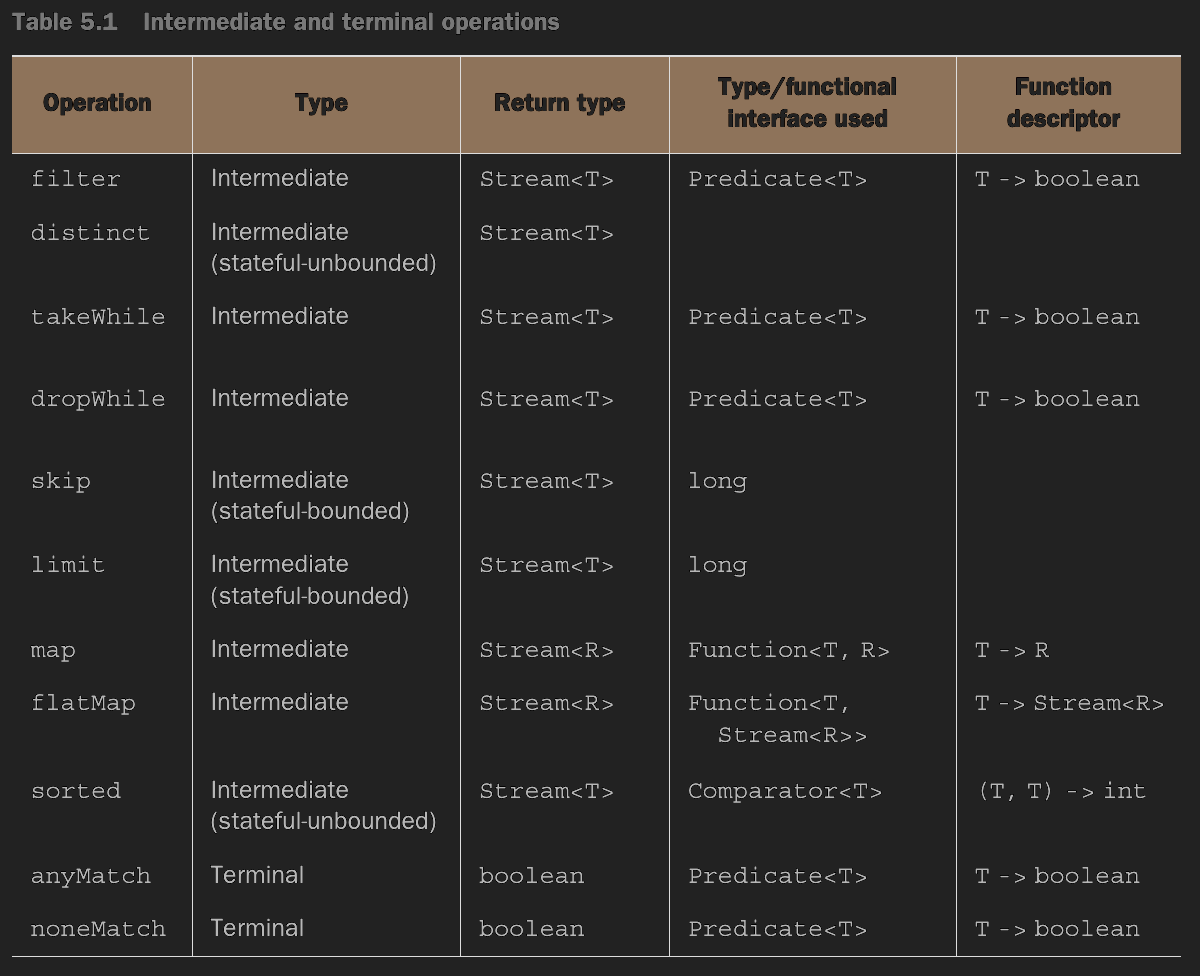


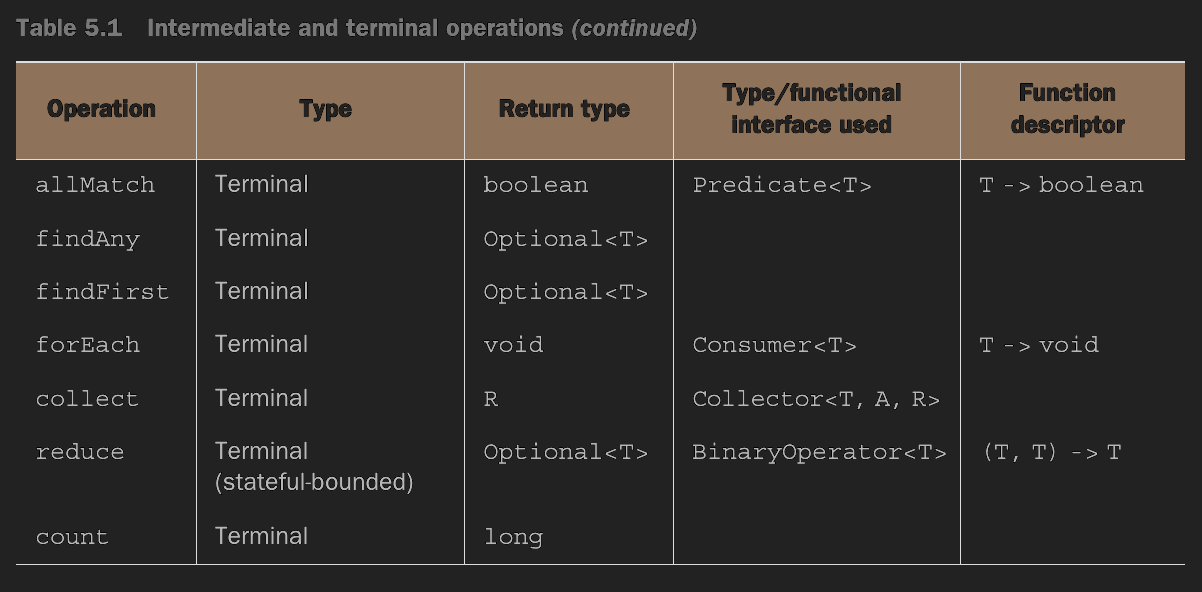

#### 5.6 *Putting it all into practice - Traders and Transactions example*

In [ ]:
// #@title specification
public class Trader {

    public final String name;
    public final String city;

    public Trader(String name, String city) {
        this.name = name;
        this.city = city;
    }

    public String getName() { return this.name; }
    public String getCity() { return this.city; }

    @Override
    public String toString() {
        return "Trader: " + this.name + " in " + this.city;
    }
}

public class Transaction {

    public final Trader trader;
    public final int year;
    public final int amount;

    public Transaction(Trader trader, int year, int amount) {
        this.trader = trader;
        this.year = year;
        this.amount = amount;
    }

    public Trader getTrader()   { return this.trader; }
    public int getYear()        { return this.year; }
    public int getAmount()      { return this.amount; }

    @Override
    public String toString() {
        return "{" + this.trader + ", " + this.year +  ", " + this.amount + "}";
    }
}

Trader maria = new Trader("María", "Bello");
Trader arya = new Trader("Arya", "Medellín");
Trader maggie = new Trader("Maggie", "Envigado");
Trader mateo = new Trader("Mateo", "Medellín");
Trader estiven = new Trader("Estiven", "Itagüí");
Trader simon = new Trader("Simon", "Seoul");

List<Transaction> transactions = List.of(
    new Transaction(maria, 2020, 200),
    new Transaction(maria, 2021, 300),
    new Transaction(maria, 2022, 350),
    new Transaction(arya, 2021, 200),
    new Transaction(arya, 2022, 100),
    new Transaction(arya, 2023, 100),
    new Transaction(maggie, 2019, 500),
    new Transaction(maggie, 2022, 300),
    new Transaction(mateo, 2022, 200),
    new Transaction(mateo, 2023, 200),
    new Transaction(estiven, 2019, 300),
    new Transaction(simon, 2023, 100)
)

In [ ]:
// TODO: FIND ALL THE TRANSACTIONS where amount > 300

transactions.stream()
            .filter(transaction -> transaction.getAmount() > 300)
            .forEach(System.out::println);

{Trader: María in Bello, 2022, 350}
{Trader: Maggie in Envigado, 2019, 500}


In [ ]:
// TODO: FIND Traders who works in Seoul
transactions.stream()                                               // Transaction
            .map(transaction -> transaction.getTrader())            // Trader
            .filter(trader -> "Seoul".equals(trader.getCity()))
            .forEach(System.out::println);

Trader: Simon in Seoul


In [ ]:
// TODO: SORT TRANSACTIONS IN DESCENDING ORDER
transactions.stream()
            .sorted((t1, t2) -> t2.getAmount() - t1.getAmount())
            .map(Transaction::getAmount)
            .forEach(amount -> System.out.print(amount + " "));

500 350 300 300 300 200 200 200 200 100 100 100 

In [ ]:
// TODO: SORT NAMES OF TRADERS IN AN ALPHABETICAL ORDER
transactions.stream()
            .map(Transaction::getTrader)
            .map(Trader::getName)
            .distinct()
            .sorted()
            .forEach(System.out::println);

Arya
Estiven
Maggie
María
Mateo
Simon


In [ ]:
// TODO: FIND IF ANY TRADERS ARE BASED IN ITAGÜÍ
transactions.stream()
            .map(Transaction::getTrader)
            .anyMatch(t -> t.getCity() == "Itagüí");

true

In [ ]:
// TODO: FIND THE SUM AMOUNT OF TRANSACTIONS MADE IN MEDELLÍN, IN 2022
transactions.stream()
            .filter(t -> "Medellín".equals(t.getTrader().getCity()))
            .filter(t -> t.getYear() == 2022)
            .map(Transaction::getAmount)
            .reduce(0, Integer::sum);

300

#### 5.7 *Numeric streams*

##### <font color='#F06C7C'> 5.7.1 Primitive stream specializations - `mapToInt`, `boxed`, `OptionalInt`, `getAsInt`

Java 8 introduces three primitive specialized stream interfaces to tackle the issue where unboxing the referential type to a primitive one is needed: `IntStream`, `DoubleStream`, and `LongStream`, which respectively specialize the elments of a stream to be `int`, `double` and `long` - and thereby avoid the boxing costs.

In [ ]:
int summedCalorie = menu.stream()
                            .mapToInt(Dish::getCalorie)
                            .sum();

System.out.print(summedCalorie);

615

Similarly, once you have a numeric stream, you may be interested in converting it back to a nonspecialized stream.

In [ ]:
menu.stream()
    .mapToInt(Dish::getCalorie) // map to IntStream
    .boxed()        // back to Stream<Integer>
    .reduce(0, Integer::sum);

615

There is a primitive specialized version of `Optional`: `OptionalInt`, `OptionalDouble`, `OptionalLong`.

In [ ]:
OptionalInt maxCalorie = menu.stream()
                                .mapToInt(Dish::getCalorie)
                                .max();

maxCalorie.getAsInt();

150

##### <font color='#F06C7C'> 5.7.2 Numeric ranges - `range`, `rangeClosed`

Java 8 introduces two static methods available on `IntStream` and `LongStream` to help generate ranges: `range` and `rangeClosed`.

In [ ]:
IntStream.rangeClosed(1, 20)
            .filter(n -> n % 2 == 0)
            .forEach(num -> System.out.print(num + " "));

2 4 6 8 10 12 14 16 18 20 

In [ ]:
IntStream.range(1, 20)
            .filter(n -> n % 2 == 0)
            .forEach(num -> System.out.print(num + " "));

2 4 6 8 10 12 14 16 18 

##### <font color='#F06C7C'> 5.7.3 Putting numerical streams into practice: Pythagorean triples

###### Partial logic: Generating B values (on assumption where a equals 12)

**`IntStream.map()` expects only another `int` to be returned, which is not what we want, since we try to generate `int[]`, an object other than `int`. So we change `IntStream` to `Stream<Integer>`, since Stream.map() doesn't have such restriction.**

In [ ]:
IntStream.rangeClosed(1, 100)
         .filter(b -> Math.sqrt(12 * 12 + b * b) % 1 == 0)
         .boxed()
         .map(b -> new int[]{12, b, (int)Math.sqrt(12 * 12 + b * b)}) // array of int
         .forEach(t -> System.out.println(t[0] + " " + t[1] + " " + t[2]));

12 5 13
12 9 15
12 16 20
12 35 37


Or you can use `IntStream.mapToObj`, which can take `Object` type object as its return.

In [ ]:
IntStream.rangeClosed(1, 100)
         .filter(b -> Math.sqrt(12 * 12 + b * b) % 1 == 0)
         .mapToObj(b -> new int[]{12, b, (int)Math.sqrt(12 * 12 + b * b)}) // array of int
         .forEach(t -> System.out.println(t[0] + " " + t[1] + " " + t[2]));

12 5 13
12 9 15
12 16 20
12 35 37


###### Solution code

In [ ]:
// TODO: CONSTRUCT A STREAM THAT GENERATES PYTHAGOREAN TRIPLES,
//       WHERE THE LEAST VALUE OF TUPLES REMAINS UNDER 20 AND THE SECOND LEAST VALUE OF TUPLES REMAINS UNDER 100.

IntStream.rangeClosed(1, 20)
            .boxed()
            .flatMap(a -> IntStream.rangeClosed(a, 100)
                                   .filter(b -> Math.sqrt(a * a + b * b) % 1 == 0)
                                   .mapToObj(b -> new int[]{a, b, (int)Math.sqrt(a * a + b * b)}))
            .forEach(t -> System.out.println(t[0] + ", " + t[1] + ", " + t[2]))

3, 4, 5
5, 12, 13
6, 8, 10
7, 24, 25
8, 15, 17
9, 12, 15
9, 40, 41
10, 24, 26
11, 60, 61
12, 16, 20
12, 35, 37
13, 84, 85
14, 48, 50
15, 20, 25
15, 36, 39
16, 30, 34
16, 63, 65
18, 24, 30
18, 80, 82
20, 21, 29
20, 48, 52
20, 99, 101


#### 5.8 *Building streams*

##### <font color='#F06C7C'> 5.8.1 Streams from values - `Stream.of`

You can create a stream with explicit values by using the static method `Stream.of`.

In [ ]:
Stream.of("Modern", "Java", "In", "Action")
        .map(String::toUpperCase)
        .forEach(System.out::println);

MODERN
JAVA
IN
ACTION


##### <font color='#F06C7C'> 5.8.2 Stream from nullable - `ofNullable`

After playing with streams, you may have encountered a situation where you extracted an object that may be null and then needs to be converted into a stream. In Java 9, a new method was added that allows you create a stream from a nullable object. For example, the method `System.getProperty` returns `null` if there is no property with the given key. Using `Stream.ofNullable` you can write the code more simply.

In [ ]:
Stream<String> possibleNullValue = Stream.of("config", "home", "user")
                                         .flatMap(key -> Stream.ofNullable(System.getProperty(key)));

##### <font color='#F06C7C'> 5.8.3 Streams from arrays - `Arrays.stream`


`Arrays.stream` returns a sequential `Stream` with the specified array as its source. For example, you can convert an array of primitive `int[]` to an `IntStream` using `Arrays.stream`.

In [ ]:
Arrays.stream(new int[] {2, 3, 5, 7, 11}).sum();

28

##### <font color='#F06C7C'> 5.8.4 Streams from files - `Files.lines`

Java's NIO API(non-blocking I/O), which is used for I/O opeartions such as processing a file, has been updated to take advantage of the Streams API. Many static methods in `java.nio.file.Files` return a stream. For example, a useful method is `Files.lines`, which gives you a stream of lines as strings from a given file.

In [ ]:
try {
    File f = new File("demoData.txt");
    f.createNewFile();

    FileWriter fw = new FileWriter("demoData.txt");

    fw.write("Hello World, Hello Java, Hello Stream API");
    fw.write("Stream API is fun to learn!");

    fw.close();

} catch (IOException e) { System.out.print(e); }

In [ ]:
long uniqueWords = 0;
try (Stream<String> lines = Files.lines(Paths.get("demoData.txt"), Charset.defaultCharset())) {
        uniqueWords = lines.flatMap(line -> Arrays.stream(line.split(" ")))
                           .distinct()
                           .count();

} catch (IOException e) { System.out.print(e); }

System.out.print(uniqueWords);

10

##### <font color='#F06C7C'> 5.8.5 Streams from function: creating infinte streams! - `iterate`, `generate`

The Stream API provides two static methods to generate a stream from a function: `Stream.iterate` and `Stream.generate`. These two operations let you create what we call an <u>infinite stream</u>, a stream that doesn't have a fixed size like when you create a stream from a fixed collection. The `iterate` method takes an initial value and a lambda to apply successively on each new value produced.

In [ ]:
Stream.iterate(2, n -> n + 2)
      .limit(10)
      .forEach(t -> System.out.print(t + " "));

2 4 6 8 10 12 14 16 18 20 

In [ ]:
Stream.generate(Math::random)
      .limit(5)
      .forEach(System.out::println);

0.9054648159955994
0.5685886898603435
0.8809298940596453
0.4054215009625144
0.3682093706667249


###### Constructing Fibonacci series using `iterate`

In [ ]:
Stream.iterate(new int[] {0, 1}, t -> new int[]{t[1], t[0] + t[1]})
      .limit(20)
      .map(t -> t[0])
      .forEach(t -> System.out.print(t + " "));

0 1 1 2 3 5 8 13 21 34 55 89 144 233 377 610 987 1597 2584 4181 

## Chapter 6. Collecting data with steams

In this chapter, you will discover that `collect` is a reduction operation, just like `reduce`, that takes as an argument various recipes for accumulating the elements of a strea into a summary result.


#### 6.1 *Collectors in a nutshell*

##### <font color='#F06C7C'> 6.1.1 Collectors as advanced reductions

Collectors are extremely useful because they provide a concise yet flexible way to define <u>**the criteria that `collect` uses to produce the resulting collection**</u>. More speicifically, invoking the `collect` method on a stream <u>**triggers a reduction operation on the elements of the stream itself**</u>. This reduction operation does for you internally what you had to code imperatively otherwise using Stream API.

 The implementation of the methods of the `Collector` interface defines how to perform a reduction operation on a stream. `Collector` utility class provides lots of static factory methods to conveniently create an instance of the most common collectors that are ready to use. The most straightforward and frequently used collector is the `toList` static method.

In [ ]:
transactions.stream()
            .filter(t -> t.getYear() == 2022)
            .collect(Collectors.toList());

[{Trader: María in Bello, 2022, 350}, {Trader: Arya in Medellín, 2022, 100}, {Trader: Maggie in Envigado, 2022, 300}, {Trader: Mateo in Medellín, 2022, 200}]

##### <font color='#F06C7C'> 6.1.2 Predifined collectors

Predefined collectors offer three main functionalities.

- <u>**Reducing and summarizing**</u> stream elements to a single value
- <u>**Grouping**</u>  elements
- <u>**Partitioning**<u> elements

#### 6.2 *Reducing and summarizing*

##### <font color='#F06C7C'> 6.2.1 Finding maximum and minimum in a stream of values - `maxBy`, `minBy`

The `Collectors.maxBy` and `Collectors.minBy` take a `Comparator` as argument to compare the elments in the stream.

In [ ]:
menu.stream()
    .collect(Collectors.maxBy(Comparator.comparingInt(Dish::getCalorie)))
    .get();

Pork

##### <font color='#F06C7C'> 6.2.2 Summarization - `summingInt`, `averagingInt`, `summarizingInt`

The `Collectors` class provides a specific factory method for summing: `Collectors.summingInt`. It accepts a function that maps an object into the `int` that has to be summed and returns a collector that performs the requested summarization.

In [ ]:
menu.stream()
    .collect(Collectors.summingInt(Dish::getCalorie));

/* same as
menu.stream()
    .map(Dish::getCalorie)
    .reduce(0, Integer::sum);
*/

615

In [ ]:
menu.stream()
    .collect(Collectors.averagingInt(Dish::getCalorie));

61.5

In [ ]:
menu.stream()
    .collect(Collectors.summarizingInt(Dish::getCalorie));

IntSummaryStatistics{count=10, sum=615, min=10, average=61.500000, max=150}

##### <font color='#F06C7C'> 6.2.3 Joining Strings - `joining`

The collector returned by the `joining` factory method concatenates into a single string, all strings resulting from invoking the `toString` method on each object in the stream. The `joining` factory method is <u>**overloaded**</u>, with one of its overloaded variants taking a string used <u>**to delimit two consecutive elements**</u>, so you can obtain a comma-seperated list of the dishes' names.

In [ ]:
menu.stream()
    .map(Dish::getName)
    .collect(Collectors.joining(", "));

Chontaduro, Borojo, Maracuya, Naranja, Guava, Platano, Pork, Chicken, Beef, Salmon

##### <font color='#F06C7C'> 6.2.4 Generalized summarization with reduction - `reducing`

All the collectors we’ve discussed so far are, in reality, only convenient specializations of a reduction process that can be defined using the reducing factory method. The Collectors.reducing factory method is a generalization of all of them. It can take three arguments:

- the first argument is <u>**the starting value**</u> of the reduction operation, and will also be the value returned in cas of a stream with no elements.
- the second argument is a <u>**function to transform elements into corresponding type**</u> for performing further operations.
- the third argument is a <u>**`BinaryOperator` that aggregates two items into a single value of the same type**</u>.


 The one argument that `reducing` accepts is a `BinaryOperator<T>` that's a `BiFunction<T, T, T>`. This means that it wants a function <u>**taking two arguments and returns a value of the same type**</u>.

In [ ]:
menu.stream()
    .collect(Collectors.reducing(0, Dish::getCalorie, (i, j) -> i + j));

615

In [ ]:
menu.stream()

    // reducing (BinaryOperator<T> op)
    .collect(Collectors.reducing((d1, d2) -> d1.getCalorie() > d2.getCalorie() ? d1 : d2))
    .get();

Pork

In [ ]:
menu.stream()
    .map(Dish::getName)
    .collect(Collectors.reducing((s1, s2) -> s1 + " " + s2))
    .get();

Chontaduro Borojo Maracuya Naranja Guava Platano Pork Chicken Beef Salmon

In [ ]:
menu.stream()

    // reducing (U identity, Function<? super T,? extends U> mapper, BinaryOperator<U> op)
    .collect(Collectors.reducing("", Dish::getName, (s1, s2)-> s1 + " " + s2));

 Chontaduro Borojo Maracuya Naranja Guava Platano Pork Chicken Beef Salmon

#### 6.3 *Grouping*

When you use `Collectors.groupingBy` to classify elements into according classes, you pass to the `groupingBy` method a `Function` extracting the corresponding type for each element in the stream. We call this `Function ` a <u>**classification function**</u>.

It is not always possible to use a method reference when passing the classification function into `groupingBy` method, because <u>you may wish to classify using more complex logic than a simple property accessor.</u>

In [ ]:
Map<Dish.Type, List<Dish>> dishesByType =
        menu.stream()
            .collect(Collectors.groupingBy(Dish::getType));

System.out.print(dishesByType);

{FISH=[Salmon], FRUIT=[Chontaduro, Borojo, Maracuya, Naranja, Guava, Platano], MEAT=[Pork, Chicken, Beef]}

In [ ]:
public enum CalorieLevel { DIET, NORMAL, FAT }

Map<CalorieLevel, List<Dish>> dishesByCalorieLevel =
        menu.stream()
            .collect(Collectors.groupingBy(dish -> {
                    if (dish.getCalorie() <= 40) { return CalorieLevel.DIET; }
                    else if (dish.getCalorie() <= 80) { return CalorieLevel.NORMAL; }
                    else { return CalorieLevel.FAT; }
                })
            );

System.out.print(dishesByCalorieLevel);

{DIET=[Borojo, Maracuya, Naranja, Guava, Platano], FAT=[Pork, Chicken, Beef], NORMAL=[Chontaduro, Salmon]}

##### <font color='#F06C7C'> 6.3.1 Manipulating grouped elements - `Collectors.filtering`, `Collectors.mapping`, `Collectors.flatMapping` </font>

The `Collectors` class overloads the `groupingBy` factory method with one variant taking also a <u>**second argument of type `Collector`**</u> along with the usual classification function.

The collector passed as second argument to the `groupingBy` factory method will be used to perform a <u>**further reduction operation on all the elements in the stream classifed into the same group**</u>.

The `Collectors.filtering` method is another static factory method fof the `Collectors` class accepting a `Predicate` to filter the elements in each group and a further `Collector` that is used to regroup the filtered elements.

In [ ]:
Map<Dish.Type, List<Dish>> highCalorieDishes =
        menu.stream()
            .collect(Collectors.groupingBy(
                                    Dish::getType,
                                    Collectors.filtering(dish -> dish.getCalorie() > 60, Collectors.toList())));

System.out.println(highCalorieDishes);

{FISH=[Salmon], FRUIT=[], MEAT=[Pork, Chicken, Beef]}


 Another even more common way in which it could be useful to manipulate the grouped elements is transforming them through a `Collectors.mapping` function. It accepts a <u>mapping function</u> and <u>another `Collector` used to gather the elements</u> resulting from the application of that function to each of them.

In [ ]:
Map<Dish.Type, List<String>> dishNamesByType =
        menu.stream()
            .collect(Collectors.groupingBy(
                                    Dish::getType,
                                    Collectors.mapping(Dish::getName, Collectors.toList())
            ));

System.out.print(dishNamesByType);

{FISH=[Salmon], FRUIT=[Chontaduro, Borojo, Maracuya, Naranja, Guava, Platano], MEAT=[Pork, Chicken, Beef]}

You could also use a third `Collector` in combination with the `groupingBy` a to perform a `flatMap` transformation instead of a plain `map`.

In [ ]:
// #@title specification
public class LineItem {

    public final String name;

    LineItem(String name) { this.name = name; }

    public String getName() { return name; }

    public String toString() { return name; }
}

public class Order {

    public final List<LineItem> lineItems;
    public final String customerName;

    Order(List<LineItem> lineItems, String customerName) {
        this.lineItems = lineItems;
        this.customerName = customerName;
    }

    public List<LineItem> getLineItems() { return lineItems; }
    public String getCustomerName() { return customerName; }
}

LineItem item_1 = new LineItem("Item_1");
LineItem item_2 = new LineItem("Item_2");
LineItem item_3 = new LineItem("Item_3");
LineItem item_4 = new LineItem("Item_4");
LineItem item_5 = new LineItem("Item_5");

Order order_1 = new Order(List.of(item_1, item_2, item_3, item_3), "Pipí");
Order order_2 = new Order(List.of(item_3, item_4, item_4, item_5), "Maggie");

List<Order> orders = List.of(order_1, order_2);

In [ ]:
Map<String, Set<LineItem>> lineItemsByCustomerName =
      orders.stream()
            .collect(Collectors.groupingBy(
                                    Order::getCustomerName,
                                    Collectors.flatMapping(order -> order.getLineItems().stream(), Collectors.toSet())));

System.out.print(lineItemsByCustomerName);

{Pipí=[Item_3, Item_2, Item_1], Maggie=[Item_3, Item_4, Item_5]}

##### <font color='#F06C7C'> 6.3.2 Multilevel grouping - `groupingBy`

 The two arguments `Collectors.groupingBy` factory method that we used in a former section to manipulate the elements in the groups resulting from the grouping operation can be used also to perfrom a two-level grouping.

In [ ]:
Map<Dish.Type, Map<CalorieLevel, List<Dish>>> dishesByTypeByCaloricLevel =
        menu.stream()
            .collect(Collectors.groupingBy(
                                    Dish::getType,
                                    Collectors.groupingBy(dish -> {
                                        if (dish.getCalorie() <= 40) { return CalorieLevel.DIET; }
                                        else if (dish.getCalorie() <= 80) { return CalorieLevel.NORMAL; }
                                        else { return CalorieLevel.FAT; }
                                        }
                                    )
            ));

System.out.print(dishesByTypeByCaloricLevel);

{FISH={NORMAL=[Salmon]}, FRUIT={DIET=[Borojo, Maracuya, Naranja, Guava, Platano], NORMAL=[Chontaduro]}, MEAT={FAT=[Pork, Chicken, Beef]}}

In [ ]:
Map<Dish.Type, Map<Boolean, Map<CalorieLevel, List<Dish>>>> dishesByTypeByVegetarianByCaloricLevel =
        menu.stream()
            .collect(Collectors.groupingBy(
                                    Dish::getType,
                                    Collectors.groupingBy(
                                        Dish::isVegetarian,
                                        Collectors.groupingBy(dish -> {
                                            if (dish.getCalorie() <= 40) { return CalorieLevel.DIET; }
                                            else if (dish.getCalorie() <= 80) { return CalorieLevel.NORMAL; }
                                            else { return CalorieLevel.FAT; }
                                        })
                                    )
            ));

System.out.print(dishesByTypeByVegetarianByCaloricLevel)

{FISH={false={NORMAL=[Salmon]}}, FRUIT={true={DIET=[Borojo, Maracuya, Naranja, Guava, Platano], NORMAL=[Chontaduro]}}, MEAT={false={FAT=[Pork, Chicken, Beef]}}}

In [ ]:
// the second axis 'Boolean isVegetarian' for grouping dishes could be also implemented by
// `Collectors.partitioningBy`.

Map<Dish.Type, Map<Boolean, Map<CalorieLevel, List<Dish>>>> dishesByTypeByVegetarianByCaloricLevel =
        menu.stream()
            .collect(Collectors.groupingBy(
                                    Dish::getType,
                                    Collectors.partitioningBy(
                                        Dish::isVegetarian,
                                        Collectors.groupingBy(dish -> {
                                            if (dish.getCalorie() <= 40) { return CalorieLevel.DIET; }
                                            else if (dish.getCalorie() <= 80) { return CalorieLevel.NORMAL; }
                                            else { return CalorieLevel.FAT; }
                                        })
                                    )
            ));

System.out.print(dishesByTypeByVegetarianByCaloricLevel)

{FISH={false={NORMAL=[Salmon]}, true={}}, FRUIT={false={}, true={DIET=[Borojo, Maracuya, Naranja, Guava, Platano], NORMAL=[Chontaduro]}}, MEAT={false={FAT=[Pork, Chicken, Beef]}, true={}}}

##### <font color='#F06C7C'> 6.3.3 Collecting data in subgroups - `counting`, `maxBy`, `collectingAndThen`, `mapping`, `toCollection`

 In the previous section, you saw that it's possible to pass a second `groupinhBy` collector to the outer one to achieve a multilevel grouping. But more generally, the second collector passed to the first `groupingBy` can be any type of collector.

In [ ]:
Map<Dish.Type, Long> typesCount =
        menu.stream()
            .collect(Collectors.groupingBy(
                                    Dish::getType,
                                    Collectors.counting()));

System.out.print(typesCount);

{FISH=1, FRUIT=6, MEAT=3}

In [ ]:
menu.stream()
    .collect(Collectors.groupingBy(
                            Dish::getType,
                            Collectors.maxBy(Comparator.comparingInt(Dish::getCalorie))));

{FISH=Optional[Salmon], FRUIT=Optional[Chontaduro], MEAT=Optional[Pork]}

The `collectingAndThen` method adapts a Collector to perform an additional finishing transformation.

In [ ]:
menu.stream()
    .collect(Collectors.groupingBy(
                            Dish::getType,
                            Collectors.collectingAndThen(
                                    Collectors.maxBy(Comparator.comparingInt(Dish::getCalorie)),
                                    Optional::get
                                    )));

{FISH=Salmon, FRUIT=Chontaduro, MEAT=Pork}

The `mapping` method takes two arguments: <u>**a function transforming the elements**</u> in a stream and <u>**a further collector accumulating the object**</u> resulting from this transformation.

In [ ]:
menu.stream()
    .collect(
        Collectors.groupingBy(
                Dish::getType,
                Collectors.mapping(
                    dish -> {
                        if (dish.getCalorie() <= 40) { return CalorieLevel.DIET; }
                        else if (dish.getCalorie() <= 80) { return CalorieLevel.NORMAL; }
                        else { return CalorieLevel.FAT; }},
                    Collectors.toSet())
            )
    );

{FISH=[NORMAL], FRUIT=[DIET, NORMAL], MEAT=[FAT]}

By using `toCollection` you'd have more control over the type of return resulting from sequnce of stream operations.

In [ ]:
menu.stream()
    .collect(
        Collectors.groupingBy(
                Dish::getType,
                Collectors.mapping(
                    dish -> {
                        if (dish.getCalorie() <= 40) { return CalorieLevel.DIET; }
                        else if (dish.getCalorie() <= 80) { return CalorieLevel.NORMAL; }
                        else { return CalorieLevel.FAT; }},
                    Collectors.toCollection(HashSet::new))
            )
    );

{FISH=[NORMAL], FRUIT=[DIET, NORMAL], MEAT=[FAT]}

#### 6.4 *Partitioning*

Partitioning is a special case of grouping: having a predicate called a <u>**partitioning function**</u> as a classification function. The fact that the partitioning function returns a boolean means the resulting grouping `Map` will have a `Boolean` as a key type, and therefore, there can be at most two different groups - one for `true` and the other for `false`.

In [ ]:
menu.stream()
    .collect(Collectors.partitioningBy(Dish::isVegetarian));

{false=[Pork, Chicken, Beef, Salmon], true=[Chontaduro, Borojo, Maracuya, Naranja, Guava, Platano]}

##### <font color='#F06C7C'> 6.4.1 Advantages of partitioning

Partitioning has the advantage of keeping both lists of the stream elements, for which the application of the partitioning function returns `true` or `false`.

 Also, as you have already seen for grouping, the `partitioningBy` factory method has an <u>**overloaded version**</u> to which you can pass a second collector.

In [ ]:
menu.stream()
    .collect(Collectors.partitioningBy(
                            Dish::isVegetarian,
                            Collectors.groupingBy(
                                dish -> dish.getCalorie() > 60,
                                Collectors.toSet())));

{false={true=[Beef, Pork, Salmon, Chicken]}, true={false=[Chontaduro, Maracuya, Borojo, Platano, Naranja, Guava]}}

In [ ]:
menu.stream()
    .collect(Collectors.partitioningBy(
                            Dish::isVegetarian,
                            Collectors.collectingAndThen(
                                Collectors.maxBy(Comparator.comparingInt(Dish::getCalorie)),
                                Optional::get
                            )
                        )
    );

{false=Pork, true=Chontaduro}

##### <font color='#F06C7C'> 6.4.2 Partitioning numbers into prime and nonprime

Let's construct a stream that divides natural numbers under 20 into prime and noneprime

In [ ]:
IntStream.rangeClosed(2, 20)
         .boxed()
         .collect(Collectors.partitioningBy(num -> {
                int numRoot = (int) Math.sqrt((double) num);

                return IntStream.rangeClosed(2, numRoot)
                                .noneMatch(div -> num % div == 0);
             })
         );

{false=[4, 6, 8, 9, 10, 12, 14, 15, 16, 18, 20], true=[2, 3, 5, 7, 11, 13, 17, 19]}

##### Core static factory methods of `Collectors` class

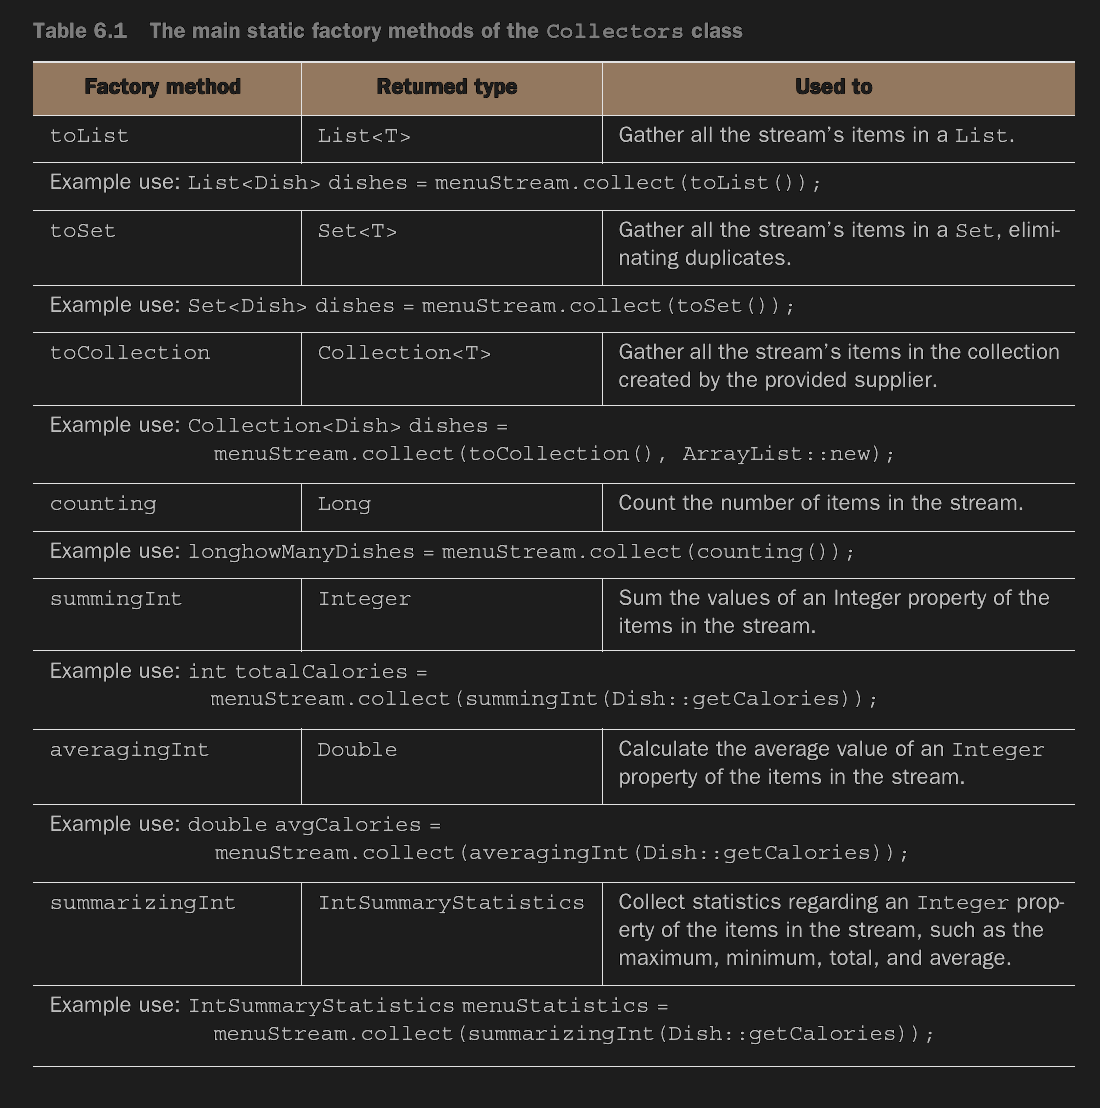

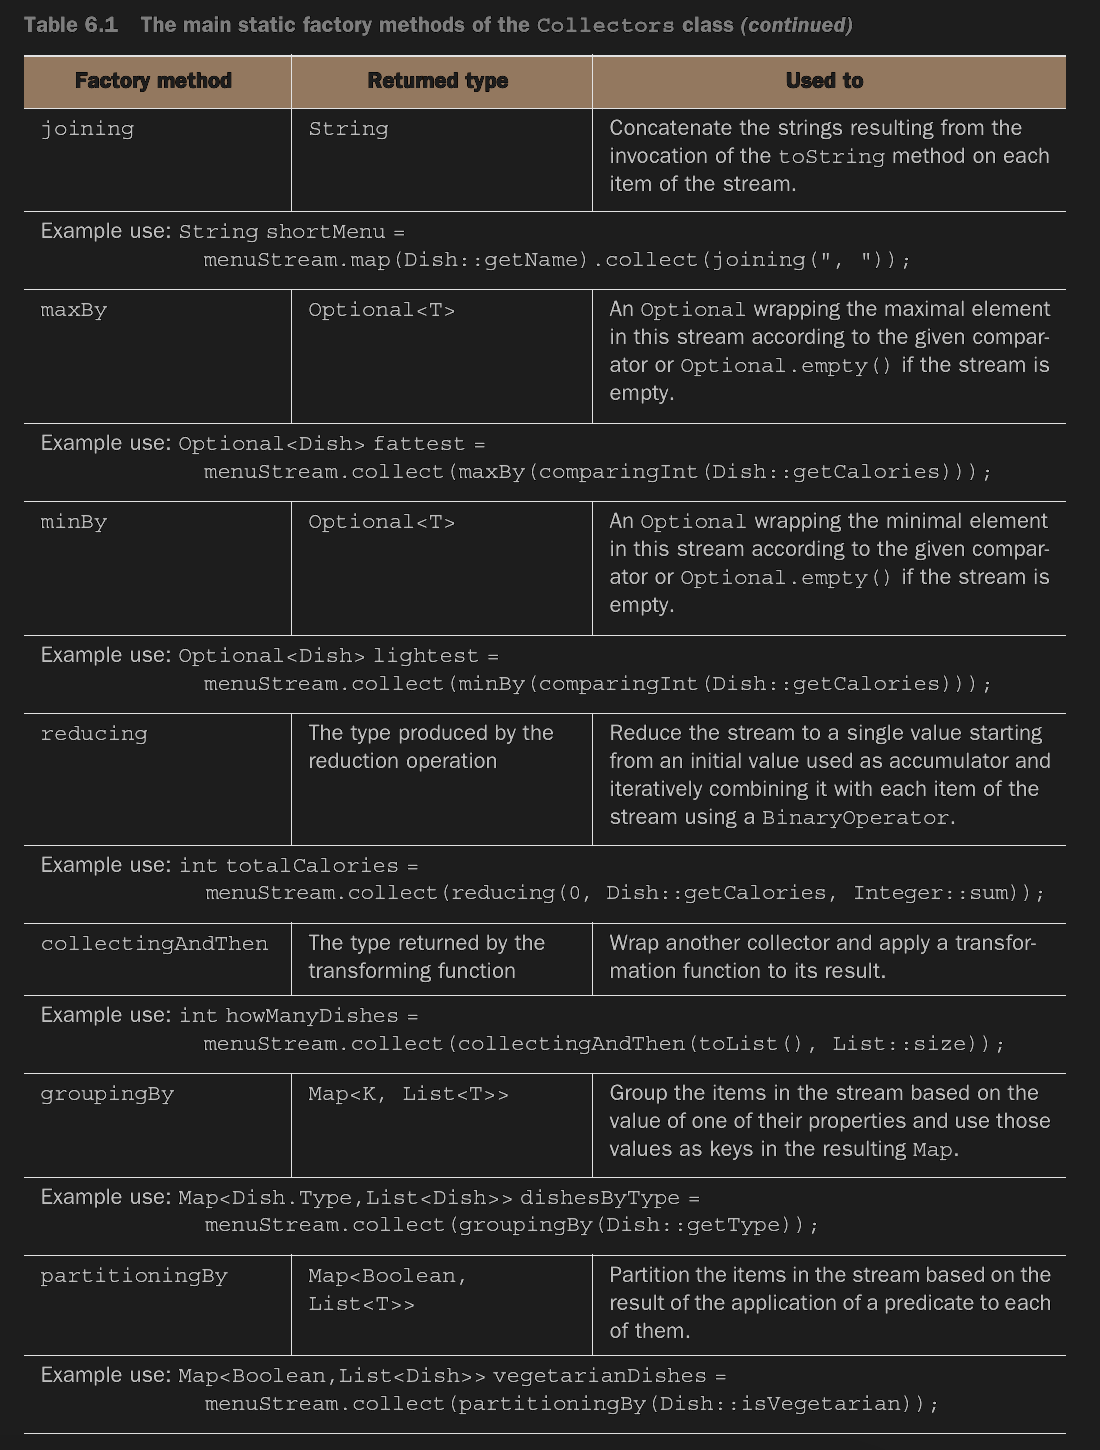

#### 6.5 *The Collector Interface*

The `Collector` interface consists of a set of methods that provide a blueprint for how to impelement specific reduction operations(collectors). Let's take a look at the definition of the `Collector` interface.

```
public interface Collector<T, A, R> {
    Supplier<A> supplier();
    BiConsumer<A, T> accumulator();
    Function<A, R> finisher();
    BinaryOperator<A> combiner();
    Set<Characteristics> characteristics();
}
```

- `T` is the generic type of the items in the stream to be collected.
- `A` is the type of the accumulator, the object on which the partial result will be accumulated during the collection process.
- `R` is the type of the object resulting from the collection operation.


##### <font color='#F06C7C'> 6.5.1 Making sens of the methods declared by Collector interface

###### `supplier` method - <u>Making a new result container</u>

 The `supplier` method has to return a `Supplier` of an empty accumulator - a parameterless function that when invoked <u>**creates an instance of an empty accumulator**</u> used during the collection process.

###### `accumulator` method - <u>Adding an element to a result container</u>

The `accumulator` method <u>**returns the function that performs the reduction operation.**</u> When traversing the *n*th element in the stream, this function is applied with two arguments, the accumlator being the result of the reduction and the *n*th element itself. The function returns `void` because the accumulator is modified in place, meaning that its internal state is changed by the function application to reflect the effect of the traversed element.

###### `finisher` method - <u>Applying the final transformation to the result container</u>

The `finisher` method has to return a function that's invoked at the end of the accumulation process, after having completely traversed the stream, in order <u>**to transform the accumulator object into the final result**</u> of the whole collection operation.

###### `combiner` method - <u>Merging two result containers.</u>

The `combiner` method, the last of the four methods that return a function used by the reduction operation, defines **how the accumulators resulting from the reduction of different subparts of the stream are combined <u>when the subparts are processed in parallel.</u>**

###### `characteristics` method - Defining the behavior of collector.

 The last method, `characteristics`, returns an immutable set of `Characteristics`, defining the behavior of the collector - in particular providing hints about whether the stream an be reduced in parallel and which optimizations are valid when doing so. `Characteristics` is an enumeration containing three items:

 - UNORDERED - the result of the reduction isn't affected by the order in which the items are traversed.
 - CONCURRENT - the `accumulator` function can be called concurrently from multiple threads, and then this collector can perform a parallel reduction of the stream.
 - IDENTITY_FINISHER - this indicates the function returned by the finisher method is the identity one, and its application can be omitted.

##### <font color='#F06C7C'> 6.5.2 Putting them all together

In [ ]:
public class ToListCollector<T> implements Collector<T, List<T>, List<T>> {
    @Override
    public Supplier<List<T>> supplier() {
        return ArrayList::new;
    }

    @Override
        public BiConsumer<List<T>, T> accumulator() {
        return List::add;
    }

    @Override
        public Function<List<T>, List<T>> finisher() {
        return Function.identity();
    }

    @Override
    public BinaryOperator<List<T>> combiner() {
        return (list1, list2) -> {
                    list1.addAll(list2);
                    return list1;
        };
    }

    @Override
    public Set<Characteristics> characteristics() {
        return Collections.unmodifiableSet(EnumSet.of(
                                IDENTITY_FINISH, CONCURRENT));
    }
}

## Chapter 7. Parallel data processing and performance

#### 7.1 *Parallel streams*

##### <font color='#F06C7C'> 7.1.1 Turning a sequential stream into a parallel one - `parallel`, `sequential`

 By invoking the method `parallelStream` on the collection source, it is possible to turn a collection into a parallel stream. A parallel stream is a stream that <u>**splits its elements into multiple chunks, processing each chunk with a different thread**</u>. Thus you can automatically partition the workload of a given operation on all the cores of your multicore processor and keep all of them equally busy.

  Note that, in reality, calling the method `parallel` on a sequential stream doesn't imply any concrete transformation on the stream itself. Internally, a `boolean` flag is set to signal that you want to run in parallel all the operations that follow the invocation to `parallel`.

 Similarly, you can turn a parallel stream into a sequential one by invoking the method `sequential` on it. Only the call to `parallel` or `sequential` wins and affects the pipeline globally.

##### <font color='#F06C7C'> 7.1.2 Measuring stream performance - `LongStream.rangeClosed`

In [ ]:
@Benchmark
public long iterativeSum() {
    long result = 0;
    for (long i = 1L; i <= 10_000_000L; i++) {
        result += 1;
    }

    return result;
}

@Benchmark
public long sequentialSum() {
    return Stream.iterate(1L, i -> i + 1).limit(10000).reduce( 0L, Long::sum);
}


// For execution of compiled .jar file, follow the link below where a maven project is built on Colaboratory envrionment
// https://colab.research.google.com/drive/1dSM6olwtL0-Vv0EZfHYIekLvBbH65GC-#scrollTo=AEpN7EDxKGof&line=1&uniqifier=1

```
# Run complete. Total time: 00:02:50

Benchmark                              Mode  Cnt    Score    Error  Units
ParallelStreamBenchmark.iterativeSum   avgt   40    8.892 ±  1.051  ms/op
ParallelStreamBenchmark.sequentialSum  avgt   40  181.774 ± 30.779  ms/op
```

The result is quite disappointing: the parallel version of summing method isn't taking any advantage of multi core processors. Two issues are mixed together behind:

- `iterate` generates boxed objects, which have to be unboxed to numbers before they can be added.

- `iterate` is difficult to divide into independent chunks to execute in paralle.

The second issue is particularly interesting because you need to keep a mental model that some stream operations are more parallelizable than others.

So let's construct a stream using more effective parallel components.

- `LongStream.rangeClosed` works on primitive `long` numbers directly so there's no need for boxing and unboxing interactions.
- `LongStream.rangeClosed` produces ranges of number, which can be easily spilt into independent chuncks.

In [ ]:
@Benchmark
public long rangedSum() {
    return LongStream.rangeClosed(1, 10_000_000L).reduce(0L, Long::sum);
}

// For execution of compiled .jar file, follow the link below where a maven project is built on Colaboratory envrionment
// https://colab.research.google.com/drive/1dSM6olwtL0-Vv0EZfHYIekLvBbH65GC-#scrollTo=AEpN7EDxKGof&line=1&uniqifier=1

```
# Run complete. Total time: 00:04:11

Benchmark                              Mode  Cnt    Score    Error  Units
ParallelStreamBenchmark.iterativeSum   avgt   40    8.430 ±  0.843  ms/op
ParallelStreamBenchmark.rangedSum      avgt   40    8.183 ±  1.801  ms/op
ParallelStreamBenchmark.sequentialSum  avgt   40  175.565 ± 27.930  ms/op
```

Now let's use a parallel stream

In [ ]:
@Benchmark
public long parallelRangeSum() {
    return LongStream.rangeClosed(1, 10_000_000L)
                        .parallel()
                        .reduce(0L, Long::sum);
}

// For execution of compiled .jar file, follow the link below where a maven project is built on Colaboratory envrionment
// https://colab.research.google.com/drive/1dSM6olwtL0-Vv0EZfHYIekLvBbH65GC-#scrollTo=AEpN7EDxKGof&line=1&uniqifier=1

```
# Run complete. Total time: 00:05:33

Benchmark                                 Mode  Cnt    Score    Error  Units
ParallelStreamBenchmark.iterativeSum      avgt   40    8.456 ±  0.853  ms/op
ParallelStreamBenchmark.parallelRangeSum  avgt   40    8.188 ±  1.273  ms/op
ParallelStreamBenchmark.rangedSum         avgt   40    7.405 ±  1.012  ms/op
ParallelStreamBenchmark.sequentialSum     avgt   40  182.738 ± 30.317  ms/op
```

##### <font color='#F06C7C'> 7.1.3 Using parallel streams correctly

The main cause of errors generated by misuse of parallel streams is the use of algorithms that <u>**mutate some shared state**</u>. Below's a way to implement the sum of the first $n$ natural numbers by mutating a shared accumulator. This code is irretrievably broken because it's fundamentally sequential. You have a data race on every access of `total`. Note that the return value differs from the correct value of summation. <u>**This is caused by the fact that multiple threads are concurrently accessing the accumulator and it is not operating atomically**</u>. Such situations should be mandatorily avoided if there is any kind of shared mutable state.

In [ ]:
public class Accumulator {

    public long total = 0;
    public void add(long value) {
        total += value;
    }
}

public long sideEffectSum(long n) {

    Accumulator accumulator = new Accumulator();

    LongStream.rangeClosed(1, n)
              .parallel()
              .forEach(accumulator::add);

    return accumulator.total;
}

sideEffectSum(1000000); // wrong value

499955335150

##### <font color='#F06C7C'> 7.1.4 Using parallel streams effectively

Here're some advice that could be useful when deciding whether it makes sense to use a parallel stream in a certain situation:

- Measure. It is always important to check performances of sequential and parallel streams.

- Watch out for boxing.
- Some operations naturally perform worse on a parallel stream than on a sequential stream. In particular, operations such as `limit` and `findFirst` that rely on the order of the elements are expensive in a parallel stream.
- Consider the total computational cost of the pipeline of operations performed by the stream.
- Take into account how well the data structure underlinying the stream decomposes.

    - `ArrayList` - Excellent decomposability.
    - `IntStream.range` - Excellent
    - `HashSet` - Good
    - `TreeSet` - Good
    - `LinkedList` - Poor
    - `Stream.iterate` - Poor

#### 7.2 *The fork/join framework*

##### <font color='#F06C7C'> 7.2.1 Working with RecursiveTask

 The fork/join frameworkr was designed to recursively split a parallelizable task into smaller tasks and then combine the results to produce the overall result.

  To submit tasks to this pool, you have to create a subclass of `RecursiveTask<R>`, where `R` is the type of the result produced by the parallelized task or of `RecursiveAction` if the task returns no result.

 When you pass a `ForkJoinTask` to the `ForkJoinPool`, the task is executed by a thread of the pool that in turn calls the `compute` method of the task. This method checks to see if the task is small enough to be performed sequentially; otherwise, <u>**it splits the array of numbers to be summed into two halves and recursively assigns them to two new `ForkJoinTask`**</u> that are scheduled to be executed by the `ForkJoinPool`.

 As a result, this process can be recursively repeated, allowing the original
task to be divided into smaller tasks, until the condition used to check if it’s no longer convenient or no longer possible to further split it is met (in the following case, if the number of items to be summed is less than or equal to 10,000).

In [ ]:
public class ForkJoinSumCalculator extends java.util.concurrent.RecursiveTask<Long> {

    private final long[] numbers;
    private final int start;
    private final int end;

    public static final long THRESHOLD = 10_000L;

    // public constructor to create the main task
    public ForkJoinSumCalculator(long[] numbers) {
        this(numbers, 0, numbers.length);
    }

    // private constructor to create subtasks of the main task
    private ForkJoinSumCalculator(long[] numbers, int start, int end) {
        this.numbers = numbers;
        this.start = start;
        this.end = end;
    }

    @Override
    protected Long compute() {
        int length = end - start;

        if (length <= THRESHOLD) {
            return computeSequentially();
        }

        ForkJoinSumCalculator leftTask =
            new ForkJoinSumCalculator(numbers, start, start  + length / 2);

        // asynchronously executes the newly created subtask using
        // another thread of ForkJoinPool
        leftTask.fork();

        ForkJoinSumCalculator rightTask =
            new ForkJoinSumCalculator(numbers, start + length / 2, end);

        // executes the second(right) subtask synchronously,
        // potentially allowing further recursive splits
        Long rightResult = rightTask.compute() ;

        // reads the result of the first subtask - waiting if it isn't ready
        Long leftResult = leftTask.join();

        // combines the results of the two subtasks
        return leftResult + rightResult;
    }

    private long computeSequentially() {
        long sum = 0;
        for (int i = start; i < end; i++) {
            sum += numbers[i];
        }

        return sum;
    }
}

long[] nums = LongStream.rangeClosed(1, 1_000_000L).toArray();
ForkJoinTask<Long> task = new ForkJoinSumCalculator(nums);

new ForkJoinPool().invoke(task)

500000500000

##### <font color='#F06C7C'> 7.2.2 Best practices for using the fork/join framework

- Invoking the `join` method on a task blocks the caller until the result produced by that task is ready. For this reason, <u>**it's necessary to call it after the computation of both subtasks has been started.**</u>
- The `invoke` method of a `ForkJoinPool` shouldn't be used from within a `RecursiveTask`. Instead, you should always call the methods `compute` or `fork` directly.
- Calling the <u>**`fork` method on a subtask is the way to schedule it on the `ForkJoinPool`**</u>. It might seem natural to invoke it on <u>both of the left and right subtasks</u>, but this is <u>**less efficient**</u> than directly calling `compute` on one of them.

##### <font color='#F06C7C'> 7.2.3 Work stealing

 In real-world scenario, the time taken by each subtask can dramatically vary either due to the use of an inefficient partition strategy or because of unpredictable causes like slow access to the disk or the need to coordinate the execution with external services.

 The fork/join framework works around this problem with a technique called **work stealing**.  More generally, this work-stealing algorithm is used to <u>**redistribute and balance**</u> the tasks among the worker threads in the pool.

#### 7.3 *Spliterator*

##### <font color='#F06C7C'> 7.3.1 The splitting process

 The `Spliterator` is another new interface added to Java 8. Like Iterators, Spliterators are used to <u>traverse the elements of a source</u>, but they’re also designed <u>**to do this in parallel.**</u>

 Java 8 already provides a default Spliterator implementation for all the data structures included in its Collections Framework. The `Collection` interface now provides a default method `spliterator()` which returns a `Spliterator`
object. The `Spliterator` interface defines several methods, as shown in the following lines.

```
public interface Spliterator<T> {
    boolean tryAdvance(Consumer<? super T> action);
    Spliterator<T> trySplit();
    long estimateSize();
    int characteristics();
}
```

 As usual, `T` is the type of the elements traversed by the `Spliterator`. The `tryAdvance` methods behaves in a way similar to a normal `Iterator` in the sense that it's uesd to sequentially consume the elements of the `Spliterator` one by one, returning true if there are stil other elements to be traversed.

 The `trySplit` method is used to partition off some of its elements to a second `Spliterator`, allowing the two to be processed in parallel. A Spliterator may also provide an estimation of the number of the elements remaining to be traversed via its estimateSize method, because even an inaccurate but quick-to-compute value can be useful to split the structure more or less evenly.

 The last abstract method declared by the `Spliterator` interface is `characteristics`,
which returns an int encoding the set of characteristics of the `Spliterator` itself.

- ORDERED - Elements have a defined order (for example, a `List`), so the `Spliterator` enforces this order when traversing and partitioning them
- DISTINCT - For each pair of traversed elements `x` and `y`, `x.equals(y)` returns `false`.
- SORTED - The traversed elements follow a predefined sort order
- SIZED - This Spliterator has been created from a source with a known size (for example, a `Set`), so the value returned by `estimatedSize()` is precise.
- NONNULL - It’s guaranteed that the traversed elements won’t be `null`.
- IMMUTABLE - The source of this `Spliterator` can’t be modified. This implies that no elements can be added, removed, or modified during their traversal
- CONCURRENT - The source of this `Spliterator` may be safely, concurrently modified by other threads without any synchronization
- SUBSIZED - Both this `Spliterator` and all further `Spliterators` resulting from its split are `SIZED`.

##### <font color='#F06C7C'> 7.3.2 Implementing your own Spliterator

In [ ]:
public final String SENTENCE = "Estábamos inquietos mientras esperábamos el comienzo de " +
                "la primera lección con el director Tortsov, pero éste entró " +
                "en la clase sorprendiéndonos con el inesperado anuncio de que, " +
                "para familiarizarse con nosotros, debíamos interpretar " +
                "algún papel de nuestra elección en una representación que se efectuaría.";

In [ ]:
class WordCounter {
    private final int counter;
    private final boolean lastSpace;

    public WordCounter(int counter, boolean lastSpace) {
        this.counter = counter;
        this.lastSpace = lastSpace;
    }

    public WordCounter accumulate(Character c) {
        if (Character.isWhitespace(c)) {
            return lastSpace ?
            this :
            new WordCounter(counter, true);
        } else {
            return lastSpace ?
            new WordCounter(counter + 1, false) :
            this;
        }
    }

    public WordCounter combine(WordCounter wordCounter) {
        return new WordCounter(counter + wordCounter.counter, wordCounter.lastSpace);
    }

    public int getCounter() {
        return counter;
    }
}

In [ ]:
public int countWords(Stream<Character> stream) {
    WordCounter wordCounter = stream.reduce(new WordCounter(0, true),
                                                WordCounter::accumulate,
                                                WordCounter::combine);

    return wordCounter.getCounter();
}

In [ ]:
public class WordCounterSpliterator implements Spliterator<Character> {

    private final String string;
    private int currentChar = 0;

    public WordCounterSpliterator(String string) {
        this.string = string;
    }

    @Override
    public boolean tryAdvance(Consumer<? super Character> action) {
        action.accept(string.charAt(currentChar++));
        return currentChar < string.length();
    }

    @Override
    public Spliterator<Character> trySplit() {
        int currentSize = string.length() - currentChar;
        if (currentChar < 10)  {
            return null;
        }

        for (int splitPos = currentSize / 2 + currentChar; splitPos < string.length(); splitPos++) {

                 if (Character.isWhitespace(string.charAt(splitPos))) {
                     Spliterator<Character> spliterator =
                        new WordCounterSpliterator(string.substring(currentChar, splitPos));

                     currentChar = splitPos;

                     return spliterator;
                 }
             }

        return null;
    }

    @Override
    public long estimateSize() {
        return string.length() - currentChar;
    }

    @Override
    public int characteristics() {

        return Spliterator.ORDERED + Spliterator.SIZED + Spliterator.SUBSIZED + Spliterator.NONNULL + Spliterator.IMMUTABLE;
    }
}

In [ ]:
Spliterator<Character> spliterator = new WordCounterSpliterator(SENTENCE);

Stream<Character> stream = StreamSupport.stream(spliterator, true);

countWords(stream) ;

44

## Chapter 8. Collection API enhancements

#### 8.1 *Collection factories*

##### <font color='#F06C7C'> 8.1.1 List factory - `List.of`

In [ ]:
List<String> friendsList = List.of("Estiven", "Mateo", "Sebastian");

// friends.add("Raquel");
//      -> java.lang.UnsupportedOperationException: null

##### <font color='#F06C7C'> 8.1.2 Set factory - `Set.of`

In [ ]:
Set<String> friendsSet = Set.of("Estiven", "Mateo", "Sebastian");

// Set<String> friendsSet = Set.of("Estiven", "Mateo", "Sebastian", "Sebastian");
//      -> java.lang.IllegalArgumentException: duplicate element: Sebastian

##### <font color='#F06C7C'> 8.1.3 Map factory - `Map.of`, `Map.ofEntries`

To go beyond ten keys and values, use the alternative factory method called `Map.ofEntries` which takes `Map.<K, V>` objects but is implemented with varargs.

In [ ]:
Map<String, Integer> ageOfFriends =
    Map.of("Estiven", 24, "Mateo", 28, "Sebastian", 27);

Map<String, Integer> ageOfFriendsEntry =
            Map.ofEntries(Map.entry("Estiven", 24),
                        Map.entry("Mateo", 28),
                        Map.entry("Sebastian", 27));

#### 8.2 *Working with List and Set*

In [ ]:
//#@title specification
List<Transaction> transactionsMutable = new ArrayList<>();

transactionsMutable.add(new Transaction(maria, 2020, 200));
transactionsMutable.add(new Transaction(maria, 2022, 350));
transactionsMutable.add(new Transaction(arya, 2021, 200));
transactionsMutable.add(new Transaction(arya, 2022, 100));
transactionsMutable.add(new Transaction(arya, 2023, 100));
transactionsMutable.add(new Transaction(maggie, 2019, 500));
transactionsMutable.add(new Transaction(maggie, 2022, 300));
transactionsMutable.add(new Transaction(mateo, 2022, 200));
transactionsMutable.add(new Transaction(mateo, 2023, 200));
transactionsMutable.add(new Transaction(estiven, 2019, 300));
transactionsMutable.add(new Transaction(simon, 2023, 100));

List<String> tradersName =
        transactions.stream()
                    .map(transaction -> transaction.getTrader().getName())
                    .collect(Collectors.toList());

##### <font color='#F06C7C'> 8.2.1 Removes element matching a predicate - `removeIf`

In [ ]:
Predicate<Integer> overThreeHunds = amount -> amount > 300;

transactionsMutable.removeIf(transaction -> overThreeHunds.test(transaction.getAmount()));

transactionsMutable.forEach(System.out::println);

{Trader: María in Bello, 2020, 200}
{Trader: Arya in Medellín, 2021, 200}
{Trader: Arya in Medellín, 2022, 100}
{Trader: Arya in Medellín, 2023, 100}
{Trader: Maggie in Envigado, 2022, 300}
{Trader: Mateo in Medellín, 2022, 200}
{Trader: Mateo in Medellín, 2023, 200}
{Trader: Estiven in Itagüí, 2019, 300}
{Trader: Simon in Seoul, 2023, 100}


##### <font color='#F06C7C'> 8.2.2 Replaces each element in a list with new ones - `List.replaceAll`

In [ ]:
tradersName.replaceAll(String::toUpperCase);

tradersName

[MARÍA, MARÍA, MARÍA, ARYA, ARYA, ARYA, MAGGIE, MAGGIE, MATEO, MATEO, ESTIVEN, SIMON]

#### 8.3 *Working with Map*

##### <font color='#F06C7C'> 8.3.1 Iterates over keys and values more easily - `forEach`

In [ ]:
ageOfFriends.forEach((friend, age) ->
            System.out.println(friend + " is " + age + " years old.")
);

Mateo is 28 years old.
Sebastian is 27 years old.
Estiven is 24 years old.


##### <font color='#F06C7C'> 8.3.2 Sorts the entries of a map by values or keys - `Entry.comparingByKey`, `Entry.comparingByValue`

In [ ]:
ageOfFriends.entrySet()
            .stream()
            .sorted(Map.Entry.comparingByKey())
            .forEachOrdered(System.out::println);

Estiven=24
Mateo=28
Sebastian=27


In [ ]:
ageOfFriends.entrySet()
            .stream()
            .sorted(Map.Entry.comparingByValue())
            .forEachOrdered(System.out::println);

Estiven=24
Sebastian=27
Mateo=28


##### <font color='#F06C7C'> 8.3.3 Gets default value when the key is not present - `getOrDefault`

In [ ]:
// the key present, so is returned the according value
System.out.println(ageOfFriends.getOrDefault("Estiven", 99));

// the key isn't present, so is returned default value
System.out.println(ageOfFriends.getOrDefault("Simon", 99));

24
99


##### <font color='#F06C7C'> 8.3.4 Compute patterns - `computeIfAbsent`, `computeIfPresent`, `compute`

* `computeIfAbsent` - If there's no specified value for the given key, calculate a new value by useing the key and add it to the `Map`. <u>**It takes key and `Function` as argument**</u>.
* `computeIfPresent` - If the specified key is present, calculatte a new value for it and add it to the `Map`. <u>**It takes key, value and `BiFunction` as argument**</u>.
* `compute` - This operation caculates a new value for a given key and stores it in the `Map`.

In [ ]:
Map<String, String> mapped = new HashMap<>();

List<String> keys = List.of(
            "Albinus",
            "Margot",
            "Nabokov",
            "Otto",
            "Otto",
            "Otto"
);

keys.forEach(key -> mapped.computeIfAbsent(key, Function.identity()));

System.out.println(mapped)

{Otto=Otto, Nabokov=Nabokov, Albinus=Albinus, Margot=Margot}


In [ ]:
Function<String, Integer> lengthFunc = string -> string.length();
BiFunction<String, Integer, Integer> addOneFunc = (key, value) -> value + 1;

Map<String, Integer> mapped = new HashMap<>();

List<String> keys = List.of(
        "Albinus",
        "Margot",
        "Nabokov",
        "Otto",
        "Otto",
        "Otto"
);

keys.forEach(key -> mapped.computeIfAbsent(key, lengthFunc));
System.out.println(mapped);

keys.forEach(key -> mapped.computeIfPresent(key, addOneFunc));
System.out.println(mapped);

{Otto=4, Nabokov=7, Albinus=7, Margot=6}
{Otto=7, Nabokov=8, Albinus=8, Margot=7}


In [ ]:
BiFunction<String, String, String> upperCaseFunc = (key, value) -> key.toUpperCase();

Map<String, String> mapped = new HashMap<>();

List<String> keys = List.of(
        "Albinus",
        "Margot",
        "Nabokov",
        "Otto",
        "Otto",
        "Otto"
);

keys.forEach(key -> mapped.compute(key, upperCaseFunc));
System.out.println(mapped);

{Otto=OTTO, Nabokov=NABOKOV, Albinus=ALBINUS, Margot=MARGOT}


##### <font color='#F06C7C'> 8.3.5 Remove patterns - `remove`

In [ ]:
mapped.remove("Otto");

System.out.println(mapped);

{Nabokov=NABOKOV, Albinus=ALBINUS, Margot=MARGOT}


##### <font color='#F06C7C'> 8.3.6 Replacement patterns - `replaceAll`

In [ ]:
mapped.replaceAll((key, value) -> value.toLowerCase());

System.out.println(mapped)

{Nabokov=nabokov, Albinus=albinus, Margot=margot}


##### <font color='#F06C7C'> 8.3.7 Merge two intermediate maps - `merge`

The `merge` method takes a `BiFunction` to merge values that bave a duplicate key.

In [ ]:
BiFunction<String, String, String> mergeValuesFunc =
                            (value_1, value_2) -> value_1 + " & " + value_2;

Map<String, String> map_1 = Map.ofEntries(
    Map.entry("Estiven", "Chontaduro"),
    Map.entry("Andres", "Naranja"),
    Map.entry("Mateo", "Guava")
);

Map<String, String> map_2 = Map.ofEntries(
    Map.entry("Andres", "Borojo"),
    Map.entry("Sebastian", "Platano")
);

Map<String, String> merged = new HashMap<>(map_1);

map_2.forEach((key, value) ->
    merged.merge(key, value, mergeValuesFunc)
);

System.out.println(merged)

{Mateo=Guava, Andres=Naranja & Borojo, Estiven=Chontaduro, Sebastian=Platano}


#### 8.4 *Imporved ConcurrentHashMap*

##### <font color='#F06C7C'> 8.4.1 Reduce and Search - `forEach`, `reduce`, `search`

* `forEach` - Performs a given action for each `(key, value)`
* `reduce` - Combines all `(key, value)` given a reduction function into a result
* `search` - Applies a function on each `(key, value)` until the function produces a non-null result

Each kind of operation supports four forms, accepting different set of arguments:

- Operates with keys and values - `forEach`, `reduce`, `search`
- Operates with keys - `forEachKey`, `reduceKeys`, `searchKeys`
- Operates with values - `forEachValue`, `reduceValues`, `searchValues`
- Operates with `Map.Entry` objects - `forEachEntry`, `reduceEntries`, `searchEntries`

In addition, you need to specify a parallelism threshold for all these operations. The operations execute sequentially if the current size of the map is smaller than the given threshold.

In [ ]:
Map<String, Long> colorsCount = Map.ofEntries(
    Map.entry("red", 0L),
    Map.entry("green", 10L),
    Map.entry("blue", 100L)
);

long parallelismThreshold = 1;
ConcurrentHashMap<String, Long> colorsCountConcurrent = new ConcurrentHashMap<>(colorsCount);

colorsCountConcurrent.reduceValues(parallelismThreshold, Long::max);

100

##### <font color='#F06C7C'> 8.4.2 Returning the number of mappings in the map as `long` type - `mappingCount`

You should use it in preference to the `size` method, which returns an `int` value.

In [ ]:
colorsCountConcurrent.mappingCount()

3

##### <font color='#F06C7C'> 8.4.3 Set views - `keySet`

The `ConcurrentHashMap.keySet` method rturns a `ConcurrentHashMap.KeySetView` view of the keys in map.

In [ ]:
System.out.println(colorsCountConcurrent.keySet());
System.out.println(colorsCountConcurrent.keySet().getClass())

[red, green, blue]
class java.util.concurrent.ConcurrentHashMap$KeySetView


## Chapter 16 CompletableFuture: Composable asynchronous programming

#### 16.1 *Simple use of Futures*

 The `Future` interface was introduced in Java 5 to model a result made available at some point in the future. The `Future` interface models an asynchronous computation and provides a reference to its result that becomes avaiable when the computation itself is completed. Triggering a potentially time-consuming action inside a `Future` allows the caller `Thread` to contniue doing useful work instead of waiting for the operation's result.

##### <font color='#F06C7C'> 16.1.1 Understanding Futures and their limitations

 It is difficult to express dependencies among results of a `Future` since it lacks many declarative features. The `CompletableFuture` class makes implements such deficiencies by providing following features:

 * Combining two asynchronous computations both when they're independent to each other or when the second dependents on the result of the first.
 * Waiting for the completion of all tasks performed by a set of `Future`s.
 * Waiting for the completion of only the quickest task in a set of `Future`s and retrieving its result.
 * Programmatically completing a `Future
 * Reacting to a `Future` completion


 The design of `Stream` and `CompletableFuture` follow similar parrter, because both use lambda expressions and pipelining.

##### <font color='#F06C7C'> 16.1.2 Using CompletableFutures to build an asynchronous application

 To explore the `CompletableFuture` features, in this section you incrementally develop a best-price-finder application that conntacts multiple online shops to find the lowest price for a given product or service. Along the way, you'll learn about:

 * How to provide an <u>*asynchronous API*</u> for your customer.
 * How to make your  <u>*code nonblocking*</u> when you're a customer of a synchronous API. You discover how to pipeline two subsequent asynchronous operations, merging them into a single asynchronous computation.
 * How to <u>*reactively process* events representing the completion of an *asynchronous operation*</u> and how doing so allows the application to constantly update the best-buy quote for the item you want to by as each shop returns its pirce, instead of waiting for all the shops to return their respective quotes.

 In an *asynchronous API*, a method returns immediately, delegating its remaining computation to a thread, which runs asynchronously to the caller - hence the phrase *nonblocking call*. The remaining computation gives its value to the caller by calling a callback method, or the caller invokes a further "wait until the computation is complete" method.

#### 16.2 *Implementing an asynchronous API*

##### <font color='#F06C7C'> 16.2.1 Converting a synchronous method into an asynchronous one

Here you create an instance of `CompletableFuture`, representing an asynchronous computation and containing a result when it becomes available. Then you fork a different `Thread` that will perform the actual price calculation and return the `Future` instance without waiting for that long-lasting computation to terminate. When the price of the requested product is finally available, you can complete the `CompletableFuture` using its `complete` method to set the value.

In [ ]:
// a method to fake Shop's tasks that would require long-running execution
public static void delay() {
    try {
        Thread.sleep(3_000L);
    } catch (InterruptedException e) {
        throw new RuntimeException(e);
    }
}

In [ ]:
public class Shop {
    String name;

    Shop(String name) { this.name = name; }

    public Future<Double> getPriceAsync(String product) {

        CompletableFuture<Double> futurePrice = new CompletableFuture<>();

        new Thread( () -> {
            double price = calculatePrice(product);
            futurePrice.complete(price);
        }).start();

        return futurePrice;
    }

    public double getPrice(String product) {
        return calculatePrice(product);
    }

    double calculatePrice(String product) {

        Random random = new Random();

        delay();
        return random.nextDouble() * product.charAt(0) + product.charAt(1);
    }
}

In [ ]:
Shop shop = new Shop("BestShop");
long start = System.nanoTime();

Future<Double> futurePrice = shop.getPriceAsync("my favorite product");
long invocationTime = ((System.nanoTime() - start) / 1_000_000);

System.out.println("Invocation returned after " + invocationTime + " msecs");

try {
    double price = futurePrice.get();
    System.out.printf("Price is %.2f%n", price);
} catch (Exception e) { throw new RuntimeException(e); }

long retrievalTime = ((System.nanoTime() - start) / 1_000_000);
System.out.println("Price returned after " + retrievalTime + " msecs");

Invocation returned after 88 msecs
Price is 142.72
Price returned after 3100 msecs


##### <font color='#F06C7C'> 16.2.2 Dealing with errors - `complete`, `supplyAsync`

 By using an overloaded version of the `CompletableFuture.get` method that also accepts time out, a client can prevent the problem of getting blocked, which could possibly happen due to an error that has been generated during operations on thread.

 To make the cleint aware of the reason why the shop wasn't able to provide the price of the requested product, you have to propagate the `Exception` that caused the problem inside the `CompleteFuture` through its `completeExceptionally` method.

In [ ]:
public class Shop {
    String name;

    Shop(String name) { this.name = name; }

    public Future<Double> getPriceAsync(String product) {

        CompletableFuture<Double> futurePrice = new CompletableFuture<>();

        new Thread( () -> {

            try { double price = calculatePrice(product);
                  futurePrice.complete(price);
            } catch (Exception ex) {
                futurePrice.completeExceptionally(ex);
            }

        }).start();

        return futurePrice;
    }

    public double getPrice(String product) {
        return calculatePrice(product);
    }

    double calculatePrice(String product) {

        Random random = new Random();

        delay();
        return random.nextDouble() * product.charAt(0) + product.charAt(1);
    }
}

In [ ]:
Shop shop = new Shop("BestShop");
long start = System.nanoTime();

Future<Double> futurePrice = shop.getPriceAsync("my favorite product");
long invocationTime = ((System.nanoTime() - start) / 1_000_000);

System.out.println("Invocation returned after " + invocationTime + " msecs");

try {
    double price = futurePrice.get();
    System.out.printf("Price is %.2f%n", price);
} catch (Exception e) { throw new RuntimeException(e); }

long retrievalTime = ((System.nanoTime() - start) / 1_000_000);
System.out.println("Price returned after " + retrievalTime + " msecs");

Invocation returned after 69 msecs
Price is 180.76
Price returned after 3076 msecs


 The `CompleteFuture` class comes with lots of handy factory methods `supplyAsync`that can make the processes for easier and less verbose.

 The methods returns a new `CompletableFuture` that is asynchronously completed by a task running in the `ForkJoinPool.commonPool()` with the value obtained by calling the given `Supplier`.

In [ ]:
public class Shop {
    String name;

    Shop(String name) { this.name = name; }

    String getName() { return this.name; }

    public Future<Double> getPriceAsync(String product) {
        return CompletableFuture.supplyAsync(() -> calculatePrice(product));
    }

    public double getPrice(String product) {
        return calculatePrice(product);
    }

    double calculatePrice(String product) {

        Random random = new Random();

        delay();
        return random.nextDouble() * product.charAt(0) + product.charAt(1);
    }
}

In [ ]:
Shop shop = new Shop("BestShop");
long start = System.nanoTime();

Future<Double> futurePrice = shop.getPriceAsync("my favorite product");
long invocationTime = ((System.nanoTime() - start) / 1_000_000);

System.out.println("Invocation returned after " + invocationTime + " msecs");

try {
    double price = futurePrice.get();
    System.out.printf("Price is %.2f%n", price);
} catch (Exception e) { throw new RuntimeException(e); }

long retrievalTime = ((System.nanoTime() - start) / 1_000_000);
System.out.println("Price returned after " + retrievalTime + " msecs");

Invocation returned after 76 msecs
Price is 221.91
Price returned after 3082 msecs


The `supplyAsync` method accepts a `Supplier` as argument and returns a `CompleteableFuture` that will be asynchronously completed with the value obtained by invoking that `Supplier`. This `Supplier` is run by one of the `Executor`s in the `ForkJoinPool`, but you can specify a different `Executor` by passing it as a secound argument to the overloaded version of this method.

#### 16.3 *Making your code nonblocking*

##### <font color='#F06C7C'> linear computation

In [ ]:
List<Shop> shops = List.of(
    new Shop("shopA"),
    new Shop("shopB"),
    new Shop("shopC"),
    new Shop("shopD"),
    new Shop("shopE"),
    new Shop("shopF"),
    new Shop("shopG"),
    new Shop("shopH")
);

In [ ]:
public List<String> findPrices(String product) {
    return shops.stream()
                .map(shop -> String.format("%s price is %.2f", shop.getName(), shop.getPrice(product)))
                .collect(Collectors.toList());
}

In [ ]:
long start = System.nanoTime();
System.out.println(findPrices("item_1"));

long duration = (System.nanoTime() - start) / 1_000_000;
System.out.println("Done in " + duration + " msecs");

[shopA price is 119.71, shopB price is 170.25, shopC price is 120.67, shopD price is 219.43, shopE price is 197.37, shopF price is 203.50, shopG price is 151.05, shopH price is 137.50]
Done in 24048 msecs


##### <font color='#F06C7C'> 16.3.1 Parallelizing requests using a parallel Stream - `parallelStream()`

In [ ]:
public List<String> findPricesParallel(String product) {
    return shops.parallelStream()
                .map(shop -> String.format("%s price is %.2f", shop.getName(), shop.getPrice(product)))
                .collect(Collectors.toList());
}

 Now the four shops are qurried in parallel, so the code takes about 12 seconds (3 secounds for each shop, so total computation duration 24 seconds is divided by 2, which is the number of processors in Colab environment, resulting in 12 seconds).

In [ ]:
long start = System.nanoTime();
System.out.println(findPricesParallel("item_1"));

long duration = (System.nanoTime() - start) / 1_000_000;
System.out.println("Done in " + duration + " msecs");

[shopA price is 144.58, shopB price is 189.11, shopC price is 157.27, shopD price is 118.97, shopE price is 217.28, shopF price is 134.80, shopG price is 208.87, shopH price is 198.90]
Done in 12038 msecs


##### <font color='#F06C7C'> 16.3.2 Making asynchronous requests with CompleteFutures - `CompletableFuture.supplyAsync`

In [ ]:
public List<String> findPricesAsync(String product) {

    List<CompletableFuture<String>> priceFutures =
        shops.stream()
            .map(shop -> CompletableFuture.supplyAsync(() -> String.format("%s price is %.2f", shop.getName(), shop.getPrice(product))))
            .collect(Collectors.toList());

    return priceFutures.stream()
                    .map(CompletableFuture::join)
                    .collect(Collectors.toList());
}

  Note that you use <font size="4"><u> **two sperate stream**</u></font> pipelines instead of putting the two `map` operations one after the other in the same stream-processing pipeline. Given the <u>**lazy nature of intermediate stream operations**</u>, if you’d processed the stream in a single pipeline, you’d have succeeded only in executing all the requests to different shops synchronously and sequentially.

In [ ]:
long start = System.nanoTime();
System.out.println(findPricesAsync("item_1"));

long duration = (System.nanoTime() - start) / 1_000_000;
System.out.println("Done in " + duration + " msecs");

[shopA price is 160.83, shopB price is 171.57, shopC price is 139.06, shopD price is 158.05, shopE price is 146.84, shopF price is 204.77, shopG price is 209.08, shopH price is 196.59]
Done in 3045 msecs


##### <font color='#F06C7C'> 16.3.3 Looking for the solution that scales better

  If the number of threads in the pool is <font size="4"><u>too big</font></u>  , the threads end up competing for scarce CPU and memory resources, <font size="4"><u>waisting their time performing context switching</font></u>. Conversely, if the number is <font size="4"><u>too small</font></u>, some of the cores of the CPU will remain <font size="4"><u>underused</font></u>.

 A desired pool size can be derived following formula:

 $$N^{threads} = N^{CPU} * U^{CPU} * (1 + W/C)$$, where $W/C$ is the ratio of wait time to compute time, and $U^{CPU}$ is the target CPU use (between 0 and 1)

##### <font color='#F06C7C'> 16.3.4 Using a custom Executor

 The application we are building is spending about 99 percent of its time waiting for the shops' response(`getPrice` method), so you could estimate a $W/C$ ratio of 100. Let's use 100 perceont of CPU, so the desired number of threads in the pool would be 400.

 You need to set up an `Executor` with a fixed number of threads equal to the number of shops you have to query, so that you have one threads for each shop. Also let's set an upper limit of 100 threads to avoid a server crash for a larger number of shops.

In [ ]:
final Executor executor =
        Executors.newFixedThreadPool(
                        // the number of thread
                        Math.min(shops.size(), 100),

                        // `ThreadFactory` to set a Thread daemon
                        (Runnable r) -> { Thread t = new Thread(r);
                                          t.setDaemon(true);
                                          return t; }
        );

SyntaxError: ignored

 A Java program can't terminate or exit while a normal thread is executing, so a leftover thread waiting for a never-satisfiable event causes problems. By <u>marking a thread as a daemon means that it can be killed on program termination</u> with no performance difference.

In [ ]:
public List<String> findPricesAsync(String product) {

    List<CompletableFuture<String>> priceFutures =
        shops.stream()
             .map(shop -> CompletableFuture.supplyAsync(
                                // Supplier
                                () -> String.format("%s price is %.2f", shop.getName(), shop.getPrice(product)),

                                // Executor
                                executor))
             .collect(Collectors.toList());

    return priceFutures.stream()
                       .map(CompletableFuture::join)
                       .collect(Collectors.toList());
}

In [ ]:
long start = System.nanoTime();
System.out.println(findPricesAsync("item_1"));

long duration = (System.nanoTime() - start) / 1_000_000;
System.out.println("Done in " + duration + " msecs");

[shopA price is 163.74, shopB price is 120.88, shopC price is 137.07, shopD price is 134.42, shopE price is 157.51, shopF price is 189.66, shopG price is 137.29, shopH price is 207.77]
Done in 3061 msecs


#### 16.4 *Pipelining asynchronous tasks*

 Suppose that all the shops have agreed to use a centralized discount service. This service uses five discount codes, each of which has a different discount percentage. You represent this idea by defining a Discount.Code enumeration.

##### <font color='#F06C7C'> 16.4.1 Implementing a discount service

(Due to a mutually dependent classes structure, implementation of specifications is done in maven project environment. You can look up the implementation the link: https://colab.research.google.com/drive/1wNGDFUC6CgR3hE8wptHQ0dFXHPYGT2Nt?usp=sharing)

###### Discount.java


    public class Discount {

        public enum Code {
            NONE(0), SILVER(5), GOLD(10), PLATINUM(15), DIAMOND(20);

            final int percentage;

            Code(int percentage) { this.percentage = percentage; }
        }

        public static String applyDiscount(Quote quote) {
            return quote.getShopName() + " price is " +
                    Discount.apply(quote.getPrice(),
                            quote.getDiscountCode());
        }

        private static double apply(double price, Code code) {
            delay();
            return price * (100 - code.percentage) / 100;
        }
    }


###### Quote.java


    public class Quote {

        private final String shopName;
        private final double price;
        private final Discount.Code discountCode;

        public Quote(String shopName, double price, Discount.Code discountCode) {
            this.shopName = shopName;
            this.price = price;
            this.discountCode = discountCode;
        }

        public static Quote parse(String s) {
            String[] split = s.split(":");

            String shopName = split[0];
            double price = Double.parseDouble(split[1]);
            Discount.Code discountCode = Discount.Code.valueOf(split[2]);

            return new Quote(shopName, price, discountCode);
        }

        public String getShopName()             { return shopName; }
        public double getPrie()                 { return price; }
        public Discount.Code getDiscountCode()  { return discountCode; }
    }

###### Shop.java


    public class Shop {

        String name;

        Shop(String name) { this.name = name; }

        public Future<Double> getPriceAsync(String product) {

            CompletableFuture<Double> futurePrice = new CompletableFuture<>();

            new Thread( () -> {
                double price = calculatePrice(product);
                futurePrice.complete(price);
            }).start();

            return futurePrice;
        }

        public String getPrice(String product) {
            double price = calculatePrice(product);                    // e.g. ) `Discount.Code.values()[2]` generates
                                                                       //         enum GOLD object
            Discount.Code code = Discount.Code.values()[random.nextInt(Discount.Code.values().length)];


            return String.format("%s:%.2f:%s", name, price, code);
        }

        double calculatePrice(String product) {

            delay();
            return random.nextDouble() * product.charAt(0) + product.charAt(1);
        }

        Random random = new Random();

        // a method to fake demo.Shop's tasks that would require long-running execution
        public static void delay() {
            try {
                Thread.sleep(3_00L);
            } catch (InterruptedException e) {
                throw new RuntimeException(e);
            }
        }
    }

###### App.java


    public class App {
        public static void main(String[] args) {

            List<Shop> shops = List.of(
                    new Shop("a"),
                    new Shop("b"),
                    new Shop("c"),
                    new Shop("d"),
                    new Shop("e"),
                    new Shop("f"),
                    new Shop("g"),
                    new Shop("h")
            );

            long start = System.nanoTime();
            System.out.println(findPrices(shops, "item_1"));

            long duration = (System.nanoTime() - start) / 1_000_000;
            System.out.println("Done in " + duration + " msecs");
        }


        public static List<String> findPrices(List<Shop> shops, String product) {
            return shops.stream()
                        .map(shop -> shop.getPrice(product))
                        .map(Quote::parse)
                        .map(Discount::applyDiscount)
                        .collect(Collectors.toList());
        }
    }

##### <font color='#F06C7C'> 16.4.2 Using the Discount service

###### $[Stdout]$

    [a price is 101.23200000000001, b price is 124.04050000000001, c price is 133.263, d price is 166.79, e price is 133.09, f price is 108.976, g price is 181.99, h price is 170.088]
    Done in 48046 msecs


 As expected, this code takes 48 seconds to run, because it takes 3 seconds to get price plus 3 seconds to apply discount service from each shop and we are doing these operations sequentially.

 We already know that we can improve this result by converting the stream to a parallel one, but that could not be much scalable when the number of shops increases, due to the fixed common thread pool on which streams rely.

 Conversely, we can better use our CPU by defining a custom `Executor` that schedules the task performed by the `ComopletableFutures`.

##### <font color='#F06C7C'> 16.4.3 Composing synchronous and asynchronous operations - `thenApply`, `thenCompose`

(Due to a mutually dependent classes structure, implementation of specifications is done in maven project environment. You can look up the implementation the link: https://colab.research.google.com/drive/1BLP_I22cwoP6W7Ac3zU_j5H54j-LFEKM?usp=sharing)

###### App.java



    public class App {
        public static void main(String[] args) {

            List<Shop> shops = List.of(
                    new Shop("a"),
                    new Shop("b"),
                    new Shop("c"),
                    new Shop("d"),
                    new Shop("e"),
                    new Shop("f"),
                    new Shop("g"),
                    new Shop("h")
            );

            final Executor executor =
                    Executors.newFixedThreadPool(
                            // the number of threads
                            Math.min(shops.size(), 100),

                            // thread factory to set it daemon
                            (Runnable r) -> {
                                Thread t = new Thread(r);
                                t.setDaemon(true);

                                return t;
                            }
                    );

            long start = System.nanoTime();
            System.out.println(findPrices(shops, "item_1", executor));

            long duration = (System.nanoTime() - start) / 1_000_000;
            System.out.println("Done in " + duration + " msecs");
        }


        public static List<String> findPrices(List<Shop> shops, String product, Executor executor) {
            List<CompletableFuture<String>>  priceFutures =
                shops.stream()
                        .map(shop -> CompletableFuture.supplyAsync(
                                                    () -> shop.getPrice(product),
                                                    executor))

                        .map(future -> future.thenApply(Quote::parse))

                        .map(future -> future.thenCompose(
                                              quote -> CompletableFuture.supplyAsync(
                                                        () -> Discount.applyDiscount(quote),
                                                        executor)))
                        .collect(Collectors.toList());

            return priceFutures.stream()
                            .map(CompletableFuture::join)
                            .collect(Collectors.toList());
        }
    }

######$[Stdout]$

    [a price is 166.92, b price is 128.36, c price is 165.41850000000002, d price is 121.2, e price is 129.234, f price is 111.84, g price is 187.834, h price is 109.992]
    Done in 6083 msecs


* `<U> CompletableFuture<U> thenApply(Function<? super T,? extends U> fn)`
 - Returns a new `CompletionStage` that, when this stage completes normally, <font size="4"><u>**is executed**</u></font> with this stage's result as the argument to the supplied function.


* `<U> CompletableFuture<U> thenCompose(Function<? super T,? extends CompletionStage<U>> fn)`
 - Returns a new `CompletionStage` that <font size="4"><u>**is completed**</u></font> with the same value as the `CompletionStage` returned by the given function.


 <font size="4">`CompletionStage` is a stage of a possibly asynchronous computation, that <u>performs an action or computes a value when another `CompletionStage` completes</u>. A stage completes upon termination of its computation, but this may in turn trigger other dependent stages.</font>

  Note that using the `thenApply` method doesn’t block your code until the `CompletableFuture` on which you’re invoking it is complete. When the `CompletableFuture` finally completes, you want to transform the value that it contains by using the lambda expression passed to the `thenApply` method.

The Java 8 `CompletableFuture` API provides the `thenCompose` method, allowing you to pipeline two asynchronous operations, passing the result of the first operation to the second operation when it becomes available.

##### <font color='#F06C7C'> 16.4.4 Combining two independent `CompletableFuture`s - `thenCombine`

(Due to a mutually dependent classes structure, implementation of specifications is done in maven project environment. You can look up the implementation the link: https://colab.research.google.com/drive/1avacZxsqmd8R4tyqtCgdcfFv02Q2SyAz?usp=sharing)

###### Exchange.java



    public class Exchange {

        public enum Money {
            USD(.92), EUR(1);

            final double value;

            Money(double value) { this.value = value; }
        }

        public static double getRate(Exchange.Money cur_1, Exchange.Money cur_2) {

            delay();

            return (double) cur_2.value / cur_1.value;
        }
    }

###### App.java


    public class App {
        public static void main(String[] args) {

            List<Shop> shops = List.of(
                    // omitted
            );

            final Executor executor =
                    // omitied
            );

            // omitted
        }

        public static List<Double> findPricesInUSD(List<Shop> shops, String product, Executor executor) {

            List<CompletableFuture<Double>> futurePriceInUSD =
                    shops.stream()
                            .map(shop -> CompletableFuture.supplyAsync(
                                    () -> shop.calculatePrice(product), executor))

                            .map(future -> future.thenCombine(CompletableFuture.supplyAsync(
                                    () -> Exchange.getRate(Exchange.Money.EUR, Exchange.Money.USD)),
                                    (price, rate) -> price * rate))
                            .collect(Collectors.toList());

            return futurePriceInUSD.stream()
                    .map(CompletableFuture::join)
                    .collect(Collectors.toList());
        }
    }

######$[Stdout]$

    229.02 157.99 128.66 184.05 147.95 228.86 204.00 185.06
    [Find Prices in USD] Done in 3082 msecs


 Sometimes we want to combine the results of the operations performed by two independent `CompletableFutre`s, and we don't want to wait for the first to complete before starting the second. This method takes as a second argument a `BiFunction`, which defines how the results of the two `CompletableFutures` are to be combined when both become available.

##### <font color='#F06C7C'> 16.4.6 Using timeouts effectively - `orTimeout`, `completeOnTimeOut`

(Due to a mutually dependent classes structure, implementation of specifications is done in maven project environment. You can look up the implementation the link: https://colab.research.google.com/drive/1xra6u7rQT9KXe2C-OslJVVnRZkAZy9q9?usp=sharing)


    public static List<Double> findPricesInUSD(List<Shop> shops, String product, Executor executor) {

            List<CompletableFuture<Double>> futurePriceInUSD =
                    shops.stream()
                            .map(shop -> CompletableFuture.supplyAsync(
                                    () -> shop.calculatePrice(product), executor))

                            .map(future -> future.thenCombine(CompletableFuture.supplyAsync(
                                    () -> Exchange.getRate(Exchange.Money.EUR, Exchange.Money.USD)).completeOnTimeout(1, 3, TimeUnit.SECONDS),

                                    (price, rate) -> price * rate).orTimeout(5, TimeUnit.SECONDS))

                            .collect(Collectors.toList());

            return futurePriceInUSD.stream()
                    .map(CompletableFuture::join)
                    .collect(Collectors.toList());
        }

Java 9 introduced a couple of convenient methods that enrich the timeout capabilities provided by the `CompletableFuture`s. The `orTimeout` method uses a `ScheduledThreadExecutor` to complete the `CompletableFuture` with a `TimeoutException` after the specified timeout has elapsed and it returns another `CompletableFuture`.

 Just like the `orTimeout` method, the `completeOnTimeOut` method returns a `CompletableFuture`, so you can chain it with other `CompletableFuture` methods. By using `completeOnTimeOut`, you can fall back to predefined value to use which is passed in as first argument, so that you can complete the process anyway instead of aborting the whole computation.

#### 16.5 *Reacting to a CompleatableFuture completion*

##### <font color='#F06C7C'> 16.5.1 Refactoring the best-price-finder application

(Due to a mutually dependent classes structure, implementation of specifications is done in maven project environment. You can look up the implementation the link: https://colab.research.google.com/drive/1xra6u7rQT9KXe2C-OslJVVnRZkAZy9q9?usp=sharing)

###### Shop.java


    public static void delay() {
            Random random = new Random();

            int delay = 500 + random.nextInt(3000);

            try {
                Thread.sleep(delay);
            } catch (InterruptedException e) {
                throw new RuntimeException(e);
            }
    }


 Above code lines add a scenario where the queries of your application take random delay of .5 to 3.5 seconds.

###### App.java


    public static Stream<CompletableFuture<String>> findPricesStream(List<Shop> shops, String product, Executor executor) {
            returns shops.stream()
                        .map(shop -> CompletableFuture.supplyAsync(
                                                    () -> shop.getPrice(product),
                                                    executor))

                        .map(future -> future.thenApply(Quote::parse))

                        .map(future -> future.thenCompose(
                                        quote -> CompletableFuture.supplyAsync(
                                                        () -> Discount.applyDiscount(quote),
                                                        executor)))
    }

    // (...)

    CompletableFuture[] futures = findPricesStream(shops, "item_1", executor)
                        .map(future -> future.thenAccept(System.out::println))
                        .toArray(size -> new CompletableFuture[size]);

    // (...)

    CompletableFuture.allOf(futures).join();


Another new requirment for the application is that now we want to have the best-price-finder application display the price for a given shop as soon as it becomes available without waiting for the slowest one.

###### $[Stdout]$

    f price is 119.03399999999999
    c price is 113.905
    h price is 121.059
    a price is 116.67099999999999
    d price is 165.49200000000002
    b price is 150.7935
    g price is 132.768
    e price is 147.65599999999998
    Done in 5799 msecs


 The method `thenAccept` takes as an argument a `Consumer` of the value with which it completes its given operation, then returns nothing(`Void`). The operation it performs is parameterized as lambda expression and usually the parameterized behavior of `Consumer` is to print out the value.

 But then we also want to take the values that hasn't come yet before the `Consumer` takes in, so we create a new `CompletableFuture` of `Void`, which can be denoted as `CompletableFuture[]`. What we do with this for-now void `CompletableFuture` is that we register back into operation process all of possible responds. The `allOf` factory method takes as input an array of `CompletableFutures` and returns a `CompletableFuture<Void>` that’s completed only when all the `CompletableFutures` passed have completed.

 Invoking `join` on the CompletableFuture returned by the `allOf` method provides an easy way to wait for the completion of all the `CompletableFutures` in the original stream.

 You might need to use `anyOf` method if the specification of the application you are building requires a time-critical outputs out of service, since this method takes as input an array of `CompletableFutures` and returns a `CompletableFuture<Object>` that completes with the same value as the first-to-complete `CompletableFuture`.

## Chapter 17. Reactive programming

#### 17.1 *The Reactive Manifesto*

 * <font size="4"><u>**Responsive**</u></font> - A reactive system has a fast, consistent and predictable response time. As a result, the user knows what to expect. This fact in turn increases user confidence.

 * <font size="4"><u>**Resilent**</u></font> - A system has to remain reponsive despite failures. The Reacive Manifesto suggests different techniques to achieve resiliency, including replicating the execution of components, decoupling these components in time and space, and letting each component asynchronously delagate tasks to other components.

 * <font size="4"><u>**Elastic**</u></font> - Another issue that harms the responsiveness of applications is the fact that they can be subject to different workloads during their life cycles. Reactive systems are designed to react automatically to a heavier workload by increasing the number of resources allocated to the affected components.

 * <font size="4"><u>**Message-driven**</u></font> - Resilience and elasticity require the boundaries of the components that form the system to be clearly defined to ensure loose coupling, isolation and location transparency. Communication across these boundaries is performed through asynchronous message passing.

##### <font color='#F06C7C'> 17.1.1 Reactive at application level

 The main feature of reactive programming for application-level components allows tasks to <u>**be executed asynchronously**</u>. Proceessing streams of events in an asynchronous and nonblocking way is essential for maximizing the use rate of modern mutlicore CPUs and, more precisely, of the threads competing for their use.

 The most important thing to pay attention to when using these thread-multiplexing strategies is to <u>n**ever perform blocking operations**</u>(such as I/O-bound operations or remote service) <u>**inside the main event loop**</u>.

 Most reactive frameworks (such as RxJava and Akka) allow blocking operatinons to be executed by means of a sperate dedicated thread pool. <u>**Keeping seperate thread pools for CPU-bound and I/O-bound operations**</u> has benefits of allowing you to size and configure the pools with a <u>**finer granularity**</u> and to monitor the performance of these two kinds of tasks more precisely.

##### <font color='#F06C7C'> 17.1.2 Reactive at system level

 A reactive system is a software architecture that allows multiple applications to work as a single coherent, resilient platform and also allows these applications to be sufficiently decoupled so when one of them fails, it doesn't bring down the whole system.

 The main difference between reactive applications and systems is that the former type usually perform computations based on <u>**ephemeral streams of data**</u> and are called <u>**event-driven**</u>. The latter type are intended to <u>**compose the applications and facilitate communication**</u>. Systems with this property are often referred to as being <u>**message-driven**</u>.

 In reactive systems, it’s essential for these messages to be asynchronous to keep the sending and the receiving operations <u>**decoupled from the sender and receiver**</u>, respectively. This decoupling is a requirement for full isolation between components and is fundamental for keeping the system responsive under both failures (resilience) and heavy load (elasticity).

 <u>**Resilience in reactive system is more than fault-tolerance**</u>. The system doesn’t gracefully degrade but fully recovers from failures by isolating them and
bringing the system back to a healthy state.

 The main enabler for elasticity is <u>**location transparency**</u>, which allows any component of a reactive system to communicate with any other service, regardless of where the recipient resides. Such location-agnostic scaling shows another difference between reactive applications (asynchronous and concrreunt and decoupled in time) and reactive systems (which can become decoupled in space through location transparency).

#### 17.2 *Reactive streams and the Flow API*

##### <font color='#F06C7C'> 17.2.1 Introducing the Flow class - `Publisher`, `Subscriber`, `Subscription`, `Processor`

 Reactive programming is programming that uses reactive streams. **Reactive streams** are a standardized technique to process <u>**potentially unbounded streams of data asynchronously**</u>, in sequence and with mandatory nonblocking backpressure.

 Backpressure is a flow-control mechanism used in publish-subscribe pattern <u>**to prevent a slow consumer**</u> of the events in the stream <u>**from being overwhelmed**</u> by one or more faster producers. The component needs a way <u>**to ask the upstream producers to slow down**</u> or to tell them how many events it can accept and process at a given time before receiving more data.

 Java 9 adds one new class for reactive programming: `java.util.concurrent.Flow`. This class contains only one static components and can't be instantiated. The `Flow` class contains four nested interfaces to express the publish-subscribe model of reactive programming as standardized by the Reactive Stream project:

 - `Publisher`
 - `Subscriber`
 - `Subscription`
 - `Processor`


 The `Pubisher`s produce items consumed by one or more `Subscriber`s, each managed by a `Subscription`.

###### `Publisher`


 The `Publisher` is a provider of a potentially unbounded number of sequenced events, but it's constrained by the backpressure mechanism to produce them according to the demand received from its `Subscriber`(s). The `Publisher` is a Java <u>**functional interface**</u> that allows a `Subscriber` to register itself as a listener of the events issued by the `Publisher`.

    @FunctionalInterface
    public interface Publisher<T> {
        void subscribe (Subscriber<? super T> s);
    }

The `Publisher` must send the `Subscriber` a number of elements no greater than that specified by the `Subscription`’s `request` method. A `Publisher`, however, may send fewer `onNext` than requested and terminate the `Subscription` by calling `onComplete` if the operation terminated successfully or `onError` if it failed. In these cases, when a terminal state has been reached (`onComplete` or `onError`), the `Publisher` can’t send any other signal to its `Subscribers`, and the `Subscription` has to be considered to be canceled.

###### `Subscriber`


On the other side, the `Subscriber` interface has four callback methods that are invoked by the `Publisher` when it produces the corresponding events.

    public interface Subscriber<T> {
        void onSubscribe(Subscription s);
        void onNext(T t);
        void onError(Throwable t);
        void onComplete();
    }


Those events have to be published strictly following the sequence defined by this protocol:

    onSubscribe onNext* (onError | onComplete)?

 This notation means that `onSubscribe` is always invoked as the first event, followed by an arbitrary number of `onNext` signals. The stream of events can go on forever, or it can be terminated by an `onComplete` callback to signify that no more elements will be produced or by an `onError` if the `Publisher` experiences a failure.

The `Subscriber` must notify the `Publisher` that it’s ready to receive and process `n` elements. In this way, the `Subscriber` exercises backpressure on the `Publisher` preventing the `Subscriber` from being overwhelmed by too many events to manage. Moreover, when processing the `onComplete` or `onError` signals, the `Subscriber` isn’t allowed to call any method on the `Publisher` or `Subscription` and must consider the `Subscription` to be canceled. Finally, the `Subscriber` must be prepared to receive these terminal signals even without any preceding call of the `Subscription.request()` method and to receive one or more `onNext` even after having called `Subscription.cancel()`.

###### `Subscription`


 When a `Subscriber` registers itself on a `Publisher`, the `Publisher`'s first action is to invoke the `onSubscribe` method to pass back a `Subscription` object. The `Subscription` interface declares two methods.  The `Subscriber` can use the first method (`request`) to notify the `Publisher` that it's ready to process a given number of events; the second method (`cancel`) allows it to cancel the `Subscription`, thereby telling the `Publisher` that it's no longer interested in receiving its events.


    public interface Subscription {
        void request(long n);
        void cancel();
    }

The `Subscription` is shared by exactly one `Publisher` and `Subscriber` and represents the unique relationship between them. For this reason, it must allow the `Subscriber` to call its request method synchronously from both the `onSubscribe` and `onNext` methods. The standard specifies that the implementation of the `Subscription.cancel()` method has to be idempotent (calling it repeatedly has the same effect as calling it once) and thread-safe so that, after the first time it has been called, any other additional invocation on the `Subscription` has no effect. Invoking this method asks the `Publisher` to eventually drop any references to the corresponding `Subscriber`. Resubscribing with the same `Subscriber` object is discouraged, but the specification doesn’t mandate an exception being raised in this situation because all previously canceled subscriptions would have to be stored indefinitely.

###### `Processor`


 The fourth and final member of the `Flow` class is the `Processor` interface, which extends both `Publisher` and `Subscriber` without requiring any additional method.


    public interface Processor<T, R> extends Subscriber<T>, Publisher<R> { }

##### <font color='#F06C7C'> 17.2.2 Creating your first reactive application

Let's build a simple temperature-reporting program using reactive principles. This program has two components:

 - `TempInfo`, which mimics a remote thermometer, constantly reporting randomly chosen temperatures between 0 and 99 degrees Fahrenheit.
 - `TempSubscriber` which listens to these reprots and prints the stream of temperaturs reported by a sensor installed in a given city.

(Due to a mutually dependent classes structure, implementation of specifications is done in maven project environment. You can look up the implementation the link: https://colab.research.google.com/drive/1kt-kOAN20KHz8D-ZBxcDmbSSbIAP3rsZ?usp=sharing)

###### TempInfo.java


    public class TempInfo {

        public static final Random random = new Random();

        private final String town;
        private final int temp;

        public TempInfo(String town, int temp) {
            this.town = town;
            this.temp = temp;
        }

        public static TempInfo fetch(String town) {

            // fetching the current temperature may randomly fail one time out of ten
            if (random.nextInt(10) == 0) {
                throw new RuntimeException("Error!");
            }

            return new TempInfo(town, random.nextInt(100));
        }

        @Override
        public String toString() {
            rreturn town + " : " + temp;
        }

        public int getTemp()    { return temp; }
        public String getTown() { return town; }
    }

###### TempSubscription.java

    public class TempSubscription implements Subscription {

        private final Subscriber<? super TempInfo> subscriber;
        private final String town;

        private static final ExecutorService executor =
                                        Executors.newSingleThreadExecutor();

        public TempSubscription(Subscriber<? super TempInfo> subscriber, String town) {
            this.subscriber = subscriber;
            this.town = town;
        }

        @Override
        public void request(long n) {
            executor.submit( () -> {
                for (long i = 0L; i < n; i++) {
                    try {
                        subscriber.onNext(TempInfo.fetch(town));
                    } catch (Exception e) {
                        executor.shutdown();

                        subscriber.onError(e);
                        break;
                    }
                }
            });
        }

        @Override
        public void cancel() {
            // sends a completion signal to the subscriber when the subscription is cancled
            subscriber.onComplete();
        }
    }

Without assigning an `Executor`, there is an issue of <u>**recursive invocations**</u> between `TempSubscription`'s `request` method and `TempSubscriber`'s `onNext` method. You can fix it by adding a seperate thread.

###### TempSubscriber.java

    public class TempSubscriber implements Subscriber<TempInfo> {

        private Subscription subscription;

        @Override
        public void onSubscribe(Subscription subscription) {
            this.subscription = subscription;     // stores the subscription
            subscription.request(1);              // sends a first request
        }

        @Override
        public void onNext(TempInfo tempInfo) {
            System.out.println(tempInfo);         // prints the received temperature
            subscription.request(1);              // request a further one
        }

        @Override
        public void onError(Throwable t) {
            System.err.println(t.getMessage());   // prints the error message
        }

        @Override
        public void onComplete() {
            System.out.println("Done!");
        }
    }

###### App.java

    public class App {

        public static void main(String[] args) {
            getTemperatures("New York").subscribe(new TempSubscriber());

        }

        private static Publisher<TempInfo> getTemperatures(String town) {
            // instance of the functional interface `Publisher`
            return subscriber -> subscriber.onSubscribe(new TempSubscription(subscriber, town));
        }

    }

###### $[Stdout]$

    New York : 73
    New York : 89
    New York : 20
    New York : 29
    Error!

##### <font color='#F06C7C'> 17.2.3 Transforming data with a Processor

 A good example of how to use `Processor` interface is to create a `Publisher` that reports the temperatures in Celsius instead of Fahrenheit.

(Due to a mutually dependent classes structure, implementation of specifications is done in maven project environment. You can look up the implementation the link: https://colab.research.google.com/drive/1R7cJCOV-OH8R8dhjexgywzVExICcXdHI?usp=sharing)

###### TempProcessor.java

    public class TempProcessor implements Processor<TempInfo, TempInfo> {

        private Subscriber<? super TempInfo> subscriber;

        @Override
        public void subscribe(Subscriber<? super TempInfo> subscriber) {
            this.subscriber = subscriber;
        }

        // republishes the `TempInfo` after converting computation
        @Override
        public void onNext(TempInfo tempInfo) {
            subscriber.onNext(new TempInfo(tempInfo.getTown(),
                                        (tempInfo.getTemp() - 32) * 5 / 9);
        }

        // all other signals are delegated unchanged to the upstream subscriber
        @Override
        public void onSubscribe(Subscription subscription) {
            subscriber.onSubscribe(subscription);
        }

        @Override
        public void onError(Throwable t) {
            subscriber.onError(t);
        }

        @Override
        public void onComplete() {
            subscriber.onComplete();
        }

    }

 A `Processor` is both a `Subscriber` and a `Publisher`. In fact, it's intended to subscribe a `Publisher` and republish the data that it receives after transforming that data. Note that the only method the `TempProcessor` that contains some business logic is `onNext`, which republishes temperatures after converting computaiton. All other methods that implement the `Subscriber` interface merely pass on unchanged (delegate) all received signals to the upstream `Subscriber`, and the `Publisher`’s subscribe method registers the upstream `Subscriber` into the `Processor`.

###### App.java

    public class App {

        public static void main(String[] args) {
            getCelsiusTemperatures("New York").subscribe(new TempSubscriber());
        }

        public static Publisher<TempInfo> getCelsiusTemperatures(String town) {
            return subscriber -> {
                        TempProcessor processor = new TempProcessor();
                        processor.subscribe(subscriber);
                        processor.onSubscribe(new TempSubscription(processor, town));
            };
        }
    }

###### $[Stdout]$

    New York : 37
    New York : -4
    New York : 12
    New York : 15
    New York : -2
    New York : 21
    New York : -12
    New York : 26
    Error!

#### 17.3 *Using the library RxJava*

##### <font color='#F06C7C'> 17.3.1 Creating and using an Observable - `just`, `interval`, `subscribe`, `blockingSubscribe`, `create`, `isDisponsed`

(Due to a mutually dependent classes structure, implementation of specifications is done in maven project environment. You can look up the implementation the link: https://colab.research.google.com/drive/1k1LpMKSomigVVHxrCYOoffhl-onumKe_?usp=sharing)

###### `Observable`

 RxJava provides two classes, both of wich implement `Flow.Publisher`. One class is the `io.reactivex.Flowable`(using request). The other is the original RxJava `io.reactivex.Observable` version of `Publisher`. This class is both simpler to program and more appropriate for user-interface events (such as mouse); thess events are streams that can't be reasonably backpressured.

 The RxJava advice is to use the **non-backpressured `Observable`** when you have a stream of no more than a thousand elements or when you are dealing with <u>**GUI events**</u> such as mouse moves or touch events.

 The simplest `Observable` that you may want to create is made of a fixed number of predetermined elements as follows:

    Observable<String> strings = Observable.just("first", "second");


 Here, the `just` factory method converts one or more elements to an `Observable` that emits those elements.

 Another `Observable` factory method that's quite common, especially when your application interacts with a user in a real time, emits events at a fixed time rate.

    Observable<Long> onePerSec = Observable.interval(1, TimeUnit.SECONDS);

 The `interval` factory method retunrs an `Observable` that emits infinite sequence of ascending values of type `long`, starting at zero, at a fixed time interval your choice.

 The RxJava `Observer` interface decalres the same method as the Java 9 `Subscriber` interface, with the only difference that the `onSubscribe` method has a `Disposable` argument rather than a `Subscription`. `Observable` doesn't support backpressure, so it doesn't have a `request` method that forms part of a `Subscription`.


    public interface Observable {
        void onSubscribe(Disposable d);
        void onNext(T t);
        void onError(Throwable t);
        void onComplete();
    }


 RxJava's API is more flexible than the native Java 9 Flow API, you can subscribe to an `Observable` by passing a lambda expression with the signature of the `onNext` method and omitting the other three methods. In other words, you can subscribe to an `Observable` with an `Observer` that implements only the `onNext` method with a `Consumer` of the received event like following:

    onePerSec.subscribe(i -> System.out.println(TempInfo.fetch("New York"));



 Let's add another feature to the temperature application, that is we want our application to print out temperatures at most five times, and the printing should be done in once a second.

###### Observer.java

    public class TempObserver implements Observer<TempInfo> {

        @Override
        public void onComplete() {
            System.out.println("Done!");
        }

        @Override
        public void onError(Throwable t) {
            System.out.println("Got problem: " + t.getMessage());
        }

        @Override
        public void onSubscribe(Disposable disposable) { }

        @Override
        public void onNext(TempInfo tempInfo) {
            System.out.println(tempInfo);
        }
    }

###### App.java

 The `Observable` publishing one event per second is executed in a thread that belongs to RxJava's computation thread pool, which is made up of daemon threads. To prevent the immediate termination by main program, you can put a thread sleep after the preceding statement by using `blockingSubscribe`.

    public class App {

        public static void main(String[] args) {
                                       // keep daemon thread live before main program kills it
            getTemperature("New York").blockingSubscribe(new TempObserver());
        }

        public static Observable<TempInfo> getTemperature(String town) {
                              // creates an Observable from a lambda expression,
                              // taking as an argument another Observable and returning void
             return Observable.create(emitter ->
                    Observable.interval(1, TimeUnit.SECONDS)

                            // subscribes to the source and calls the Observer methods on the current thread.
                            .subscribe(i -> {
                                                 // returns true if the downstream disposed
                                                 // the sequence or the emitter was terminated
                                    if (!emitter.isDisposed()) {
                                        if (i >= 5) {
                                            emitter.onComplete();
                                        } else {
                                            try {
                                                emitter.onNext(TempInfo.fetch(town));
                                            } catch (Exception e) { emitter.onError(e); }
                                        }
                                    }

                            })
            );
        }
    }


 Here you are creating an `Observable` from a function that consumes an `ObservableEmitter`, sending the desired events to it. The RxJava `ObservableEmitter` interface extends the basic RxJava `Emitter`, which you can think of as being an `Observer` without the `onSubscribe` method.

###### $[Stdout]$

    New York : 99
    New York : 56
    New York : 30
    New York : 52
    New York : 23
    Done!

##### <font color='#F06C7C'> 17.3.2 Transforming and combining Observables - `map`, `merge`

(Due to a mutually dependent classes structure, implementation of specifications is done in maven project environment. You can look up the implementation the link: https://colab.research.google.com/drive/1V1xSuGhvK85Kqz8WE7jWRYbaK_3JxpAm?usp=sharing)

###### TempObserver.java

    public class TempObserver implements Observer<TempInfo> {

        @Override
        public void onComplete() {
            System.out.println("Done!");
        }

        @Override
        public void onError(Throwable t) {
            System.out.println("Got problem: " + t.getMessage());
        }

        @Override
        public void onSubscribe(Disposable disposable) { }

        @Override
        public void onNext(TempInfo tempInfo) {
            System.out.println(tempInfo);
        }
    }

###### App.java

    public static Observable<TempInfo> getTemperature(String town) {

        return Observable.create(emitter ->
                Observable.interval(1, TimeUnit.SECONDS)
                        .subscribe(i -> {
                                if (!emitter.isDisposed()) {
                                    if (i >= 5) {
                                        emitter.onComplete();
                                    } else {
                                        try {
                                            emitter.onNext(TempInfo.fetch(town));
                                        } catch (Exception e) { emitter.onError(e); }
                                    }
                                }

                        })
        );
    }

    public static Observable<TempInfo> getCelsiusTemperature(String town) {

        return getTemperature(town).map(temp ->
                                            new TempInfo(temp.getTown(),
                                                        (temp.getTemp() - 32) * 5 / 9));
    }

    public static Observable<TempInfo> getCelsiusTemperatures(String... towns) {

        return Observable.merge(Arrays.stream(towns)
                                .map(App::getCelsiusTemperature)
                                .collect(Collectors.toList()));
    }

###### $[Stdout]$

    New York : 31
    Chicago : 35
    San Francisco : 37
    New York : 9
    Chicago : 30
    San Francisco : 10
    New York : 27
    Chicago : -9
    San Francisco : -8
    New York : 27
    Chicago : 35
    San Francisco : -10
    New York : -15
    Chicago : 26
    San Francisco : 31
    Done!

# Further Concepts

## <font color="#BBA6A1"> Why Spring Boot?

 At its core, Spring offers a <u>*container*</u>, often referred to as <u>**Spring application context**</u>, that creates and manages application components. These components, or <u>**beans**</u>, are wired together inside the Spring application context to make a complete application.

 The act of wiring beans together is based on a pattern known as <u>**dependency injection**</u>. Rather than having components create and maintain the lifecycle of other beans that they depend on, a dependency-injected application <u>relies on a separate entity(the container)</u> to create and maintain all components and inject those into the beans that need them. This is done typically <u>**through constructor arguments**</u> or <u>property accessor</u> methods.

 Automatic configuration has its roots in the Spring techniques known as <u>**component scanning**</u> and <u>**autowiring**</u>. With component scanning, Spring can automatically discover components from an application's classpath and create them as beans in the Spring application context. With autowiring, Spring automatically injects the components with the other beans that they depend on.

 More recently, with the introduction of Spring Boot, automatic configuration has gone well beyond component scanning and autowiring. Spring boot is <u>an extension of the Spring Framework</u> that offers several productivity enhancements. The most well-known of these enhancement is <u>**autoconfiguration**</u>, where Spring Boot can make reasonable guesses of what components need to be configured and wired together, based on entries in the classpath, environment variables and other factors.

 Spring Boot starter dependencies are speical in that they typically don't have any library code themselves but instead <u>transitively pull in other libraries</u>. These starter dependencies offer some benefits:

- Your build file will be significantly smaller and easier to manage
- You are able to think of your dependencies in terms of what capabilities they provide, rather than their library names.
- You are freed from the burden of worrying about library versions.

 ## <font color="#BBA6A1"> What is Spring Boot?

 Spring Boot intends to create Spring-based, production-ready, standalone applications with <u>little configuration changes</u> on behalf of the application developer. It takes an <u>opinionated view of the Spring Framework</u>, so the application developers can quickly get started with what they need. It provides an additional layer between the Spring Framework for the user to simplify certain configuration aspects.

 ## <font color="#BBA6A1"> Spring Boot core features

 - Fast boostrapping - provides a fast startup experience in Spring application development.

 - Autoconfiguration - automatically configures the bare minimum components of a Spring application, based on the JAR files in the classpath or properties configured in the various property files.

 - Opinionated - automatically configures several components to start with a Spring application based on a set of starter dependencies. This features targets a specific area of application development and provides the related dependencies.

 - Standalone - embeds web sever, so they can run standalone and do not necessarily require an external web or application server.

 - Production-ready - provides ready-to-go features to monitor and manage the application once published.

## <font color="#BBA6A1"> Spring Boot components

 Spring Boot consists of several components.

 - `spring-boot` - provides support to other components. It contains the `SpringApplication` class, which contains several static methods to create a standalone Spring Boot application, along with embedded web server (e.g. Tomcat)

 - `spring-boot-autoconfigure` - provides necessary support for the automatic configuration, guesses and configures the spring beans based on the dependencies present in classpath and the properties.

 - `spring-boot-starter`s - are set of prepackaged dependency descriptors.

 - `spring-boot-CLI` - compiles and runs groovy codes. Watches files for changes.

 - `spring-boot-actuator` - provides the actuator endpoints to interact with, monitor, and audit a Spring Boot application.

 - `spring-boot-actuator-autoconfigure` - provides support to autoconfigure the actuator endpoints based on the classpath.

 - `spring-boot-test` - contains annotations and methods to wrtie test cases.

 - `spring-boot-test-autoconfigure` - supports autoconfiguration of the test cases.

 - `spring-boot-loader` - allows a Spring Boot application to be packaged as a single fat JAR file.

 - `spring-boot-devtools` - contains additional developer toolkits.

## <font color="#BBA6A1"> Spring Boot project structure

    <groupId>org.springframework.boot</groupId>
    <artifactId>spring-boot-starter-parent</artifactId>
    <version>2.6.3</version>
    <relativePath/> <!-- lookup parent from repository -->

The `spring-boot-starter-parent` is the parent dependency for all Spring Boot starter dependencies. A `spring-boot-starter-parent` is a special type of starter dependency that provides several default configurations, such as the default java version and default configurations for several Maven plugins to a Spring Boot project. It also assists in dependency management. Notice that there is no dependency version specified for any of the declared dependencies.

    <build>
		<plugins>
			<plugin>
				<groupId>org.springframework.boot</groupId>
				<artifactId>spring-boot-maven-plugin</artifactId>
			</plugin>
		</plugins>
	</build>

 In the final section of the pom.xml, you can find the `spring-boot-maven-plugin`. This plugin is provided for developer convenience to simplify several application management activities. The `repackage` goal (such as 'build an image', 'repackage Spring Boot JAR or WAR archives', 'Run a Spring Boot application', ...) of the `spring-boot-maven-plugin` ensures that it takes the Maven-generated original JAR or WAR file (which is not an executable) and repackages it to make it executable.

    @SpringBootApplication
    public class Ch1Application {

        public static void main(String[] args) {
            SpringApplication.run(Ch1Application.class, args);
        }
    }


 - `main()` - Spring Boot lets you run the Spring Boot application like a regular Java application using a conventional `main()` method without enforcing you to build a WAR or EAR file of the application. When you start your Spring Boot application using the `main()` method, Spring Boot starts <u>an embedded instance of the Apache Tomcat server</u> and runs the web application inside it.

 - `@SpringBootApplication` - consists of three annotations:
    - `@EnableAutoConfiguration` - provides the necessary support for Spring Boot to autoconfigure your application baesd on JAR dependencies present in classpath

    - `@ComponentScan` = provides support to scan the packages for Spring components in the application.

    - `@SpringBootConfiguration` - indicates that the annotated class provides the Spring Boot application configuration.

 - `run()` - Spring Boot performs several activities while it executes the run() method:

    1. Creates an instance of an `ApplicationContext` based on the libraries present in the classpath
    2. Registers a `CommandLinePropertySource` to expose command line arguments as Spring properties
    3. Refreshes the `ApplicationContext` created at step 1 to load all singleton beans
    4. Triggers the `ApplicationRunners` and `CommandRunners` configured in the application

 Leveraging Spring’s class loading techniques, and based on the availability of the classes in the classpath, Spring <u>deduces the current application’s type</u>. Once the application type is known, Spring Boot applies the below strategy to load the application context:

 - If the application is identified as a <u>Servlet-based</u> web application, Spring Boot attempts to create an instance of `AnnotationConfigServletWebServerApplicationContext` class.

 - Alternatively, if the application is <u>reactive</u> type, Spring Boot creates an instance of the `AnnotationConfigReactiveWebServerApplicationContext` class.

 - If the application is neither a Servlet-based nor a reactive application, Spring Boot attempts to create an instance of `AnnotationConfigApplicationContext` class.


 If you are aware of the application type, you can directly set it in the SpringApplication instance, as shown in the following listing:

    @SpringBootApplication
    public class BootstrappingSpringBootAppApplication {

        public static void main(String[] args) {

            SpringApplication springApplication =
                            new SpringApplication(BootstrappingSpringBootAppApplication.class);

            springApplication.setWebApplicationType(WebApplicationType.REACTIVE);

            springApplication.run(args);
        }
    }

    server.address=localhost
    server.port=8081
    management.endpoints.web.exposure.include=*

 'application.properties' file externalizes various application configurations for your application.

 Spring Boot procides additional configurations to enable the graceful shutdown in your application.

    server.shutdown=graceful
    spring.lifecycle.timeout-per-shutdown-phase=1m

## <font color="#BBA6A1"> Spring Boot startup events

Spring framework’s event management mechanism promotes decoupling event publishers and subscribers in an application. Here are some Spring Boot events, which are published at various stages of an application startup and initialization:

- `ApplicationStartingEvent` - Published at the beginning of the application startup once the Listeners are registered.
- `ApplicationEnvironmentPreparedEvent` - Published when the application is starting up and the `Environment` is ready for inspection and modification.
- `ApplicationContextInitializedEvent` - Published when  the `ApplicationContext` is prepared but none of the beans are initialized.
- `ApplicationPreparedEvent` - Published when the `ApplicationContext` is prepared, and beans definitions are loaded but not yet refreshed.
- `WebServerInitializedEvent` - Published when webserver is ready.
- `ServletWebServerInitializedEvent` for Servlet-based applications and `ReactiveWebServerInitializedEvent` for reactive applications.
- `ApplicationStartedEvent`
- `ApplicationContext`
- `ApplicationReadyEvent`
- `ApplicationFailedEvent`

## <font color="#BBA6A1"> Spring Boot actuator

Spring Boot actuator lets you monitor and interact with your Spring Boot application.

    <dependency>
        <groupId>org.springframework.boot</groupId>
        <artifactId>spring-boot-starter-actuator</artifactId>
    </dependency>

    "_links":{
        "self":{
            "href":"http:/ /localhost:8080/actuator",
            "templated":false
        },
        "health":{
            "href":"http:/ /localhost:8080/actuator/health",
            "templated":false
        },
        "health-path":{
            "href":"http:/ /localhost:8080/actuator/health/{*path}",
            "templated":true
        },
        "info":{
            "href":"http:/ /localhost:8080/actuator/info",
            "templated":false
        }
    }

 By default, Spring Boot exposes the `/actuator` as the base endpoint to access the other endpoints. Only the `/health` and `/info` endpoints are enalbed for HTTP by default. For instance, you can perform a health check in an application to determine whether the application is up. Besides, you can also capture the thread dump or heap dump of your application to perform a variety of analyses.

## <font color="#BBA6A1"> `DispatcherServlet` Reqeust Processing workflow

### 1. **Incoming Request**

- When a client sends a request to the web application, it is received by the web server (e.g., Apache Tomcat).
- The web server is configured to forward the request to the `DispatcherServlet` configured in the web application's deployment descriptor (e.g., web.xml or a Servlet initializer class).

### 2. **`DispatcherServlet` Handling**

- The `DispatcherServlet` acts as a front controller and is responsible for handling all incoming requests.

### 3. **Handler Mapping**

- The `DispatcherServlet` consults its list of registered `HandlerMapping`s to determine the appropriate handler (Controller) for the request.
- `HandlerMapping` implementations map the incoming request to a specific Controller based on criteria such as the URL, request method, or other custom logic.
- Once the appropriate Controller (handler) is determined, the `DispatcherServlet` proceeds to the next step.

### 4. **`HandlerAdapter` Selection**

- The `DispatcherServlet` looks up the appropriate `HandlerAdapter` from its list of registered `HandlerAdapter`s based on the selected Controller's type.
- The `HandlerAdapter` is responsible for executing the handler method on the Controller and returning the result.

### 5. **Handler Execution**

- The selected `HandlerAdapter` invokes the appropriate method on the Controller, passing the necessary request parameters extracted from the request.
- The Controller's method performs the required business logic, accessing services, repositories, or any other necessary components.
- The Controller method returns a `ModelAndView` object, a model object, or a response body, which represents the result of the handler's execution.

### 6. **View Resolution**


- Once the handler method has completed, the `DispatcherServlet` needs to determine the appropriate view for rendering the response.
- The `DispatcherServlet` consults the configured `ViewResolver(s)` to resolve the logical view name returned by the handler method into an actual View implementation.
- `ViewResolver` implementations use conventions, templates, or other mechanisms to determine the appropriate view implementation.

### 7. **View Rendering**

- The resolved `View` is responsible for rendering the response, which typically involves merging the model data with a view template.
- The `View` generates the final response, which could be an HTML page, JSON/XML response, or any other format required.

### 8. **Response**

- The `DispatcherServlet` sends the rendered response back to the web server.
- The web server then sends the response back to the client that initiated the request.

### 0. **Code lines**

    protected void doDispatch(HttpServletRequest request, HttpServletResponse response) throws Exception {
        HttpServletRequest processedRequest = request;
        HandlerExecutionChain mappedHandler = null;
        boolean multipartRequestParsed = false;
        WebAsyncManager asyncManager = WebAsyncUtils.getAsyncManager(request);

        try {
            try {
                ModelAndView mv = null;
                Exception dispatchException = null;

                try {
                    processedRequest = this.checkMultipart(request);
                    multipartRequestParsed = processedRequest != request;
                    mappedHandler = this.getHandler(processedRequest);
                    if (mappedHandler == null) {
                        this.noHandlerFound(processedRequest, response);
                        return;
                    }

                    HandlerAdapter ha = this.getHandlerAdapter(mappedHandler.getHandler());
                    String method = request.getMethod();
                    boolean isGet = HttpMethod.GET.matches(method);
                    if (isGet || HttpMethod.HEAD.matches(method)) {
                        long lastModified = ha.getLastModified(request, mappedHandler.getHandler());
                        if ((new ServletWebRequest(request, response)).checkNotModified(lastModified) && isGet) {
                            return;
                        }
                    }

                    if (!mappedHandler.applyPreHandle(processedRequest, response)) {
                        return;
                    }

                    mv = ha.handle(processedRequest, response, mappedHandler.getHandler());
                    if (asyncManager.isConcurrentHandlingStarted()) {
                        return;
                    }

                    this.applyDefaultViewName(processedRequest, mv);
                    mappedHandler.applyPostHandle(processedRequest, response, mv);
                } catch (Exception var20) {
                    dispatchException = var20;
                } catch (Throwable var21) {
                    dispatchException = new NestedServletException("Handler dispatch failed", var21);
                }

                this.processDispatchResult(processedRequest, response, mappedHandler, mv, (Exception)dispatchException);
            } catch (Exception var22) {
                this.triggerAfterCompletion(processedRequest, response, mappedHandler, var22);
            } catch (Throwable var23) {
                this.triggerAfterCompletion(processedRequest, response, mappedHandler, new NestedServletException("Handler processing failed", var23));
            }

        } finally {
            if (asyncManager.isConcurrentHandlingStarted()) {
                if (mappedHandler != null) {
                    mappedHandler.applyAfterConcurrentHandlingStarted(processedRequest, response);
                }
            } else if (multipartRequestParsed) {
                this.cleanupMultipart(processedRequest);
            }

        }
    }

## <font color="#BBA6A1"> Command Object and Reference Data

### Command Object

- In Spring MVC, a command object is a Java object that represents the data submitted by a user in a form. It encapsulates the form data and can be used for binding and processing the form inputs.
- The `@ModelAttribute` annotation can be used to expose command objects to a web view. By annotating method parameters of an `@RequestMapping` method with `@ModelAttribute`, you can bind the form data to the corresponding command object.
- The `@ModelAttribute` annotation allows you to specify the attribute name under which the command object will be exposed in the model for the view to access and render the form data.

### Reference Data

- Reference data refers to additional information or data that is needed by a web view to properly render a page or form. This data is not directly submitted by the user but is required by the view to display certain dynamic elements, such as dropdown options, checkboxes, or radio buttons.
- The `@ModelAttribute` annotation can also be used to expose reference data to a web view. This is done by annotating accessor methods in a controller class with `@RequestMapping` methods.
- These accessor methods can have any arguments that are supported by `@RequestMapping` methods. The return value of the accessor method represents the model attribute value that will be exposed and made available to the view.

## <font color="#BBA6A1"> Thread-Local Storage and `SecurityContextHolder`

By utilizing thread-local storage, the `SecurityContextHolder` ensures that the authentication information is available only within the context of the current request and thread. This approach provides security and isolation between different threads and requests, as each thread has its own unique instance of the `SecurityContextHolder`.

### Thread-Local Storage

- Thread-local storage is a mechanism that allows variables to be accessed only by the thread that owns them. Each thread has its own copy of the variable, ensuring thread-safety and isolation.
- In the context of Spring Security, the authentication information is stored in a thread-local storage, which means it is specific to the current request and thread being processed.
- This ensures that the authentication information is isolated and accessible only within the scope of the current thread. Other threads processing different requests will have their own separate instances of the `SecurityContextHolder`.

### `SecurityContextHolder`

The `SecurityContextHolder` is a static class in Spring Security that provides a way to access the security context and authentication information throughout the application.
It provides a central point of access to the security context for the current thread.
The `SecurityContextHolder` is designed to store and retrieve the authentication information using thread-local storage.
When a request is received, the authentication information is typically set in the `SecurityContextHolder` during the authentication process.
Subsequent operations within the same thread and request can then access the authentication information from the `SecurityContextHolder`.
Once the request processing is complete and the thread is released, the authentication information in the `SecurityContextHolder` is discarded.

## <font color="#BBA6A1"> JMH Benchmark testing flow


### 1. Annotation Processing

: When you run a JMH benchmark class, JMH internally processes the annotations to understand the benchmarking configuration and methods to be benchmarked.

### 2. Benchmark Setup


: Before executing the benchmark, JMH performs the setup operations specified by the `@Setup` annotations. The `@Setup(Level.Iteration)` setup method is called once before each iteration of the benchmark, while the `@Setup(Level.Invocation)` setup method is called before each invocation of the benchmark.

An invocation represents a single execution of the benchmark method. . An invocation corresponds to a single method call with its associated setup, execution, and teardown.

An iteration represents a group of invocations of the benchmark method. JMH executes the benchmark method multiple times in a loop, where each iteration consists of multiple invocations.

### 3. Warmup Iterations

: JMH executes a certain number of warmup iterations to allow the JVM to warm up. During warmup iterations, the JVM can perform optimizations like just-in-time (JIT) compilation, method inlining, and object allocation optimizations. The number of warmup iterations is specified by the `@Warmup` annotation.

### 4. Benchmark Execution


: JMH executes the benchmark method, annotated with `@Benchmark`, multiple times to gather performance measurements. The number of iterations is controlled by the `@Measurement` annotation.

### 5. Measurement Iterations

: JMH performs the measurement iterations, running the benchmark method multiple times to collect performance data. The execution time of each iteration is measured, and statistics such as average time, standard deviation, and percentiles are calculated.

### 6. Benchmark Modes

: The benchmark mode specified by `@BenchmarkMode` determines the specific performance metric to be measured. For example, `Mode.AverageTime` measures the average execution time per method invocation.

### 7. Forks

: JMH can perform multiple forks of the benchmark to reduce the impact of external factors and provide more accurate results. Forks represent separate runs of the benchmark, and the results are aggregated and reported.

### 8. Output Time Units

: The `@OutputTimeUnit` annotation allows you to specify the time unit for reporting the benchmark results. You can choose units like seconds, milliseconds, microseconds, or nanoseconds.

### 9. Statistical Analysis

: JMH performs statistical analysis on the collected measurement data, including computing mean, standard deviation, confidence intervals, and percentiles. These statistics provide insights into the distribution and variation of the benchmark results.

### 10. Benchmark Teardown

: After the benchmark iterations are completed, JMH executes the teardown operations specified by the `@Teardown` annotation. The teardown method can be used to clean up resources or perform any necessary cleanup operations.

### 11. Benchmark Results

: Finally, JMH generates a comprehensive report with the benchmark results, including statistical summaries, raw data, and other relevant information. The report helps you analyze the performance characteristics of the benchmarked code.

By leveraging these annotations and the underlying framework, JMH ensures that the benchmarking process is conducted with controlled conditions, reliable measurements, and accurate statistical analysis. It provides a robust environment for benchmarking Java code and obtaining meaningful performance insights.

## <font color="#BBA6A1"> Construtors in Inheritance Chain

When multiple inheritance is involved and you create an instance of a derived class, constructors are invoked in the following order:

1. The constructor of the highest-level superclass (eldest class) is called first, followed by each subsequent derived class down the inheritance chain. This ensures that constructors of all classes in the inheritance hierarchy are executed.

2. If a class in the inheritance chain does not have a no-argument constructor, you need to explicitly invoke one of its parameterized constructors using `super(...)`. This ensures that the appropriate constructor is called with the required arguments.

3. Each constructor in the chain initializes its own class's instance variables and performs any additional operations defined within the constructor body.

In [ ]:
class A {
    A(int a) {
        System.out.println("Constructor A: " + a);
    }
}

class B extends A {
    B(int a, int b) {
        super(a);
        System.out.println("Constructor B: " + b);
    }
}

class C extends B {
    C(int a, int b, int c) {
        super(a, b);
        System.out.println("Constructor C: " + c);
    }
}


A c = new C(10, 20, 30);

Constructor A: 10
Constructor B: 20
Constructor C: 30
